# 1. Makng or triangulating a mesh from points

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import Delaunay

In [2]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

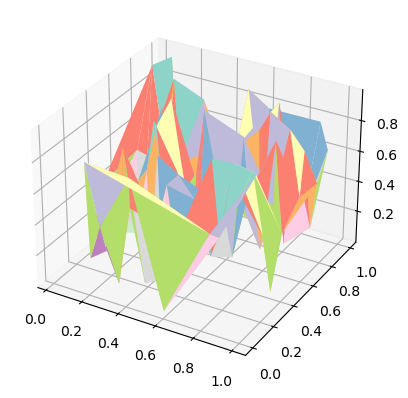

In [3]:
# Generate random 3D point cloud as an example
point_cloud = np.random.rand(100, 3)

# Perform Delaunay triangulation
tri = Delaunay(point_cloud)

# Plot the 3D point cloud
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(point_cloud[:, 0], point_cloud[:, 1], point_cloud[:, 2], triangles=tri.simplices, cmap='Set3_r')
plt.show()

# 2. Opening the written PLY file

* i. Viewing depth of the image

In [4]:
b_depth = np.load('results/aligned/DRM/test_pairs/final-depth/ZA941DA04-J11@9=person_whole_back_depth.npy')
f_depth = np.load('results/aligned/DRM/test_pairs/final-depth/ZA941DA04-J11@9=person_whole_front_depth.npy')

FileNotFoundError: [Errno 2] No such file or directory: 'results/aligned/DRM/test_pairs/final-depth/ZA941DA04-J11@9=person_whole_back_depth.npy'

In [5]:
print(f_depth.shape)
print(b_depth.shape)

NameError: name 'f_depth' is not defined

In [6]:
print(f_depth)
print(b_depth)

NameError: name 'f_depth' is not defined

### ii. lets read point cloud

In [4]:
import open3d as o3d

In [19]:
# pcd = o3d.io.read_point_cloud('sajjan results/pcd/test_pairs/1VJ21D02M-A11@9=person.ply')
pcd = o3d.io.read_point_cloud('cute=person.ply')

In [20]:
pcd

PointCloud with 88872 points.

In [21]:
vertices = np.asarray(pcd.points)
print(vertices)

[[-0.097656  0.976562  0.023454]
 [-0.09375   0.976562  0.02862 ]
 [-0.089844  0.976562  0.031909]
 ...
 [ 0.070312 -0.992188 -0.028396]
 [ 0.074219 -0.992188 -0.025356]
 [ 0.078125 -0.992188 -0.019582]]


* iii. visualize

In [8]:
o3d.visualization.draw_geometries([pcd]) 

# 3. Surface reconstruction 

i. Scipy delaunay

In [37]:
tri = Delaunay(vertices)
print(tri)

In [38]:
# Extract triangles from the Delaunay triangulation
triangles = vertices[tri.simplices]
triangles

array([[[-2.18750e-01,  2.81250e-01, -5.96990e-02],
        [-2.22656e-01,  2.69531e-01, -5.79020e-02],
        [-2.22656e-01,  2.73438e-01, -5.48380e-02],
        [-2.18750e-01,  2.85156e-01, -5.80380e-02]],

       [[ 2.14844e-01, -8.00781e-01,  4.68200e-02],
        [ 2.22656e-01, -7.96875e-01,  6.25100e-02],
        [ 2.18750e-01, -8.00781e-01,  4.19390e-02],
        [ 2.18750e-01, -7.96875e-01,  7.18050e-02]],

       [[-7.03120e-02, -7.92969e-01,  1.38197e-01],
        [ 2.14844e-01, -7.96875e-01,  7.52900e-02],
        [ 1.95310e-02,  7.34375e-01,  1.00030e-01],
        [ 1.95310e-02,  7.38281e-01,  1.00029e-01]],

       ...,

       [[ 1.48438e-01, -6.64060e-02, -5.63200e-03],
        [ 1.48438e-01, -7.03120e-02, -4.96700e-03],
        [ 1.48438e-01, -7.03120e-02,  5.21000e-04],
        [ 2.34375e-01, -7.85156e-01,  7.28500e-03]],

       [[ 1.48438e-01, -6.64060e-02, -5.63200e-03],
        [ 1.48438e-01, -7.03120e-02,  5.21000e-04],
        [ 1.48438e-01, -6.64060e-02,  1.186

NameError: name 'Poly3DCollection' is not defined

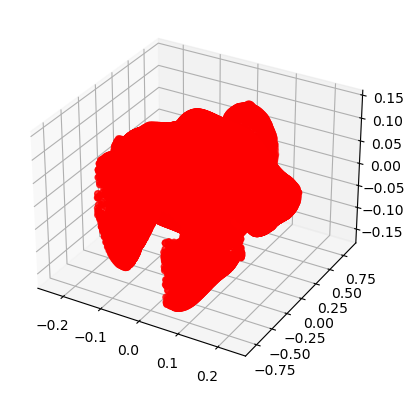

In [39]:

# Plot the mesh
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot vertices
ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], c='r', marker='o')

# Plot triangles
for triangle in tri.simplices:
    vtx = vertices[triangle, :]
    tri_vert = [list(zip(vtx[0], vtx[1], vtx[2]))]
    ax.add_collection3d(Poly3DCollection(tri_vert, facecolors='cyan', linewidths=1, edgecolors='r', alpha=0.5))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


## ii. Alpha shapes

In [40]:
# Compute the convex hull of the point cloud
tetra_mesh, pt_map = o3d.geometry.TetraMesh.create_from_point_cloud(pcd)

# Define the alpha value for alpha shape
# alpha determines the size of the spheres used to carve out the space around each point in the point cloud. 
alpha = 0.05

# Reconstruct surface with the specified alpha value
print(f"Reconstructing surface with alpha={alpha}")
mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_alpha_shape(pcd, alpha, tetra_mesh, pt_map)
mesh.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh], mesh_show_back_face=True)


Reconstructing surface with alpha=0.05


RuntimeError: [Open3D ERROR] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh

## iii. Ball Pivoting

In [45]:
pcd = o3d.io.read_point_cloud('nistha3=person.ply')

normals = pcd.estimate_normals()

In [46]:
# Define the radii for ball pivoting
# radii = [0.005, 0.01, 0.02, 0.04]
radii = [0.004,0.008,0.016,0.035]

# Reconstruct surface using ball pivoting
rec_mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(pcd, o3d.utility.DoubleVector(radii))

# Visualize the original point cloud and the reconstructed mesh
o3d.visualization.draw_geometries([pcd, rec_mesh])


In [47]:
# mesh smoothing to fill holes and improve surface quality
rec_mesh.filter_smooth_laplacian(9)     # number of iterations for smoothing.

TriangleMesh with 66818 points and 123719 triangles.

In [48]:
rec_mesh.vertices, pcd.points

(std::vector<Eigen::Vector3d> with 66818 elements.
 Use numpy.asarray() to access data.,
 std::vector<Eigen::Vector3d> with 66818 elements.
 Use numpy.asarray() to access data.)

In [53]:
o3d.visualization.draw_geometries([pcd, rec_mesh])

In [52]:
points = np.asarray(pcd.points)
colors = np.asarray(pcd.colors) if pcd.has_colors() else None
vertices = np.asarray(rec_mesh.vertices)
vertices_colors = np.asarray(rec_mesh.vertex_colors) if rec_mesh.has_vertex_colors() else None

# Combine vertices and optionally colors
combined_vertices = np.vstack((vertices, points))
if colors is not None and vertices_colors is not None:
    combined_colors = np.vstack((vertices_colors, colors))
    rec_mesh.vertex_colors = o3d.utility.Vector3dVector(combined_colors)
elif colors is not None:
    # Assuming the original mesh doesn't have vertex colors but the point cloud does
    # Initialize mesh vertex colors as white (or any default color) before adding point cloud colors
    default_color = np.ones_like(vertices)  # White color
    combined_colors = np.vstack((default_color, colors))
    rec_mesh.vertex_colors = o3d.utility.Vector3dVector(combined_colors)

rec_mesh.vertices = o3d.utility.Vector3dVector(combined_vertices)

o3d.visualization.draw_geometries([rec_mesh])

In [50]:
#pcd is the point cloud 
#rec_mesh is the reconstructed triangle mesh 
 # Combine vertices
vertices = np.concatenate([rec_mesh.vertices, pcd.points], axis=0)

# Combine vertex colors
# Ensure both the mesh and the point cloud have colors. If not, you might need to assign default colors.
colors = np.concatenate([rec_mesh.vertex_colors, pcd.colors], axis=0)

# Faces remain the same as they are unique to the triangle mesh
faces = rec_mesh.triangles

# Create a new mesh object for the combined data
combined_mesh = o3d.geometry.TriangleMesh()
combined_mesh.vertices = o3d.utility.Vector3dVector(vertices)
combined_mesh.triangles = o3d.utility.Vector3iVector(faces)
combined_mesh.vertex_colors = o3d.utility.Vector3dVector(colors)

# Optionally compute vertex normals for the new mesh
combined_mesh.compute_vertex_normals()

TriangleMesh with 133636 points and 123719 triangles.

In [51]:
o3d.visualization.draw_geometries([combined_mesh])

In [52]:
o3d.io.write_triangle_mesh("result1.ply", rec_mesh)

# Save point cloud
o3d.io.write_point_cloud("result2.ply", pcd)

True

In [13]:
o3d.visualization.draw_geometries([pcd, rec_mesh])

[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.


In [54]:
o3d.io.write_point_cloud("result2.ply", [pcd, rec_mesh])

TypeError: write_point_cloud(): incompatible function arguments. The following argument types are supported:
    1. (filename: str, pointcloud: open3d.cpu.pybind.geometry.PointCloud, write_ascii: bool = False, compressed: bool = False, print_progress: bool = False) -> bool

Invoked with: 'result2.ply', [PointCloud with 66818 points., TriangleMesh with 133636 points and 123719 triangles.]

In [25]:
o3d.visualization.draw_geometries([pcd, rec_mesh])

## iv. Poisson Reconstruction 

a. First we have to estimate normals, using these normals of the points, we estimate the planes perpendicular to the normals. This gives us the reconstructed surface

How is the normal for the points calculated? thats the question i am pondering right now.

Is it that we should fit a plane to the local neighborhood of each point and calculates the normal vector of that plane as the estimated normal for the point.

In [56]:
pcd = o3d.io.read_point_cloud('test_data_poisson.ply')
o3d.visualization.draw_geometries([pcd])

In [55]:
pcd = o3d.io.read_point_cloud('nistha3=person.ply')
pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))
mesh, densities = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(pcd, depth=8)

o3d.visualization.draw_geometries([mesh])

In [37]:
pcd = o3d.io.read_point_cloud('nistha3=person.ply')

pcd.normals = o3d.utility.Vector3dVector(np.zeros(
    (1, 3)))

In [38]:
pcd.estimate_normals()

In [39]:
# Normals visualized
o3d.visualization.draw_geometries([pcd], point_show_normal=True)

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 


b. Normals for the back 

the following function propagates the normal orientation using a minimum spanning tree.

In [40]:
# Back normals visualized
pcd.orient_normals_consistent_tangent_plane(100)
o3d.visualization.draw_geometries([pcd], point_show_normal=True)

c. Use the normals to reconstruct surface

- depth parameter defines the depth of the octree used for the surface reconstruction and hence implies the resolution of the resulting triangle mesh. A higher depth value means a mesh with more details.
-

In [41]:
print('run Poisson surface reconstruction')
with o3d.utility.VerbosityContextManager(
        o3d.utility.VerbosityLevel.Debug) as cm:
    mesh, densities = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(pcd, depth=8)
print("Mesh:",mesh)
print("Densities:",densities)

run Poisson surface reconstruction
[Open3D DEBUG] Input Points / Samples: 66818 / 26580
[Open3D DEBUG] #   Got kernel density: 0.00699997 (s), 233.664 (MB) / 233.664 (MB) / 610 (MB)
[Open3D DEBUG] #     Got normal field: 0.0439999 (s), 239.02 (MB) / 239.02 (MB) / 610 (MB)
[Open3D DEBUG] Point weight / Estimated Area: 9.283588e-06 / 6.203108e-01
[Open3D DEBUG] #       Finalized tree: 0.03 (s), 248.848 (MB) / 248.848 (MB) / 610 (MB)
[Open3D DEBUG] #  Set FEM constraints: 0.0510001 (s), 245.445 (MB) / 248.848 (MB) / 610 (MB)
[Open3D DEBUG] #Set point constraints: 0.00999999 (s), 171.328 (MB) / 248.848 (MB) / 610 (MB)
[Open3D DEBUG] Leaf Nodes / Active Nodes / Ghost Nodes: 260408 / 296936 / 673
[Open3D DEBUG] Memory Usage: 171.328 MB
[Open3D DEBUG] # Linear system solved: 0.149 (s), 191.664 (MB) / 248.848 (MB) / 610 (MB)
[Open3D DEBUG] Got average: 0.00300002 (s), 185.996 (MB) / 248.848 (MB) / 610 (MB)
[Open3D DEBUG] Iso-Value: 4.987989e-01 = 3.332875e+04 / 6.681800e+04
[Open3D DEBUG] #   

c. Visualize mesh

In [43]:
# Mesh visualized
o3d.visualization.draw_geometries([mesh])

TypeError: draw_geometries(): incompatible function arguments. The following argument types are supported:
    1. (geometry_list: List[open3d.cpu.pybind.geometry.Geometry], window_name: str = 'Open3D', width: int = 1920, height: int = 1080, left: int = 50, top: int = 50, point_show_normal: bool = False, mesh_show_wireframe: bool = False, mesh_show_back_face: bool = False) -> None
    2. (geometry_list: List[open3d.cpu.pybind.geometry.Geometry], window_name: str = 'Open3D', width: int = 1920, height: int = 1080, left: int = 50, top: int = 50, point_show_normal: bool = False, mesh_show_wireframe: bool = False, mesh_show_back_face: bool = False, lookat: numpy.ndarray[float64[3, 1]], up: numpy.ndarray[float64[3, 1]], front: numpy.ndarray[float64[3, 1]], zoom: float) -> None

Invoked with: [TriangleMesh with 49294 points and 98607 triangles., DoubleVector[8.61351, 8.64827, 8.61197, 8.65563, 8.61176, 8.61955, 8.65649, 8.60788, 8.61101, 8.60992, 8.61588, 8.62492, 8.60858, 8.60714, 8.60648, 8.60707, 8.6418, 8.64287, 8.61461, 8.64949, 8.64126, 8.6208, 8.65589, 8.61906, 8.62692, 8.63052, 8.63308, 8.64066, 8.63819, 8.61555, 8.62978, 8.50973, 8.52577, 8.51198, 8.52604, 8.50388, 8.50034, 8.51698, 8.5144, 8.52536, 8.51914, 8.50306, 8.50388, 8.51611, 8.50521, 8.49697, 8.51605, 8.4917, 8.47252, 8.52779, 8.5371, 8.45607, 8.50678, 8.53297, 8.51027, 8.5408, 8.53867, 8.55065, 8.50695, 8.50316, 8.55093, 8.56626, 8.53934, 8.50151, 8.53535, 8.54268, 8.53156, 8.56823, 8.52795, 8.61058, 8.51702, 8.45497, 8.50445, 8.45597, 8.47278, 8.50064, 8.59035, 8.5932, 8.63676, 8.63562, 8.62136, 8.63495, 8.61203, 8.5145, 8.54893, 8.50986, 8.54828, 8.53135, 8.60449, 8.60674, 8.54978, 8.53634, 8.60874, 8.55317, 8.56129, 8.60516, 8.57463, 8.51024, 8.59833, 8.53651, 8.52005, 8.55623, 8.56643, 8.58133, 8.57945, 8.56978, 8.51953, 8.58981, 8.5991, 8.55872, 8.61224, 8.57561, 8.54344, 8.45903, 8.56754, 8.55999, 8.59539, 8.48089, 8.56453, 8.55159, 8.59937, 8.60996, 8.58882, 8.55175, 8.54995, 8.60927, 8.59999, 8.57057, 8.64184, 8.64336, 8.5607, 8.65888, 8.60119, 8.55586, 8.60624, 8.60153, 8.60078, 8.60825, 8.64098, 8.58897, 8.65623, 8.63382, 8.54614, 8.64708, 8.65007, 8.62253, 8.55148, 8.65411, 8.60245, 8.62741, 8.57192, 8.49523, 8.57727, 8.50148, 8.65061, 8.62355, 8.6394, 8.61214, 8.57408, 8.5939, 8.62449, 8.16126, 8.11062, 8.39746, 8.52419, 8.47988, 8.29958, 8.37491, 8.52293, 8.48278, 8.45542, 8.4167, 8.4585, 8.39424, 8.37227, 8.44329, 8.52168, 8.3566, 8.01608, 8.48188, 8.12561, 8.39327, 8.42504, 8.15926, 8.35262, 8.4168, 8.21685, 8.35202, 8.2629, 8.35004, 8.41383, 8.27588, 8.35056, 8.30205, 8.35456, 8.42149, 8.33384, 8.36904, 8.43266, 8.34968, 8.39017, 8.44243, 8.35413, 8.44515, 8.36635, 8.49563, 8.44985, 8.50477, 8.37669, 8.5161, 8.38846, 8.45138, 8.40119, 8.52268, 8.44236, 8.52411, 8.41487, 8.44128, 8.42614, 8.42429, 8.43396, 8.40951, 8.4415, 8.45356, 8.47143, 8.48997, 8.40719, 8.41618, 8.41975, 8.42092, 8.42509, 8.43242, 8.43716, 8.44194, 8.52297, 8.52663, 8.52716, 8.53629, 8.5406, 8.54742, 8.45683, 8.46382, 8.47766, 8.4911, 8.50414, 8.54776, 8.54239, 8.52264, 8.45118, 8.47734, 8.15971, 8.4564, 8.55329, 8.44181, 8.29898, 8.54405, 8.44178, 8.45491, 8.48517, 8.39812, 8.53506, 8.48563, 8.44848, 8.4677, 8.58097, 8.50526, 8.50828, 8.16672, 8.43333, 8.31283, 8.57039, 8.48322, 8.16459, 8.59732, 8.46347, 8.58776, 8.38107, 8.32131, 8.42649, 8.55865, 8.4268, 8.4158, 8.57583, 8.48376, 8.48968, 8.61034, 8.45897, 8.42923, 8.43891, 8.60392, 8.50709, 8.46885, 8.6043, 8.31299, 8.60012, 8.47708, 8.28573, 8.58211, 8.45903, 8.55061, 8.57854, 8.43051, 8.48268, 8.59575, 8.41681, 8.50621, 8.57413, 8.52856, 8.3935, 8.53863, 8.49796, 8.53496, 8.46033, 8.36827, 8.48433, 8.46839, 8.4852, 8.54877, 8.47245, 8.45944, 8.4987, 8.44811, 8.56436, 8.46671, 8.48923, 8.48681, 8.52997, 8.35993, 8.49018, 8.46454, 8.38407, 8.58863, 8.39963, 8.56749, 8.51622, 8.49433, 8.57853, 8.40679, 8.5584, 8.478, 8.52323, 8.4616, 8.51511, 8.45846, 8.40506, 8.39532, 8.48003, 8.47398, 8.546, 8.47028, 8.54195, 8.58624, 8.63594, 8.52813, 8.61517, 8.54708, 8.62601, 8.56232, 8.53715, 8.53844, 8.57807, 8.54955, 8.53746, 8.53205, 8.54249, 8.56977, 8.54658, 8.60614, 8.61744, 8.59768, 8.56555, 8.54667, 8.62683, 8.55121, 8.60089, 8.53311, 8.61671, 8.50583, 8.59227, 8.45657, 8.55403, 8.49628, 8.54705, 8.54033, 8.60915, 8.52218, 8.58631, 8.53897, 8.5199, 8.54223, 8.48991, 8.52732, 8.56167, 8.5897, 3, 2, 3, 2, 2.78199, 2, 2.89208, 2, 2.95245, 2.63232, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 8.44495, 7.96022, 8.24268, 8.41833, 7.93013, 8.31393, 8.35657, 8.39331, 8.27367, 8.3791, 8.42307, 8.301, 8.39566, 8.47089, 8.38219, 8.3009, 8.38673, 8.49065, 8.28599, 8.37998, 8.48376, 8.38183, 8.41072, 8.29142, 8.2899, 8.19016, 8.44096, 8.27459, 8.30143, 8.13901, 8.4662, 8.38482, 8.2733, 8.31081, 8.33013, 8.38709, 8.47936, 8.25444, 8.32027, 8.38704, 7.83998, 8.38573, 7.87564, 8.48359, 8.3857, 8.23427, 7.89396, 8.33436, 8.21871, 8.3792, 8.35077, 7.96103, 8.36139, 8.22144, 8.37342, 8.35755, 8.04434, 8.33652, 8.07429, 8.32161, 8.50138, 8.50355, 8.12178, 8.5094, 8.17966, 8.52166, 8.19997, 8.52974, 8.21976, 8.54176, 8.24825, 8.56733, 8.27021, 8.49291, 8.49743, 8.29069, 8.57035, 8.30998, 8.50021, 8.59174, 8.32898, 8.59503, 8.34215, 8.51684, 8.60279, 8.51941, 8.34637, 8.49253, 8.49674, 8.52159, 8.34791, 8.60198, 8.34785, 8.59527, 8.51517, 8.57289, 8.48407, 8.53741, 8.5651, 8.49213, 8.40125, 8.42649, 8.42925, 8.44838, 7.95679, 8.33458, 8.36784, 8.43841, 8.4162, 8.29227, 8.32919, 8.38664, 8.2869, 8.42638, 8.47764, 8.27531, 8.38269, 8.46353, 8.28635, 8.42867, 8.39367, 8.44322, 8.18383, 8.38327, 8.45598, 8.30741, 8.38623, 8.29459, 8.39729, 8.39015, 8.39538, 8.46691, 8.29941, 8.39464, 8.4026, 8.49786, 8.29839, 7.9418, 8.40016, 8.47527, 8.41078, 8.40776, 8.5007, 8.42263, 7.9061, 8.50176, 8.50292, 8.51501, 8.43855, 8.51469, 8.50343, 8.51787, 8.5229, 8.5028, 8.52683, 8.38612, 8.51845, 8.52503, 8.13254, 8.40836, 8.53323, 8.09006, 8.38607, 8.51497, 8.5486, 8.43845, 8.54992, 8.24913, 8.38456, 8.21384, 8.49946, 8.49096, 8.34382, 8.48247, 8.32582, 8.45834, 8.46985, 8.46434, 8.31761, 8.49403, 8.31969, 8.56808, 8.33152, 8.35085, 8.37423, 8.57097, 8.39566, 8.56354, 8.59193, 8.413, 8.58605, 8.55043, 8.53127, 8.57128, 8.55163, 8.50983, 8.52911, 8.59159, 8.57054, 8.4179, 8.42805, 8.22557, 8.39167, 8.08251, 8.38644, 8.51316, 8.21334, 8.47045, 8.45307, 8.27655, 8.12815, 8.45329, 8.33182, 8.2441, 8.26078, 8.31483, 8.1569, 8.42213, 8.30345, 8.29742, 8.15906, 8.30592, 8.31037, 8.47935, 8.31767, 8.3589, 7.96229, 8.17456, 8.50559, 8.39269, 8.18797, 8.32429, 7.82659, 8.25377, 8.5106, 8.4151, 8.20028, 8.32493, 8.34904, 8.42057, 8.22311, 8.22015, 8.59169, 8.23249, 8.44786, 8.32266, 8.6084, 8.38843, 8.43381, 8.19075, 8.32078, 8.23933, 8.4489, 8.61148, 8.18182, 8.31743, 8.61588, 8.20373, 8.46041, 8.00773, 8.14649, 8.46346, 8.6095, 8.26698, 8.46875, 7.72466, 8.31495, 8.10376, 8.47899, 8.58941, 8.30123, 7.70621, 8.06572, 8.49532, 8.55639, 8.49951, 8.29417, 7.75023, 8.56796, 8.05521, 8.51671, 7.78422, 8.28832, 8.53431, 8.54167, 8.27843, 7.83204, 8.54309, 8.54928, 8.52081, 7.91769, 8.54201, 8.56782, 7.99186, 8.51351, 8.58703, 8.00988, 8.4723, 8.08059, 8.45672, 8.13155, 8.30079, 8.33915, 8.16236, 8.35976, 8.16615, 8.38315, 8.19413, 8.23779, 8.23935, 8.21928, 8.25124, 8.25033, 8.23741, 8.23239, 8.50263, 8.25399, 8.45227, 8.16738, 8.27813, 8.28057, 8.16022, 8.39199, 8.29226, 8.30064, 8.33737, 8.40237, 8.32591, 8.43847, 8.26255, 8.28622, 8.34073, 8.48387, 8.44711, 8.41402, 8.49178, 8.34809, 8.18234, 8.4215, 8.50526, 8.28945, 8.18089, 8.35128, 8.42438, 8.29614, 8.35742, 8.1787, 7.83109, 8.51066, 8.1746, 8.36858, 8.30487, 8.42226, 8.03375, 8.31474, 8.61167, 8.48052, 8.32562, 8.61725, 8.32593, 8.18503, 8.48212, 8.61857, 8.33886, 8.164, 8.35304, 8.48037, 8.50094, 8.30608, 8.47531, 8.60693, 8.49998, 8.24137, 8.61254, 8.46702, 8.58588, 8.49986, 8.28393, 8.4998, 8.59098, 8.53639, 8.32077, 8.55607, 8.34709, 8.54705, 8.53887, 8.55001, 8.53622, 8.5827, 8.52132, 8.51091, 8.58873, 8.49306, 8.60632, 8.60529, 8.54641, 8.3506, 8.358, 8.43747, 8.49753, 8.09718, 8.49379, 8.46317, 8.09418, 8.51478, 8.51925, 8.09483, 8.48226, 8.51806, 8.09197, 8.49573, 8.56217, 8.08581, 8.49037, 8.56101, 8.47858, 8.13961, 8.44073, 8.55926, 8.26255, 8.19513, 8.42771, 8.26441, 8.46231, 8.19929, 8.36315, 8.24376, 8.35067, 8.45768, 8.26383, 8.46077, 8.29755, 8.26904, 8.48208, 8.24714, 8.26468, 8.35227, 8.49278, 8.39827, 8.20502, 8.24244, 8.35176, 8.1871, 8.05909, 8.21067, 8.43092, 8.42796, 8.01167, 8.19429, 8.43882, 8.36141, 8.21108, 8.17348, 7.99733, 7.92159, 8.50995, 8.22604, 7.96477, 7.90662, 8.51209, 8.15757, 7.96028, 8.23615, 7.74389, 8.53115, 8.0891, 8.23961, 8.00063, 8.02798, 8.34835, 8.24241, 8.24775, 8.53971, 8.05912, 8.24962, 7.99986, 8.54501, 8.2562, 8.55324, 7.96698, 8.07926, 8.56141, 7.91669, 8.25853, 7.90227, 8.50486, 8.14971, 7.9507, 8.54946, 8.21737, 8.52719, 8.26324, 7.95903, 8.27955, 8.52811, 8.0129, 8.32352, 8.18744, 8.08566, 8.07789, 8.35157, 8.0919, 8.36211, 8.0717, 8.36959, 7.62207, 7.59256, 8.38354, 8.07678, 7.61921, 8.07902, 8.39866, 7.64419, 8.07234, 8.41366, 7.64963, 8.4137, 8.4323, 7.70924, 7.80276, 8.45544, 7.8889, 7.9027, 7.97439, 8.02308, 8.05816, 8.08537, 8.50771, 8.49582, 8.51772, 8.28035, 8.56161, 8.51589, 8.53488, 8.26709, 8.48551, 8.4584, 8.50735, 8.53275, 8.51444, 8.46918, 8.1443, 8.4982, 8.25015, 8.54313, 8.54475, 8.4514, 8.54183, 8.49797, 8.21446, 8.51175, 8.17555, 8.44431, 8.04101, 7.93919, 8.06753, 8.18119, 8.45632, 8.06471, 8.53235, 8.35006, 8.36717, 7.99752, 8.29807, 8.58587, 7.99054, 8.38558, 8.29848, 8.27112, 7.9799, 8.20329, 7.96257, 8.20298, 8.29169, 8.30422, 8.2061, 8.27832, 8.20001, 8.41372, 8.15653, 8.36029, 8.39748, 8.25504, 7.97076, 8.35884, 8.15574, 8.29215, 8.3752, 8.15974, 8.16319, 8.45309, 8.45675, 8.35239, 8.17823, 8.16786, 8.44439, 8.45129, 8.17757, 8.20394, 8.42993, 8.19095, 8.44216, 8.51401, 8.57428, 8.55453, 8.60686, 8.59152, 8.60761, 8.56799, 8.58673, 8.60497, 8.58404, 8.55503, 8.54493, 8.58659, 8.56698, 8.52881, 8.43356, 7.79022, 8.42655, 8.24124, 8.31346, 8.4751, 8.42806, 8.3193, 8.24081, 8.41671, 8.40307, 8.3329, 8.33508, 7.72951, 8.23711, 8.39393, 8.37372, 8.29743, 7.87776, 8.19944, 7.865, 8.28329, 8.3793, 7.91063, 8.3328, 8.28124, 8.16294, 7.97514, 7.85108, 8.30214, 8.35645, 8.13236, 8.04983, 8.35138, 7.84053, 8.38703, 8.06089, 8.22241, 8.12, 8.37963, 7.80592, 7.99274, 8.29602, 7.87546, 8.31219, 7.98467, 7.67733, 8.20808, 8.35191, 7.79665, 8.29968, 8.1172, 8.20787, 8.41431, 8.2163, 7.6006, 8.06346, 7.82371, 8.21569, 7.77363, 7.5995, 8.20045, 7.62043, 7.61875, 8.1651, 8.14471, 8.1489, 8.05895, 8.17893, 7.61976, 8.11796, 8.03306, 8.07454, 8.41545, 8.24549, 7.72127, 8.03907, 8.4055, 8.195, 8.32755, 8.06836, 7.91678, 8.3662, 8.35888, 8.11132, 8.3944, 8.09778, 8.30562, 7.78099, 7.48377, 7.72225, 8.12309, 7.86533, 7.42966, 8.28483, 8.14697, 8.4093, 7.94516, 8.17649, 8.43813, 7.40832, 7.96703, 8.1859, 8.46207, 8.06194, 8.50121, 7.40168, 8.52926, 8.50596, 8.21283, 8.46942, 8.54191, 8.14422, 7.43987, 8.23945, 8.49501, 8.15645, 7.42381, 8.49933, 8.11568, 8.47873, 7.41992, 8.19297, 8.09494, 8.46898, 8.48096, 8.10506, 8.22964, 7.44013, 8.50323, 7.91504, 8.254, 8.50131, 8.51477, 8.0799, 8.52726, 8.52681, 8.07712, 7.4217, 8.03097, 8.54481, 7.47247, 8.53581, 8.27089, 7.29545, 7.55281, 8.27661, 8.40146, 7.56425, 8.28854, 8.42504, 7.62972, 7.64356, 8.30977, 8.43244, 7.7335, 8.33892, 7.98602, 8.45639, 7.73826, 7.96677, 8.34849, 8.47934, 7.79586, 7.90481, 8.37196, 7.83754, 7.87507, 7.86396, 8.40509, 7.86807, 7.9532, 8.43241, 8.49216, 8.3068, 7.94906, 8.5147, 8.3324, 8.47124, 8.07226, 8.2992, 8.43604, 8.48015, 8.47707, 8.53779, 8.28573, 8.44957, 8.44711, 8.56017, 8.2429, 8.42499, 7.6209, 8.36567, 8.24166, 7.87721, 8.4574, 8.28318, 8.34077, 8.05195, 8.46078, 8.18674, 8.28412, 8.54046, 8.16611, 8.35135, 8.34403, 8.16897, 8.34785, 8.03136, 8.31623, 7.99356, 7.99366, 8.37391, 8.00021, 8.33962, 8.351, 8.54257, 8.16932, 8.22832, 8.25407, 8.54502, 8.32996, 8.21523, 8.30783, 8.43105, 8.07168, 7.45784, 8.21165, 8.16648, 8.34865, 7.54593, 8.13699, 8.13709, 8.42892, 8.41269, 8.16813, 8.41108, 8.53039, 8.3951, 8.49208, 8.35138, 8.53963, 8.47133, 8.3261, 8.53161, 7.86313, 8.30231, 8.51341, 7.74209, 8.51006, 8.28302, 8.49644, 8.48024, 8.5302, 8.41361, 8.50035, 8.50804, 8.39442, 8.54173, 8.37321, 8.42397, 8.18241, 8.35349, 8.48697, 8.50203, 8.47875, 8.1999, 8.50141, 8.22363, 8.47584, 8.50093, 8.23694, 8.52531, 8.12059, 7.72021, 7.71083, 7.38896, 7.69414, 7.36435, 7.66732, 7.32973, 7.92213, 8.09147, 8.07815, 7.63098, 6.94654, 6.86968, 8.0316, 7.85364, 8.29184, 8.03323, 8.38401, 8.30744, 7.8712, 8.04536, 8.41477, 8.33969, 7.92244, 8.031, 8.4565, 8.35502, 7.93796, 8.45514, 7.97748, 8.50283, 8.54131, 8.33402, 8.53243, 7.85947, 8.3314, 8.39614, 8.53487, 8.0325, 8.39237, 8.54133, 8.32834, 8.35518, 8.02823, 8.43312, 8.02428, 8.53065, 8.33403, 8.5106, 8.48313, 8.31055, 8.31229, 8.48419, 8.06915, 8.52583, 8.29996, 7.83723, 8.27825, 8.51717, 8.0822, 8.52827, 8.22819, 8.03116, 8.14513, 8.53757, 8.199, 8.34465, 8.50772, 8.1533, 8.56584, 8.51531, 8.20473, 8.03289, 8.36758, 8.49211, 8.20642, 8.02406, 8.04375, 8.52689, 8.54469, 8.41246, 8.23495, 8.54482, 7.76591, 8.52756, 7.75412, 8.23414, 7.78556, 8.56862, 7.74149, 8.49533, 8.33061, 8.01331, 7.59595, 8.33031, 7.93248, 7.46332, 8.4832, 8.2077, 8.34104, 8.36864, 7.89892, 8.17332, 8.36951, 7.61116, 8.46182, 8.2397, 8.1362, 7.64029, 7.29561, 8.31219, 8.41518, 8.45639, 7.97563, 7.17968, 8.35503, 8.41443, 7.97564, 7.18806, 7.12201, 7.99568, 7.22296, 7.11647, 8.45173, 8.49158, 8.06883, 8.34466, 7.12959, 7.49289, 7.97978, 8.51699, 8.27961, 8.48542, 7.24477, 8.53198, 8.48791, 8.20462, 7.79036, 8.51933, 8.37933, 7.85137, 8.14394, 8.42082, 7.9387, 8.5761, 8.05496, 7.33134, 8.47141, 7.49664, 8.59945, 8.2068, 7.63328, 8.42118, 7.41929, 8.0583, 7.74305, 8.60037, 8.45907, 7.49538, 7.97078, 7.54512, 7.71561, 8.28971, 8.00949, 8.61158, 7.40748, 8.08158, 8.60864, 8.07379, 8.58667, 8.1626, 8.08582, 8.5908, 8.18491, 8.07358, 8.18254, 8.07659, 7.98609, 7.97827, 7.56754, 7.89459, 7.56719, 7.50727, 7.4878, 7.41445, 7.55332, 7.53503, 7.35627, 7.31926, 7.38088, 7.44102, 7.51527, 7.60832, 7.72214, 7.82199, 7.84233, 7.94395, 8.0254, 8.07064, 8.07979, 8.11611, 8.14416, 8.17701, 8.21817, 8.24224, 8.25535, 8.2926, 8.33493, 8.3374, 7.71853, 8.31442, 8.40759, 7.80357, 8.34943, 8.45621, 7.65968, 8.49319, 8.32857, 8.53906, 8.31205, 8.5335, 8.39554, 8.30353, 8.53663, 8.38986, 8.0613, 8.5148, 7.92358, 8.37102, 8.52369, 7.85618, 8.18714, 8.44177, 8.08662, 8.53589, 8.17956, 8.40853, 8.16461, 8.52895, 8.19927, 8.33602, 8.478, 8.52632, 8.12785, 8.18322, 8.53141, 8.38782, 8.28542, 8.51428, 8.38667, 8.52025, 8.53127, 8.09152, 8.44626, 8.37948, 8.20597, 8.16631, 8.47841, 8.52783, 8.16763, 8.50023, 8.23603, 8.10289, 8.52163, 8.17275, 8.26554, 8.45106, 7.85969, 8.14249, 8.43862, 8.1651, 8.1421, 8.39628, 8.49967, 7.76119, 8.25253, 8.14619, 8.42108, 8.06963, 8.09997, 8.24404, 8.48076, 8.11372, 8.50125, 8.06883, 8.46601, 8.05032, 7.40671, 8.34014, 8.50826, 7.39244, 8.33529, 7.28806, 7.97978, 8.50635, 8.33714, 8.20628, 7.59008, 8.48857, 8.4031, 8.14436, 7.25085, 8.4652, 8.21277, 7.69096, 8.04793, 8.43478, 8.06874, 8.14887, 8.0215, 8.41689, 7.7175, 8.00535, 7.40682, 7.95709, 7.76857, 7.72187, 8.32993, 7.80842, 7.40752, 8.20577, 7.52855, 7.51544, 8.05717, 7.20298, 8.18781, 7.19445, 7.98982, 8.06562, 7.51025, 8.19393, 7.19161, 8.21726, 7.5075, 8.19608, 7.49692, 8.21708, 8.15064, 7.85068, 8.14594, 7.80882, 8.1936, 8.16455, 8.1645, 7.40179, 8.32905, 8.17775, 8.46125, 8.46837, 8.51314, 8.52802, 8.53298, 8.54757, 8.55321, 8.56988, 8.57723, 8.49642, 8.52277, 8.52002, 8.55333, 8.54793, 8.57675, 8.57131, 8.54524, 8.56923, 8.34469, 8.42703, 8.44069, 8.46133, 8.59966, 8.60091, 8.59465, 7.2662, 8.26495, 8.48649, 8.27523, 8.27452, 8.42638, 7.70834, 7.79222, 8.33112, 8.44356, 7.74186, 7.72996, 7.29022, 8.61776, 8.34672, 7.81683, 8.49457, 8.63039, 8.28603, 7.72206, 8.39017, 7.28348, 7.90773, 8.11466, 8.64121, 7.95426, 8.63045, 7.19506, 7.91286, 7.16446, 7.93499, 7.99598, 8.28987, 7.06686, 8.31483, 8.02839, 8.47613, 8.08327, 8.01873, 8.31724, 8.54966, 8.16302, 7.94722, 8.30301, 8.1678, 7.83236, 8.19831, 8.2977, 8.401, 7.25803, 7.88997, 8.34163, 8.37602, 7.22723, 7.86159, 8.22529, 8.26239, 8.4581, 8.2288, 7.7706, 8.27035, 8.28047, 7.01955, 8.5007, 7.75426, 8.33043, 8.21513, 6.9885, 8.49021, 8.37813, 8.31528, 8.44153, 8.5013, 8.30127, 7.04456, 8.19304, 8.31244, 7.117, 7.72676, 8.42198, 8.4703, 7.74997, 8.30586, 8.46172, 8.48717, 8.28923, 7.79195, 7.19428, 8.46416, 8.16781, 8.26644, 8.42945, 8.50214, 7.77888, 8.46489, 8.28815, 7.7637, 8.5296, 7.28305, 8.2432, 8.28115, 8.49339, 7.72495, 7.29892, 8.21508, 8.09939, 8.48265, 8.4995, 7.44004, 8.27783, 8.17065, 7.85859, 8.53968, 8.46659, 8.10916, 7.67716, 8.56088, 7.5596, 8.02291, 7.80684, 7.69876, 8.45696, 7.8997, 7.68427, 7.74794, 8.57323, 7.77995, 7.73056, 7.7796, 8.19893, 8.60111, 7.74523, 7.79994, 8.06604, 8.45559, 7.79472, 8.55793, 7.88905, 8.41569, 8.22983, 7.21986, 8.35736, 8.05726, 7.24855, 8.60213, 8.27844, 7.58532, 8.27858, 8.58192, 7.48674, 7.42997, 7.65268, 8.62464, 8.23387, 7.27126, 8.30194, 8.60185, 8.17435, 8.18133, 7.86834, 8.60385, 8.07222, 7.93987, 8.00853, 7.97086, 8.34435, 8.07457, 8.62652, 7.95903, 8.02654, 8.04104, 7.83848, 7.08305, 8.63966, 8.03913, 7.73552, 8.64047, 8.38071, 8.06364, 6.91545, 8.39586, 7.74093, 6.88547, 7.42718, 8.44659, 7.9563, 6.80915, 8.08518, 8.48233, 7.99474, 8.08622, 8.50008, 8.08311, 8.02898, 8.50272, 6.79138, 8.05919, 8.06569, 8.09696, 8.35162, 6.93442, 8.38995, 7.02714, 8.14662, 8.41125, 8.18843, 7.13122, 8.26974, 8.22805, 7.21468, 8.23924, 7.75037, 7.85835, 7.75739, 7.88145, 7.75953, 7.80842, 7.82411, 7.76802, 7.70495, 7.67648, 7.83902, 8.50091, 8.34374, 8.29157, 8.40206, 8.29805, 8.3477, 8.46249, 8.50432, 8.41898, 8.35642, 8.42688, 8.31298, 7.36213, 8.52387, 8.31422, 8.48347, 7.32406, 8.33041, 8.00318, 8.53337, 8.30812, 7.30849, 8.6394, 8.32484, 8.29005, 8.62886, 8.5412, 7.31497, 8.16565, 8.6418, 8.32969, 8.53073, 8.25953, 8.31209, 8.23297, 8.21878, 7.80809, 7.74876, 8.29287, 7.768, 8.51641, 7.92848, 8.63045, 8.2965, 8.18484, 7.89073, 8.33904, 8.06644, 6.94796, 8.40009, 7.82892, 7.82999, 8.05317, 8.56552, 7.81562, 8.06109, 8.54264, 8.45689, 8.58169, 7.75496, 8.06915, 8.51201, 8.49625, 8.59495, 8.47708, 8.02681, 8.47298, 8.50809, 8.60321, 8.18825, 8.51562, 8.03049, 8.52131, 8.21447, 8.24142, 8.04856, 8.49586, 8.50686, 7.77614, 8.18041, 8.42126, 8.48611, 8.2054, 8.49969, 7.99411, 8.28987, 8.15526, 8.54966, 8.49439, 7.98781, 7.7434, 8.24053, 8.54482, 8.14592, 8.42196, 8.23969, 8.36909, 8.38391, 7.72479, 8.20558, 8.34882, 7.41684, 8.23673, 7.71597, 7.97774, 7.40833, 8.21912, 7.9148, 8.39594, 8.4223, 7.91435, 7.97133, 8.08559, 7.85658, 8.48724, 8.44555, 8.51139, 7.18777, 8.07104, 8.46333, 7.18979, 8.52975, 7.77107, 8.55939, 7.4828, 8.58876, 7.19223, 8.60048, 7.48211, 8.61727, 8.60228, 8.62747, 8.62701, 8.62059, 8.61401, 8.59026, 8.60805, 8.63522, 8.63, 8.64141, 8.62157, 6.68251, 5.87785, 5.26796, 5, 6.54696, 5.8302, 5.2115, 6.66112, 6.62444, 6.53033, 6.67073, 5.87612, 5.87302, 5, 5.86129, 5, 5.83222, 5, 6.42827, 6.40079, 6.42732, 6.48133, 5.80264, 5, 5.79475, 5, 5.80185, 5.17836, 5.81791, 5.20146, 7.86203, 7.44317, 8.01783, 8.41449, 8.35237, 7.97298, 8.41387, 7.5643, 8.35632, 7.89131, 7.90549, 7.60997, 8.31445, 7.89894, 8.4101, 8.23927, 8.38848, 7.81637, 7.67647, 8.23939, 8.24629, 7.80053, 8.40226, 8.57061, 8.29265, 7.74586, 7.75489, 8.5826, 8.24112, 8.01954, 8.40874, 8.57644, 7.82896, 8.12517, 8.33174, 8.24218, 8.39767, 8.12901, 8.23279, 7.77865, 8.35085, 8.3949, 8.57591, 8.40264, 8.3685, 8.18359, 8.20891, 8.37685, 7.80914, 8.19935, 8.35396, 8.40482, 8.37388, 7.86079, 8.21951, 8.29617, 8.32965, 8.39286, 8.27179, 8.21712, 8.23674, 7.92981, 8.40726, 8.20518, 7.78966, 8.45443, 8.19972, 8.17949, 8.23835, 7.9945, 8.57421, 7.79805, 8.28343, 8.24374, 8.574, 8.16324, 8.16196, 7.99473, 7.77885, 8.27376, 8.13945, 8.03991, 7.74264, 8.10691, 8.10801, 8.07777, 8.5733, 8.21489, 8.12905, 8.57783, 8.04814, 7.99344, 8.57105, 8.20007, 7.90454, 8.29963, 8.16038, 7.58834, 8.56343, 7.7799, 8.26314, 7.78121, 8.19173, 8.56132, 7.46466, 8.20889, 7.75131, 8.0606, 8.2502, 8.17209, 8.33815, 7.99516, 7.75966, 8.30617, 8.57513, 7.72033, 8.31021, 7.63068, 7.74242, 8.35784, 8.47329, 7.46669, 7.81666, 8.37883, 8.56175, 7.84132, 8.38383, 7.79601, 8.06486, 7.74971, 8.49239, 7.98424, 8.56671, 8.41048, 8.5187, 7.53246, 7.94996, 8.18951, 7.62282, 8.5801, 8.52676, 8.24941, 7.28916, 8.237, 8.53656, 7.82653, 8.57263, 8.25122, 8.57702, 8.55407, 7.91138, 7.94163, 8.58141, 8.55761, 7.97814, 8.22565, 8.57181, 8.20082, 8.41768, 7.74669, 7.63134, 8.41881, 7.82656, 7.69682, 7.54549, 8.57806, 8.27352, 7.90124, 8.27507, 8.58468, 7.60937, 8.59305, 8.23199, 8.59681, 7.59296, 8.21359, 7.63833, 8.4384, 8.19967, 8.47617, 7.75054, 8.05105, 8.19861, 8.48163, 8.19956, 8.51321, 8.121, 8.2116, 8.53971, 8.18725, 8.22235, 8.55692, 8.22426, 8.55814, 8.24535, 7.49182, 7.46575, 7.46708, 7.50316, 7.58388, 8.12477, 7.29365, 8.10419, 7.1009, 8.09248, 8.09166, 6.98167, 8.09093, 6.87787, 8.08925, 6.65927, 8.59004, 8.07393, 8.60089, 8.04918, 7.01074, 8.60355, 7.02751, 7.00518, 7.62423, 7.75972, 6.84614, 7.8108, 7.66771, 7.5037, 6.82426, 6.72873, 7.46334, 7.42894, 6.95807, 7.40998, 6.89822, 7.4105, 7.44405, 7.1932, 7.32548, 8.42564, 7.65927, 7.97011, 8.28304, 8.45305, 8.47598, 8.30443, 8.39607, 8.28788, 7.72973, 8.03184, 7.89101, 8.42047, 8.25218, 8.44333, 7.99482, 8.12654, 8.31421, 8.4569, 8.33379, 8.60276, 8.23637, 8.28446, 8.57619, 8.34681, 8.22688, 7.75443, 8.28258, 8.21826, 8.57467, 8.47461, 8.23139, 8.48015, 8.20199, 7.66794, 8.33822, 8.3906, 8.57376, 8.40913, 8.24882, 8.31278, 8.4944, 8.30215, 8.57711, 8.42414, 8.57947, 7.59526, 7.92016, 8.32775, 8.56404, 8.58116, 7.83452, 7.78727, 8.39064, 7.84624, 8.56955, 8.46205, 8.28636, 7.81724, 8.48154, 8.44704, 7.97967, 8.23982, 7.79361, 8.5815, 6.97923, 8.56007, 8.5979, 6.88635, 8.26872, 7.78303, 8.49816, 8.08348, 8.55172, 7.78497, 8.53548, 8.21276, 8.33085, 8.59875, 8.23959, 8.59414, 7.22128, 8.61441, 8.20019, 7.50451, 8.61149, 8.6063, 8.03866, 7.27024, 8.23004, 8.18004, 8.57946, 8.21411, 8.01185, 8.61885, 7.84114, 8.56161, 7.7737, 7.89221, 8.60526, 8.27741, 7.46271, 7.92527, 8.58724, 7.74814, 7.43976, 8.63916, 8.63107, 7.82524, 8.63807, 8.05794, 8.26556, 8.6055, 7.81077, 8.62846, 8.29071, 8.61731, 8.62899, 8.62228, 8.55201, 8.09097, 8.48213, 8.55763, 8.08303, 8.48187, 8.08626, 8.55975, 8.55922, 8.5582, 7.46123, 7.18861, 8.31842, 7.8437, 8.13278, 8.32323, 7.76291, 7.30492, 7.81166, 8.15816, 7.39225, 8.1513, 7.92237, 8.19572, 8.32956, 7.88151, 8.08218, 8.32997, 8.45884, 8.54943, 8.16737, 7.81322, 8.10002, 8.47637, 8.23122, 8.54212, 7.68852, 8.32131, 8.19066, 8.53548, 8.20792, 8.52986, 8.2203, 7.85844, 8.52647, 8.54361, 8.49002, 8.52557, 7.91366, 8.54208, 8.52559, 8.47619, 8.30251, 8.49457, 7.97747, 8.24296, 8.56736, 8.02719, 8.17867, 8.4964, 8.13111, 8.56867, 8.50496, 8.03925, 8.57356, 8.09521, 8.51305, 8.50714, 8.56973, 8.14245, 8.57449, 8.51544, 8.17864, 8.26023, 8.57009, 8.57604, 8.32534, 8.57179, 8.18718, 8.29058, 8.52785, 8.26311, 8.22863, 8.53198, 8.24552, 8.57726, 8.53303, 8.25248, 8.22023, 8.33729, 8.53814, 8.16149, 8.20191, 8.34023, 8.25536, 8.22934, 8.23732, 8.56315, 8.19424, 8.5332, 8.51978, 8.12558, 8.57858, 8.05829, 8.57921, 8.52398, 8.56191, 8.0293, 8.54734, 8.53843, 8.56063, 8.57164, 8.13726, 8.22878, 8.56798, 8.09562, 8.1724, 8.23067, 8.56806, 8.05843, 8.149, 8.56841, 8.02993, 8.48826, 8.08603, 7.99739, 8.15633, 8.23059, 8.54982, 8.5608, 8.53944, 8.57031, 8.5628, 8.01787, 8.53778, 8.56905, 8.55649, 7.91711, 7.95239, 8.57737, 8.56651, 8.55849, 7.79902, 8.57266, 8.56985, 8.53726, 8.57201, 7.68249, 7.88844, 8.5712, 8.53781, 7.41914, 8.57202, 7.49989, 7.57408, 7.8022, 7.56495, 8.37882, 8.57274, 8.09107, 8.55541, 7.68542, 7.62851, 8.06543, 7.4989, 8.57261, 8.53831, 8.41238, 8.13604, 7.69941, 7.54342, 8.50024, 8.41998, 8.52648, 8.22108, 8.43862, 7.76221, 8.5726, 8.45992, 7.80809, 7.38773, 8.57205, 8.52935, 7.8526, 7.49041, 8.23817, 8.21043, 7.91032, 8.18634, 8.57182, 8.53372, 7.20909, 8.50689, 7.78909, 8.53979, 8.48029, 7.93644, 8.51101, 6.9939, 8.47309, 8.28035, 8.54213, 8.51219, 8.28938, 7.98164, 8.54905, 7.56354, 8.47508, 8.50882, 8.55095, 8.47426, 8.06097, 8.55659, 8.47303, 8.1244, 8.13268, 7.72658, 8.47446, 8.30659, 8.55677, 8.50342, 6.87324, 8.55896, 8.47745, 8.49837, 8.56176, 8.27422, 8.48236, 8.1166, 6.7487, 8.32154, 8.49595, 8.48843, 8.54606, 8.09142, 6.50485, 8.55262, 8.08804, 8.34977, 8.19272, 6.82426, 8.36604, 8.09018, 8.54294, 8.01662, 6.826, 8.40612, 8.54451, 8.08369, 8.24146, 6.78235, 8.43558, 8.24665, 7.47216, 8.10135, 6.45364, 8.1096, 8.54394, 8.11205, 6.41157, 7.76441, 8.29673, 8.12855, 6.70969, 6.62081, 7.66557, 6.52784, 8.07204, 7.58806, 8.0629, 7.52725, 6.9196, 8.14043, 7.47318, 8.13663, 7.05255, 8.1154, 7.43407, 8.09424, 7.42101, 8.14008, 7.46268, 7.56832, 7.78312, 8.18137, 8.15243, 8.11283, 8.08845, 8.12303, 8.03894, 7.99403, 7.88135, 7.97447, 7.94364, 7.87639, 7.86185, 7.83583, 7.45928, 7.81284, 7.4304, 7.80342, 7.31594, 7.24509, 7.76749, 7.74478, 7.1998, 7.73632, 7.77978, 7.83375, 7.81726, 7.54618, 7.66978, 7.34469, 7.72289, 7.77268, 7.57893, 7.60145, 7.76349, 7.82379, 7.90194, 7.87996, 8.21993, 8.3507, 8.01147, 8.34644, 7.96863, 8.5575, 8.21559, 8.1639, 8.55669, 8.33855, 8.27746, 7.96966, 8.4911, 8.12645, 8.49819, 8.35485, 8.38423, 8.25515, 8.59098, 8.57038, 8.55476, 8.55538, 7.92026, 8.54892, 8.40047, 8.28553, 8.54253, 8.555, 8.34882, 8.21824, 8.50454, 8.57023, 8.27251, 7.90182, 8.57101, 8.56687, 8.31549, 8.56806, 8.57166, 8.57674, 8.19212, 8.55081, 8.56849, 8.52314, 8.2311, 8.57693, 8.51012, 8.56655, 8.18704, 8.0538, 8.56268, 8.57347, 7.99623, 8.11051, 8.21935, 8.53577, 8.2319, 7.87415, 8.23024, 7.85203, 8.5705, 8.10989, 8.52971, 8.5473, 8.57388, 8.56169, 8.19427, 8.56636, 8.57012, 8.56728, 7.96777, 8.23426, 8.54783, 8.55615, 7.95004, 7.78648, 8.55682, 8.53622, 7.47137, 8.52401, 8.27423, 8.17896, 8.5802, 7.89077, 8.14801, 8.55782, 8.3692, 8.15015, 8.59892, 7.85778, 8.55239, 7.70134, 8.13285, 8.56566, 7.88142, 8.09957, 8.27537, 8.58636, 7.85882, 8.52919, 7.57973, 8.60012, 7.83943, 8.55672, 7.78304, 8.05441, 8.58498, 8.53311, 8.57535, 7.9949, 8.59176, 7.8283, 8.27004, 8.54417, 8.38603, 8.58167, 7.8128, 8.55576, 8.15131, 8.56899, 7.79883, 8.57688, 8.56879, 8.1659, 8.55044, 8.56993, 8.11639, 8.57232, 8.56891, 8.57044, 8.36024, 8.21008, 6.70241, 8.54661, 8.55697, 7.56777, 8.56886, 8.0968, 8.56896, 8.12923, 8.54196, 8.58585, 7.7505, 8.56831, 8.56472, 8.58002, 8.08272, 8.56381, 8.16737, 8.58168, 8.539, 8.55217, 8.06735, 8.57259, 8.55997, 8.55996, 8.19388, 8.57186, 8.55571, 7.82172, 8.57005, 8.5356, 7.8005, 8.22012, 8.5452, 8.55388, 7.95934, 8.55173, 8.53667, 7.83366, 8.04362, 8.57914, 8.5581, 7.81678, 8.5664, 8.54706, 7.9368, 8.55538, 8.56336, 8.5045, 7.54141, 8.5422, 8.51122, 7.32884, 8.55039, 8.51932, 8.57867, 7.79515, 8.55076, 8.57853, 7.95641, 8.52797, 8.56707, 8.53613, 8.57611, 8.4804, 8.54703, 8.57771, 8.53674, 7.40828, 8.55965, 8.56707, 8.53519, 7.98737, 8.49023, 8.57317, 8.5699, 8.00881, 8.53882, 8.57676, 8.56763, 7.34363, 8.57378, 8.5551, 8.01886, 8.58002, 8.56232, 8.51069, 8.54629, 8.57582, 7.90747, 8.55655, 8.544, 8.54456, 8.56117, 8.51686, 8.50034, 8.54444, 8.56614, 8.55035, 8.56193, 8.53584, 8.55879, 8.50947, 8.54379, 8.5226, 8.5766, 8.53869, 8.56362, 8.57559, 8.56553, 8.5612, 8.35292, 8.55421, 8.56762, 8.54448, 8.35233, 8.51748, 8.56855, 8.54905, 8.52777, 8.54562, 8.46285, 8.54356, 8.56736, 8.44157, 8.56331, 8.56928, 8.55025, 8.53203, 8.56856, 8.4236, 8.56495, 8.55061, 8.57007, 8.51631, 8.53578, 8.5569, 8.498, 8.56903, 8.56681, 8.57018, 8.4823, 8.53979, 8.57191, 8.54218, 8.4996, 8.35107, 8.34887, 8.48022, 8.48027, 8.48451, 6.2903, 6.70819, 6.25777, 6.40327, 5.8873, 6.41258, 6.64211, 6.67134, 5.54299, 5, 7.38798, 6.8034, 5.9272, 5.28858, 6.71085, 6.69587, 5.88786, 5.88402, 5, 5, 6.59808, 6.76628, 5.85486, 5.23783, 5.91031, 5.27102, 5, 4.77724, 4, 5, 4.88847, 4, 5, 4.77926, 4, 5, 5, 4.78885, 4, 4.78681, 4, 5, 5, 4.78896, 4, 4.81916, 4, 5, 4.86519, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2.5937, 3.63571, 3, 3.82733, 3, 2, 4, 4, 4, 3, 2, 4, 4, 3, 3.64411, 2, 4, 3, 3, 3.65576, 3, 2, 3, 4, 3.65092, 3, 3, 3.93999, 3.64364, 3, 3, 3.66619, 3, 3.61464, 3, 3.52296, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 4, 3, 3, 2, 3, 3, 3, 3, 2.97142, 3, 3, 2.98683, 2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2.83117, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2.88829, 3, 2, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 2.92608, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2.95248, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 3.40849, 2, 2, 4, 3.46769, 2, 2, 3.31959, 2, 2, 3, 2, 3.36826, 2, 2, 3, 2, 2, 3.54492, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7.40088, 8.22022, 8.03956, 8.11326, 8.03936, 8.2424, 7.47295, 8.27529, 8.06602, 8.06511, 7.53412, 8.23367, 8.09273, 7.89602, 8.08944, 7.59164, 8.04896, 8.16211, 8.44959, 7.65678, 8.10032, 8.43048, 8.10025, 7.89613, 8.08888, 8.21763, 8.44641, 8.05087, 8.27733, 7.88184, 8.24053, 8.44497, 7.98485, 7.85307, 8.04382, 7.88936, 8.26832, 8.27293, 8.09708, 7.84845, 8.64864, 8.27642, 8.57928, 8.64884, 8.23852, 8.58002, 8.4384, 8.64891, 8.44418, 8.00729, 8.13361, 7.80482, 8.44457, 8.03499, 8.07899, 7.73494, 8.1081, 8.44608, 8.2757, 7.77994, 8.2393, 8.57513, 8.25698, 8.44979, 8.23614, 8.15307, 7.83083, 8.44214, 8.21627, 8.45249, 8.26625, 8.32303, 8.4395, 8.10585, 8.4524, 8.61164, 7.83368, 8.43794, 7.75881, 8.61217, 8.52978, 8.09062, 8.5215, 8.35871, 8.43737, 8.51269, 8.2473, 8.38614, 8.43752, 7.93399, 8.15349, 8.24292, 8.05192, 8.51245, 8.40576, 8.44062, 8.01701, 8.5044, 8.61274, 8.27075, 8.49758, 7.94205, 7.97357, 8.61444, 7.7783, 7.97848, 8.44817, 7.93823, 8.61534, 8.49457, 7.90551, 8.58312, 8.49761, 8.40054, 8.61461, 8.02722, 7.86602, 7.46218, 8.61348, 8.58483, 7.81067, 8.64781, 8.50363, 8.58521, 7.73653, 8.02916, 8.50659, 8.58731, 8.61122, 8.61236, 8.51777, 8.60981, 8.07657, 7.63823, 7.67477, 8.07937, 8.59044, 8.62235, 7.80416, 8.45994, 8.62383, 7.76413, 7.51787, 8.60886, 8.47365, 8.62982, 7.37851, 8.13337, 8.61012, 7.77232, 8.48656, 8.61434, 8.5925, 7.57613, 7.77075, 8.49735, 7.21105, 8.62483, 8.63553, 7.96131, 7.4825, 8.62564, 8.63608, 7.00097, 7.41736, 8.15725, 8.05959, 8.61823, 7.42384, 8.18894, 8.50645, 8.1845, 8.6444, 8.64125, 8.10412, 8.51541, 8.12772, 8.16525, 8.00358, 8.07655, 8.64573, 8.63845, 7.96926, 6.86434, 8.64745, 8.63106, 7.95507, 8.20822, 8.63629, 7.53135, 8.52687, 8.21769, 8.64775, 7.73936, 8.61534, 7.96084, 6.97995, 7.43805, 8.53272, 8.53287, 8.62077, 8.53608, 8.53636, 8.26353, 8.53569, 7.79799, 8.53543, 8.3037, 7.35624, 8.53506, 7.97156, 7.96709, 8.31746, 7.9108, 7.97071, 8.53505, 7.90895, 7.6843, 7.98025, 8.53529, 7.85612, 8.02863, 8.6009, 7.98543, 7.22816, 7.98082, 8.02138, 7.9903, 8.61074, 8.07954, 7.94018, 7.20038, 8.14958, 7.93674, 8.1879, 7.92658, 7.84395, 7.93956, 8.20907, 7.86027, 7.99251, 7.98482, 8.01906, 8.52555, 8.53741, 8.53825, 8.54521, 8.55362, 7.05046, 8.55649, 8.57098, 8.57118, 7.09369, 8.57217, 8.58932, 7.18979, 8.59841, 7.26344, 8.60498, 8.56182, 7.33175, 8.58801, 8.55025, 8.60907, 8.56352, 7.71167, 8.5758, 7.69484, 8.56809, 7.79529, 8.41243, 8.42693, 8.45357, 7.78607, 8.47977, 8.48451, 7.5322, 8.50344, 7.64211, 7.35361, 8.52288, 7.64951, 8.52786, 7.65766, 8.53333, 8.53506, 7.67103, 7.70498, 8.41939, 7.75553, 7.81775, 7.8777, 7.93288, 7.98911, 8.33987, 8.37221, 7.8865, 8.1302, 8.05002, 7.82102, 8.25981, 8.25935, 7.88649, 8.2066, 8.28937, 8.27974, 7.58071, 8.15614, 8.11677, 8.23943, 8.10575, 7.57741, 8.0688, 8.47288, 7.76369, 8.05845, 8.56903, 8.57985, 8.6388, 8.24488, 8.46513, 8.11787, 8.46892, 8.57091, 8.12877, 8.56677, 8.47828, 8.15801, 8.56932, 8.49285, 8.48576, 8.56672, 8.35193, 8.46775, 8.57066, 8.50215, 8.49149, 8.11423, 8.5644, 8.3646, 8.45285, 8.46236, 8.13342, 8.49594, 8.62875, 8.2436, 8.45947, 8.38523, 8.56462, 8.64493, 8.14015, 8.46332, 8.40658, 8.62121, 8.57961, 8.64006, 7.78857, 8.42633, 8.56991, 7.47058, 8.44326, 8.47503, 8.5792, 8.5303, 8.57313, 8.56766, 8.52178, 8.57198, 7.76517, 8.44654, 8.58474, 8.41119, 8.58343, 8.45127, 8.51058, 8.57702, 8.4571, 8.48748, 8.47152, 8.469, 7.7241, 8.5127, 8.5718, 8.46487, 8.47422, 7.93723, 8.57071, 8.47381, 8.57026, 7.68341, 8.43995, 8.51776, 8.57962, 8.58296, 8.53848, 8.48314, 8.58102, 8.58396, 8.56635, 8.45047, 8.49876, 8.57121, 8.57478, 8.52272, 8.58466, 8.53101, 8.50829, 8.56243, 7.90158, 8.57051, 8.52693, 8.56742, 8.52333, 8.53037, 8.12021, 8.54089, 8.58343, 7.63879, 8.53817, 7.96064, 8.57952, 7.8578, 8.59116, 8.59327, 8.08725, 8.58143, 8.58806, 7.59164, 8.59869, 7.80993, 8.5162, 8.0534, 7.56519, 8.50992, 8.08714, 7.78587, 8.50541, 8.59283, 8.52516, 8.6014, 8.24798, 8.02096, 8.50356, 8.60285, 8.57234, 8.523, 8.5608, 8.59487, 8.56839, 8.04955, 8.53912, 8.52388, 8.5982, 8.58182, 8.53976, 8.20213, 8.07853, 8.57971, 8.5401, 8.11465, 7.91789, 8.16096, 8.53937, 8.58228, 8.57253, 8.0789, 8.53759, 8.58576, 8.09696, 8.12345, 8.53721, 8.60138, 8.04718, 8.20341, 8.60046, 8.53641, 8.53454, 8.60325, 8.01728, 8.53535, 7.98686, 8.60608, 8.53327, 8.53378, 7.6861, 8.57306, 8.58594, 8.57261, 8.58517, 7.84044, 8.58425, 8.58375, 7.84097, 7.88137, 8.60633, 8.60572, 8.30852, 8.60496, 8.2428, 8.60416, 8.62336, 7.81634, 8.62748, 7.80003, 8.63518, 8.60054, 7.53677, 8.58177, 7.35085, 8.60444, 8.5377, 8.58527, 8.526, 8.61377, 8.02986, 8.51645, 8.59513, 8.52937, 8.62712, 8.52442, 8.04644, 8.60958, 8.06729, 8.53429, 8.58196, 8.08516, 8.59557, 8.53308, 8.58698, 8.54165, 8.54301, 8.63948, 8.33579, 8.62486, 8.58257, 8.32128, 8.57007, 8.61199, 8.58235, 8.31718, 8.5375, 8.60313, 8.58266, 8.50707, 8.54484, 8.41357, 8.58235, 8.5535, 8.48278, 8.57488, 8.41046, 8.58739, 8.51169, 8.58667, 8.53964, 8.53191, 8.59891, 8.51947, 8.54621, 8.60271, 8.53306, 8.55452, 8.60221, 8.55629, 8.52611, 8.56263, 8.60575, 8.53645, 8.56404, 8.61364, 8.53819, 8.59861, 8.55992, 8.53652, 8.59896, 8.56526, 8.61722, 8.54854, 8.55013, 8.61795, 8.5473, 8.554, 8.60362, 8.56036, 8.61354, 8.5442, 8.5655, 8.62099, 8.63694, 8.57172, 8.4573, 8.23819, 8.57656, 8.63627, 8.21556, 8.5681, 8.56934, 8.57201, 8.0907, 7.96027, 8.02011, 8.12598, 8.01945, 7.75163, 7.96489, 7.89013, 7.97124, 8.415, 8.56982, 7.96292, 8.58019, 7.89078, 8.00305, 7.95783, 8.02217, 8.37425, 8.08462, 8.60199, 7.89808, 8.60205, 7.98446, 7.89269, 8.60057, 7.07064, 7.86213, 8.55704, 8.0264, 8.147, 8.56189, 8.03103, 8.20858, 8.15002, 8.38383, 8.03707, 8.21935, 8.59925, 8.59688, 7.43797, 7.98008, 8.59694, 7.85559, 8.61114, 7.15631, 8.56425, 8.59627, 8.61738, 8.66266, 7.24613, 8.56544, 8.41043, 8.54734, 8.39872, 8.03253, 8.55989, 8.02998, 7.95139, 8.02177, 8.56939, 8.59516, 8.57739, 7.99778, 8.09054, 8.58463, 7.9527, 7.33627, 8.09639, 8.56936, 8.5902, 8.26404, 7.83778, 8.20893, 7.897, 7.8835, 8.5902, 8.2598, 8.40489, 7.81349, 8.59838, 8.21625, 8.40418, 8.25753, 8.59884, 7.9085, 8.39816, 7.80234, 8.2125, 8.41465, 7.92879, 8.58975, 8.38901, 8.60505, 7.95044, 8.24816, 8.42955, 8.5951, 8.59584, 8.61969, 8.25739, 7.9348, 8.44313, 8.61331, 7.41505, 8.61819, 7.94382, 8.45582, 7.25458, 8.61987, 7.98824, 7.42592, 8.3805, 8.62361, 8.61121, 8.63538, 7.66273, 8.63348, 8.58783, 7.14347, 8.29478, 8.63723, 8.60034, 7.81345, 8.32236, 7.71647, 8.60421, 8.46984, 7.51822, 8.37424, 8.31492, 8.66337, 7.62701, 8.6061, 7.62214, 8.6637, 8.60594, 8.48483, 7.74133, 8.3731, 8.34311, 7.74965, 8.51046, 8.58275, 8.37157, 7.86135, 8.62612, 8.6045, 7.54412, 8.51118, 8.37393, 7.96725, 7.46267, 8.40428, 8.03984, 8.64454, 8.42425, 8.47174, 8.61649, 8.04668, 8.43159, 8.61613, 8.48277, 8.10744, 8.45521, 8.16249, 8.66326, 7.41008, 8.49378, 7.40412, 8.47383, 8.34435, 8.48556, 8.20221, 8.50039, 7.83644, 8.20922, 8.50188, 8.24848, 8.36307, 8.50612, 8.28341, 7.73564, 8.48861, 8.31292, 8.51574, 7.4121, 8.50806, 8.23549, 7.422, 8.50857, 8.52548, 7.56021, 8.24813, 8.53612, 7.79224, 7.69073, 8.49091, 8.54562, 8.57449, 8.14671, 7.80942, 7.71898, 8.61328, 8.55262, 8.06572, 8.66251, 8.09505, 8.57426, 7.71782, 7.88455, 8.60941, 7.64504, 7.84918, 8.57863, 8.66318, 7.66559, 8.03037, 8.66401, 7.60725, 7.92559, 8.60263, 7.95007, 8.65098, 7.90763, 8.22335, 7.98978, 8.66603, 8.59188, 8.05392, 8.19779, 8.66743, 8.65677, 7.5435, 8.06127, 8.14841, 8.66213, 7.79816, 8.66248, 7.79226, 7.51957, 8.66444, 8.66509, 7.61549, 7.80778, 7.96821, 8.15935, 8.64725, 7.92135, 8.6475, 7.36451, 7.88558, 8.65545, 8.55589, 8.66481, 8.66658, 7.5567, 7.85879, 8.55617, 7.56094, 8.66351, 8.63679, 8.17365, 8.66304, 7.59401, 7.83099, 8.55556, 7.81001, 8.23377, 7.6423, 7.79209, 8.22645, 7.8465, 8.50066, 7.80116, 7.69709, 7.74056, 8.51715, 8.50919, 7.75503, 7.67278, 8.19916, 7.81869, 8.53298, 7.58644, 8.19826, 8.38061, 7.4752, 8.39581, 7.32295, 7.13385, 8.39814, 8.40786, 7.11568, 8.41535, 8.41767, 6.45604, 8.49046, 6.45755, 8.48788, 8.48255, 6.59269, 8.47921, 8.47617, 6.71229, 8.04174, 6.82481, 8.46989, 8.05548, 8.46634, 6.92059, 8.46618, 7.00513, 8.46834, 7.89814, 7.85804, 7.84239, 7.84208, 7.84954, 7.87279, 7.88252, 7.869, 7.89308, 7.89613, 7.07672, 7.06221, 8.02141, 7.98732, 8.15541, 8.04112, 7.82773, 8.22256, 8.04571, 8.08319, 7.75329, 8.27393, 7.77417, 8.18726, 7.45477, 8.22446, 8.04035, 8.4149, 8.136, 8.03981, 8.40315, 8.43075, 8.26669, 8.61199, 7.4023, 8.01794, 8.22915, 8.44324, 8.10674, 8.58616, 8.04854, 8.37027, 8.30537, 8.4395, 8.07712, 8.57108, 8.20727, 7.90977, 8.39507, 8.34002, 8.20461, 8.09128, 8.44275, 8.24112, 8.56039, 8.41985, 7.88633, 8.57593, 7.08039, 8.31821, 8.41314, 8.41264, 8.57107, 8.43596, 8.42211, 8.42585, 8.65147, 8.27267, 7.98506, 6.76276, 8.66357, 8.2692, 8.31836, 8.66, 8.21646, 8.08132, 8.3153, 8.6569, 8.4308, 8.239, 7.93011, 8.58333, 8.43473, 7.85062, 8.57545, 8.66935, 7.90382, 8.66701, 8.6152, 8.38616, 8.00429, 7.92618, 8.21255, 7.95832, 8.05312, 8.26947, 8.50506, 8.19304, 8.17109, 8.60361, 7.8963, 8.50563, 8.66613, 8.23398, 7.89955, 8.66904, 8.61341, 8.60942, 7.80698, 8.50367, 8.61226, 7.85539, 8.67017, 8.53278, 8.01393, 8.6083, 8.58295, 8.66511, 8.61445, 7.9743, 8.53333, 8.66999, 7.69157, 8.53161, 8.5883, 8.66909, 8.61275, 8.60544, 8.15472, 8.66831, 7.77989, 8.52135, 8.60254, 8.59761, 7.77024, 8.61662, 8.61359, 8.59832, 8.52874, 7.67943, 8.60294, 8.61473, 8.51135, 8.61333, 8.49981, 8.61665, 8.52483, 8.66945, 8.48677, 8.60001, 7.42901, 8.50345, 8.51958, 7.66703, 8.60692, 8.5881, 8.62706, 7.74065, 8.49421, 8.60665, 8.51295, 8.60997, 8.58865, 7.84408, 7.74066, 8.63762, 8.4859, 8.61626, 7.66301, 8.47877, 8.58998, 8.61841, 8.62745, 8.6546, 7.83839, 8.61352, 8.472, 8.61265, 8.6672, 8.63639, 7.52746, 8.53472, 8.59123, 8.61395, 8.61953, 8.50386, 8.65298, 7.35457, 8.66346, 8.63666, 8.61848, 7.5209, 8.63891, 8.41474, 8.66754, 7.3617, 8.61765, 8.6504, 8.4198, 8.65658, 8.42346, 8.64701, 8.61376, 8.49084, 8.62356, 8.61261, 8.62013, 8.63702, 8.61661, 8.49611, 8.49681, 8.61079, 8.63177, 8.52939, 8.62098, 8.49228, 8.64596, 8.6368, 8.65326, 8.52788, 8.64195, 8.64696, 8.66793, 8.65971, 8.59803, 8.66564, 8.60469, 8.65298, 8.57026, 8.66005, 8.58128, 8.64505, 8.59016, 8.45127, 8.6091, 8.66932, 8.5973, 8.66949, 8.46561, 8.66575, 8.65381, 8.47917, 8.66894, 8.49221, 8.66051, 8.50518, 8.66617, 8.51834, 8.66981, 8.66595, 8.53604, 8.64953, 8.54035, 8.65882, 8.54553, 8.55113, 8.56185, 8.55734, 8.56818, 8.56397, 8.56974, 8.53165, 8.54495, 8.55792, 6.36609, 6.65724, 7.10328, 6.68138, 6.34617, 7.3431, 6.47277, 7.4782, 6.54418, 5.87567, 6.40836, 6.87836, 5.14563, 6.12321, 6.54281, 5.92352, 5.95884, 5.84125, 5.37106, 5.85184, 6.02382, 6.16493, 5.93979, 6.68913, 6.34202, 7.50396, 5.98279, 5.87895, 5.94364, 5.11554, 6.8432, 5.9731, 5.94097, 5.08676, 5.31145, 5.95665, 5.35422, 8.19894, 7.41158, 7.75449, 7.67159, 8.27214, 7.98157, 8.283, 8.19957, 7.71777, 7.7956, 7.21862, 7.72861, 8.54572, 8.53945, 7.69344, 6.7115, 8.55073, 8.54412, 8.59015, 7.65955, 8.65858, 7.74174, 7.7867, 8.12288, 7.65105, 8.34076, 7.64564, 8.35891, 7.70622, 8.44583, 8.37672, 6.8107, 7.85199, 8.29924, 8.64503, 7.9166, 7.65953, 8.56158, 8.54585, 8.65477, 8.38681, 8.44588, 8.31832, 8.64493, 8.38996, 8.54484, 8.51486, 8.33787, 8.1308, 8.65084, 6.93241, 8.5214, 8.35651, 7.41079, 8.64947, 8.59688, 7.93599, 7.06082, 8.22538, 7.59337, 8.54319, 8.02416, 8.50104, 8.3349, 8.5115, 8.32774, 8.37405, 8.52684, 8.31773, 8.39165, 8.25298, 8.45215, 7.95738, 7.80758, 8.27742, 7.53827, 8.65372, 7.19039, 7.96586, 8.54246, 8.53057, 8.2137, 7.42584, 8.40932, 7.95964, 8.60259, 8.5332, 7.95664, 8.29855, 8.60706, 8.42716, 8.46453, 8.59362, 8.31727, 8.44503, 8.60772, 8.66271, 8.46172, 8.54146, 8.47612, 8.61221, 8.47848, 7.54882, 8.21029, 7.64203, 8.53976, 8.18302, 7.8129, 8.66243, 8.53876, 8.48916, 7.83032, 7.93684, 7.65668, 8.61382, 7.65735, 8.49558, 8.48181, 8.53844, 7.68226, 7.60783, 8.49713, 8.66362, 8.488, 8.31266, 8.65938, 7.8446, 8.30514, 7.91422, 8.33225, 8.64564, 8.59311, 8.53763, 8.53946, 8.29057, 8.61157, 8.33925, 8.64324, 8.15376, 7.80526, 8.27782, 8.64101, 8.13622, 8.51444, 8.54292, 8.60718, 8.27113, 7.90051, 8.09592, 8.34102, 8.27083, 8.59207, 8.64017, 8.34389, 8.05388, 8.59207, 8.52452, 8.63982, 8.03107, 7.97522, 8.59228, 8.41959, 8.64074, 8.4227, 8.49451, 8.59325, 8.40023, 8.59624, 8.50097, 7.88382, 8.01231, 8.59384, 8.54866, 8.55027, 8.02988, 8.49839, 7.5107, 7.84872, 8.40876, 8.64298, 7.83492, 8.16997, 8.42694, 8.03494, 8.64761, 8.50697, 8.21433, 8.65033, 7.50838, 7.91996, 8.4314, 8.08514, 8.21434, 7.91306, 8.49424, 8.13219, 8.56459, 7.87576, 8.4142, 8.64579, 8.5899, 8.57919, 8.43238, 7.3603, 8.64742, 8.16789, 7.1451, 8.43559, 7.8182, 8.1704, 8.66132, 7.61771, 8.54532, 8.41622, 7.50919, 8.56137, 8.43874, 8.41646, 8.511, 7.81275, 8.59787, 8.65072, 8.60281, 8.41785, 8.64928, 8.60728, 8.49333, 8.42057, 8.53884, 8.42902, 8.63682, 8.44289, 8.51598, 8.19764, 7.99666, 8.46074, 7.87182, 7.73714, 7.37684, 7.89364, 8.61085, 8.44207, 7.49462, 7.91264, 7.06789, 8.64658, 8.64801, 7.85247, 8.65609, 8.22627, 8.65631, 7.79821, 8.57139, 8.41653, 8.25539, 8.55067, 7.90992, 8.28356, 8.41733, 8.57804, 7.50427, 7.92706, 8.58467, 7.935, 8.44378, 8.00379, 7.52685, 8.66316, 7.92949, 8.52558, 8.66506, 7.56082, 7.78189, 8.51115, 7.7804, 8.59824, 7.76899, 8.49844, 7.73775, 8.59825, 7.74472, 8.59863, 7.6079, 8.58353, 7.04486, 8.57011, 8.56398, 8.57353, 7.73595, 8.55992, 8.46227, 7.67065, 7.74851, 8.58888, 8.58447, 8.58739, 7.05234, 7.60729, 8.5912, 8.53521, 8.58381, 8.60292, 7.81115, 8.53078, 7.71843, 8.5441, 8.59872, 7.8605, 7.67683, 8.59987, 8.55397, 8.58628, 8.48339, 7.88036, 7.93712, 8.59869, 7.87821, 8.55864, 8.46822, 8.60172, 8.52886, 8.55712, 7.85317, 8.59232, 8.59574, 8.55303, 7.66804, 7.89309, 8.46617, 8.59367, 7.84595, 7.8643, 8.41772, 7.85065, 7.64482, 8.41864, 8.44706, 8.66954, 7.84205, 7.66517, 8.52173, 8.66166, 8.52221, 8.6124, 7.53052, 8.65646, 8.53968, 8.5331, 8.61101, 8.4318, 7.50962, 8.54425, 8.65571, 8.48286, 8.42145, 8.66916, 8.54496, 7.82804, 8.59527, 8.60565, 8.65552, 8.52208, 7.46563, 8.597, 8.59542, 8.66192, 7.48927, 8.55737, 7.8078, 8.66689, 7.52632, 8.59692, 7.731, 7.63533, 8.56065, 7.77848, 8.66914, 7.85842, 8.59122, 8.66773, 7.80356, 8.62729, 8.66178, 7.87483, 8.63666, 8.55509, 7.75287, 8.6167, 8.65266, 8.65581, 7.86299, 7.72746, 7.948, 8.65304, 8.64867, 8.60123, 8.00789, 8.02256, 7.88542, 8.59626, 8.65731, 7.9396, 8.09054, 8.65698, 8.64377, 8.5634, 7.6338, 8.56638, 8.65594, 8.6321, 8.56942, 8.59834, 8.14441, 8.61438, 8.65294, 8.59686, 8.06622, 7.47969, 8.19022, 8.65102, 8.12223, 8.61042, 8.59558, 8.14931, 8.5869, 8.66659, 8.17747, 8.28402, 8.66653, 8.15026, 8.65227, 8.18756, 8.65345, 8.66782, 8.1534, 8.31149, 8.6538, 8.17523, 8.66771, 8.66704, 8.33564, 8.66339, 8.54965, 8.57603, 8.57529, 8.55552, 8.65195, 8.64651, 8.64638, 8.64845, 8.65278, 8.65346, 8.65333, 8.65316, 8.65175, 8.66671, 8.66857, 8.66064, 8.66342, 8.66403, 8.66944, 8.66954, 8.65173, 8.65333, 7.79257, 8.20001, 8.37981, 7.8301, 7.69353, 7.95756, 8.41197, 8.13248, 7.76937, 7.69777, 7.9436, 8.39162, 8.28081, 8.03842, 8.55726, 8.40293, 8.30938, 7.89934, 8.02445, 8.56807, 7.94017, 8.33452, 8.66055, 8.54086, 8.64961, 8.35801, 8.59327, 8.01716, 8.55029, 8.32622, 8.38075, 7.70687, 8.65537, 8.54429, 7.96741, 8.65307, 8.4028, 8.66088, 8.34871, 7.64201, 8.39918, 8.42387, 8.36855, 8.66334, 8.20144, 8.55634, 8.48229, 8.6618, 8.66699, 8.44374, 8.01665, 8.59038, 8.46262, 8.59225, 7.51333, 8.66271, 8.60629, 8.55475, 7.36559, 8.59021, 8.44618, 8.46549, 8.55229, 8.19146, 8.26759, 8.50709, 8.58723, 8.50314, 8.62151, 7.65419, 8.45784, 8.49986, 8.60902, 8.6726, 8.56856, 8.49973, 8.63432, 8.57441, 8.66807, 8.54911, 8.44764, 8.62096, 8.51433, 8.58323, 8.64402, 8.43543, 8.17218, 8.50626, 8.67718, 8.62716, 8.4992, 8.54848, 8.30824, 8.49233, 8.3103, 8.62078, 8.54456, 7.91362, 7.67036, 8.34481, 8.48349, 8.64872, 8.37223, 8.47303, 8.67506, 8.29798, 7.6159, 8.39475, 8.46077, 8.68054, 8.6331, 8.55271, 7.83677, 8.62516, 8.68133, 8.3453, 7.79572, 8.59958, 7.37278, 8.64413, 8.62273, 8.36511, 8.64647, 8.55089, 8.68597, 8.61528, 8.54698, 8.46834, 8.68474, 8.63756, 8.64082, 8.45183, 8.53026, 8.57722, 8.62257, 8.65308, 8.61245, 8.68986, 8.56703, 7.83443, 8.6601, 8.56151, 8.60133, 8.67115, 8.58096, 8.5208, 7.53847, 8.6635, 8.65239, 8.57165, 8.48063, 7.58027, 8.62813, 8.66957, 8.46901, 8.56754, 8.68029, 8.47114, 8.67189, 8.66174, 7.61224, 8.58743, 8.54062, 8.59659, 8.4978, 7.93288, 8.6814, 7.65034, 8.58311, 8.54074, 7.69014, 8.68763, 8.66181, 7.72751, 8.54289, 8.56866, 8.66925, 8.47031, 8.51426, 8.011, 8.67588, 8.59074, 8.69238, 8.53009, 7.42787, 8.54254, 8.24802, 8.68885, 8.54463, 8.57378, 8.46651, 8.51718, 8.53945, 7.75732, 8.69322, 8.53321, 8.59455, 8.05456, 8.43299, 8.58205, 8.65747, 8.59231, 8.60278, 8.64932, 8.07306, 8.61711, 8.65502, 8.59789, 8.47235, 8.66927, 8.6165, 8.66018, 8.59817, 8.67933, 8.52981, 8.45721, 8.66222, 8.60643, 8.52521, 8.67308, 8.64731, 8.57458, 8.44214, 8.59111, 8.68697, 8.60227, 8.42747, 8.61379, 8.49174, 8.65773, 8.50823, 8.65973, 8.52268, 8.65349, 8.66723, 8.62644, 7.80731, 8.06137, 8.53509, 8.66242, 8.60209, 8.6646, 7.87685, 8.63561, 7.7436, 8.19846, 8.60573, 7.95091, 8.66734, 8.66791, 8.59424, 8.61459, 8.0256, 8.67169, 8.66948, 8.53093, 8.56589, 8.61088, 8.6701, 8.64233, 8.09589, 8.67304, 8.68688, 8.60596, 8.69104, 8.66112, 8.67947, 8.58792, 8.65818, 8.60762, 8.67566, 8.60878, 8.68099, 8.66802, 7.42936, 8.67739, 8.60005, 8.66513, 8.68375, 8.66251, 8.67179, 8.68243, 8.58519, 8.53205, 8.59322, 8.68368, 8.66953, 8.66885, 8.4677, 8.64606, 8.16154, 8.63857, 8.18675, 8.53281, 8.55665, 8.21671, 8.57849, 8.68332, 8.67217, 8.65206, 8.67709, 8.68188, 8.58286, 8.66936, 8.42404, 8.67632, 8.64595, 8.17396, 8.42052, 8.65981, 8.66682, 8.64079, 8.67598, 8.25079, 8.66128, 8.66726, 8.63976, 8.63102, 8.20846, 8.65397, 8.6487, 8.61073, 8.60338, 8.62237, 8.59572, 8.54656, 8.66661, 8.53573, 8.66372, 8.5834, 8.65999, 8.64921, 8.65316, 8.61668, 8.65465, 8.66024, 8.657, 8.61401, 8.65744, 8.6334, 8.66452, 8.65914, 8.59718, 7.36905, 8.66925, 8.5657, 7.62736, 8.68546, 8.674, 8.67531, 8.662, 8.63067, 7.82025, 8.65099, 8.63577, 8.63514, 8.67847, 7.07665, 8.66227, 8.6115, 8.6758, 8.64746, 8.66922, 8.67452, 7.88962, 8.66165, 8.65934, 8.67063, 7.86131, 8.67843, 8.67627, 8.6752, 8.64716, 8.67579, 8.68073, 8.57145, 8.65577, 8.68292, 8.65523, 8.66479, 8.66152, 8.60705, 8.68536, 8.65151, 8.66272, 8.60939, 8.68665, 8.64519, 8.58158, 8.55454, 8.68225, 8.6411, 8.67853, 8.57582, 8.65194, 8.68545, 8.62843, 8.68906, 8.61259, 8.68947, 8.60908, 8.59754, 8.69229, 8.57841, 8.69233, 8.66389, 8.62135, 8.68175, 8.57309, 8.68766, 8.64403, 8.66241, 8.67133, 8.68385, 8.56741, 8.65939, 8.65765, 8.66782, 8.56164, 8.69023, 8.6703, 8.61257, 8.68575, 8.55547, 8.66414, 8.59824, 8.69464, 8.54875, 8.69455, 8.67316, 8.58614, 8.69499, 8.67656, 8.69474, 8.58764, 8.67138, 8.62589, 8.69225, 8.62528, 8.64601, 8.68749, 8.6119, 8.69226, 8.62559, 8.68728, 8.5958, 8.6071, 8.6787, 8.65947, 8.59116, 8.67357, 8.46467, 8.68026, 8.61874, 8.53372, 8.22102, 8.67527, 8.61318, 8.46441, 8.63773, 8.58445, 8.67093, 8.65585, 8.57648, 8.53545, 8.66813, 8.64868, 8.15322, 8.68158, 8.46601, 8.58442, 8.14706, 8.67633, 8.54511, 8.53774, 8.68076, 8.63433, 8.00414, 8.5895, 8.67465, 8.62712, 8.61645, 8.55209, 8.67173, 8.63646, 8.66856, 8.59252, 8.61655, 8.55578, 7.95685, 8.66982, 7.916, 8.58158, 8.62332, 8.69259, 7.87716, 8.6004, 8.69217, 8.58215, 7.85017, 8.62068, 8.68715, 8.60661, 8.62006, 7.83413, 8.61657, 8.61476, 8.68616, 7.81239, 8.605, 8.6892, 8.63123, 8.68335, 8.61769, 8.68205, 7.78092, 8.6253, 8.60352, 7.75099, 8.61774, 8.67504, 8.58968, 8.67765, 8.67589, 8.59908, 8.67081, 8.66375, 8.67569, 8.66891, 8.66689, 8.65974, 8.66378, 8.65675, 8.66662, 8.66677, 8.66853, 8.66841, 8.67327, 8.66615, 8.66497, 8.66691, 8.67335, 8.67757, 8.6857, 8.68183, 8.68633, 8.68131, 7.91608, 7.52982, 7.29344, 7.68757, 7.06069, 7.65546, 7.71884, 7.58305, 7.60975, 7.87167, 7.66789, 7.02745, 7.83476, 7.36423, 8.17036, 7.57496, 8.56885, 8.18695, 8.58276, 7.78015, 8.58327, 8.20662, 8.58523, 7.76434, 7.52286, 7.97467, 8.58686, 8.21616, 8.57003, 7.64561, 8.23653, 8.58758, 8.14937, 8.58362, 6.40383, 7.76967, 8.58276, 8.12025, 7.76822, 8.54907, 8.40915, 7.46259, 8.57772, 6.51073, 8.20753, 7.7118, 8.55468, 8.57837, 8.58376, 8.0806, 8.41064, 8.5798, 7.62994, 8.57785, 8.41271, 7.79389, 8.56092, 8.5802, 7.58479, 8.56107, 8.58232, 7.48682, 7.605, 8.10448, 8.41276, 7.5705, 8.58331, 8.41773, 7.81956, 8.58309, 8.15848, 8.58347, 8.42576, 7.69638, 8.58311, 7.56515, 7.89172, 7.5315, 8.56662, 8.21835, 8.57271, 8.58758, 8.01101, 8.21589, 8.57278, 8.5705, 8.10369, 7.79159, 8.58567, 8.209, 8.56874, 8.58394, 7.52287, 8.57226, 7.8553, 8.58522, 8.56594, 7.48812, 8.22981, 8.5798, 8.57185, 7.86572, 8.23587, 8.56464, 8.58148, 7.49157, 8.19848, 8.42603, 8.25244, 8.57188, 6.64189, 7.37011, 8.56615, 8.57644, 8.27397, 7.87244, 8.57246, 7.41183, 6.78237, 8.29357, 8.56979, 8.5723, 6.92555, 7.42011, 8.31192, 8.57345, 8.18444, 8.56476, 8.56768, 7.46612, 8.56449, 8.1699, 8.56843, 7.19913, 7.87108, 8.11125, 8.57402, 7.84394, 8.11431, 8.56582, 8.5685, 8.56433, 8.13989, 8.15993, 8.56851, 8.15651, 8.16295, 8.53778, 7.81539, 8.57664, 8.32976, 8.0904, 7.79282, 8.08283, 8.56284, 7.7617, 8.34733, 8.18329, 8.36388, 8.53775, 8.56238, 7.32896, 8.37848, 8.20159, 8.52655, 8.05218, 8.53922, 8.56875, 8.38736, 8.55662, 7.45908, 8.0164, 8.55657, 8.56967, 8.54121, 7.96505, 8.5483, 8.38976, 8.54301, 7.46318, 8.54801, 7.91175, 8.43752, 8.54753, 8.54093, 7.87753, 7.59236, 8.39804, 8.54081, 7.86413, 8.44885, 8.54905, 8.45818, 8.40315, 8.46621, 8.48304, 8.57099, 8.47471, 8.55166, 8.48969, 8.57107, 8.48354, 7.87203, 8.40667, 8.21312, 8.5006, 8.16749, 8.50174, 7.6956, 8.49412, 8.58257, 8.49275, 8.55569, 7.88948, 8.49043, 8.49598, 8.56037, 8.49521, 7.90581, 8.50989, 8.21856, 8.56131, 8.51621, 8.51106, 8.21884, 8.56468, 8.58101, 8.5008, 8.52136, 7.92032, 8.51284, 8.56771, 8.52434, 8.5278, 7.93071, 8.58081, 8.54864, 8.47531, 8.58085, 8.25597, 8.47768, 8.5817, 8.54118, 8.50091, 8.27679, 8.16141, 8.5019, 8.53947, 7.77505, 8.45756, 8.58143, 7.84278, 7.91471, 8.29593, 8.45471, 8.16111, 8.58295, 8.54357, 7.89631, 8.5818, 8.46246, 7.88511, 8.3029, 7.94746, 8.3588, 8.58176, 8.38802, 7.94896, 8.314, 8.45554, 8.41294, 7.82285, 8.36481, 8.4632, 8.44115, 8.32961, 8.58144, 8.43525, 8.58069, 8.34214, 8.44327, 8.58, 8.36898, 8.4232, 8.35128, 8.37087, 8.57895, 8.57924, 8.35275, 8.35087, 8.57812, 8.34464, 8.57757, 8.57929, 8.50983, 8.53934, 8.47281, 8.00138, 8.57638, 8.48047, 8.03933, 8.54234, 8.5795, 8.54235, 8.57944, 8.5421, 8.57932, 7.8765, 8.54095, 8.57994, 7.82908, 8.34385, 8.57987, 7.85041, 8.5793, 8.34707, 8.58732, 8.57915, 7.88073, 8.35469, 8.51212, 8.53811, 7.90764, 8.36798, 8.57899, 7.92962, 8.56946, 8.53477, 7.61646, 8.49601, 7.94184, 8.53239, 8.37518, 7.93898, 8.49865, 8.53355, 8.57941, 8.48201, 8.53196, 8.5778, 8.56896, 8.54013, 8.57662, 8.06707, 8.53746, 8.46429, 8.44987, 8.5492, 8.46599, 8.08721, 8.57406, 8.44061, 8.52825, 8.09507, 7.91962, 8.57438, 8.56831, 8.53922, 8.12336, 8.43745, 8.56587, 8.52357, 8.44028, 8.4408, 8.46655, 8.44784, 8.37108, 8.56688, 8.48855, 8.37099, 8.57586, 8.15066, 8.57007, 8.5611, 8.57076, 8.3699, 8.4577, 8.50764, 8.55549, 8.57462, 8.58644, 8.36875, 8.58368, 8.46476, 8.52377, 8.54798, 8.36708, 8.46919, 8.57772, 8.55333, 8.54879, 8.57614, 8.55341, 8.57807, 8.57532, 8.36644, 8.57981, 8.47107, 8.57531, 8.58303, 8.36621, 8.48282, 8.57542, 8.17444, 8.51265, 8.45706, 8.58113, 8.19525, 8.55012, 8.55537, 8.57583, 8.49743, 8.57804, 8.47805, 8.54953, 8.49839, 8.57633, 8.55759, 8.57328, 7.49791, 7.46258, 8.55909, 7.71592, 8.5534, 7.58744, 8.4556, 7.78657, 7.44073, 7.68136, 8.48324, 7.4336, 8.43138, 8.50639, 7.8212, 7.71588, 8.54464, 8.54642, 8.56286, 8.40933, 8.53777, 7.77496, 8.40642, 8.56418, 8.52696, 8.38284, 7.83542, 8.56428, 7.86772, 7.83647, 8.57759, 8.5302, 8.54526, 7.87781, 8.3635, 7.66778, 8.57766, 8.53726, 8.4665, 7.8724, 8.54891, 7.63755, 8.50814, 8.56436, 7.63518, 8.46932, 8.51511, 8.53834, 8.57253, 7.52952, 8.51824, 8.53782, 8.56442, 8.55274, 8.57388, 8.51916, 8.55975, 8.5354, 8.5194, 8.53043, 8.52073, 8.55332, 8.52546, 7.59544, 8.55393, 8.57363, 7.67046, 8.56493, 8.52082, 8.5652, 7.75411, 8.5279, 8.56249, 7.84554, 8.47052, 8.57899, 8.53417, 8.57936, 7.92776, 8.47671, 8.57975, 7.99094, 8.54953, 8.57942, 8.03957, 8.57766, 8.57551, 8.37002, 8.56771, 8.38018, 8.55643, 8.39207, 7.499, 8.40217, 8.54045, 8.5213, 8.41552, 8.40848, 8.41115, 8.41311, 7.8173, 7.76914, 7.73687, 7.67698, 7.66059, 7.60099, 7.61102, 7.67467, 7.72726, 7.93296, 7.9604, 7.97706, 7.90155, 7.82952, 7.95681, 8.09943, 8.15602, 8.12558, 8.11906, 8.1295, 7.95577, 8.16147, 8.15706, 8.10952, 7.69662, 7.39376, 7.22759, 7.13548, 6.92461, 6.73615, 6.55255, 6.41861, 6.30173, 7.99453, 7.56929, 7.96641, 7.7509, 7.70538, 8.15452, 7.89865, 7.39948, 7.72556, 8.0041, 7.88036, 8.14566, 8.20471, 7.62171, 8.21412, 8.4318, 8.56953, 8.26326, 8.21919, 8.5826, 8.00377, 7.76799, 8.58412, 8.2987, 8.08851, 8.57893, 8.41877, 8.58638, 8.58393, 8.38182, 8.58756, 8.57981, 7.30014, 8.40689, 7.64454, 8.5491, 7.59698, 8.58586, 7.78235, 7.04223, 7.6015, 8.5898, 7.83427, 7.04329, 7.59348, 8.23027, 8.57658, 7.83851, 7.79863, 8.25294, 8.57076, 7.62104, 7.86934, 7.91288, 8.55761, 7.58615, 7.88663, 7.85249, 8.57653, 8.56107, 8.40298, 8.59007, 7.51081, 8.57082, 8.54227, 8.27718, 8.58263, 7.52147, 8.4483, 8.5619, 7.98582, 8.59552, 7.38361, 8.56467, 8.41228, 8.58571, 8.49969, 8.53758, 8.57131, 8.43547, 7.86751, 8.58285, 8.47057, 8.57468, 8.48346, 8.30238, 8.54902, 8.49877, 8.56895, 8.47261, 7.9902, 8.49731, 8.5919, 8.4553, 8.07538, 8.57729, 8.59392, 8.47341, 8.58183, 8.4928, 8.56882, 8.11984, 8.57446, 8.04837, 8.58484, 8.58876, 8.50067, 8.4958, 8.14377, 8.56547, 8.54431, 8.50422, 8.56076, 8.11183, 8.48719, 8.57724, 8.49403, 8.5797, 8.51375, 8.56688, 8.59665, 8.4971, 8.53915, 8.57806, 8.51963, 7.77498, 8.57085, 8.14305, 8.522, 8.20504, 8.57942, 8.18346, 7.50315, 8.57893, 8.53579, 8.24663, 8.57889, 8.28332, 8.12421, 8.54922, 8.54363, 8.53771, 8.59483, 8.49817, 8.26457, 8.53558, 8.57258, 7.38447, 8.58093, 8.56931, 8.55377, 8.49269, 8.44908, 8.55425, 8.41365, 8.53363, 8.44886, 8.56741, 8.51028, 8.49313, 8.57901, 7.37282, 8.52819, 8.59822, 8.19311, 8.5801, 8.50006, 8.52636, 8.49579, 8.56526, 8.24599, 8.51466, 8.50018, 8.28763, 8.49579, 8.24276, 8.58253, 8.52349, 8.32001, 8.60334, 8.4212, 8.58369, 8.63, 8.5795, 8.47611, 8.56676, 8.58473, 8.4876, 8.58096, 8.3607, 8.16634, 8.50855, 8.40052, 8.64535, 7.61665, 8.52539, 8.52004, 8.6309, 8.38752, 8.6474, 8.51862, 7.59806, 8.57568, 8.50424, 8.57933, 8.57914, 8.58136, 8.60473, 8.52074, 8.6019, 8.53224, 8.56906, 8.37562, 8.58424, 8.47416, 8.56553, 8.58359, 8.4219, 8.45466, 8.57946, 8.58543, 8.5059, 8.40761, 8.6168, 8.5904, 8.39206, 8.5347, 8.55197, 8.58147, 8.5856, 8.54772, 8.62527, 8.38663, 8.5848, 8.45854, 8.63847, 8.59394, 8.37602, 8.47218, 8.57401, 8.64538, 8.59351, 8.53613, 8.59252, 8.58947, 8.58077, 8.56397, 8.55007, 8.58568, 8.63649, 8.59293, 8.52868, 8.38515, 8.65593, 8.52464, 8.66084, 8.38196, 8.4953, 8.65022, 8.57752, 8.5594, 8.4828, 8.3777, 8.59882, 8.3738, 8.56259, 8.33699, 8.5609, 8.60065, 8.65784, 8.55751, 8.61731, 8.5686, 8.53713, 8.58427, 8.53251, 8.47373, 8.6534, 8.59394, 8.53246, 8.62089, 8.63286, 8.5533, 8.40735, 8.59644, 8.57769, 8.55659, 8.617, 8.65138, 8.64857, 8.56089, 8.63281, 8.59162, 8.64411, 8.54825, 8.62996, 8.60248, 8.48433, 8.64708, 8.58987, 8.39528, 8.49884, 8.60028, 8.59491, 8.47169, 8.65138, 8.38898, 8.57766, 8.60174, 8.51648, 8.65892, 8.31225, 8.64592, 8.60258, 8.55534, 8.60321, 8.65411, 8.59385, 8.61094, 8.48483, 8.52025, 8.4602, 8.58761, 8.50054, 8.52182, 8.58202, 8.54294, 8.59331, 8.5868, 8.58406, 8.51063, 8.55237, 8.57698, 8.61109, 8.53734, 8.58868, 8.59229, 8.57218, 8.58334, 8.47907, 8.5755, 8.58802, 8.56747, 8.49883, 8.65607, 8.48672, 8.60613, 8.60246, 8.37356, 8.47328, 8.66136, 8.63363, 8.60077, 8.5357, 8.66196, 8.45352, 8.66621, 8.60927, 8.60755, 8.54822, 8.6691, 8.61856, 8.6442, 8.61041, 8.45764, 8.6415, 8.56855, 8.57914, 8.56636, 8.62516, 8.57227, 8.53103, 8.62777, 8.56969, 8.58248, 8.57151, 8.57129, 8.54831, 8.62062, 8.63412, 8.44222, 8.59783, 8.41233, 8.61589, 8.53979, 8.66275, 8.64276, 8.39164, 8.5162, 8.60846, 8.63835, 8.56301, 8.63373, 8.57715, 8.37173, 8.56969, 8.59407, 8.54726, 8.58338, 8.57667, 8.35529, 8.60711, 8.58824, 8.45931, 8.54601, 8.60415, 8.56458, 8.5436, 8.61922, 8.56836, 8.66643, 8.65094, 8.61874, 8.52385, 8.57078, 8.48761, 8.59823, 8.5674, 8.62783, 8.64376, 8.54648, 8.63192, 8.5057, 8.65273, 8.6511, 8.50692, 8.64031, 8.5098, 8.64959, 8.64119, 8.57065, 8.56757, 8.51655, 8.56318, 8.61176, 8.63231, 8.58194, 8.64265, 8.52545, 8.54119, 8.56923, 8.62057, 8.55589, 8.62729, 8.57054, 8.6326, 8.51456, 8.61482, 8.55819, 8.5423, 8.54997, 8.48355, 8.62978, 8.57405, 8.57936, 8.57789, 8.65367, 8.57895, 8.63982, 8.55946, 8.58913, 8.57574, 8.56049, 8.64794, 8.53973, 8.64852, 8.65216, 8.64366, 8.64211, 8.58194, 8.64388, 8.51516, 8.5832, 8.55098, 8.5554, 8.58275, 8.57366, 8.54947, 8.66558, 8.63282, 8.33112, 8.55907, 8.57155, 8.66053, 8.57794, 8.57942, 8.36024, 8.60902, 8.55038, 8.57262, 8.38645, 8.55852, 8.66157, 8.54006, 8.41026, 8.65863, 8.55434, 8.60404, 8.56811, 8.54265, 8.66778, 8.5733, 8.59834, 8.55544, 8.57988, 8.59022, 8.56105, 8.66272, 8.43213, 8.56562, 8.60764, 8.65892, 8.59183, 8.56302, 8.59971, 8.54706, 8.62126, 8.55923, 8.60698, 8.58129, 8.63728, 8.62052, 8.45283, 8.53796, 8.55807, 8.60674, 8.47293, 8.55323, 8.62205, 8.39291, 8.5821, 8.56181, 8.63584, 8.5916, 8.41573, 8.56062, 8.5928, 8.43666, 8.59423, 8.63945, 8.57395, 8.59694, 8.45496, 8.63188, 8.58128, 8.60794, 8.6209, 8.60307, 8.5739, 8.60637, 8.63374, 8.57608, 8.52874, 8.61023, 8.62257, 8.60396, 8.58892, 8.59227, 8.58516, 8.58555, 8.60505, 8.66025, 8.58112, 8.57319, 8.54682, 8.5808, 8.66495, 8.59158, 8.58987, 8.65917, 8.58369, 8.59199, 8.66452, 8.57286, 8.57695, 8.59504, 8.57436, 8.65936, 8.58277, 8.5723, 8.61701, 8.66516, 8.60981, 8.62298, 8.5795, 8.56082, 8.59492, 8.61558, 8.56968, 8.64492, 8.57885, 8.56704, 8.59725, 8.63593, 8.61811, 8.57159, 8.59253, 8.62966, 8.56116, 8.65303, 8.60042, 8.55464, 8.64642, 8.60288, 8.55443, 8.6114, 8.59379, 8.62503, 8.6063, 8.54869, 8.61135, 8.63836, 8.61217, 8.63832, 8.54169, 8.61729, 8.6279, 8.64484, 8.61749, 8.56225, 8.62062, 8.62452, 8.55343, 8.58204, 8.62794, 8.59712, 8.5534, 8.61198, 8.582, 8.58637, 8.59531, 8.59853, 8.62457, 8.59363, 8.60394, 8.63264, 8.61878, 8.61104, 8.63959, 8.6166, 8.60245, 8.60988, 8.65369, 8.62565, 8.65668, 8.63842, 8.62031, 8.63574, 8.65278, 8.59894, 8.64221, 8.65637, 8.64429, 8.62526, 8.58628, 8.64836, 8.61, 8.61936, 8.65463, 8.59654, 8.60187, 8.6477, 8.63474, 8.59589, 8.65494, 8.61706, 8.63056, 8.61916, 8.64136, 8.59419, 8.6524, 8.59436, 8.56854, 8.65644, 8.62135, 8.56943, 8.61935, 8.60832, 8.65553, 8.59162, 8.58235, 8.58184, 8.65521, 8.59876, 8.57707, 8.56423, 8.58222, 8.63726, 8.58392, 8.64782, 8.59773, 8.57685, 8.64719, 8.56929, 8.59437, 8.56862, 8.63157, 8.58329, 8.63208, 8.58083, 8.5777, 8.59602, 8.6435, 8.5784, 8.63665, 8.62975, 8.6233, 8.57517, 8.61515, 8.57211, 8.61682, 8.59904, 8.60073, 8.61523, 8.61451, 8.60933, 8.62951, 8.59938, 8.61361, 8.59425, 8.64304, 8.62785, 8.61551, 8.61292, 8.61426, 8.6014, 8.60161, 8.59056, 8.58761, 8.57943, 8.60039, 8.58937, 8.58675, 8.57954, 8.57971, 8.58778, 8.58844, 8.58365, 8.58312, 8.58687, 8.58279, 8.58126, 8.57778, 8.57727, 8.57405, 8.57331, 8.58339, 8.57741, 8.57498, 8.56854, 8.55581, 8.53659, 6.66501, 7.01209, 6.20041, 6.99027, 6.98454, 6.15721, 5.86923, 6.97695, 7.05345, 5.96964, 5.19192, 7.32243, 7.33844, 5.82982, 6.93327, 7.35222, 5.69744, 5.57635, 6.42332, 5.49416, 5.98288, 5.44173, 5.54018, 5.65543, 5.79413, 5.94781, 6.18935, 6.66387, 6.98599, 6.12963, 5.86909, 7.40956, 5.17144, 6.45453, 6.88087, 7.33989, 6.92693, 5.97733, 5.39338, 5.98537, 5.42633, 5, 4.61885, 4.82714, 4, 4.46486, 5, 5, 4.36749, 4, 4, 4.89405, 4.55625, 5, 4.6725, 4.35895, 4.71659, 4.74618, 4.74213, 4.72803, 4.68821, 5, 5, 4.81437, 4, 4, 4, 4.91526, 4, 4.97994, 4, 4, 4, 5, 4.25078, 4, 4.78125, 4.29186, 4, 4, 4, 4, 4, 7.41859, 7.90943, 7.37721, 8.1384, 8.34008, 8.6195, 8.59296, 8.61773, 8.59255, 8.6109, 8.60808, 8.59354, 8.25762, 8.59518, 7.52872, 8.59696, 8.64521, 8.6436, 7.22167, 8.64268, 8.64228, 7.00926, 7.95653, 8.64283, 6.87098, 8.59206, 7.18499, 7.31992, 8.58933, 8.59958, 8.27326, 8.58908, 7.54142, 8.5932, 7.59064, 8.59056, 7.94462, 7.82319, 7.82567, 7.86767, 7.75371, 8.59428, 8.56757, 8.16313, 8.5931, 7.65854, 8.58113, 7.58462, 8.33709, 8.5791, 8.58536, 8.19302, 8.59083, 7.65481, 8.59846, 7.55107, 7.66328, 8.59301, 7.73179, 8.64728, 7.7565, 8.59352, 7.28323, 8.64124, 7.77817, 8.1038, 7.81265, 8.64096, 8.62619, 7.53026, 8.60029, 8.10727, 8.22454, 8.61683, 7.25641, 8.28766, 7.50997, 7.43582, 7.17364, 8.29962, 7.43327, 8.60069, 8.10647, 7.17969, 8.33541, 8.59719, 8.10507, 8.60005, 7.84662, 8.60266, 8.59775, 8.64513, 8.57405, 8.60374, 8.25171, 8.30828, 7.91885, 8.60946, 8.64642, 8.64283, 8.07717, 8.31195, 8.59609, 7.99875, 8.64401, 8.06435, 8.07055, 8.31309, 8.59511, 7.43106, 8.31484, 8.595, 8.11779, 8.56827, 8.33168, 8.12098, 8.64728, 8.59467, 8.56552, 7.95974, 7.8526, 8.25721, 8.59457, 8.07111, 8.64576, 8.13331, 8.32898, 8.61123, 7.89472, 8.06499, 7.99166, 8.64509, 8.31341, 8.61362, 7.45216, 8.64232, 7.52745, 8.31262, 7.44972, 8.33133, 8.27542, 8.0436, 7.93415, 8.64539, 8.33494, 8.40872, 8.33632, 8.45505, 8.43046, 8.34413, 7.96717, 8.43123, 8.01648, 8.64664, 8.35794, 7.98529, 8.62797, 7.98991, 7.9376, 8.6413, 8.29519, 7.99711, 8.46324, 8.49673, 7.89012, 7.86651, 8.5652, 8.38357, 8.63966, 8.40009, 7.60343, 8.6207, 7.67145, 7.37244, 8.36223, 8.62685, 8.51834, 7.27819, 8.07993, 8.63489, 8.37714, 8.62798, 8.52559, 8.08364, 8.6358, 8.38391, 8.64135, 7.32753, 8.64576, 7.9843, 8.08377, 8.48452, 8.35266, 8.64767, 8.64746, 7.96426, 8.65283, 8.62598, 8.31447, 7.37421, 8.0957, 8.62465, 7.86971, 8.62493, 8.31474, 8.62325, 8.6132, 8.52759, 7.89892, 7.95027, 8.62237, 8.32053, 8.08189, 7.92744, 7.94029, 8.11548, 8.32975, 7.86842, 8.13741, 8.3408, 8.07975, 7.83777, 7.73287, 8.39334, 8.1603, 7.8246, 7.98206, 7.79285, 8.49884, 7.76341, 8.023, 8.58772, 8.06199, 8.59828, 8.57309, 8.07688, 7.76771, 8.18353, 8.5651, 8.07262, 8.54784, 7.78792, 8.4142, 7.4458, 8.56513, 7.83772, 8.55023, 7.99455, 8.35529, 8.55518, 8.37338, 7.79809, 8.55919, 8.51849, 8.45581, 7.82564, 8.60017, 8.49806, 7.8571, 8.6142, 8.47829, 8.01857, 8.62419, 8.20516, 7.89797, 7.54016, 8.4359, 7.9965, 8.56348, 7.92804, 7.82328, 8.62508, 8.55051, 7.95696, 8.61464, 8.22059, 8.56579, 7.98611, 8.45275, 7.24955, 8.22417, 8.42267, 7.99526, 8.24154, 8.64843, 8.45866, 8.06745, 8.57392, 8.48235, 8.64685, 7.66633, 8.5057, 8.06992, 8.56192, 8.5044, 8.64548, 8.52485, 8.41146, 8.52072, 8.56389, 8.53048, 7.64838, 7.48947, 8.13007, 8.53375, 7.74601, 8.57639, 8.5328, 7.70582, 7.81667, 7.26368, 8.57813, 8.65261, 8.53899, 7.30596, 8.52523, 8.55534, 8.01502, 7.37225, 8.56754, 8.53722, 8.03668, 8.59528, 8.57943, 7.37646, 8.39458, 8.58607, 8.60556, 7.83265, 7.53721, 8.65595, 8.36836, 7.86991, 8.65734, 7.41215, 7.91554, 8.34644, 8.65532, 8.54998, 8.32998, 8.65379, 7.30029, 8.6217, 8.61957, 8.07962, 8.61793, 8.05833, 8.55678, 8.61334, 8.09208, 8.59029, 8.08252, 7.55448, 8.55676, 8.59652, 7.9549, 8.54458, 8.31116, 8.61071, 8.10736, 7.98139, 7.46025, 8.60847, 8.1337, 7.00022, 8.60197, 8.323, 8.52948, 8.60973, 7.65953, 8.33025, 8.60842, 7.68968, 8.00738, 7.36414, 8.5964, 7.74057, 8.33155, 8.60452, 8.60422, 8.60859, 8.64857, 8.63997, 8.61012, 8.60152, 8.6105, 8.63865, 8.01825, 8.63423, 8.60634, 8.5991, 7.59951, 8.6337, 8.03149, 7.77213, 8.59047, 7.76012, 8.61004, 8.55488, 8.56441, 8.61443, 8.53819, 8.54791, 8.56474, 8.61075, 8.62616, 8.56289, 8.63048, 8.6312, 8.58496, 8.56289, 8.62901, 8.52176, 8.6058, 8.49294, 8.62788, 8.04926, 7.77422, 8.63468, 8.61207, 8.06361, 7.76232, 8.31897, 8.50453, 8.60839, 8.6124, 7.72432, 8.60995, 8.48839, 8.60754, 8.31369, 8.07271, 8.63604, 7.68483, 8.59864, 8.31412, 7.65667, 8.60321, 8.62988, 8.32125, 7.62723, 8.6192, 7.58601, 8.33708, 8.55993, 8.3352, 8.59669, 8.59095, 8.58853, 8.35654, 8.47976, 8.58533, 8.42674, 8.41617, 8.4289, 8.57921, 8.43004, 7.81637, 8.56887, 8.46972, 7.91683, 7.9182, 8.58977, 8.38472, 7.93822, 8.47497, 8.57122, 8.4173, 8.33995, 7.93565, 8.47106, 7.90319, 8.42408, 7.63879, 7.8422, 8.46815, 8.6248, 8.55218, 8.4319, 7.70229, 8.4355, 8.62457, 8.58942, 8.53025, 7.73595, 8.4351, 8.46329, 8.42767, 8.54509, 8.52789, 8.49979, 8.43712, 8.42552, 8.51721, 7.77954, 8.58896, 8.4507, 8.59707, 8.52957, 8.4339, 8.5989, 7.54603, 8.44642, 8.41662, 8.56432, 8.4851, 8.46433, 8.40259, 8.4239, 8.45047, 8.55402, 8.41863, 8.58735, 8.47166, 8.58858, 8.56594, 8.48141, 8.5773, 8.57022, 8.58562, 8.55999, 8.56029, 8.48061, 8.5736, 8.58837, 8.50842, 8.58564, 8.57874, 8.53235, 8.53657, 8.53999, 8.53463, 8.58869, 8.5191, 8.53341, 8.41166, 8.4067, 8.39335, 8.55456, 8.40308, 8.3907, 8.40528, 8.5717, 8.39946, 8.47171, 8.40897, 8.59274, 8.40992, 8.58548, 8.45103, 8.41178, 8.45515, 8.39614, 8.43792, 8.41302, 8.47894, 8.42165, 8.4812, 8.42492, 8.65215, 8.64721, 8.63195, 8.63589, 8.63937, 8.62178, 8.62487, 8.60652, 8.59168, 8.60449, 7.48228, 7.9645, 7.40838, 7.64185, 8.11411, 6.82594, 7.186, 8.14516, 6.58338, 7.91097, 7.81567, 8.14082, 7.40242, 6.43839, 8.28894, 8.09904, 8.29241, 7.58084, 8.07397, 8.27108, 8.58429, 8.34788, 6.2903, 8.58819, 8.25914, 8.33891, 8.63871, 7.69595, 8.61338, 8.58516, 8.62413, 8.34378, 8.59371, 8.61949, 8.31989, 8.58354, 8.10334, 8.55618, 8.359, 8.58295, 8.15571, 8.64467, 7.94535, 8.57989, 8.63724, 7.5473, 8.6061, 8.57331, 8.62338, 7.85947, 8.55987, 8.6154, 8.63481, 8.58634, 8.53412, 8.63215, 8.07737, 8.61478, 8.43294, 8.6114, 8.04274, 8.60939, 8.0919, 8.46051, 8.60104, 7.92961, 7.58083, 8.00791, 8.62491, 8.57453, 8.54255, 8.42583, 8.59481, 8.58592, 8.63468, 8.5849, 8.45781, 8.42867, 8.19665, 8.11914, 8.35265, 7.55286, 8.60378, 8.58278, 8.36289, 8.61907, 8.58595, 8.43232, 8.59332, 8.57908, 8.62913, 8.57753, 8.58819, 8.61002, 8.15823, 8.62656, 8.56634, 8.5587, 8.37578, 8.58319, 8.60904, 8.5671, 8.43742, 8.40629, 8.17561, 8.5996, 8.57263, 8.59387, 8.62611, 8.6135, 8.58905, 8.15766, 8.5942, 8.1008, 7.53549, 8.64356, 8.34503, 8.48072, 8.56837, 8.44414, 7.47855, 8.33699, 8.56963, 8.63607, 8.63521, 8.58123, 8.63552, 8.44954, 8.61749, 8.4789, 8.63173, 8.62252, 8.61774, 8.60324, 8.3327, 8.61585, 8.38378, 8.63314, 8.36897, 8.62029, 8.39989, 8.36524, 8.45351, 8.57194, 8.61089, 7.47524, 8.41257, 8.57553, 8.46654, 8.57021, 8.35637, 8.62624, 8.50154, 8.56557, 8.32967, 8.49594, 8.48335, 8.64556, 8.62477, 8.46029, 8.34253, 8.64194, 8.31971, 7.51741, 8.57106, 8.44443, 8.34346, 8.63289, 8.57335, 8.59206, 8.52807, 8.5855, 8.53979, 8.59115, 8.62669, 8.5685, 8.55236, 8.613, 8.51412, 8.36493, 8.60752, 8.59403, 8.50375, 8.61938, 8.56694, 8.57045, 8.61016, 8.5731, 7.49919, 8.55532, 8.60171, 8.62272, 8.52035, 8.59971, 7.44323, 8.56828, 8.60331, 8.55579, 8.5768, 7.43605, 8.46755, 8.56934, 8.59417, 7.35709, 8.49106, 8.5107, 8.59478, 8.61036, 8.5828, 7.3852, 8.47006, 8.56725, 8.59203, 8.47083, 8.55546, 8.58285, 8.59082, 8.56563, 8.46949, 8.62115, 8.56857, 8.58462, 8.5003, 8.52285, 8.60551, 8.58216, 7.93135, 8.52592, 8.46527, 8.03495, 8.54466, 8.51127, 8.56302, 8.58248, 8.51672, 8.52475, 8.51335, 8.55628, 8.57603, 8.58796, 8.56683, 8.53692, 8.55678, 8.55722, 8.58461, 8.64423, 8.56397, 8.06074, 8.5623, 8.46435, 8.57272, 8.53343, 8.64107, 8.57762, 8.61163, 8.12388, 8.53099, 8.58632, 8.62424, 8.16766, 8.59837, 8.58397, 8.62003, 8.46866, 8.60052, 8.56288, 8.59248, 8.5874, 8.57066, 8.51404, 8.59199, 8.51893, 8.57706, 8.64146, 8.62436, 8.52617, 8.58552, 8.20261, 8.63247, 8.58341, 8.58016, 8.55078, 8.60412, 8.57675, 8.58, 8.64559, 8.59235, 8.59778, 8.58053, 8.57998, 8.54144, 8.58721, 8.54606, 8.57335, 8.53907, 8.61037, 8.57165, 8.55217, 8.58998, 8.53181, 8.57148, 8.53514, 8.59497, 8.54075, 8.5394, 8.55579, 8.57102, 8.57979, 8.53401, 8.57188, 8.57536, 8.57694, 8.56292, 8.58263, 8.56933, 8.55837, 8.56655, 8.61373, 8.59449, 8.57624, 8.57157, 8.57401, 8.59897, 8.53671, 8.57689, 8.58182, 8.53275, 8.5704, 8.57643, 8.60271, 8.59149, 8.6127, 8.58313, 8.58318, 8.53379, 8.57554, 8.58643, 8.58213, 8.57627, 8.64209, 8.58208, 8.55609, 8.59193, 8.53049, 8.59017, 8.5631, 8.60433, 8.62432, 8.60267, 8.54725, 8.59251, 8.5887, 8.58709, 8.5597, 8.59594, 8.56899, 8.5408, 8.62013, 8.54492, 8.65168, 8.53761, 8.60819, 8.59524, 8.5317, 8.55535, 8.45433, 8.56907, 8.54025, 8.46208, 8.56251, 8.5289, 8.5719, 8.57871, 8.42202, 8.58301, 8.41776, 8.57823, 8.59075, 8.53253, 8.54846, 8.57525, 8.44655, 8.53144, 8.58085, 8.60042, 8.41837, 8.52402, 8.59245, 8.60515, 8.59381, 8.42524, 8.57767, 8.42382, 8.5948, 8.50594, 8.60024, 8.59661, 8.41967, 8.59092, 8.60724, 8.54079, 8.4482, 8.58633, 8.57547, 8.59232, 8.55619, 8.57952, 8.59999, 8.5754, 8.58698, 8.58644, 8.60706, 8.57331, 8.60521, 8.57562, 8.47707, 8.57751, 8.59357, 8.63651, 8.58251, 8.56575, 8.58891, 8.62102, 8.5906, 8.58741, 8.54948, 8.58416, 8.58659, 8.58089, 8.57246, 8.58523, 8.60545, 8.54826, 8.57697, 8.59046, 8.46633, 8.57522, 8.43501, 8.5968, 8.60656, 8.58605, 8.59493, 8.58329, 8.48197, 8.44749, 8.57015, 8.58312, 8.34554, 8.45692, 8.58567, 8.6239, 8.60792, 8.58214, 8.58082, 8.50606, 8.58191, 8.57424, 8.59237, 8.44387, 8.5744, 8.57781, 8.49991, 8.43273, 8.33772, 8.58261, 8.51902, 8.58837, 8.57252, 8.60291, 8.57493, 8.49658, 8.59938, 8.56539, 8.58201, 8.47659, 8.58946, 8.57711, 8.50139, 8.5371, 8.5837, 8.56444, 8.57266, 8.59647, 8.55965, 8.58107, 8.48835, 8.58971, 8.57845, 8.55824, 8.46331, 8.53613, 8.56058, 8.62578, 8.45402, 8.55267, 8.61048, 8.58385, 8.59341, 8.54701, 8.60202, 8.59334, 8.57077, 8.56476, 8.49018, 8.57824, 8.59492, 8.56786, 8.59046, 8.55665, 8.60528, 8.59313, 8.58587, 8.56458, 8.59217, 8.60998, 8.60843, 8.61778, 8.62234, 8.57061, 8.62175, 8.61145, 8.58859, 8.5739, 8.57395, 8.58415, 8.59954, 8.58995, 8.56563, 8.60862, 8.58675, 8.58042, 8.56778, 8.58038, 8.59337, 8.61054, 8.56986, 8.58448, 8.62314, 8.57636, 8.58931, 8.57533, 8.62583, 8.58987, 8.57558, 8.60912, 8.63787, 8.36556, 8.63543, 8.57858, 8.39645, 8.59529, 8.57518, 8.63509, 8.57301, 8.61033, 8.14522, 8.60524, 8.57002, 8.60499, 8.59365, 8.1867, 8.56333, 8.62154, 8.22559, 8.57524, 8.57414, 8.57453, 8.2277, 8.57301, 8.57477, 8.26165, 8.57951, 8.58061, 8.57383, 8.38006, 8.57286, 8.56925, 8.57654, 8.55872, 8.3957, 8.57317, 8.57368, 8.57442, 8.55973, 8.58089, 8.55296, 8.57188, 8.53782, 8.57487, 8.57453, 8.51866, 8.57022, 8.54449, 8.52936, 8.5273, 8.56458, 8.54086, 8.5205, 8.56736, 8.51929, 8.56706, 8.508, 8.51573, 8.55956, 8.5034, 8.58498, 8.49063, 8.58332, 8.58689, 8.12514, 8.58823, 8.51007, 8.11767, 8.49628, 8.57843, 7.95798, 8.47587, 8.08876, 8.55844, 8.4802, 8.55299, 8.46388, 8.43358, 7.70225, 8.42032, 8.55025, 8.44802, 7.40216, 8.54019, 8.40875, 8.54622, 8.40092, 8.52856, 8.43243, 7.2787, 7.58163, 7.00656, 8.46409, 7.58793, 8.42803, 7.78619, 7.80808, 7.87683, 7.87409, 7.92908, 7.4345, 7.904, 8.10437, 7.85057, 6.96726, 8.10563, 7.43255, 7.45997, 7.02971, 7.24773, 8.1423, 7.5889, 7.82249, 7.18168, 8.1764, 7.94998, 8.62779, 7.85495, 8.20695, 8.65405, 8.62971, 8.59437, 8.1869, 8.57277, 7.94575, 8.19256, 7.05617, 7.93152, 8.19965, 8.60059, 7.46183, 8.60206, 8.65362, 7.19673, 8.17593, 6.86554, 7.52754, 7.84263, 8.66437, 7.4638, 8.63086, 7.38358, 8.61695, 7.43523, 8.18364, 8.64135, 6.91894, 8.63024, 8.60137, 8.03481, 8.56859, 8.64122, 8.11404, 8.21082, 8.06382, 8.6388, 7.43222, 8.13877, 8.219, 6.94048, 8.63377, 8.30437, 7.62212, 8.1261, 8.22373, 7.75441, 7.98497, 8.63127, 8.30765, 7.65089, 8.2261, 8.62794, 8.6272, 8.30855, 8.62131, 8.30873, 7.75932, 7.93252, 8.56974, 8.66762, 8.00637, 8.66745, 7.71502, 7.66412, 8.02747, 8.02557, 8.22688, 8.6698, 8.04951, 8.6254, 7.76447, 8.3107, 7.58082, 8.61926, 7.77991, 8.06533, 7.94471, 7.82563, 8.61807, 8.0639, 7.53235, 7.96235, 8.57321, 7.73982, 7.47526, 8.31574, 7.14178, 8.57641, 8.22743, 7.37836, 8.04798, 8.58052, 8.61543, 7.28588, 8.61544, 7.97916, 7.87762, 8.31634, 8.58189, 8.60875, 7.30832, 8.32109, 8.58678, 7.33839, 8.61195, 8.59535, 8.63241, 7.1798, 8.60397, 7.25664, 7.93317, 8.595, 8.5932, 8.66914, 8.59433, 8.07026, 7.15844, 7.24824, 7.96283, 8.62823, 8.3288, 6.88591, 7.98392, 8.63328, 7.99077, 8.58685, 8.59305, 8.6726, 8.01823, 7.35073, 8.02534, 8.62175, 7.99396, 8.58649, 7.39703, 8.66805, 8.05141, 7.96384, 8.66829, 8.58494, 8.60267, 8.5963, 8.67029, 7.99806, 8.58388, 7.48059, 8.60082, 8.00115, 8.67365, 8.0519, 7.36942, 8.00517, 8.05884, 8.58286, 8.59659, 8.01244, 8.59892, 8.05286, 7.47721, 8.58256, 8.5975, 8.03022, 8.6732, 7.58919, 8.58235, 8.59661, 8.01467, 8.02892, 7.66932, 8.5825, 7.91525, 8.01684, 7.72438, 8.67035, 7.77253, 8.58678, 8.6729, 8.04723, 8.60107, 8.3398, 7.87038, 7.81099, 8.59816, 8.35233, 7.81861, 8.59868, 8.35243, 7.83258, 7.99914, 8.62368, 8.60865, 8.3887, 8.62863, 7.93938, 8.67303, 8.39017, 8.67291, 8.63304, 7.86122, 8.37338, 8.67063, 7.8873, 8.63852, 8.66527, 8.23187, 7.92485, 8.23239, 8.61523, 7.85334, 8.65085, 8.24172, 7.91692, 8.64339, 7.86759, 8.25318, 8.64237, 7.87779, 8.62165, 7.52629, 8.64693, 7.8255, 7.91178, 7.62848, 8.63842, 8.2706, 8.64988, 7.81782, 7.63837, 8.31821, 8.28535, 7.91154, 8.65302, 7.92987, 8.29677, 8.65461, 8.65408, 8.6673, 8.33658, 7.96869, 8.65625, 7.7968, 8.35762, 7.68191, 8.65626, 8.5874, 8.38039, 7.68343, 8.55024, 8.02081, 8.40447, 8.55142, 8.65632, 8.60102, 8.20637, 8.65741, 8.55405, 8.42953, 8.15325, 8.55672, 8.60844, 7.69125, 8.62083, 8.40503, 7.6644, 8.54972, 7.81882, 8.39313, 7.62492, 8.4808, 7.89999, 8.37709, 8.55187, 8.46257, 7.61956, 8.24373, 8.55291, 8.26092, 7.57193, 8.36542, 8.43588, 7.53496, 7.9731, 8.67469, 8.28038, 7.50078, 8.40363, 8.61913, 7.57482, 7.97997, 8.61991, 8.59917, 7.64417, 8.62298, 7.64571, 8.36902, 7.73888, 7.9628, 8.36454, 8.63812, 8.30009, 7.93445, 8.63708, 8.3772, 8.06763, 8.63928, 8.63677, 8.08842, 8.3585, 8.65322, 8.68282, 8.69226, 8.42706, 8.4913, 8.55292, 8.65892, 8.47408, 8.68196, 8.10893, 8.5538, 8.67527, 8.69018, 8.65253, 8.53363, 8.66549, 8.69827, 8.53, 8.61305, 8.67271, 8.68492, 8.62016, 8.56355, 8.60115, 8.62502, 8.50465, 8.54981, 8.11128, 8.67856, 8.62625, 8.67938, 8.54376, 8.51685, 8.35214, 8.67785, 8.51869, 8.7011, 8.51282, 8.67371, 8.69845, 8.68661, 8.66774, 8.6973, 8.02563, 8.66344, 8.53242, 8.6929, 8.32139, 8.08227, 8.53842, 8.5185, 8.68948, 8.13804, 8.50161, 8.68728, 8.5202, 8.12836, 8.05545, 8.53355, 8.49132, 8.66128, 8.52087, 8.14546, 8.4278, 8.51526, 8.55452, 8.69018, 8.08094, 8.55435, 8.65686, 8.69039, 8.17424, 8.16017, 8.65627, 8.52361, 8.16041, 8.65482, 8.6506, 8.69164, 8.17388, 8.56471, 8.65362, 8.67817, 8.56584, 8.68997, 8.64626, 8.5151, 8.55293, 8.68253, 8.39164, 8.55792, 8.55434, 8.69103, 8.63986, 8.16847, 8.65278, 8.59988, 8.16937, 8.65559, 8.29393, 8.53071, 8.65267, 8.15988, 8.63892, 8.51311, 8.3975, 8.29402, 8.62762, 8.5021, 8.64739, 8.29695, 8.39822, 8.12808, 8.68683, 8.39954, 8.62747, 8.68156, 8.45537, 8.62562, 8.48751, 8.6752, 8.55532, 8.62425, 8.69273, 8.4819, 8.46813, 8.56116, 8.5085, 8.69617, 8.66507, 8.40543, 8.62308, 8.45022, 8.69104, 8.41471, 8.51229, 8.53472, 8.50237, 8.42726, 8.48725, 8.43087, 8.50769, 8.40891, 8.68544, 8.44167, 8.30289, 8.566, 8.41874, 8.69539, 8.3163, 8.64792, 8.34664, 8.59803, 8.40818, 8.42499, 8.33639, 8.45546, 8.40065, 8.36197, 8.56324, 8.59411, 8.57592, 8.39255, 8.64835, 8.59411, 8.3369, 8.58418, 8.38748, 8.59653, 8.58545, 8.37131, 8.57412, 8.40457, 8.35618, 8.33464, 8.50546, 8.60483, 8.33802, 8.43122, 8.61553, 8.53014, 8.43423, 7.93626, 8.5672, 8.55803, 8.09706, 8.54109, 8.56632, 8.57139, 8.62059, 8.46351, 8.54652, 8.62859, 8.09092, 8.57972, 8.50836, 8.6729, 7.90065, 8.5294, 8.68148, 8.63242, 8.34168, 8.58629, 7.76708, 8.34542, 8.64442, 8.64904, 8.66366, 8.68207, 8.34641, 8.68895, 8.66852, 8.43322, 7.60639, 8.57327, 8.5751, 8.68382, 8.42133, 8.67839, 8.58583, 8.3448, 8.68541, 8.55418, 8.66502, 8.34449, 8.66026, 8.57065, 8.65726, 8.41362, 8.57714, 8.34534, 8.57791, 8.65653, 8.56945, 8.58688, 8.60038, 8.34195, 8.65728, 8.57453, 8.65751, 8.34333, 8.65623, 8.34665, 8.51927, 8.52055, 8.36163, 8.64522, 8.46225, 8.64738, 8.38781, 8.41713, 8.38002, 8.41325, 8.67169, 8.46339, 8.49556, 8.65927, 8.52454, 8.66252, 8.55064, 8.60519, 8.5727, 8.62176, 8.58995, 8.62726, 8.60312, 8.61076, 7.02014, 7.15357, 7.27197, 7.36739, 7.44489, 8.54798, 7.53155, 8.55236, 7.60381, 8.47068, 8.47955, 7.67453, 8.42554, 7.72554, 8.43223, 7.73231, 8.51078, 8.52198, 7.77155, 7.80471, 8.58125, 7.83853, 8.58841, 8.60734, 7.87414, 7.90184, 8.62284, 8.62614, 7.92509, 7.93137, 7.94717, 7.97142, 8.00034, 8.03459, 8.06952, 8.2965, 8.30197, 8.34854, 8.35345, 8.35087, 8.34642, 8.41573, 8.35809, 8.36865, 8.3937, 7.68378, 7.7518, 7.86324, 7.29088, 7.33561, 7.3405, 7.65879, 7.26298, 7.86858, 7.30806, 7.61885, 7.95501, 7.43876, 7.01364, 7.16081, 7.50281, 7.1613, 7.46863, 8.0464, 8.07871, 7.45228, 7.65121, 8.1271, 8.2101, 8.63203, 8.11526, 8.61755, 8.65445, 8.23919, 8.63699, 8.61708, 7.7694, 8.6701, 8.26682, 8.63622, 8.0572, 8.63613, 7.85498, 8.29386, 8.66877, 7.64971, 8.62918, 8.25153, 7.90821, 8.6551, 8.59205, 8.24667, 8.65473, 8.59355, 8.59859, 7.95355, 7.96469, 8.01829, 8.10457, 7.73196, 7.99951, 8.04598, 7.93997, 8.67067, 8.63731, 8.23817, 7.62614, 7.93141, 7.82612, 8.64986, 7.62893, 7.99366, 8.66774, 7.60168, 7.53899, 7.99709, 8.60775, 8.06946, 7.81819, 8.66348, 8.03631, 8.67324, 7.81101, 8.26854, 8.58177, 7.54949, 8.60283, 7.39841, 8.58613, 8.29328, 8.6018, 7.96571, 8.0127, 8.59391, 7.44594, 7.89508, 8.60382, 7.9765, 8.64272, 8.60843, 7.92407, 8.55177, 8.63365, 7.2607, 8.6339, 8.47883, 7.87655, 8.67207, 8.67424, 8.60529, 8.42924, 7.858, 8.66549, 7.34218, 8.19615, 8.60873, 8.67375, 8.47058, 7.97912, 8.6544, 8.12443, 8.64213, 8.61975, 8.65418, 8.14933, 8.62889, 8.67535, 8.019, 8.67634, 8.60722, 7.86956, 8.67017, 7.91034, 8.67146, 7.30538, 8.6072, 8.60127, 8.05836, 8.52074, 8.62802, 7.96506, 8.60223, 8.63378, 7.2471, 8.01588, 8.60482, 8.24325, 7.30026, 8.6431, 8.60136, 8.06305, 7.37379, 8.60198, 8.11079, 7.095, 8.63654, 8.64005, 8.6715, 7.12859, 8.32975, 8.62538, 8.64273, 8.6342, 8.57557, 8.32673, 8.62627, 8.64534, 8.58749, 8.60659, 8.6491, 7.62113, 6.84245, 8.65927, 8.63398, 8.58929, 6.87874, 8.60227, 8.57692, 7.66734, 7.4684, 8.60896, 7.85238, 7.82102, 8.64107, 8.60271, 8.63605, 8.66289, 8.04598, 8.66082, 8.6731, 8.31487, 8.14329, 8.32224, 8.6345, 7.97578, 8.6665, 8.39138, 8.66723, 8.50481, 7.91786, 8.40966, 8.67195, 8.66184, 8.60903, 8.53306, 8.50897, 8.66123, 8.64124, 8.5404, 8.4578, 8.66346, 8.43096, 7.55749, 8.45522, 7.89225, 8.32841, 8.67682, 8.48173, 7.95985, 8.58874, 8.4228, 8.57055, 8.673, 8.32018, 8.42431, 8.67681, 8.67334, 8.6018, 7.9598, 8.50918, 8.67216, 8.62506, 7.65003, 8.6795, 8.42525, 7.78819, 8.67836, 8.53047, 8.55053, 8.31658, 8.68555, 8.57497, 8.3347, 8.5671, 8.54198, 8.55984, 8.33822, 8.5819, 8.68494, 8.67804, 7.8969, 8.67543, 8.57607, 8.62836, 8.34883, 8.5519, 8.58659, 8.61073, 8.35247, 8.55147, 8.57631, 8.59096, 8.39162, 8.5604, 7.98453, 8.59317, 8.6091, 8.58253, 8.59418, 8.57003, 8.67447, 8.59379, 8.43048, 8.54957, 8.59424, 8.57411, 8.39886, 8.67606, 8.59112, 8.57081, 8.67287, 8.58574, 8.56249, 8.36787, 8.67328, 8.68893, 8.6684, 8.33811, 8.68885, 8.56682, 8.6619, 8.59677, 8.65177, 8.69228, 8.6903, 8.37467, 8.6616, 8.69741, 8.65547, 8.35281, 8.6853, 8.66436, 8.36437, 8.31349, 8.14872, 8.67879, 8.3726, 8.68282, 8.68991, 8.69085, 8.31207, 8.68997, 8.61488, 8.69459, 8.19013, 8.6861, 8.65522, 8.49177, 8.61945, 8.3786, 8.50767, 8.65406, 8.61725, 8.3837, 8.52057, 8.68665, 8.68925, 8.64967, 8.52659, 8.6745, 8.52747, 8.63873, 8.57538, 8.6284, 8.64282, 8.52423, 8.69939, 8.64357, 8.63629, 8.52016, 8.61255, 8.52573, 8.63298, 8.6963, 8.53744, 8.68256, 8.61927, 8.38705, 8.69515, 8.55194, 8.67889, 8.51957, 8.65275, 8.6916, 8.64209, 8.53357, 8.67158, 8.55727, 8.65067, 8.67186, 8.38613, 8.57521, 8.66742, 8.65021, 8.67452, 8.59489, 8.67425, 8.66373, 8.63928, 8.08302, 8.60681, 8.38417, 8.63094, 8.58777, 8.66974, 8.60927, 8.68294, 8.6272, 8.63947, 8.69195, 8.38689, 8.03874, 8.62539, 8.3928, 8.56353, 8.68899, 7.92912, 8.47649, 8.06792, 8.63381, 8.67013, 8.40474, 8.61613, 8.67365, 8.66483, 8.61466, 8.6738, 8.66096, 8.61643, 8.6892, 8.67443, 8.63509, 8.61103, 8.66068, 8.68299, 8.666, 8.55044, 8.61356, 8.66142, 8.6096, 8.61986, 8.66242, 8.61681, 8.67445, 8.68287, 8.61793, 8.6589, 8.65967, 8.52984, 8.6509, 8.48713, 8.64699, 8.67609, 8.67432, 8.51838, 8.67925, 8.66821, 8.67666, 8.66071, 8.59925, 8.65593, 8.66416, 8.58877, 8.67137, 8.64304, 8.60048, 8.67624, 8.58718, 8.50726, 8.57377, 8.66937, 8.65184, 8.62873, 8.66214, 8.48285, 8.57903, 8.68291, 8.67474, 8.55907, 8.65642, 8.62377, 8.68558, 8.66048, 8.61881, 8.62458, 8.66272, 8.6181, 8.64959, 8.65082, 8.61251, 8.604, 8.45827, 8.5947, 8.606, 8.6396, 8.56725, 8.68355, 8.60857, 8.59789, 8.58123, 8.58696, 8.66889, 8.60721, 8.57525, 8.62575, 8.67413, 8.58421, 8.59769, 8.64999, 8.54137, 8.68567, 8.60331, 8.64085, 8.46974, 8.57631, 8.61786, 8.67776, 8.67955, 8.45134, 8.60127, 8.64795, 8.65897, 8.43044, 8.65835, 8.60481, 8.66586, 8.69109, 8.58646, 8.42078, 8.6882, 8.59036, 8.45766, 8.40749, 8.49513, 8.424, 8.57556, 8.46811, 8.67049, 8.69405, 8.58149, 8.58673, 8.61351, 8.61995, 8.61051, 8.57771, 8.60227, 8.65117, 8.63179, 8.64181, 8.60792, 8.62015, 8.66818, 8.63164, 8.55869, 8.43722, 8.41702, 8.39801, 8.63416, 8.65715, 8.65945, 8.60341, 8.6387, 8.65088, 8.60077, 8.57172, 8.65072, 8.63018, 8.60117, 8.62805, 8.38056, 8.65532, 8.54458, 8.61425, 8.64361, 8.68329, 8.58667, 8.68224, 8.6332, 8.57517, 8.62861, 8.60028, 8.46785, 8.58311, 8.61432, 8.65856, 8.53421, 8.6277, 8.44927, 8.60648, 8.50514, 8.57817, 8.65793, 8.50892, 8.63281, 8.58801, 8.58281, 8.46912, 8.63163, 8.67026, 8.40854, 8.62159, 8.66875, 8.63839, 8.43117, 8.66872, 8.67168, 8.3646, 8.6693, 8.6238, 8.66164, 8.35025, 8.47241, 8.66189, 8.63312, 8.44084, 8.66208, 8.68041, 8.4344, 8.61499, 8.66768, 8.64902, 8.39844, 8.6486, 8.6013, 8.67471, 8.68518, 8.67239, 8.39499, 8.65624, 8.67673, 8.65123, 8.67171, 8.63704, 8.6741, 8.6477, 8.67862, 8.64492, 8.6768, 8.62356, 8.66805, 8.61386, 8.59675, 8.66557, 8.59681, 8.65236, 8.66004, 8.63214, 8.64285, 8.6162, 8.6339, 8.60897, 8.65303, 8.588, 8.66886, 8.64584, 8.66497, 8.66107, 8.67575, 8.66545, 8.67193, 8.65176, 8.65827, 8.6679, 8.64844, 8.66164, 8.6812, 8.67404, 8.62878, 8.51919, 8.46339, 8.41817, 8.58698, 8.60106, 8.60297, 8.61154, 8.61191, 8.61261, 8.62093, 8.6231, 6.99967, 7.50284, 6.6589, 6.77942, 6.261, 7.09907, 5.96039, 6.04531, 6.99796, 5.91798, 5.64237, 5.83675, 6.87328, 5.26173, 5.74566, 6.87378, 7.0749, 7.08497, 5.6019, 5.59609, 5.60147, 5.66224, 5.78778, 5.90184, 5.97474, 6.08812, 6.25515, 6.52786, 7.02432, 7.67082, 6.73182, 6.92883, 6.07792, 6.8629, 7.24011, 5.88683, 5.97477, 5.96776, 7.08935, 5.95427, 5.20904, 5.47027, 5.97502, 5.53775, 7.93395, 7.53527, 7.91451, 7.92562, 7.6576, 8.30361, 8.3155, 7.6987, 7.93376, 7.74957, 8.56443, 7.43045, 7.88694, 7.77448, 8.54106, 8.32574, 8.55916, 8.092, 8.32729, 7.90987, 8.09135, 7.96628, 8.54022, 8.33326, 7.95688, 8.53921, 8.55296, 8.3316, 7.93907, 8.33335, 7.92138, 8.60819, 8.55298, 8.54077, 8.60525, 7.48958, 8.55411, 7.99057, 8.55988, 7.83654, 7.45085, 8.0074, 7.86925, 8.56007, 8.56249, 7.81742, 8.56612, 8.00231, 7.85023, 8.53779, 8.57542, 7.68185, 8.56022, 8.03622, 7.61479, 7.63041, 7.75181, 8.57659, 7.67704, 8.1191, 7.59493, 8.11529, 8.62414, 7.80692, 7.53063, 8.12908, 8.61992, 7.50425, 8.06227, 8.58594, 7.83612, 8.61891, 7.41083, 7.42597, 8.61518, 8.34014, 7.86537, 8.58714, 7.78568, 8.61376, 7.37093, 8.53581, 8.61012, 6.9105, 7.32137, 8.60906, 7.05547, 8.13663, 7.89349, 8.02501, 7.37303, 7.35146, 7.91653, 8.56617, 8.02758, 7.39841, 7.23293, 7.42471, 7.3889, 7.99983, 8.53518, 8.53571, 8.58681, 7.00954, 8.53462, 8.57202, 8.60676, 8.0409, 8.57891, 7.52356, 8.05503, 8.52386, 8.56491, 8.0674, 7.54524, 8.53042, 7.40172, 8.58452, 8.2531, 7.47004, 8.53378, 8.21478, 7.93074, 8.55803, 7.52125, 8.17132, 8.53416, 7.93419, 8.07795, 8.55152, 8.53562, 8.5315, 8.09396, 8.53419, 8.59807, 8.54701, 7.35503, 8.53328, 7.04441, 8.54662, 7.3614, 8.52828, 8.54024, 8.09499, 7.52616, 8.57216, 8.52304, 8.55139, 8.21066, 8.08461, 8.55138, 8.04683, 8.51861, 8.59302, 8.50945, 6.88986, 7.84063, 8.58266, 8.54576, 8.53656, 8.50796, 8.55664, 7.94689, 8.56922, 8.56116, 7.56994, 7.95848, 8.56496, 8.57057, 7.97292, 7.64543, 7.30862, 8.58665, 8.54409, 7.18373, 8.54315, 8.57806, 6.50874, 8.08639, 8.57523, 8.54185, 6.69883, 7.98952, 8.09358, 8.6068, 6.8579, 8.58336, 8.60864, 8.1005, 6.99862, 7.2758, 8.60874, 8.54684, 8.1085, 7.53126, 7.30798, 8.54199, 8.56981, 8.11583, 8.57252, 7.54202, 8.54685, 8.06992, 8.61239, 8.57747, 8.47244, 8.10168, 8.50687, 7.68502, 8.513, 8.12955, 8.61941, 8.58878, 7.79938, 8.5082, 8.5132, 8.613, 8.61947, 7.40644, 8.5128, 8.53859, 8.382, 8.15585, 8.61563, 7.71695, 8.17837, 8.53992, 8.58897, 8.60655, 8.61286, 8.60588, 7.12203, 8.54095, 7.60227, 8.61244, 8.59621, 7.32222, 8.55259, 8.40762, 8.53988, 7.40381, 8.60115, 7.70667, 8.42763, 7.48263, 8.53825, 7.71294, 8.61847, 8.51566, 8.57019, 7.41293, 8.57984, 8.55262, 8.5232, 8.19812, 8.57297, 8.53691, 8.57042, 8.55829, 8.2073, 7.48257, 8.56247, 8.58399, 8.57084, 8.57143, 7.35088, 8.5355, 8.56446, 8.57098, 8.55727, 8.46903, 7.35787, 8.55904, 8.21662, 8.57131, 8.34566, 7.55284, 8.23299, 8.34918, 8.55546, 7.60678, 8.34175, 8.55247, 8.57406, 7.51375, 8.31798, 8.63636, 8.40617, 8.64282, 8.42822, 7.7143, 8.61165, 8.64676, 8.44933, 7.94335, 8.55111, 8.61729, 8.24759, 8.29288, 8.48983, 8.46988, 7.56891, 8.51434, 8.57881, 8.48896, 7.3999, 8.56836, 8.3216, 8.5792, 8.26159, 8.56596, 7.59587, 8.57813, 7.62248, 7.67598, 8.27677, 8.57339, 8.62491, 7.64861, 8.56863, 8.2663, 8.56391, 8.27011, 7.68432, 8.57276, 8.27724, 8.55883, 8.28109, 8.57355, 8.29086, 8.28137, 8.61014, 8.557, 7.71366, 8.61427, 7.88117, 8.20111, 8.55137, 7.8181, 8.35136, 7.79804, 7.80028, 8.38525, 7.98626, 8.528, 8.39264, 7.58629, 8.27876, 8.00128, 8.54588, 8.40821, 8.5783, 7.59966, 8.60422, 8.61503, 8.40952, 8.23317, 7.71864, 8.55912, 8.38373, 8.59748, 8.61678, 8.359, 7.58265, 8.60063, 8.61407, 8.57128, 8.61809, 8.61602, 7.57971, 8.58423, 8.60945, 7.85445, 8.59002, 8.60202, 8.26434, 8.61219, 8.60309, 8.61944, 8.29272, 8.60195, 7.91319, 8.61686, 8.32127, 8.31722, 8.60513, 8.60043, 8.62095, 8.48572, 8.60223, 7.9791, 8.33958, 8.62754, 8.33954, 8.57611, 8.04357, 7.93958, 8.57889, 8.09359, 8.38255, 8.0369, 8.04357, 8.02233, 8.48698, 7.95975, 8.60412, 7.92245, 8.62103, 8.54622, 8.60652, 7.772, 8.54906, 8.60971, 8.62074, 7.87391, 8.61368, 8.50019, 8.61908, 8.12502, 8.494, 7.91643, 8.50183, 8.61465, 8.35247, 8.13684, 7.93909, 8.50127, 8.36171, 7.89389, 8.13567, 8.58784, 8.51053, 7.75091, 8.38379, 8.24694, 8.55117, 8.12821, 8.51821, 8.59184, 8.54754, 7.77644, 8.57095, 8.30675, 8.54435, 8.59241, 8.52843, 7.84823, 7.79848, 8.25332, 8.49471, 7.83373, 8.45448, 8.25365, 8.5179, 7.82006, 8.47291, 8.23595, 7.85429, 8.37083, 8.5555, 8.39865, 8.38068, 8.26241, 8.52411, 8.55423, 7.84707, 7.90661, 8.2822, 8.55393, 8.44986, 8.41285, 8.30917, 8.39862, 7.48214, 8.42614, 8.34128, 7.74818, 8.47514, 8.43159, 8.39208, 8.37699, 8.51357, 8.39148, 8.51782, 7.77689, 8.4151, 8.39788, 8.38785, 7.98922, 8.29458, 8.38826, 8.27808, 8.38388, 8.26943, 7.97281, 7.8829, 8.54004, 8.27153, 8.03825, 8.31172, 8.28536, 8.59958, 7.89128, 8.30397, 8.38021, 8.60387, 8.30763, 7.99994, 8.60394, 8.37599, 8.60365, 8.31988, 8.10224, 8.36555, 8.12044, 8.35803, 8.58397, 8.33719, 8.35383, 8.34137, 8.35107, 8.33305, 8.59753, 8.34262, 8.58927, 8.32992, 8.33576, 8.58136, 8.28981, 8.33646, 8.31287, 8.57601, 8.33975, 8.32055, 8.34251, 8.53437, 8.47746, 8.55565, 8.34285, 8.50656, 8.56351, 8.34227, 8.57897, 8.33817, 8.53802, 8.57009, 8.49874, 8.56991, 8.22404, 8.34686, 8.2693, 8.50482, 8.35355, 8.13117, 8.56166, 8.35625, 8.48068, 8.2929, 8.55934, 8.18539, 8.49784, 8.55635, 8.16578, 8.45737, 8.55534, 8.50585, 8.19974, 8.45866, 8.50668, 8.20244, 8.55759, 8.42464, 8.50943, 8.48388, 8.56314, 8.20847, 8.38776, 8.5567, 8.20545, 8.34386, 8.1221, 8.56417, 8.20202, 8.30827, 8.12234, 8.20952, 8.28013, 8.19459, 8.1282, 8.25431, 8.14012, 8.23236, 8.1375, 8.16549, 8.2253, 8.15235, 8.10559, 8.17281, 8.56442, 8.17315, 8.52692, 8.42192, 8.25124, 8.36592, 8.34561, 8.33547, 8.32475, 8.32386, 8.33492, 8.64388, 8.64089, 8.6459, 8.63283, 8.63231, 7.7491, 8.39363, 8.42763, 8.44405, 8.4438, 8.42276, 8.38983, 8.36697, 8.36128, 8.34737, 8.44926, 8.47736, 8.50176, 8.50192, 8.52338, 8.54115, 8.55381, 8.56274, 8.33374, 8.34222, 8.35095, 8.37168, 8.03578, 7.71, 7.92326, 8.06831, 8.104, 7.84515, 8.09098, 7.64254, 7.92047, 7.60491, 7.9467, 7.90484, 7.77091, 8.07589, 7.93649, 7.97553, 7.93773, 7.41242, 7.95898, 8.23864, 7.96303, 8.61363, 8.15386, 8.54575, 8.36719, 8.55176, 7.98877, 8.54685, 8.55478, 8.56583, 8.55291, 7.95819, 8.57419, 7.07846, 8.23961, 8.58134, 8.00954, 7.26764, 8.56025, 8.57894, 7.33461, 8.23472, 7.81686, 8.61195, 8.594, 8.22694, 8.05316, 8.31986, 8.19251, 8.215, 7.52286, 8.04029, 8.30388, 8.288, 7.99337, 7.58824, 8.59915, 7.52021, 8.60336, 8.61959, 8.33342, 8.56255, 8.62257, 8.5621, 7.71342, 8.06343, 8.5725, 8.63492, 8.52661, 7.74498, 8.36481, 7.27574, 8.59383, 8.59514, 8.56204, 8.59953, 7.95883, 8.60876, 7.332, 8.56181, 7.948, 8.06387, 8.63482, 8.10999, 8.10633, 8.0654, 8.58676, 8.58118, 8.27078, 8.10418, 8.58375, 8.62892, 8.09557, 7.94589, 8.65213, 8.31521, 8.52044, 8.13982, 8.59186, 7.92309, 8.54784, 8.6122, 8.4152, 8.17798, 8.58824, 8.58376, 7.30801, 7.54091, 8.47805, 8.62676, 8.63941, 8.16211, 7.33335, 8.42436, 8.63346, 8.62469, 8.0217, 8.55996, 8.65478, 7.75604, 8.63229, 8.64436, 8.59392, 8.62884, 7.34924, 7.6024, 8.66367, 8.62644, 7.81394, 8.57139, 8.57401, 8.64023, 8.58451, 8.64757, 8.60387, 8.61397, 8.20229, 8.65072, 8.59165, 8.5828, 8.66654, 8.57022, 8.64764, 8.60599, 8.66377, 8.62048, 8.17351, 8.60983, 7.66796, 7.35739, 8.65322, 8.62825, 8.21759, 7.39731, 8.65691, 8.46187, 8.40629, 8.55137, 8.67829, 7.46812, 8.43065, 8.57845, 8.68023, 7.70377, 8.66218, 8.64236, 8.57718, 8.58832, 8.68244, 8.5535, 8.63834, 7.18823, 8.51414, 8.61379, 8.69122, 8.51053, 8.45393, 8.58993, 8.48633, 8.66731, 7.28173, 8.68454, 8.44684, 8.60223, 6.95168, 8.552, 8.6718, 7.05251, 8.64456, 8.54696, 8.47667, 8.68628, 7.3897, 8.66169, 8.53809, 8.4977, 8.66826, 8.63272, 8.62731, 8.55797, 7.16824, 8.6916, 8.67729, 8.53655, 8.68911, 8.6919, 8.69123, 8.64899, 8.68604, 8.64951, 8.69805, 8.52524, 8.60646, 8.6996, 8.58942, 8.5031, 7.48854, 8.70366, 8.63144, 8.58689, 7.93172, 8.58124, 8.63111, 8.57138, 7.92949, 7.27153, 8.62496, 8.55764, 7.92016, 8.50461, 8.6197, 8.59408, 7.56022, 7.89744, 8.61402, 8.3319, 8.61659, 8.64527, 8.69241, 8.63561, 8.31739, 7.63045, 8.65114, 8.6358, 8.7018, 8.31362, 8.65587, 8.65192, 8.6536, 8.70559, 8.65267, 8.65226, 7.69507, 8.70124, 8.67595, 8.45465, 8.70363, 8.64795, 8.69718, 7.78245, 8.68271, 8.63981, 8.69823, 8.66338, 8.32198, 8.70418, 8.571, 8.66935, 8.42183, 8.69768, 8.67304, 8.44562, 8.59953, 8.58031, 8.64482, 8.51581, 8.69626, 8.56983, 8.40006, 8.48113, 8.70333, 8.56832, 8.40971, 8.35772, 8.70554, 8.65262, 8.62447, 8.69807, 8.46398, 8.60675, 8.703, 8.52724, 8.47492, 8.67391, 8.7036, 8.47539, 8.57924, 8.65883, 8.70288, 8.54234, 8.60626, 8.62314, 8.69541, 8.50777, 8.62318, 8.49591, 8.62238, 8.40814, 8.37388, 8.47974, 8.37989, 8.59092, 8.63433, 8.5504, 8.57987, 8.62576, 8.60228, 8.46752, 8.50777, 8.47561, 8.69963, 8.66239, 8.61742, 8.46967, 8.54929, 8.59911, 8.64378, 8.46565, 8.69116, 8.59526, 8.4874, 8.64822, 8.60967, 8.66158, 8.59492, 8.67125, 8.58709, 8.67913, 8.46647, 8.54065, 8.39759, 8.61666, 8.58267, 8.34444, 8.67143, 8.59913, 8.55663, 8.46289, 8.56549, 8.35923, 8.51724, 8.43282, 8.68382, 8.40962, 8.34719, 8.54032, 8.63763, 8.65106, 8.68798, 8.49087, 8.5941, 8.66542, 8.23291, 8.69123, 8.35182, 8.61244, 8.67027, 8.576, 8.62984, 8.2475, 8.58172, 8.64687, 8.62311, 8.54971, 8.66171, 8.50924, 8.69842, 8.51727, 8.66136, 8.35369, 8.61241, 8.63123, 8.55229, 8.352, 8.58951, 8.54311, 8.67731, 8.56512, 8.59376, 8.5219, 8.65576, 8.55793, 8.70152, 8.64061, 8.65349, 8.52619, 8.70073, 8.59311, 8.6663, 8.60641, 8.69793, 8.66644, 8.34634, 8.57821, 8.69568, 8.67273, 8.68645, 8.6543, 8.68669, 8.69253, 8.54582, 8.64777, 8.61388, 8.68326, 8.65876, 8.65174, 8.58246, 8.5883, 8.66885, 8.54718, 8.69036, 8.61495, 8.65832, 8.603, 8.68203, 8.62587, 8.62166, 8.67267, 8.50368, 8.65363, 8.68121, 8.49371, 8.56832, 8.67799, 8.67081, 8.63367, 8.54662, 8.56968, 8.62602, 8.64662, 8.46509, 8.57765, 8.57037, 8.66407, 8.42544, 8.58376, 8.46173, 8.41144, 8.43046, 8.51773, 8.44525, 8.39781, 8.64434, 8.63938, 8.60391, 8.40484, 8.56555, 8.65761, 8.3381, 7.99769, 8.62584, 8.32835, 8.37519, 8.63182, 7.65743, 8.27715, 8.34389, 8.63206, 8.62455, 8.61165, 8.53428, 7.86022, 8.64547, 8.31355, 8.59517, 8.04622, 8.65634, 8.38087, 8.61688, 8.64143, 8.5786, 8.56084, 8.57537, 8.3128, 8.43252, 8.58182, 8.54695, 8.55844, 8.40541, 8.59982, 8.57517, 8.59605, 8.35357, 8.20887, 8.37482, 8.63693, 8.38558, 8.47108, 8.55434, 8.1793, 8.47518, 8.50248, 8.68779, 8.10704, 8.47709, 8.65579, 8.37209, 8.68462, 8.52558, 8.69404, 8.38193, 8.35591, 8.68657, 8.58415, 8.69703, 8.35224, 8.68577, 8.58321, 8.38571, 8.66725, 8.67978, 8.66331, 8.575, 8.65636, 8.35029, 8.62729, 8.50162, 8.68372, 8.62643, 8.65878, 8.59762, 8.63601, 8.61396, 8.37006, 8.62818, 8.5736, 8.67488, 8.62152, 8.54587, 8.68015, 8.65341, 8.62864, 8.6748, 8.64839, 8.64687, 8.6187, 8.57754, 8.66936, 8.56511, 8.6694, 8.62198, 8.64351, 8.64108, 8.60586, 8.61105, 8.66629, 8.63831, 8.58243, 8.59694, 8.5936, 8.6662, 8.61805, 8.54113, 8.48565, 8.67622, 8.52609, 8.64806, 8.62751, 8.67177, 8.63693, 8.4992, 8.63994, 8.63918, 8.60431, 8.55278, 8.57634, 8.54173, 8.58563, 8.51689, 8.66716, 8.58499, 8.52678, 8.63373, 8.51724, 8.66242, 8.61633, 8.62968, 8.55904, 8.51229, 8.60114, 8.62868, 8.45344, 8.62697, 8.63572, 8.62583, 8.54489, 8.52839, 8.4327, 8.6124, 8.51277, 8.61815, 8.65628, 8.6229, 8.54292, 8.64879, 8.55142, 8.64281, 8.61464, 8.59053, 8.64274, 8.56292, 8.55263, 8.61111, 8.59114, 8.63624, 8.59469, 8.60161, 8.59794, 8.58725, 8.62268, 8.61944, 8.25181, 8.58471, 8.62223, 8.61798, 8.27844, 8.62399, 8.59679, 8.29999, 8.56342, 8.62073, 8.31815, 8.56795, 8.33653, 8.35808, 8.38166, 8.56183, 8.52506, 8.41901, 8.64982, 8.66569, 8.67544, 8.63376, 8.66138, 8.68281, 7.83198, 7.94145, 7.46983, 7.79464, 7.84601, 7.42387, 7.53539, 7.65139, 7.15987, 8.03445, 7.82809, 7.73282, 7.67854, 7.42476, 7.16135, 7.38539, 7.37257, 8.23263, 8.22465, 7.34481, 8.51811, 8.24534, 7.68053, 8.23993, 8.46817, 7.88821, 8.53379, 8.469, 7.76036, 8.01645, 7.8464, 7.92028, 7.41671, 7.9218, 7.66955, 8.46317, 8.46533, 8.51934, 8.51814, 8.50163, 8.51494, 7.78093, 7.50005, 8.49975, 8.47444, 7.543, 8.49877, 7.92433, 8.46892, 8.481, 7.63881, 7.69428, 8.53439, 7.9153, 8.25085, 8.54655, 7.85872, 7.68267, 8.4968, 8.54624, 7.8543, 8.46304, 8.52621, 8.52064, 8.50651, 8.45794, 8.54447, 8.50773, 7.72135, 7.7873, 7.86916, 7.74713, 8.49428, 7.82373, 8.45607, 8.49121, 7.76009, 8.52232, 7.30446, 8.45117, 8.52695, 7.85591, 8.54066, 7.79915, 8.48815, 8.44932, 8.52464, 8.50361, 8.24413, 8.53451, 7.84259, 8.5013, 7.83422, 8.25086, 8.49632, 7.86368, 7.79857, 8.48678, 7.88414, 7.51885, 7.7415, 8.53903, 8.52299, 8.44827, 8.50689, 7.88823, 8.53236, 8.53483, 8.53261, 8.53255, 7.90963, 8.53072, 7.96274, 8.54207, 7.69037, 7.97438, 7.91329, 8.54378, 7.98277, 8.26216, 7.98886, 8.54902, 8.48121, 7.99218, 8.49299, 8.52821, 8.27275, 8.55483, 8.47457, 7.99218, 7.9295, 8.27514, 8.5316, 8.56935, 8.47327, 8.26972, 7.94749, 8.52766, 7.7849, 8.51193, 8.51662, 7.95558, 8.56985, 8.49307, 7.98069, 8.15541, 8.00624, 8.49639, 7.92427, 8.12305, 8.03196, 8.46585, 7.92427, 8.5154, 8.05841, 8.03897, 8.47528, 8.50979, 8.05026, 8.08903, 8.54414, 8.4846, 8.10603, 8.54441, 8.1204, 8.49052, 7.94047, 8.24482, 7.99337, 8.12987, 8.54108, 7.97317, 8.15553, 8.38653, 8.10222, 8.18941, 8.44867, 8.08491, 8.27906, 8.39263, 7.99423, 8.21378, 8.29578, 8.49941, 8.43818, 8.13184, 8.2425, 7.99581, 8.51738, 8.46665, 8.09011, 8.24844, 8.44867, 8.47796, 7.96487, 8.50808, 8.51816, 8.50305, 8.45013, 8.47998, 8.514, 8.12356, 8.47857, 7.99889, 8.5708, 8.49012, 8.52539, 8.56933, 8.32933, 8.49445, 8.00092, 8.45035, 8.49094, 6.20678, 8.00422, 8.45354, 8.56833, 8.50166, 8.53495, 8.50865, 8.01321, 6.42194, 8.56294, 8.53436, 7.12253, 6.59268, 8.55666, 8.52409, 8.43069, 7.27956, 8.56313, 8.51678, 6.73917, 7.30117, 8.51221, 8.52698, 8.55089, 8.45379, 6.86652, 8.51733, 8.44934, 8.53201, 8.52491, 7.07959, 8.47452, 8.53241, 6.965, 8.53605, 7.16943, 8.46172, 8.02425, 8.53772, 8.06965, 8.03766, 6.85337, 8.53354, 8.37688, 8.05602, 8.33109, 8.55074, 8.06004, 7.2527, 8.54679, 8.08267, 8.54635, 7.32789, 8.50151, 8.54448, 8.35626, 8.49261, 7.07669, 8.29992, 8.54028, 8.04208, 8.48558, 7.44504, 8.25679, 8.05429, 8.33285, 6.83692, 7.48368, 8.53743, 8.11819, 7.38529, 8.23318, 8.54439, 8.47916, 8.16147, 7.99029, 8.38754, 8.54498, 8.39947, 7.56653, 8.54518, 8.47396, 8.04937, 8.53595, 8.40842, 6.95908, 8.22024, 8.36755, 8.47255, 8.41469, 8.5562, 7.00964, 8.41838, 7.37133, 8.40919, 6.83609, 7.44162, 8.49065, 8.53114, 8.44156, 7.98037, 7.39204, 8.48347, 8.0525, 8.28845, 7.44132, 8.03962, 8.19151, 8.41887, 8.52535, 8.00263, 7.15347, 8.16968, 8.39514, 8.4189, 7.47992, 7.95533, 8.52343, 8.16276, 8.50742, 7.90908, 8.46582, 7.51403, 7.2091, 7.90242, 8.51707, 8.44843, 7.27441, 7.77605, 8.54071, 7.77997, 7.54809, 8.48859, 8.53945, 7.86459, 8.52008, 8.49046, 8.45862, 8.53782, 7.64065, 8.49695, 8.53298, 7.39434, 8.40172, 7.57742, 8.51985, 8.52644, 8.49372, 7.60157, 8.62495, 8.52538, 7.79423, 8.62755, 7.62614, 7.82491, 8.52227, 8.52726, 8.21622, 7.88312, 8.15804, 8.51989, 7.70603, 7.79855, 8.65063, 7.48535, 8.51119, 8.45969, 8.52389, 8.17892, 7.65409, 8.18204, 7.68851, 8.49848, 8.15876, 8.49813, 8.52141, 8.13648, 8.52591, 8.18798, 8.12908, 8.49785, 8.52912, 8.07265, 8.3248, 8.09432, 8.4875, 8.20444, 7.95234, 8.07483, 8.3253, 8.53101, 8.55491, 7.67052, 8.30756, 8.53109, 7.88281, 8.41487, 8.56114, 8.45722, 8.43941, 7.9552, 8.29045, 8.25942, 8.41393, 8.01136, 8.17045, 8.2068, 8.38955, 8.17993, 8.24842, 8.01821, 8.17734, 8.29135, 8.65483, 8.07728, 8.27895, 8.17971, 8.28529, 8.27521, 8.19837, 7.49434, 8.50254, 8.46008, 8.31566, 8.46846, 8.27527, 8.52102, 7.52221, 8.48058, 8.65117, 8.48675, 7.52136, 8.17536, 8.33511, 8.22212, 8.27816, 7.50783, 8.33952, 8.35363, 8.65481, 8.24834, 7.88687, 8.50361, 8.18897, 8.25085, 8.63722, 8.20741, 8.62466, 8.52669, 8.35821, 8.5046, 8.37222, 8.52125, 8.10007, 8.51552, 8.37362, 8.27749, 8.39404, 8.51953, 8.5738, 7.61488, 8.30427, 8.52015, 8.03448, 8.38696, 8.40981, 8.32997, 7.92192, 8.372, 8.36883, 8.42671, 7.85864, 7.59192, 7.4557, 8.56636, 8.06031, 7.6337, 7.28265, 8.34947, 8.12455, 7.29865, 8.06098, 8.42889, 7.35622, 8.07551, 8.29642, 7.91465, 8.2311, 7.58412, 8.11571, 8.44001, 8.19046, 8.51878, 8.3892, 7.72464, 8.21772, 6.96575, 8.40423, 8.22052, 6.72443, 8.40622, 8.193, 7.86593, 8.51392, 7.01182, 7.91065, 8.44562, 7.03693, 7.73396, 8.44886, 7.83789, 8.50844, 8.45726, 8.41924, 7.55044, 8.42937, 7.97663, 8.503, 8.05802, 8.43819, 8.49867, 8.45136, 8.28125, 8.13326, 8.49441, 8.53501, 8.15538, 8.4899, 8.5372, 7.92129, 8.28321, 8.17946, 8.21916, 8.28209, 8.22162, 8.10052, 8.28443, 8.22387, 8.1187, 8.48791, 8.00531, 8.21936, 8.20749, 8.49039, 7.71778, 8.22655, 8.49354, 8.28868, 8.28199, 8.49363, 8.49721, 8.33063, 8.28235, 8.51493, 8.54368, 8.2737, 8.33963, 8.50184, 8.26988, 8.50416, 8.33978, 8.5481, 8.25049, 8.3423, 8.54873, 8.22595, 8.25301, 8.54714, 8.29515, 8.54508, 8.30256, 8.35435, 8.54287, 8.20258, 8.18174, 8.17402, 8.16496, 8.22658, 8.15644, 8.15845, 8.15937, 8.22948, 8.24831, 8.34805, 8.34623, 8.20068, 8.33854, 8.18058, 8.32035, 8.17111, 8.29382, 8.1746, 8.28786, 8.27055, 8.25541, 8.23328, 8.23342, 8.25995, 8.26009, 8.25651, 8.2487, 8.24155, 8.25378, 8.26436, 8.24059, 8.24698, 8.49844, 8.26472, 7.68798, 8.50061, 8.49424, 7.62711, 8.48478, 7.61909, 8.47863, 7.55724, 8.47556, 7.49815, 8.46846, 7.4495, 8.46386, 7.46553, 8.46218, 7.50178, 8.46194, 7.54436, 8.46233, 7.55956, 7.58037, 7.61216, 7.64019, 7.46099, 7.6201, 7.62314, 7.68666, 7.66716, 7.45996, 7.56577, 7.85988, 7.71928, 8.35405, 8.36303, 8.28962, 8.37668, 8.28345, 8.38338, 8.29984, 8.35511, 8.40106, 8.26946, 8.44335, 8.26167, 8.32404, 8.30673, 8.2591, 8.33684, 8.47839, 8.46844, 8.5167, 8.46813, 8.25725, 8.26358, 8.44482, 8.28348, 7.85209, 7.85517, 7.37254, 8.09211, 7.91758, 7.79739, 8.09603, 7.50799, 7.94379, 8.05744, 8.06938, 7.92694, 8.05848, 7.70351, 7.68716, 8.13677, 7.50203, 8.03968, 7.88644, 8.23665, 8.50846, 7.84805, 8.54949, 8.5341, 8.54207, 8.18366, 7.24425, 8.55035, 8.51843, 8.5206, 8.5346, 8.56716, 8.14551, 8.5324, 8.5368, 8.19856, 8.21055, 8.4705, 8.49152, 8.26677, 8.22349, 7.5583, 8.50557, 8.27452, 8.31891, 7.72191, 7.32148, 8.53256, 8.23754, 8.53661, 8.56587, 8.54865, 8.25912, 8.5229, 8.54885, 7.80376, 8.52746, 6.95696, 8.52914, 8.54434, 8.28239, 7.06001, 8.32985, 8.48396, 7.61017, 8.53805, 8.09444, 7.39113, 7.92484, 8.49179, 8.53644, 7.66216, 8.24027, 7.93236, 7.45577, 8.49845, 8.28317, 7.7471, 8.22143, 7.53726, 8.51289, 8.47267, 8.26809, 8.55637, 7.78214, 8.49638, 8.24113, 7.97779, 8.56326, 8.53116, 7.85367, 8.5043, 8.52592, 7.65496, 8.57578, 8.50463, 8.51994, 7.89261, 7.43226, 8.52522, 8.53707, 8.54373, 8.02598, 8.50932, 8.22483, 8.56476, 8.50791, 8.5344, 8.02108, 8.05108, 7.90089, 8.51136, 8.07707, 8.55661, 8.16626, 8.51904, 8.19017, 8.56673, 8.50543, 8.11639, 8.49175, 8.04642, 8.59056, 8.53464, 7.7174, 8.46239, 8.51573, 7.84679, 8.58717, 8.50898, 8.54963, 7.9477, 8.02909, 8.47563, 8.51714, 8.02196, 7.58618, 7.7376, 8.07649, 8.51704, 8.52327, 8.51684, 8.53696, 8.11994, 7.80006, 8.48202, 8.12415, 8.19518, 8.48284, 8.1285, 8.11545, 8.15674, 8.10903, 8.53746, 8.49498, 8.08943, 7.98954, 6.9967, 8.48709, 8.53246, 8.19797, 8.51431, 8.52512, 8.54716, 8.48133, 8.05464, 8.57397, 8.55377, 8.45262, 8.17455, 8.55064, 8.51068, 8.49506, 8.43364, 8.14084, 8.46557, 8.50831, 8.44149, 8.52629, 8.56709, 8.48531, 8.01551, 8.55972, 8.52587, 8.49925, 8.10065, 8.57974, 8.54617, 8.58808, 8.48785, 8.50872, 8.38134, 8.61815, 8.09272, 8.53096, 8.25548, 8.4756, 8.54989, 8.56341, 8.56214, 8.33991, 8.33353, 8.57732, 8.55968, 8.59667, 8.48599, 8.23268, 8.60741, 8.61314, 8.22932, 8.62384, 8.54573, 8.58518, 8.551, 8.44621, 8.56759, 8.02834, 8.50451, 8.57925, 8.53476, 8.23804, 8.38214, 8.47813, 7.7337, 8.38807, 8.50748, 8.53977, 8.39228, 8.04447, 8.51146, 8.46154, 7.71885, 8.56544, 8.5127, 8.46805, 8.00967, 8.53251, 8.30335, 8.49632, 8.51137, 8.29039, 8.51123, 8.06655, 8.50805, 8.45533, 8.57165, 8.47883, 8.02029, 8.59305, 8.33308, 8.42352, 8.01646, 8.48533, 8.5492, 8.30327, 7.94544, 8.54414, 8.50592, 8.60533, 8.57763, 8.48568, 7.15822, 8.62131, 7.69105, 8.5318, 7.88684, 8.61183, 8.58249, 8.51704, 7.96193, 8.57486, 7.29356, 8.49262, 8.46319, 8.573, 8.61464, 8.57801, 8.58695, 6.86114, 8.56856, 7.64839, 8.55921, 7.83429, 8.60777, 8.53149, 7.95639, 8.49669, 8.56306, 8.54589, 8.49879, 8.49975, 8.59219, 8.56242, 8.54551, 8.51428, 8.22117, 8.58121, 8.6074, 8.44262, 7.5191, 8.62132, 8.20487, 8.53005, 8.53907, 8.59936, 8.63636, 8.31174, 7.86411, 8.5413, 8.41578, 8.53815, 7.88329, 8.52915, 8.51728, 8.55714, 8.51296, 8.46243, 8.52687, 8.59577, 8.60288, 8.56897, 8.52, 8.61901, 7.61774, 8.57783, 8.6471, 8.3375, 8.31691, 8.58638, 7.78923, 8.40139, 8.59111, 8.49627, 8.15754, 8.12716, 8.49494, 8.58863, 8.60701, 8.2899, 8.52539, 7.62988, 8.09032, 8.612, 7.78266, 8.54888, 8.55589, 8.421, 8.49009, 8.54648, 7.93298, 8.58082, 8.23881, 7.89452, 8.60792, 7.35164, 7.63142, 8.60355, 7.58001, 8.24653, 8.52546, 7.58742, 8.58345, 8.55151, 7.84833, 8.34688, 7.53555, 8.5078, 8.61513, 8.37242, 8.61839, 8.25738, 8.18756, 8.04624, 8.52066, 8.52863, 8.48818, 8.21855, 8.57568, 7.46128, 8.60748, 8.55983, 8.54141, 7.67972, 8.57627, 8.26175, 8.6013, 7.99377, 8.2844, 8.52084, 8.57521, 7.92127, 8.5988, 8.28102, 8.58198, 8.62709, 8.2564, 8.56161, 8.20789, 8.13506, 8.2296, 8.233, 7.93078, 8.20307, 8.57054, 8.16208, 8.4652, 8.30243, 7.85416, 8.5918, 8.65356, 8.31789, 7.95812, 7.93148, 8.55125, 8.59029, 8.24948, 8.54403, 8.57132, 8.63156, 8.5492, 8.55472, 8.65542, 8.55988, 8.53151, 8.59125, 8.52523, 8.54041, 8.60376, 8.55639, 8.14643, 8.56363, 8.56938, 8.1441, 8.52636, 8.15399, 8.54525, 8.53212, 8.12713, 8.52087, 8.55996, 7.91591, 8.52837, 8.5537, 7.94611, 8.52965, 8.53419, 8.53182, 7.61376, 8.5178, 8.08562, 7.64629, 8.56058, 8.58178, 8.15608, 8.19119, 8.52986, 8.55957, 7.99084, 8.20408, 8.54608, 8.57644, 8.17703, 8.54894, 8.21436, 8.52358, 8.53968, 8.28276, 8.63419, 8.57349, 8.5886, 8.3125, 8.49468, 8.51955, 8.57914, 8.23692, 8.28549, 8.19108, 8.65486, 8.57232, 8.54128, 8.01804, 8.31583, 8.5668, 8.4575, 8.57597, 8.03982, 8.63631, 8.42325, 8.30583, 8.05706, 8.30457, 8.30591, 8.25438, 8.5722, 8.17401, 7.83086, 8.45403, 8.29311, 8.49235, 7.93592, 8.38461, 8.12505, 8.38508, 8.46031, 7.87239, 7.5396, 8.38323, 8.29499, 8.07028, 7.60436, 8.37514, 7.80216, 8.28054, 8.51713, 8.36434, 8.26792, 8.31025, 8.00828, 7.39975, 7.72345, 8.45306, 8.39503, 8.21183, 8.50165, 8.19997, 8.56991, 8.19734, 8.35124, 7.43823, 8.51428, 8.3019, 7.53443, 8.56665, 8.50821, 8.57837, 8.53178, 7.94161, 8.57032, 8.21125, 8.49362, 7.63972, 8.5893, 8.19862, 8.547, 7.55716, 7.45757, 8.56974, 8.42641, 8.00189, 8.57124, 8.57794, 7.71132, 8.36235, 7.57476, 8.53755, 8.60389, 8.32431, 7.58604, 8.43227, 8.59385, 8.57584, 7.35753, 8.55091, 8.28512, 7.98602, 8.34024, 7.46417, 7.69345, 7.60188, 8.54702, 8.34986, 8.30262, 7.63438, 8.1814, 7.46133, 7.96349, 8.55956, 7.66729, 7.61809, 8.54516, 7.6685, 8.50875, 8.55792, 7.42957, 8.57903, 8.55171, 8.50173, 8.5639, 8.5425, 8.58732, 7.68232, 8.53802, 8.58195, 8.43611, 8.60822, 8.49628, 8.61412, 8.25875, 8.06979, 8.60379, 8.26733, 8.53892, 8.07827, 8.52253, 8.27308, 8.50786, 8.0829, 8.27659, 8.53887, 8.08408, 8.5187, 8.58225, 8.54908, 8.44237, 8.59208, 8.55956, 8.45365, 8.46541, 8.56368, 8.47939, 8.57649, 8.60526, 8.57362, 8.46992, 8.284, 8.08787, 8.09999, 8.1195, 8.54869, 8.51803, 8.5325, 8.60488, 8.52589, 8.63725, 8.55509, 8.61922, 8.53561, 8.55257, 8.56951, 8.53646, 8.545, 8.55344, 8.53643, 8.56136, 8.53632, 8.54084, 8.55121, 8.52486, 8.53814, 7.37239, 6.98888, 6.70724, 7.0133, 6.71477, 7.15586, 6.63531, 5.89367, 6.74088, 5.37287, 5.26312, 6.97634, 5.8418, 5.52066, 6.84446, 5.65109, 7.647, 6.78171, 6.0331, 5.63029, 6.73708, 7.38055, 5.47695, 5.63478, 6.06849, 6.8048, 5.67745, 5.94512, 6.40387, 6.61428, 7.3548, 6.85853, 6.45231, 6.46047, 5.20378, 7.29275, 6.91306, 6.55, 7.59081, 6.59582, 7.07073, 6.51691, 7.07327, 5.49458, 6.36924, 5.82334, 5.51005, 7.44867, 6.32719, 5.77691, 5.79818, 5.93471, 6.24096, 5.7452, 6.42027, 5.71177, 5.85159, 6.37858, 5.17572, 7.10661, 5.6624, 5.75362, 5.61872, 7.24322, 5.62157, 5.59405, 5.84547, 5.66188, 5.76139, 5.82353, 5.84657, 5.83168, 5.89311, 6.00371, 5.63205, 5.72424, 5.78348, 5.80455, 6.82776, 6.59459, 5.93032, 6.16262, 6.9577, 5.89907, 6.92051, 5.67045, 6.1233, 6.01828, 5.76049, 6.99292, 5.65454, 5.64945, 5.20644, 5.56729, 5.36344, 8.44742, 7.4051, 6.9065, 8.44986, 6.63155, 7.37076, 5.712, 6.43403, 7.19409, 6.38973, 5.62306, 7.39865, 7.23604, 6.14755, 5.47519, 6.99776, 7.47082, 5.9562, 5.80346, 6.99846, 7.02717, 5.60749, 6.4098, 5.27686, 7.14056, 6.78785, 5.69066, 5.31826, 7.51839, 7.0743, 5.78739, 5.98477, 5.78823, 8.44926, 6.31083, 8.44999, 5.84425, 5.89726, 6.7229, 5.44182, 5.87783, 5.96206, 6.19277, 7.54238, 5.85946, 6.26978, 7.54529, 6.4841, 5.93801, 5.81511, 5.55197, 7.55993, 5.46407, 5.65458, 6.09443, 6.53304, 6.4021, 5, 6.49738, 5.47829, 5.39284, 5.21442, 6.55769, 5.75126, 5.7323, 5.48477, 6.69517, 5.96583, 6.55964, 5.5265, 5.64094, 5.48384, 5.8467, 6.29771, 6.57415, 5.55965, 5.49355, 5.90973, 6.73481, 6.74516, 5.5833, 7.10371, 6.75258, 5.59637, 6.75121, 5.59896, 5.44962, 6.72203, 6.05383, 5.58627, 6.97817, 6.65213, 6.27117, 5.54994, 7.14388, 6.54591, 5.49571, 6.40379, 6.40696, 7.23621, 5.43626, 7.24507, 6.23305, 5.37077, 6.02076, 5.30285, 5.91928, 5.25843, 5.84693, 5.17709, 5.15719, 5, 5.16674, 5.20442, 5, 5.34497, 4.97102, 4.87865, 5, 4, 5, 5, 5, 5, 4.60897, 5, 5, 4.77005, 4.5411, 5.38929, 4.70843, 4.5026, 4.48149, 4.25788, 4.24328, 4.36843, 4.37557, 4.39739, 4.46109, 4.5244, 4.69069, 5, 5, 5, 5, 5, 4, 4.95408, 4.89276, 5, 4, 5, 4, 4.44771, 4.87008, 5, 5, 4, 4.78591, 5, 4, 5, 4.55777, 5, 4.95007, 5, 4.84023, 4, 4.43357, 4.70186, 5, 4, 4, 5, 4.22913, 4.62108, 5, 4, 5, 4.18476, 5, 4, 4, 5, 4.54354, 5, 4, 4, 5, 4, 4.4653, 5, 4, 4, 4, 5, 5, 5, 5, 5, 5, 3, 4, 3, 3, 4, 3, 3, 3.96672, 3, 3, 3.83127, 3, 3, 3.58741, 4, 3.29324, 4, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 4, 4, 4, 3, 3.70258, 3, 3, 3.87419, 4, 3, 4, 3.67236, 3, 4, 3, 4, 3, 3, 3, 4, 4, 3, 3.92406, 4, 3, 3, 3, 4, 3.90019, 2, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2.93622, 2, 2.84749, 2, 7.60601, 7.85723, 7.78652, 7.51333, 7.91049, 7.83537, 7.56816, 8.10327, 8.25939, 7.61781, 8.26616, 7.64539, 7.29492, 8.10955, 7.39376, 7.62052, 8.31413, 8.20494, 8.59472, 8.4256, 8.21288, 8.42965, 8.15479, 8.26215, 7.66252, 8.42674, 8.43745, 8.15504, 7.92488, 8.32684, 7.42763, 7.6459, 7.62765, 7.60447, 8.41832, 8.5632, 8.41818, 7.38323, 7.61162, 7.69297, 8.55775, 7.91369, 7.64122, 7.43683, 7.63174, 8.41916, 8.55005, 7.71788, 7.64961, 8.44759, 8.5204, 7.39659, 7.66876, 7.84331, 7.42175, 8.51493, 8.55737, 7.85908, 7.57429, 8.45887, 8.52531, 8.50306, 8.20866, 7.67037, 8.56681, 8.16417, 8.56664, 7.95781, 8.5634, 8.01753, 8.05814, 7.62682, 8.55133, 8.06942, 8.46004, 8.54317, 7.45537, 7.67319, 8.49574, 8.08614, 8.53308, 8.59055, 8.42534, 8.47018, 8.53181, 7.91796, 7.9323, 8.52496, 7.45828, 8.48062, 8.48952, 7.93279, 8.49209, 7.95683, 8.48283, 7.72026, 8.58729, 8.47585, 7.74331, 8.58225, 7.76374, 7.91904, 8.07775, 7.45552, 8.59945, 8.4449, 7.9186, 7.42582, 8.59875, 7.91688, 8.49103, 7.80229, 8.05139, 7.77431, 7.75195, 8.4968, 8.01281, 7.81192, 7.95627, 7.38055, 8.04166, 8.59964, 7.61249, 7.33647, 7.91212, 8.59557, 7.95646, 7.29135, 8.12228, 7.84603, 7.90722, 7.92902, 8.05671, 7.24569, 8.57797, 8.45908, 7.89653, 8.50139, 7.72151, 8.24147, 8.4893, 7.90436, 7.37057, 8.06163, 7.88206, 7.4662, 8.3909, 7.9039, 7.89178, 8.2018, 8.1248, 7.56352, 7.90442, 8.57423, 7.95938, 8.50213, 7.91028, 7.83342, 8.57083, 8.13841, 7.83238, 8.50143, 8.56912, 8.13494, 7.92064, 7.80686, 8.49896, 8.51835, 7.79643, 7.93311, 8.00885, 8.52725, 8.56872, 7.94715, 8.52789, 8.47414, 7.81792, 7.74577, 8.45889, 8.14239, 8.54053, 8.53648, 8.4449, 8.53928, 7.71855, 7.85721, 7.87777, 7.73162, 7.91145, 7.88425, 8.49388, 7.67121, 7.67751, 7.95459, 7.86189, 8.44433, 8.5448, 7.62761, 8.43378, 8.01002, 8.55243, 7.69222, 8.47128, 7.59733, 7.96317, 8.26213, 8.47027, 8.53532, 7.58375, 7.61562, 8.20819, 7.98669, 7.53301, 8.53376, 8.0125, 7.23542, 8.52615, 8.17014, 8.02238, 7.83644, 8.55524, 7.59117, 8.54875, 8.55838, 8.06915, 7.8653, 7.60232, 8.55833, 8.11821, 7.88127, 7.60259, 7.2222, 8.03029, 7.88781, 7.24429, 8.54128, 8.53442, 7.90412, 8.55302, 8.1818, 8.03355, 7.09925, 8.53822, 8.55001, 8.51344, 8.12547, 8.55748, 8.54463, 8.5012, 8.03659, 8.53587, 6.64413, 8.55824, 8.00607, 8.48823, 8.06534, 6.62011, 8.56775, 8.488, 8.52005, 8.07298, 7.6112, 8.57154, 7.05005, 7.31207, 8.05425, 8.07961, 7.18046, 7.42337, 8.53695, 8.14762, 8.57182, 8.50547, 8.53753, 8.17697, 7.92112, 8.28982, 8.54116, 8.49187, 8.3028, 7.97722, 7.49664, 7.29372, 8.4794, 7.56736, 8.54612, 8.30559, 7.61883, 8.0268, 7.00925, 8.29106, 7.6234, 8.0298, 8.55036, 7.02741, 8.09484, 7.72059, 8.55303, 6.84631, 7.62186, 7.81258, 8.42073, 7.16583, 7.62002, 8.42597, 8.2647, 8.4204, 7.21471, 7.86154, 8.42635, 7.61456, 8.35483, 8.43009, 8.18342, 8.35299, 7.61559, 8.382, 7.96885, 8.34529, 8.55517, 8.46932, 8.23445, 8.33475, 8.55314, 8.50069, 8.30448, 8.00552, 8.55312, 8.5055, 8.05705, 8.33, 8.22841, 8.55561, 8.08951, 8.4051, 8.23201, 8.38423, 8.55624, 8.46792, 8.14489, 8.33359, 8.46188, 8.25649, 8.18617, 8.45789, 8.56349, 8.26798, 8.19296, 8.45121, 8.49358, 8.23962, 8.20754, 8.45071, 8.23194, 8.42109, 8.50824, 8.27747, 8.4557, 8.20554, 8.56488, 8.31147, 8.2374, 8.50444, 8.57278, 8.57439, 8.24858, 8.49474, 8.42428, 8.45574, 8.22897, 8.27516, 8.49381, 8.47228, 7.27479, 8.22914, 8.46015, 8.47935, 8.18275, 7.36987, 8.44216, 8.46564, 8.19225, 8.45541, 8.57385, 8.58253, 8.41597, 8.4789, 8.3125, 8.56898, 8.48376, 8.37193, 8.59136, 8.50794, 8.38217, 8.3063, 8.37081, 8.43043, 8.30527, 8.25273, 8.4223, 8.5975, 8.33405, 8.29024, 8.37194, 8.22294, 8.22489, 8.28828, 8.42757, 8.36378, 8.50974, 8.2446, 8.36413, 8.3508, 8.43001, 8.5285, 8.36227, 8.2981, 8.34626, 8.43365, 8.26133, 8.35233, 8.53056, 8.55997, 8.36234, 8.22344, 8.23045, 8.27605, 8.21564, 8.21411, 8.34768, 8.43896, 8.37701, 8.18655, 8.18298, 8.15613, 8.09073, 8.21149, 8.15445, 8.13989, 8.36674, 8.11811, 8.10585, 7.94008, 8.35726, 8.38492, 8.09795, 8.34372, 8.56741, 8.36329, 8.41399, 8.38206, 8.56717, 8.36147, 8.11685, 8.38158, 8.36315, 8.1212, 8.10953, 8.21534, 8.35944, 8.12366, 8.21676, 8.49577, 8.16065, 8.29529, 8.19813, 8.49546, 8.36099, 8.30526, 8.36368, 8.13831, 8.18602, 8.42085, 8.35521, 8.49404, 8.31896, 8.32683, 8.35698, 8.2861, 8.39285, 8.25003, 8.28852, 8.42363, 8.24388, 8.09295, 8.31898, 8.25473, 8.42098, 8.07643, 8.27696, 8.49589, 8.41452, 8.29168, 8.15733, 8.49166, 8.398, 8.2937, 7.9951, 8.41157, 8.30008, 8.33942, 8.10286, 8.38439, 8.13502, 8.31836, 8.48861, 8.3765, 7.806, 8.3535, 8.42031, 8.36784, 7.55888, 8.43875, 8.36294, 8.45639, 8.36841, 8.43684, 8.44463, 7.91642, 8.44948, 8.54153, 8.4004, 7.96328, 8.36748, 8.45896, 8.55083, 8.46655, 8.16174, 8.35689, 8.52596, 8.4808, 8.21957, 8.52643, 8.48553, 8.01829, 8.4811, 8.26629, 8.50812, 8.06841, 8.49215, 8.27768, 8.35537, 8.06934, 8.55096, 8.48373, 8.10647, 8.30992, 8.50672, 8.13249, 8.3066, 8.46035, 8.44378, 8.48477, 8.4738, 8.14857, 8.49054, 8.30474, 8.15116, 8.46344, 8.47773, 8.46511, 8.35474, 8.47634, 8.48922, 8.33158, 8.496, 8.49164, 8.32405, 8.49773, 8.18158, 8.49785, 8.50903, 8.18729, 8.4994, 8.25321, 8.50937, 7.99927, 8.28887, 8.36092, 8.21069, 8.18142, 8.15172, 8.21286, 8.22386, 8.21302, 8.23512, 8.23222, 8.48861, 8.40533, 8.2323, 8.47283, 8.24417, 8.48384, 8.47869, 8.24435, 8.47936, 8.4791, 8.48638, 8.47493, 8.49495, 8.46939, 8.49878, 8.1181, 8.50549, 8.46361, 8.15207, 8.45886, 7.70819, 8.15362, 8.45837, 7.45998, 8.14016, 8.4527, 8.12548, 7.43358, 8.4419, 8.10606, 8.4357, 8.0941, 8.42815, 8.08941, 6.79483, 8.09547, 6.88505, 6.97044, 8.17117, 8.18117, 7.04612, 8.18853, 7.1127, 8.18653, 7.16707, 8.17644, 7.21178, 8.16119, 7.24953, 8.1589, 7.28429, 8.16756, 7.31703, 8.17659, 7.34489, 8.56318, 8.18218, 8.18464, 7.37605, 8.17791, 7.41411, 8.56165, 7.45949, 7.20887, 8.01214, 7.37029, 7.48883, 8.2281, 7.49886, 7.70619, 7.91986, 7.62853, 8.26015, 7.98855, 7.50166, 8.25171, 7.71112, 8.2679, 8.22194, 7.6494, 8.5542, 8.54043, 8.26298, 8.57807, 8.52332, 7.94474, 7.37054, 8.50678, 8.54866, 7.99194, 7.94707, 8.51184, 7.73198, 7.77224, 7.92764, 7.91223, 8.52307, 7.91918, 8.52447, 8.5248, 8.05742, 7.97572, 7.64306, 7.88847, 8.56545, 7.84013, 8.54101, 7.65523, 8.26686, 8.53624, 7.64561, 8.29298, 7.76773, 8.57301, 8.55652, 8.19152, 8.49634, 7.98241, 8.55836, 7.16035, 8.52386, 8.53239, 7.75937, 8.04758, 8.5945, 7.38923, 8.4315, 7.25266, 8.58388, 8.47196, 7.45173, 8.57609, 8.09432, 7.52299, 8.41866, 8.43935, 8.55257, 8.44833, 8.45208, 8.57914, 8.54456, 8.51107, 8.43364, 8.45856, 8.52678, 7.69392, 8.4387, 7.95924, 8.51662, 8.42566, 7.98318, 8.10821, 7.36167, 8.50817, 8.53705, 8.4466, 8.46624, 8.4934, 8.12293, 8.45441, 7.91498, 8.47259, 7.94168, 8.4485, 8.14762, 8.12763, 8.5522, 8.26691, 8.53843, 8.19296, 8.50391, 8.53007, 7.68203, 8.51982, 8.22214, 8.49885, 8.52252, 8.47949, 8.43341, 8.49446, 8.24413, 8.4981, 8.50162, 8.43684, 7.34271, 7.38501, 8.51758, 8.26967, 8.56726, 7.71678, 8.53746, 8.5221, 8.56947, 8.45243, 8.50946, 8.48807, 8.56864, 8.49718, 8.49939, 7.55638, 8.49402, 8.52442, 8.06203, 8.48491, 8.49665, 8.56348, 8.01722, 8.53201, 8.48762, 8.12257, 8.16593, 8.48364, 8.44222, 8.06171, 8.53695, 8.49786, 8.45723, 8.56292, 8.48999, 8.13401, 8.55612, 8.55333, 8.48396, 8.48031, 8.46408, 8.54619, 8.26022, 8.4751, 8.09072, 8.47403, 7.5863, 8.25266, 8.47511, 8.0772, 7.94395, 8.56656, 7.66517, 8.49543, 8.53242, 8.49186, 8.53539, 8.56147, 8.24663, 8.50002, 8.53479, 7.7051, 8.24506, 8.48515, 7.42791, 8.44345, 8.49223, 7.4352, 8.47948, 8.52251, 8.48748, 7.89401, 8.53139, 8.43072, 7.92728, 6.94571, 7.93421, 8.48134, 8.52973, 6.9934, 8.11714, 8.37668, 8.53138, 7.95415, 8.47399, 8.5398, 7.02322, 8.54866, 8.10115, 8.54296, 7.87015, 8.46626, 8.50882, 8.55297, 8.10318, 8.45918, 8.53323, 7.09939, 7.88655, 8.55717, 8.53566, 7.6899, 7.65082, 8.54598, 8.46504, 7.72368, 8.55486, 8.56133, 8.5451, 8.54664, 7.74713, 8.54315, 8.55907, 8.36763, 8.55052, 7.18347, 8.45517, 8.56455, 8.33844, 8.53756, 8.48526, 8.55951, 8.49142, 8.33517, 8.48809, 8.49264, 6.61659, 8.54724, 8.38233, 7.59075, 8.19525, 8.39474, 7.77759, 8.49212, 8.53514, 8.5745, 8.31847, 8.24594, 8.50644, 7.86177, 8.43291, 8.34837, 8.49663, 8.49697, 7.33775, 7.44982, 8.33941, 7.5895, 7.61978, 8.21262, 8.42025, 8.24066, 8.53225, 8.30008, 8.53403, 8.15456, 8.31219, 7.78063, 8.52693, 7.43114, 8.50033, 7.92391, 8.32353, 8.52444, 8.53236, 8.28568, 8.34694, 8.42037, 8.09072, 7.61082, 8.54127, 8.53052, 8.23062, 8.55339, 8.19563, 8.31076, 8.44268, 8.04495, 8.11887, 8.58432, 8.38224, 7.68576, 8.26135, 8.14127, 7.9272, 8.55629, 8.29026, 8.35582, 8.12185, 7.93951, 8.54092, 8.56464, 8.36863, 8.36418, 8.39136, 8.53422, 8.62515, 8.52944, 8.18733, 8.58423, 8.36727, 8.43436, 8.52989, 8.30995, 8.4146, 8.61625, 8.53448, 8.38626, 8.57378, 8.49293, 8.48261, 8.20897, 8.32238, 8.53833, 8.54818, 8.39894, 8.49641, 8.58725, 8.54187, 8.32808, 8.50647, 8.22866, 8.46635, 8.56896, 8.53839, 8.25158, 8.24045, 8.6046, 6.84195, 8.43205, 8.26397, 8.22852, 8.52254, 8.19222, 8.55002, 8.56545, 8.13938, 8.45119, 8.40714, 8.56108, 8.55687, 8.37162, 8.41809, 8.4053, 8.54596, 8.40144, 8.44092, 8.33535, 8.54315, 8.48154, 8.29713, 8.45401, 8.4861, 8.3151, 8.37674, 8.57544, 8.32199, 8.33787, 8.53367, 8.46744, 8.44995, 8.53109, 8.52462, 8.28591, 8.62514, 8.58963, 8.33118, 8.55969, 8.20793, 8.54491, 8.51623, 8.3169, 8.20255, 8.40999, 8.51766, 8.43108, 8.33334, 8.47936, 8.50742, 8.57006, 8.44473, 7.64972, 8.48808, 8.14846, 8.45481, 8.36754, 8.50141, 8.53691, 8.52205, 8.14093, 8.51744, 8.3682, 8.36747, 8.53452, 8.47687, 8.11625, 8.50921, 8.5509, 8.45689, 8.27614, 8.37243, 8.52936, 8.51069, 8.39336, 8.62636, 8.2699, 8.18937, 8.47093, 7.66524, 8.50311, 8.41716, 8.50667, 8.55464, 7.65099, 8.15568, 8.27776, 8.49695, 8.38075, 8.44322, 8.499, 8.11756, 8.53018, 8.10994, 8.54636, 8.47665, 7.95261, 8.5338, 8.41356, 8.49533, 8.3285, 7.92743, 8.35958, 8.37223, 8.49203, 8.24449, 8.50292, 8.11797, 8.42257, 8.23506, 8.40918, 8.1726, 8.51876, 8.4888, 8.35706, 8.25783, 8.37629, 8.49458, 8.48584, 8.20297, 8.37516, 8.4631, 8.34053, 8.44124, 8.19383, 8.38144, 8.48515, 8.25363, 8.47207, 8.44118, 7.97073, 8.48953, 8.2139, 8.48683, 7.67288, 8.14714, 8.50286, 8.18954, 8.49797, 8.49347, 8.20436, 8.43656, 7.98624, 8.47548, 8.49334, 8.44949, 8.48097, 8.20965, 8.50158, 7.79084, 8.42653, 8.21932, 7.51196, 8.51726, 8.38734, 7.98984, 8.49687, 8.49824, 7.74262, 7.69367, 8.49513, 8.00297, 8.49763, 7.70879, 7.45438, 8.65372, 8.39873, 8.54212, 8.62445, 8.40663, 8.02112, 8.29879, 8.36254, 8.5357, 8.53321, 8.36415, 8.53045, 8.22099, 8.62169, 8.52742, 8.34791, 8.53099, 7.93907, 8.52529, 8.4225, 8.14267, 8.63736, 8.52326, 8.33747, 8.65178, 7.68064, 8.28148, 8.09056, 8.63691, 7.76382, 8.53201, 8.35958, 8.24946, 8.64871, 8.0404, 8.04239, 8.14761, 8.61794, 8.00469, 8.44698, 8.21793, 8.52716, 8.40994, 7.9588, 8.26786, 8.61306, 7.8737, 7.89941, 8.52179, 7.81122, 8.42841, 7.77327, 7.47993, 8.39156, 8.5182, 8.37125, 7.75611, 8.22435, 7.81644, 8.50384, 7.68462, 8.49091, 8.39257, 7.84297, 7.41328, 8.491, 8.22607, 7.82174, 8.47909, 8.01107, 7.81425, 8.48338, 8.20749, 7.71855, 7.68555, 8.00673, 8.01516, 7.7761, 7.72411, 8.25249, 7.62546, 8.5385, 8.39042, 7.80799, 8.5373, 8.22525, 7.83342, 8.38533, 7.87637, 8.22008, 7.77281, 8.0153, 7.60084, 7.72464, 7.80419, 8.01129, 7.61616, 7.72111, 8.35081, 8.01833, 8.04517, 8.64441, 8.60724, 8.51493, 7.9409, 8.63894, 7.85752, 8.6006, 7.65856, 8.50642, 8.63236, 8.59291, 8.49588, 8.37758, 8.46797, 8.47503, 8.46563, 8.45804, 8.45547, 8.45575, 8.4767, 8.47722, 8.50016, 8.50171, 8.50901, 8.51592, 8.52085, 8.52975, 7.28943, 7.45942, 7.26322, 7.3595, 8.17486, 7.545, 7.32195, 7.28753, 7.49878, 8.17918, 8.17973, 7.38072, 7.41914, 7.84863, 8.19103, 7.68363, 8.17947, 7.86718, 7.47068, 7.70069, 7.94512, 7.86508, 7.39729, 8.64503, 7.49297, 8.20249, 7.41706, 7.61164, 7.51834, 8.20832, 7.42251, 8.48565, 8.41316, 7.55563, 8.50271, 7.39471, 8.49116, 7.86289, 8.19714, 8.41309, 8.61628, 7.60335, 8.48322, 8.64036, 7.8579, 8.41031, 8.47459, 8.1661, 8.63164, 8.49059, 8.41384, 7.34968, 8.62999, 7.56548, 8.61465, 8.42245, 8.61571, 7.85151, 8.42285, 8.60975, 7.8822, 8.43384, 8.60218, 8.46609, 7.36439, 7.98445, 8.48006, 7.91317, 7.84424, 8.59812, 8.61555, 7.62739, 7.30137, 7.58974, 8.61782, 7.83839, 7.2491, 8.4529, 8.45827, 7.83736, 7.42943, 7.61974, 8.51707, 8.62145, 8.5213, 7.83755, 8.45174, 8.50775, 7.84283, 8.63054, 8.45063, 8.44612, 8.44386, 7.85273, 7.52151, 8.39724, 8.63968, 8.45861, 8.4377, 7.65232, 7.86504, 8.54338, 8.45908, 8.39278, 7.19414, 7.69183, 8.54989, 8.64486, 7.56541, 7.65074, 8.57245, 7.73253, 7.3882, 7.87443, 7.82768, 8.43395, 8.46537, 7.48197, 7.59608, 8.47082, 8.50429, 8.43309, 8.47301, 7.63165, 7.77553, 8.43021, 7.57742, 8.11654, 8.52103, 8.47534, 7.82887, 8.51057, 8.42288, 8.57632, 7.87853, 8.49634, 8.05121, 8.41466, 8.48104, 7.54616, 7.89287, 8.59506, 8.48566, 8.47063, 7.909, 8.60739, 8.5414, 8.48909, 7.98393, 8.47244, 8.41086, 7.48324, 8.49284, 8.54201, 8.61357, 7.36961, 8.46015, 7.93165, 8.49474, 8.61693, 7.28889, 8.45968, 8.53195, 8.62159, 8.49884, 8.44703, 8.46485, 8.49702, 8.62088, 8.43365, 8.45321, 8.55037, 8.49822, 7.75492, 8.44967, 8.49886, 8.56577, 8.51217, 8.44257, 8.1437, 8.57525, 8.61778, 8.47158, 8.43452, 8.42177, 8.57621, 8.43117, 8.13417, 7.60518, 8.49808, 8.42309, 8.4309, 8.50476, 8.08147, 8.16667, 8.43045, 8.24978, 7.64187, 8.12414, 8.25068, 8.43039, 8.36538, 8.09842, 8.24399, 8.29808, 7.86902, 8.50545, 8.04243, 8.0762, 8.43435, 8.50932, 8.0829, 7.55892, 7.57012, 7.8843, 8.51486, 7.6529, 7.26474, 8.5735, 8.5309, 7.37205, 8.56855, 8.53068, 8.16454, 7.5273, 8.5559, 8.19165, 7.06874, 8.51572, 8.22845, 8.44049, 8.11292, 8.17581, 8.53999, 7.95926, 8.22397, 8.17632, 7.70013, 8.52125, 8.11093, 7.74177, 7.92476, 8.52675, 8.11806, 8.21497, 8.18828, 7.77806, 7.69711, 8.44865, 7.0128, 7.89266, 8.09242, 8.47307, 8.03654, 8.47464, 8.47925, 8.0182, 8.17471, 7.7928, 8.11792, 8.24323, 7.81166, 8.31845, 8.31141, 8.30084, 7.83877, 8.11834, 8.49536, 8.28427, 7.85724, 8.01378, 8.46939, 7.86646, 8.28018, 8.46004, 7.62683, 8.30204, 8.45416, 7.83044, 8.32867, 8.31276, 8.38361, 7.42367, 8.13704, 8.29886, 7.23808, 8.36327, 8.07944, 7.89804, 8.10789, 8.3046, 7.92577, 8.52196, 8.23993, 8.32757, 7.69586, 7.10301, 7.95631, 8.50513, 7.64369, 8.47788, 8.11269, 8.00131, 8.15727, 8.16225, 6.87521, 8.49057, 8.03562, 8.45608, 6.72632, 7.48351, 8.47719, 8.06115, 8.31278, 6.63428, 7.34661, 8.21438, 6.57032, 8.50958, 8.3148, 8.26515, 8.20706, 8.40423, 6.4588, 8.29306, 8.30489, 8.52929, 8.13754, 6.5488, 8.33281, 8.32553, 8.53106, 7.83093, 8.32795, 8.40405, 8.53204, 8.3091, 8.33207, 8.4073, 8.52727, 8.19316, 8.40474, 8.21255, 8.18309, 8.3291, 8.5315, 8.20175, 8.39771, 6.63808, 8.17722, 8.45239, 8.53215, 7.13098, 8.21452, 6.71721, 8.54183, 8.44786, 6.78642, 8.54676, 8.44664, 8.1329, 8.3577, 6.8449, 8.4484, 8.37269, 8.22404, 8.43899, 8.45197, 8.21979, 7.23135, 8.41387, 7.72101, 8.38419, 8.56599, 7.77762, 8.19801, 6.90356, 8.30957, 8.4014, 7.08973, 8.11282, 8.1398, 8.41446, 7.10837, 8.11022, 8.44045, 8.33396, 8.12095, 8.12209, 8.24018, 8.02449, 8.56576, 7.22444, 8.11242, 8.07226, 8.40335, 8.03149, 8.07643, 7.25618, 8.57394, 8.08127, 8.09739, 7.31469, 8.29052, 8.38565, 8.15713, 8.10085, 8.33366, 8.36685, 8.14364, 8.10126, 8.3386, 8.55008, 8.09075, 7.35483, 8.17402, 8.20201, 8.11373, 7.94937, 8.32755, 8.23276, 8.53228, 8.28973, 8.15633, 8.49379, 8.47107, 8.18648, 8.06472, 8.49057, 8.09083, 8.45373, 8.33933, 8.47182, 8.0793, 8.31478, 8.02968, 8.21179, 8.4554, 8.30977, 8.2309, 8.46124, 8.46592, 8.47182, 8.2781, 8.45638, 7.92506, 8.47167, 8.43818, 7.91503, 8.36928, 8.47007, 8.38368, 7.98052, 8.39614, 8.53044, 8.42006, 8.1548, 7.85431, 8.52537, 8.46646, 8.42984, 7.82409, 8.17577, 8.44214, 8.51363, 8.45765, 8.52003, 8.35376, 8.46047, 7.82926, 8.45408, 8.33978, 7.84145, 8.50222, 7.86151, 8.46792, 8.46501, 8.31702, 8.48441, 8.34205, 7.96628, 8.4924, 7.98106, 8.46198, 8.49345, 8.34214, 8.45936, 6.90362, 8.01696, 8.07236, 8.36388, 8.45994, 6.95172, 8.04745, 8.386, 8.0529, 8.08518, 8.28879, 8.3986, 8.46853, 6.99133, 8.26763, 8.10224, 8.04059, 7.02272, 8.50093, 8.05122, 7.03094, 8.6455, 7.04596, 8.46611, 8.12955, 8.38702, 7.90627, 8.14308, 8.25037, 7.95238, 8.53696, 8.23783, 8.52407, 8.3855, 8.5527, 8.23016, 8.14471, 7.08275, 8.22418, 8.5724, 8.13445, 8.57395, 8.3869, 8.54574, 8.47292, 7.13811, 8.56051, 8.58267, 8.47609, 8.1424, 8.39539, 7.20988, 8.57991, 8.19042, 8.47821, 8.11973, 8.52046, 8.59456, 8.47808, 8.39689, 8.51937, 7.16223, 8.12241, 8.4102, 8.50955, 8.59229, 8.2527, 8.4125, 7.18194, 8.50075, 8.24036, 8.56676, 7.9338, 8.54615, 7.25129, 8.22524, 8.43133, 7.97381, 7.36516, 8.43965, 8.14624, 7.99354, 8.12037, 8.20613, 8.4592, 7.54861, 8.11901, 7.93843, 7.67914, 8.02808, 8.12058, 8.47633, 7.83412, 8.07151, 8.49225, 7.9694, 8.22577, 8.50911, 7.97157, 7.99079, 8.05474, 8.52667, 7.51289, 8.06228, 8.07952, 8.11017, 8.0683, 8.07142, 8.2741, 7.97453, 8.09811, 7.97486, 8.166, 8.10439, 8.03057, 8.20395, 8.14177, 8.25289, 8.31349, 7.99269, 8.26124, 8.32873, 7.90301, 8.12342, 8.1035, 7.99212, 7.94371, 7.94416, 7.67678, 7.92801, 7.89317, 7.85083, 8.21807, 7.79867, 8.16432, 8.12837, 7.77062, 7.75175, 8.31108, 8.26859, 7.72904, 8.21827, 7.71076, 7.70336, 8.10867, 7.70399, 8.09234, 7.70436, 8.09418, 8.09443, 7.70471, 7.70319, 7.69806, 7.68689, 7.67927, 7.66516, 7.63976, 7.00418, 6.89748, 6.85787, 6.80445, 8.10154, 8.08895, 8.06293, 8.2251, 7.29288, 7.28913, 8.22082, 7.63041, 7.8596, 7.64657, 7.59227, 7.62886, 8.10296, 7.84379, 8.20504, 7.57944, 7.87873, 8.19723, 7.78954, 7.66451, 8.21744, 8.47995, 7.61624, 7.66334, 7.94393, 8.51059, 8.64374, 7.60428, 8.32218, 7.86493, 8.10716, 8.57608, 7.86363, 7.95261, 8.4784, 8.60663, 7.55443, 8.50906, 7.89198, 8.54146, 8.63565, 8.50055, 7.54824, 8.51314, 7.36888, 8.41999, 7.50808, 8.40336, 8.47573, 8.07176, 8.47322, 8.62827, 8.4249, 8.51696, 8.4263, 8.61732, 8.40297, 7.76059, 8.58561, 8.53705, 7.59062, 8.09942, 8.18227, 8.55936, 8.5475, 7.62909, 8.41348, 8.15885, 8.60996, 8.55802, 7.61955, 8.13591, 8.42322, 8.37365, 7.57242, 8.4132, 8.49584, 7.87852, 8.55063, 7.62668, 8.43204, 8.57167, 8.58701, 7.24041, 7.9084, 7.97062, 8.03938, 8.45253, 8.41652, 7.97641, 8.6299, 8.57659, 8.6071, 8.62039, 8.43208, 7.90306, 8.57636, 7.64375, 8.44167, 8.52911, 8.47273, 8.48482, 8.54792, 8.45105, 7.53433, 7.40509, 8.47042, 7.85635, 8.59986, 8.56362, 8.49158, 8.4796, 8.18042, 7.97478, 8.54156, 8.45929, 8.59147, 8.51376, 8.4699, 8.58289, 8.48584, 8.57227, 8.47119, 8.49555, 8.06102, 8.59532, 8.57376, 8.47373, 8.49029, 8.59393, 8.08311, 8.47016, 7.0544, 8.61305, 8.58778, 8.15309, 8.49959, 8.60126, 8.48954, 8.57625, 8.55166, 8.59046, 8.47602, 8.62127, 8.11445, 8.50091, 7.97905, 8.47664, 8.6302, 8.57712, 8.50321, 8.59829, 8.16325, 8.55551, 7.99208, 8.48227, 8.50241, 8.60574, 7.90271, 8.47378, 8.61555, 8.4522, 8.50282, 8.57158, 8.44791, 8.5282, 8.28713, 7.92371, 8.28881, 8.61579, 8.45473, 8.59321, 8.28331, 7.75079, 8.45765, 8.27182, 8.4491, 7.92728, 8.56397, 8.5089, 8.258, 8.44444, 8.57377, 8.537, 8.5827, 8.46323, 8.56449, 8.28286, 8.44327, 7.86769, 8.55158, 8.52772, 8.31459, 8.57681, 8.43614, 7.71757, 8.53534, 8.60914, 8.47237, 8.63259, 8.53776, 8.55118, 8.19592, 8.45315, 8.30417, 8.51372, 8.54494, 8.59912, 8.30399, 8.59569, 8.14087, 8.60878, 8.46283, 8.20543, 8.11577, 8.6108, 8.20512, 8.51803, 8.42694, 8.01874, 8.44644, 8.21365, 8.30602, 8.11336, 8.51674, 8.25384, 8.43323, 8.52581, 8.528, 8.29343, 8.47936, 8.45124, 8.33539, 8.54947, 8.48114, 7.94946, 8.43815, 8.55098, 8.31105, 8.28537, 8.0698, 8.54494, 8.53265, 8.31819, 8.50022, 8.31884, 8.45, 8.32245, 8.2657, 8.43566, 8.43317, 7.36223, 8.47552, 8.42065, 8.12214, 8.31244, 7.0025, 8.58229, 8.10597, 8.43314, 8.42608, 8.31781, 8.50158, 8.51349, 8.49807, 8.20949, 8.5859, 8.49589, 8.33939, 8.48561, 8.21959, 8.56398, 8.37388, 7.93344, 8.42898, 8.57107, 8.22882, 7.67111, 8.30826, 8.39416, 8.31314, 7.88664, 6.83953, 8.55185, 8.40876, 8.42619, 8.21734, 8.37908, 6.71765, 8.56787, 8.47568, 8.49395, 8.36375, 7.93056, 6.64755, 8.20162, 8.45732, 8.08785, 8.20735, 8.42503, 8.472, 8.17835, 8.14309, 8.50248, 8.35924, 8.06634, 8.1348, 8.34638, 8.38724, 7.91416, 8.49422, 8.32467, 7.65033, 8.47598, 8.04698, 8.30957, 8.49199, 8.38215, 7.8913, 8.08794, 8.4823, 8.42524, 7.62638, 8.47593, 8.3083, 8.12169, 8.40413, 8.48935, 8.42712, 8.31052, 8.09351, 8.48596, 8.31559, 8.27709, 8.53371, 8.43259, 8.54309, 8.31062, 8.54131, 8.45751, 8.45582, 8.29855, 8.52614, 8.42194, 8.53678, 8.16075, 8.51414, 8.33225, 8.24741, 8.29222, 8.46377, 8.32878, 8.32418, 8.15502, 8.46874, 8.32619, 8.2894, 8.51798, 8.32957, 8.22332, 8.36171, 8.44478, 8.52732, 8.12988, 8.51402, 8.3002, 8.22737, 8.50508, 8.53502, 8.14031, 7.98124, 8.54606, 8.48262, 8.29529, 8.10076, 8.53126, 8.48065, 8.34873, 8.34629, 8.50548, 8.43618, 8.30968, 8.46002, 8.48102, 8.50025, 8.41496, 8.20575, 8.48484, 8.49548, 8.16689, 8.27806, 8.49688, 8.42628, 8.24834, 8.27124, 7.97498, 8.47624, 8.31771, 8.19452, 8.45633, 8.26238, 8.24464, 8.45488, 8.4491, 8.25308, 8.02811, 8.4944, 8.3517, 8.17776, 8.08401, 8.48739, 7.97874, 8.46273, 8.48481, 8.48488, 8.15092, 8.09518, 8.19035, 8.03788, 8.49879, 8.2541, 8.13216, 8.45434, 8.47713, 8.24309, 8.01005, 8.47848, 8.45448, 8.22992, 8.15789, 8.21706, 7.86259, 7.95735, 8.35317, 8.45415, 7.59673, 8.14879, 8.24615, 7.82874, 8.45334, 7.94448, 7.55893, 8.37197, 8.23197, 8.26041, 8.56617, 7.47701, 8.57848, 8.38371, 7.54986, 8.54875, 8.24955, 7.32217, 8.56865, 8.19281, 8.57242, 7.06688, 8.11532, 8.55758, 8.19254, 7.81571, 8.5748, 8.12114, 8.5685, 7.85519, 8.57743, 8.5664, 8.55153, 8.46917, 8.52383, 8.50825, 8.06776, 8.52061, 8.04711, 8.49031, 8.06468, 8.50152, 8.12632, 8.50911, 8.42468, 8.54099, 8.51401, 8.51914, 8.42806, 8.533, 8.52075, 8.51604, 8.43234, 8.44347, 8.487, 8.45888, 8.47584, 7.57152, 7.21038, 7.92068, 8.11842, 8.13999, 8.08565, 7.93369, 7.70669, 7.41547, 7.35097, 7.19436, 7.25563, 8.21623, 7.29402, 8.21133, 7.30776, 8.23124, 8.2437, 8.22675, 8.48796, 8.49065, 8.38232, 8.3833, 8.37165, 8.22871, 8.28703, 8.35615, 7.15022, 6.18773, 5.32548, 6.85584, 7.11893, 6.61839, 5.59487, 6.48461, 6.69058, 7.32043, 5.86436, 6.73209, 6.56797, 6.79088, 6.9062, 6.36185, 7.1003, 5.71209, 6.84443, 6.73919, 8.1084, 6.80483, 6.85253, 7.29799, 7.2802, 7.99891, 7.17326, 5.84013, 8.07152, 6.86481, 6.39222, 6.85456, 6.00554, 6.90922, 6.8486, 7.01065, 7.07111, 7.94011, 5.72633, 6.87903, 6.52403, 6.63957, 5.53227, 6.24734, 6.93914, 5.80675, 5.5097, 7.29734, 6.47045, 5.84293, 5.74033, 6.46536, 6.46774, 6.09725, 6.01524, 6.47773, 6.36661, 6.30516, 5.92935, 6.5383, 6.18232, 7.18675, 6.00624, 6.01541, 7.05385, 6.08846, 5.50368, 5.72962, 5.64725, 5.97549, 7.89336, 5.84525, 5.58784, 5.75277, 7.87381, 5.77266, 5.78581, 7.8952, 5.91743, 7.93512, 8.10675, 8.00788, 6.13037, 8.17045, 6.31375, 8.14084, 8.12977, 6.65192, 5.35317, 6.78266, 5.66063, 5.96118, 7.59243, 5.62732, 6.12753, 6.51114, 5.26514, 5.96679, 5.51595, 5.99127, 5.92967, 5.96265, 6.67017, 6.72298, 6.67235, 6.6907, 7.30632, 6.08951, 6.78848, 6.13284, 5.93316, 5.98954, 6.98856, 5.68846, 6.57186, 6.66181, 6.93499, 5.80049, 5.80949, 6.36427, 6.92123, 6.39638, 6.07531, 6.29406, 7.38236, 7.23085, 6.51863, 6.71069, 6.23289, 6.93525, 6.47346, 6.48164, 6.14039, 7.33327, 7.15378, 5.82752, 6.80707, 6.07439, 6.63326, 5.75389, 6.64676, 6.71041, 7.01769, 6.72346, 6.57425, 7.13451, 5.6994, 6.83586, 5, 7.27908, 6.3383, 5.84781, 6.70688, 5.61559, 5.79123, 6.63488, 5.38396, 6.91927, 5.45368, 5.74792, 5.95077, 5.17503, 6.10812, 5.64486, 5.48639, 6.38161, 6.50155, 7.40088, 6.11787, 6.50288, 6.46157, 7.11805, 6.07838, 6.96157, 5.49971, 8.20376, 5.5885, 5.52637, 8.12269, 6.37807, 8.3914, 8.57145, 6.97559, 8.34679, 7.08484, 8.55314, 8.28354, 8.52056, 8.20731, 8.12472, 8.04724, 7.98134, 7.94374, 7.26241, 7.4055, 8.07623, 7.431, 7.89834, 8.08024, 7.47586, 7.92348, 7.51548, 7.01477, 7.43945, 7.78951, 7.67048, 7.17703, 7.78861, 8.38645, 7.98481, 8.42346, 7.71049, 7.23197, 8.41753, 8.03182, 8.4856, 8.43723, 8.43911, 8.50521, 8.04863, 8.40461, 8.51585, 8.0806, 8.39937, 8.54629, 8.12274, 8.37887, 7.79323, 8.39456, 8.55499, 7.3212, 8.37749, 8.39881, 8.57854, 7.69973, 8.42859, 7.80164, 8.37262, 8.38436, 7.8125, 8.36626, 7.88373, 8.51491, 7.68181, 7.81399, 8.38448, 7.94009, 8.39891, 8.59285, 8.13865, 7.82428, 8.39033, 7.33863, 8.1459, 7.83608, 8.38667, 7.38515, 8.14995, 7.84854, 7.39647, 8.5039, 8.40576, 8.41833, 7.42599, 7.88707, 8.48692, 8.4039, 8.36047, 8.39969, 7.55992, 7.68392, 8.48118, 8.35741, 8.40851, 7.86133, 8.34806, 8.48373, 7.68442, 8.48388, 8.13413, 7.6974, 8.39356, 8.48279, 7.88377, 8.38838, 7.91321, 7.88993, 6.97974, 8.41156, 8.3432, 8.46853, 7.93649, 8.39134, 8.39544, 8.47764, 8.45334, 8.4174, 7.61512, 8.39829, 7.97556, 8.46849, 8.39372, 8.01859, 7.0256, 7.67325, 8.3369, 7.00561, 8.42264, 8.05402, 8.51335, 7.25238, 8.4253, 8.0871, 8.51258, 8.4404, 8.32853, 8.40527, 8.43636, 7.26721, 8.3277, 8.44973, 7.9735, 7.35028, 8.32837, 8.50432, 7.73296, 7.35391, 8.10613, 8.51656, 7.39674, 8.13139, 8.5185, 8.49964, 8.15253, 8.5269, 8.59575, 8.45379, 8.42881, 8.52919, 8.32884, 7.98485, 8.41955, 8.52896, 8.49238, 8.46736, 8.41142, 8.5218, 8.34939, 7.97085, 8.40386, 7.40407, 8.60301, 8.50749, 7.93124, 7.37741, 8.35061, 8.4166, 8.48415, 8.40116, 8.60883, 8.45722, 8.44615, 8.61703, 8.61933, 8.59997, 8.47517, 8.43534, 8.62037, 8.58492, 8.42528, 7.33031, 8.4674, 8.39683, 8.62255, 7.92667, 8.6249, 7.75955, 8.58087, 8.39005, 8.62459, 7.88607, 8.62082, 8.38529, 8.44944, 8.436, 8.56964, 8.38385, 8.04119, 8.43854, 7.85685, 8.48963, 8.10629, 8.52975, 8.17861, 8.51104, 8.42803, 8.11594, 8.49043, 8.46571, 8.04053, 8.4478, 8.40429, 8.502, 7.62753, 8.47058, 8.37823, 8.4565, 8.34733, 8.51605, 8.55048, 8.34708, 8.54821, 8.47841, 8.17408, 7.92254, 7.82484, 8.56623, 8.17833, 8.27737, 7.97688, 8.46492, 8.52528, 8.23373, 8.00043, 7.2758, 8.29183, 7.9805, 7.99421, 8.61266, 7.21379, 8.26988, 8.38233, 8.37453, 8.28784, 7.99921, 8.31849, 8.34746, 8.38146, 8.03973, 8.2905, 8.14671, 7.95864, 8.49405, 8.37899, 8.30445, 8.49687, 8.34465, 7.90475, 8.3768, 7.84334, 8.09191, 7.67488, 8.3789, 8.09784, 7.84255, 8.10702, 8.28538, 8.41427, 8.46743, 8.28115, 8.04983, 8.13211, 8.19358, 8.02639, 8.08924, 8.30525, 7.90668, 7.90134, 8.30476, 7.9349, 7.84048, 7.33183, 8.31825, 8.47223, 7.83731, 7.14559, 8.32367, 8.42203, 7.32787, 7.96018, 8.45352, 8.2877, 7.54277, 7.98001, 8.16713, 8.46782, 8.25766, 8.15947, 8.46995, 8.37986, 8.34199, 8.21632, 8.20067, 7.84028, 8.40212, 8.29946, 8.29075, 8.12455, 8.39141, 7.42644, 8.02961, 8.46358, 8.39855, 8.47737, 8.20564, 8.05453, 8.28481, 7.40976, 8.46184, 8.40819, 8.45953, 8.11725, 8.27336, 8.24083, 7.09892, 8.44995, 8.42153, 7.84547, 8.1125, 7.10681, 7.10649, 7.84614, 8.45583, 8.53221, 7.16776, 8.44421, 8.55316, 8.42565, 8.43834, 7.1885, 8.25505, 8.27187, 7.665, 8.44625, 8.24185, 8.43333, 7.27484, 7.65031, 7.84761, 8.56591, 8.43477, 8.14177, 7.84562, 8.57186, 8.32354, 7.59632, 8.4398, 8.03114, 7.75635, 8.573, 8.44636, 7.86172, 8.06708, 8.35532, 6.89624, 7.83413, 8.06415, 8.35645, 8.44873, 7.42052, 8.07096, 7.80997, 7.59221, 6.87617, 7.80869, 8.07994, 8.45662, 8.38051, 7.77449, 7.91146, 8.07458, 8.46227, 8.42967, 7.73336, 8.09282, 8.46804, 8.16678, 8.40716, 7.39577, 8.08121, 8.08242, 8.3819, 8.057, 8.57211, 8.47354, 8.00849, 8.44424, 8.10433, 8.45043, 8.35327, 6.83027, 8.09135, 8.43379, 8.32262, 8.53591, 8.43247, 8.44071, 6.57198, 8.43414, 8.53242, 6.63487, 8.44718, 8.42703, 8.12239, 8.42661, 8.41423, 8.42389, 8.15311, 8.44619, 6.68357, 8.29502, 7.90598, 8.42626, 8.44602, 7.80516, 8.16796, 8.43913, 6.68815, 8.43871, 6.71289, 7.98339, 8.43963, 7.96297, 8.43104, 6.72379, 8.42617, 7.39179, 8.46711, 7.12118, 7.01078, 8.47259, 8.39697, 7.11929, 6.89595, 8.47372, 8.23309, 8.40109, 7.20384, 6.84814, 8.45574, 8.42613, 7.27243, 8.39394, 6.6736, 7.33043, 8.22617, 8.08264, 8.41532, 6.56333, 8.16822, 8.08999, 8.22243, 8.40741, 8.16583, 8.22087, 8.40017, 6.47537, 8.39543, 8.22071, 8.10735, 8.15368, 8.39555, 8.21708, 7.72553, 7.48445, 8.18832, 8.39773, 8.14047, 8.3999, 8.12862, 8.40396, 8.17454, 8.40849, 7.73872, 7.38253, 8.00463, 8.20057, 7.81663, 7.69339, 8.06405, 7.93132, 8.08264, 8.12432, 8.07335, 8.12784, 8.23133, 8.11082, 8.23236, 8.1644, 8.4143, 8.31836, 8.1095, 8.18681, 8.41134, 8.27643, 8.12718, 8.12909, 8.0517, 8.4014, 8.06961, 8.1447, 8.38853, 8.27234, 8.17769, 8.12728, 8.20112, 8.11583, 8.07845, 8.11113, 8.2165, 8.20724, 8.10855, 8.21816, 8.08703, 8.10548, 8.16246, 8.25786, 8.07307, 8.10098, 7.94965, 8.29798, 8.05779, 7.9894, 8.13884, 8.02131, 8.01759, 8.11459, 8.30792, 7.8329, 7.96196, 8.36193, 8.10908, 7.93445, 8.09076, 8.38111, 7.90655, 8.1313, 8.40129, 7.87557, 8.0755, 8.13513, 7.69539, 8.07238, 8.13015, 7.87207, 7.72704, 8.42175, 7.76672, 8.07081, 7.77112, 7.88056, 8.10373, 7.57156, 7.30956, 8.38438, 8.05462, 7.78273, 8.05015, 8.38513, 8.16637, 7.79017, 8.42322, 8.18403, 7.811, 8.42423, 8.21528, 7.82607, 8.45857, 8.10898, 7.83336, 8.17278, 8.46006, 8.19028, 7.83039, 7.82982, 7.82005, 7.7998, 7.85731, 7.90423, 7.94619, 7.9845, 7.80981, 7.80214, 7.79577, 7.7903, 7.45028, 8.09083, 6.94927, 7.48954, 8.11233, 7.48645, 7.8261, 7.97479, 8.52587, 7.76529, 8.01861, 8.5472, 8.03252, 7.00866, 7.55718, 8.1626, 8.03531, 7.68412, 8.53323, 8.55873, 8.08761, 7.62973, 8.39374, 8.1251, 7.67374, 8.48522, 8.43897, 8.16039, 8.39904, 8.10223, 8.44409, 8.10706, 7.62815, 8.16712, 8.38362, 8.48151, 8.5336, 7.83167, 8.5884, 8.15801, 8.55753, 8.50357, 8.09612, 8.0059, 8.55588, 7.67748, 8.41947, 8.49369, 8.52129, 8.05973, 8.38892, 7.63022, 8.49418, 8.01592, 7.69206, 8.43126, 7.85084, 8.40189, 8.48654, 8.08012, 8.45496, 7.78604, 8.48353, 8.49874, 8.60281, 8.50186, 7.90345, 8.48756, 7.98716, 8.45164, 8.59566, 8.40677, 8.44756, 8.60871, 7.7946, 8.34842, 8.60827, 8.45045, 8.40568, 8.62199, 7.68343, 7.92375, 8.62859, 8.36544, 8.44016, 8.46201, 7.91115, 8.08418, 8.48382, 8.46499, 8.37069, 8.43038, 7.41811, 7.89786, 7.32419, 8.46299, 8.37649, 7.82549, 8.1581, 7.69302, 8.44954, 7.18235, 7.98218, 8.62798, 8.43887, 8.28126, 8.33102, 7.99217, 7.84682, 8.407, 7.8729, 8.40865, 6.86649, 8.21675, 8.45306, 8.59674, 8.40471, 7.95868, 7.29402, 7.93134, 8.4105, 8.61443, 8.39189, 8.41037, 8.41347, 8.00198, 7.29471, 8.62563, 8.05916, 8.47411, 7.78302, 8.40648, 8.4383, 7.30293, 8.63055, 8.01675, 8.13947, 8.46924, 8.62284, 8.09658, 8.42292, 7.5172, 8.42249, 8.18081, 7.83026, 8.40719, 8.4578, 8.62086, 8.18206, 7.82714, 8.47167, 7.29643, 8.51818, 8.63071, 8.38822, 7.9973, 8.62424, 7.70509, 8.51627, 8.42212, 8.47812, 7.73249, 8.53809, 7.50396, 8.50729, 8.62977, 7.81061, 7.12239, 8.49107, 8.63163, 8.40136, 7.77748, 8.55032, 8.54443, 8.51117, 8.6247, 8.56898, 8.4349, 8.53038, 8.44832, 8.62775, 7.79926, 8.545, 8.53093, 8.48168, 8.52263, 8.41384, 8.63624, 8.57162, 8.55957, 8.45956, 8.50774, 8.3804, 8.62887, 8.45198, 8.54929, 8.53264, 8.64145, 8.15038, 8.10149, 8.56985, 8.51649, 8.63491, 8.04852, 8.53731, 8.07397, 8.64259, 7.35675, 8.25747, 8.02294, 8.60155, 8.47065, 8.19365, 8.51926, 8.3018, 8.21155, 8.41658, 8.5738, 8.25316, 8.37091, 8.42467, 8.31891, 8.47652, 8.58693, 8.10607, 8.42466, 8.31278, 8.53616, 8.63002, 8.41744, 8.6001, 8.64472, 8.23971, 8.34212, 8.47147, 8.1532, 8.53729, 8.63022, 8.09173, 7.53944, 7.85157, 8.6448, 8.46854, 8.01547, 8.40617, 8.64579, 8.16123, 8.19931, 8.04534, 8.29522, 8.25319, 7.37129, 8.31276, 8.51439, 8.45187, 8.17701, 8.52924, 8.41975, 7.32236, 8.09354, 8.07443, 8.43749, 8.51686, 8.10942, 8.45845, 8.18748, 8.49925, 8.41878, 8.23521, 8.48759, 8.54571, 8.20086, 8.47844, 8.50638, 8.24674, 8.15695, 8.07387, 8.22072, 8.45652, 8.43465, 8.47449, 8.14121, 8.55199, 8.43357, 8.4559, 8.22009, 8.57808, 8.29418, 8.49628, 8.56565, 8.19257, 7.59508, 8.41001, 8.59274, 8.25807, 8.20695, 8.49769, 8.28076, 8.1006, 8.39614, 8.29739, 8.62822, 8.53022, 8.64041, 8.27781, 8.20066, 8.45502, 8.62326, 8.28873, 8.18233, 8.37251, 8.4796, 8.37112, 8.47635, 8.61449, 8.37963, 8.21951, 8.31342, 8.34126, 8.20661, 8.49429, 8.4337, 8.4663, 8.36654, 8.49911, 8.12909, 8.35279, 8.49373, 8.14784, 8.45333, 8.40778, 8.2522, 7.69339, 8.46707, 8.43713, 8.44647, 8.45637, 8.46498, 8.41687, 8.38561, 8.4409, 7.93255, 8.3736, 8.25746, 8.44942, 8.46979, 8.42627, 8.12468, 8.43153, 8.43083, 8.32781, 7.91117, 8.47925, 8.46345, 8.46216, 8.19621, 8.46998, 8.48803, 8.23195, 8.45374, 8.46032, 8.53049, 8.45657, 8.18346, 8.48839, 8.45036, 8.47396, 8.53576, 8.20616, 8.49824, 8.44577, 8.1891, 8.48631, 8.16743, 8.44268, 8.54071, 8.51829, 8.09606, 8.4869, 8.44093, 8.47809, 7.87614, 8.34811, 8.05313, 8.43732, 8.34235, 7.82638, 8.4095, 8.29995, 8.54886, 8.42891, 8.32384, 8.53241, 8.01823, 8.34561, 8.41645, 8.116, 8.31395, 8.48835, 8.03436, 8.55604, 8.33285, 8.13448, 8.56369, 8.31126, 8.11794, 8.54638, 8.22128, 8.16691, 8.56015, 8.21816, 8.05672, 7.949, 8.28778, 8.12436, 7.68703, 8.16963, 8.15278, 8.20793, 8.0851, 8.13598, 8.11752, 8.14284, 8.07695, 8.11956, 8.15355, 8.57004, 8.13798, 8.57303, 8.56764, 8.15566, 8.17258, 8.17332, 8.56796, 8.18254, 8.13454, 8.57307, 8.25536, 8.57374, 8.26379, 8.17287, 8.16559, 8.56593, 8.1225, 8.25475, 8.48989, 8.14127, 8.5624, 8.07543, 8.32922, 8.48501, 8.00045, 7.76609, 7.94474, 8.55426, 7.70288, 8.4748, 8.1079, 8.5336, 8.0283, 8.45364, 8.07221, 8.34938, 8.33712, 7.98093, 7.88675, 7.63703, 7.82636, 7.56784, 8.04362, 7.93084, 8.01224, 7.87562, 7.76088, 7.49278, 7.68633, 7.40694, 8.14006, 7.12391, 7.93573, 7.1792, 7.29555, 7.93554, 7.33505, 7.34819, 8.32261, 8.30875, 7.41616, 7.48165, 8.30942, 7.49748, 7.93622, 7.78268, 7.44845, 7.87683, 7.63883, 7.89219, 7.74922, 7.84285, 8.48213, 8.40222, 8.47925, 8.32954, 8.37206, 8.32217, 7.29172, 8.41542, 8.49807, 8.36688, 8.42002, 7.85654, 7.90972, 8.4992, 7.36139, 7.94434, 8.29293, 8.41377, 7.44061, 7.90635, 7.94885, 8.29899, 7.96914, 8.4682, 8.39864, 7.47112, 8.50884, 8.39791, 7.47114, 8.48635, 7.93326, 8.33478, 8.49472, 8.52712, 7.99542, 7.96802, 7.81694, 7.93339, 8.53817, 7.44483, 7.74656, 7.96935, 7.96283, 8.54447, 7.75459, 8.32901, 7.07825, 8.45457, 8.06913, 7.76206, 8.43859, 8.34642, 8.10277, 7.76958, 8.30997, 8.35254, 8.17196, 8.50551, 8.35792, 8.42225, 8.32185, 8.48807, 8.4075, 8.37021, 8.48487, 7.77089, 8.37974, 8.47379, 8.39491, 8.04052, 7.98856, 8.33454, 8.38531, 8.38262, 8.3632, 7.58466, 8.34908, 8.37565, 8.35002, 8.38848, 7.59428, 8.18812, 7.97422, 8.49841, 8.17149, 8.35661, 7.06099, 8.20516, 7.97338, 8.34096, 8.39498, 8.17911, 7.77939, 8.41039, 7.97232, 8.50941, 7.01674, 8.04536, 8.50786, 8.42014, 8.02603, 7.2574, 7.97263, 8.00479, 8.55182, 7.86053, 8.55116, 8.01323, 8.54052, 8.43081, 8.03161, 8.557, 8.45593, 8.19435, 8.49849, 8.1726, 8.38676, 8.46152, 8.50564, 7.8114, 7.97963, 8.40536, 7.32084, 7.80964, 8.52657, 8.42398, 7.9861, 7.34962, 7.78843, 7.88397, 8.16576, 7.39217, 7.53863, 8.14082, 8.52581, 7.40036, 8.48257, 7.81125, 8.15804, 7.39918, 8.44624, 7.81069, 8.48975, 7.37206, 8.11138, 7.99131, 7.76727, 8.12628, 8.07698, 8.43504, 7.50917, 8.07927, 7.32161, 8.33983, 7.53753, 8.02899, 8.30158, 7.27741, 8.48495, 8.07668, 7.76261, 7.74674, 7.26046, 7.85309, 8.30095, 8.42295, 8.33177, 7.18556, 7.84935, 8.03242, 7.10026, 8.46412, 8.44205, 7.72138, 7.94278, 7.79622, 7.99369, 7.98632, 7.8396, 7.80443, 7.9924, 7.8307, 7.47876, 7.81189, 8.06925, 7.81573, 7.81239, 8.32308, 8.00217, 7.8134, 7.97837, 8.01793, 7.57689, 8.43315, 7.95165, 8.31495, 7.82367, 7.38974, 8.38886, 7.79237, 7.85488, 7.85177, 7.77483, 8.38664, 7.67686, 8.06598, 7.95488, 8.02987, 7.57967, 7.94786, 7.98644, 7.20302, 7.73305, 8.32916, 7.94114, 8.25318, 7.89536, 7.03002, 8.30995, 7.89886, 7.01172, 7.95097, 8.39794, 7.91262, 8.0496, 8.30828, 8.31124, 7.87363, 7.8716, 7.2809, 8.04051, 8.30424, 8.04599, 7.54978, 7.24395, 7.99138, 8.29262, 8.3023, 7.99677, 8.06392, 8.2859, 7.934, 8.30318, 7.90261, 7.88935, 8.42988, 7.62866, 8.00675, 8.01274, 8.40499, 7.7009, 7.797, 7.94436, 8.41558, 7.75115, 8.03341, 8.27673, 7.0106, 7.05094, 8.0356, 8.26704, 7.8022, 7.83252, 8.00897, 7.85386, 8.03024, 8.30496, 8.02682, 8.44498, 8.2675, 7.95216, 8.09212, 7.76071, 8.44668, 8.12762, 8.3581, 8.48687, 8.15216, 8.44785, 8.47717, 8.08874, 8.45105, 8.16492, 8.09749, 8.30619, 8.38556, 8.16451, 8.2654, 8.3715, 8.30809, 8.14449, 8.46781, 8.31001, 8.47584, 8.08319, 8.26197, 8.34054, 8.48514, 8.07202, 8.25688, 8.4853, 8.31142, 8.25524, 8.16036, 8.2257, 8.46168, 8.31774, 8.18499, 8.02202, 8.32136, 8.13292, 8.24746, 8.19858, 8.32287, 8.32431, 8.29463, 7.8202, 8.30707, 8.1067, 8.33186, 8.44478, 8.19921, 8.07875, 8.22955, 8.01151, 8.33308, 8.30309, 8.25608, 8.35102, 8.29681, 8.55356, 7.90841, 8.35217, 8.42774, 7.95015, 8.37279, 8.37823, 7.98431, 8.37363, 7.98535, 8.55381, 8.00867, 8.38669, 8.4686, 8.5581, 8.3898, 8.24744, 8.16562, 8.01726, 8.39273, 8.49674, 8.25441, 8.55767, 8.07602, 8.26998, 8.39487, 8.29381, 8.50311, 8.27344, 8.29818, 8.25549, 8.27269, 7.10471, 8.29853, 8.06203, 8.00848, 8.29971, 8.29812, 8.00953, 8.28523, 7.14118, 8.02218, 8.47238, 8.27529, 8.5038, 6.74407, 8.46213, 8.04073, 8.50444, 7.97726, 8.45223, 7.82149, 7.16753, 7.27801, 7.83688, 7.23917, 7.44972, 8.38131, 7.8367, 8.50172, 8.39185, 8.3188, 7.62667, 7.85882, 8.33601, 8.35135, 8.26985, 8.35201, 8.01843, 8.26666, 7.93278, 6.67608, 8.45198, 8.37243, 7.99812, 8.26461, 8.44098, 6.56437, 7.91308, 8.26282, 8.03978, 7.66365, 8.49532, 7.88698, 8.25778, 8.08676, 6.46597, 8.24993, 8.1134, 8.42547, 6.38277, 8.36014, 8.22003, 8.23537, 6.92866, 8.4122, 7.62418, 8.21105, 6.92828, 8.17172, 8.41937, 8.42398, 6.88966, 8.41987, 7.35863, 8.4093, 8.48496, 8.41617, 8.18659, 8.39582, 8.47194, 8.08875, 8.17122, 8.1327, 8.40698, 8.37431, 8.16833, 8.45598, 8.16757, 8.16193, 8.38441, 8.43666, 8.14059, 8.39994, 8.15386, 8.39712, 8.13984, 8.41495, 8.37425, 8.3865, 8.02397, 8.14334, 7.94556, 8.36283, 8.37447, 8.12677, 7.92153, 8.34687, 8.38456, 8.39171, 8.0136, 8.11963, 7.86811, 8.36712, 8.36783, 8.12521, 8.34153, 8.42136, 8.31249, 7.926, 8.42287, 8.31822, 8.36134, 8.06042, 8.34796, 8.11026, 8.39928, 8.40287, 8.33537, 8.16794, 8.325, 8.12663, 8.4121, 7.75178, 8.31327, 7.93865, 8.31661, 7.75161, 8.30779, 7.63331, 8.31069, 8.42269, 7.3211, 8.30947, 8.27643, 8.38741, 8.22222, 8.061, 8.11753, 7.7484, 8.30811, 8.02159, 8.05933, 8.26163, 8.13794, 8.29635, 8.16269, 8.12602, 8.29837, 8.17469, 8.19687, 8.34354, 8.16456, 8.14916, 8.35188, 8.30363, 8.31684, 8.14972, 8.37988, 8.15044, 8.39834, 7.60716, 8.13618, 8.21031, 7.5477, 8.23113, 8.04371, 7.95144, 7.28229, 8.27101, 8.08359, 7.87612, 8.13246, 7.6753, 8.1209, 7.55764, 8.07735, 7.45725, 8.10402, 8.0732, 6.29747, 8.07308, 6.37933, 6.43963, 6.46225, 6.46963, 6.8827, 6.92241, 7.02524, 7.11166, 7.16001, 7.17314, 6.88967, 6.93673, 6.96789, 7.26092, 7.88169, 8.07574, 7.26967, 7.46276, 7.36638, 8.0212, 7.43674, 7.91541, 7.6577, 7.2917, 7.7741, 8.37473, 7.87696, 8.05458, 7.58501, 7.96088, 7.25262, 8.34092, 8.38026, 8.40741, 8.17302, 8.39056, 8.45379, 8.32049, 8.20062, 8.38766, 8.40011, 8.16291, 8.37338, 8.47861, 8.14443, 7.81121, 8.35763, 7.39923, 8.30632, 8.35903, 7.95984, 8.47188, 8.33002, 8.36947, 7.72918, 7.72822, 7.37582, 7.61334, 8.30596, 7.7362, 8.37794, 8.45249, 8.41967, 7.78946, 7.97882, 8.3859, 8.45908, 8.14679, 7.61871, 8.35104, 7.32545, 8.36675, 7.80933, 8.51482, 8.40763, 8.02872, 8.29897, 8.50206, 7.4499, 8.39418, 8.54224, 7.93135, 8.08452, 7.81613, 8.47762, 7.41551, 7.94198, 7.41388, 8.49703, 7.87556, 7.68471, 7.86977, 8.45223, 8.57341, 8.49289, 8.08523, 7.60877, 8.30658, 7.90991, 8.44153, 8.04659, 7.86931, 8.14428, 8.49639, 7.6043, 8.3447, 8.47966, 8.50576, 7.87708, 7.8932, 8.42543, 8.13334, 8.28557, 8.4564, 7.96529, 7.5503, 8.48255, 8.46396, 8.31227, 8.48703, 8.16281, 8.32149, 8.46668, 8.50408, 8.47376, 8.52243, 7.66372, 8.46624, 8.36067, 8.45928, 8.24784, 8.39845, 8.46255, 8.44769, 8.46919, 7.4114, 8.45291, 8.44875, 8.33457, 8.44779, 8.49841, 8.43525, 7.91943, 6.56698, 8.17951, 7.89278, 8.51104, 7.89245, 8.05157, 8.01114, 8.11982, 8.30956, 8.41847, 8.3912, 8.32349, 7.96835, 8.25895, 8.36258, 7.86757, 8.52862, 6.6254, 8.39912, 8.33165, 7.88983, 8.55488, 8.46679, 7.71616, 8.28282, 8.50899, 8.37883, 8.30058, 6.67623, 8.37722, 8.30707, 8.49675, 8.35743, 8.45818, 8.33428, 8.39171, 7.8435, 8.36108, 8.2965, 6.86323, 7.5726, 8.36219, 8.1758, 7.79053, 8.37494, 8.38291, 7.51177, 6.87001, 8.39505, 8.34242, 8.1723, 8.38302, 8.42497, 8.42288, 8.37667, 8.18808, 8.44289, 8.43, 8.49462, 8.47188, 8.40811, 8.42095, 8.42319, 8.45101, 8.39355, 8.17187, 8.57791, 8.07693, 8.40774, 8.59838, 8.35461, 8.43606, 8.42799, 8.42182, 8.31316, 8.61343, 8.46886, 8.38897, 7.7603, 8.43388, 8.37536, 8.48484, 8.5448, 8.40553, 8.13089, 8.476, 7.94747, 8.42082, 8.2787, 8.17117, 7.84002, 8.0076, 8.17731, 8.03647, 8.33588, 8.09796, 8.46302, 8.42069, 7.82359, 8.16979, 8.06961, 8.16941, 8.56162, 8.17748, 8.06449, 8.58154, 8.11109, 7.81584, 8.3575, 8.55396, 8.26163, 8.43207, 8.11666, 7.82876, 8.43945, 8.40781, 8.2026, 8.4264, 8.07079, 8.42879, 8.28913, 8.50414, 8.38077, 8.04044, 8.56984, 8.36891, 8.42307, 8.35237, 8.50131, 8.45092, 8.39416, 7.94902, 8.25172, 8.50264, 7.92591, 8.36447, 7.91169, 8.40131, 8.4763, 8.42964, 8.3326, 8.37022, 8.47481, 8.14453, 8.60001, 8.12596, 8.37998, 8.41326, 8.43185, 8.44896, 8.47993, 7.77108, 8.43517, 8.38582, 8.12252, 8.38296, 8.24742, 8.16003, 8.19231, 8.39239, 8.24616, 8.14489, 7.99223, 8.50058, 8.10051, 7.93538, 8.49476, 8.24749, 8.13478, 8.07934, 8.45345, 8.25141, 7.9114, 8.2884, 8.12314, 8.09274, 8.48023, 8.10496, 7.8774, 8.37316, 8.61495, 7.73545, 8.47502, 8.59038, 8.24977, 7.64562, 8.50168, 8.61062, 8.43439, 8.03392, 8.23369, 8.50994, 8.48448, 8.56206, 8.42323, 7.80394, 8.20562, 8.5179, 7.5405, 7.9619, 6.82235, 7.70739, 8.12977, 7.41195, 8.58318, 7.93016, 8.52634, 7.70548, 8.60762, 7.25028, 7.68149, 8.47138, 8.18956, 8.57831, 8.52988, 8.06411, 8.19136, 8.60553, 8.46446, 8.57104, 8.1287, 8.20778, 8.455, 8.51849, 8.21995, 8.43456, 8.55285, 8.20916, 8.20671, 8.12093, 8.07776, 8.29853, 8.2459, 8.16114, 8.30123, 8.41098, 8.21643, 8.50121, 8.38549, 8.38168, 8.52251, 8.41097, 8.35788, 8.12164, 8.49971, 8.32863, 8.06835, 8.4124, 8.42584, 8.39942, 8.30121, 7.97841, 8.07646, 7.81065, 8.38791, 8.02548, 7.98597, 8.37809, 8.15578, 8.16877, 8.36885, 8.35967, 8.07805, 8.20475, 8.34883, 8.12615, 8.33513, 8.23185, 8.31994, 8.25776, 8.23693, 8.24583, 8.21215, 8.18526, 8.21952, 8.20753, 8.09335, 8.18937, 8.17697, 8.50935, 8.5514, 8.54777, 8.57548, 8.60383, 8.57533, 8.52647, 8.55041, 8.53268, 8.56242, 8.57902, 8.44759, 8.48691, 8.5198, 8.49875, 8.38797, 8.46285, 7.08826, 5.05874, 6.63837, 7.08809, 5.22088, 7.06058, 5.60087, 5.39703, 6.94956, 6.90064, 5.81676, 5.75528, 6.79076, 6.70222, 5.89522, 6.86075, 6.28372, 6.56969, 6.73975, 6.83372, 6.25974, 6.18046, 6.78941, 6.40235, 6.51023, 6.10761, 7.3709, 6.73064, 6.53336, 5.94568, 7.84952, 6.04425, 6.81988, 5.95722, 6.15004, 6.65783, 6.70448, 7.23098, 7.94507, 5.60948, 6.433, 7.8015, 6.45361, 5.63318, 6.9019, 6.20631, 7.62887, 6.44106, 5.73814, 7.28043, 6.89194, 6.08376, 6.62692, 7.1998, 7.80308, 6.57802, 5.85262, 6.09864, 7.81887, 6.40666, 5.99183, 5.99526, 5.43056, 5.99872, 6.27334, 7.84914, 6.06156, 6.13983, 6.89302, 5.83858, 6.38169, 7.74226, 7.42341, 6.25722, 7.18423, 6.18861, 5.67838, 7.05445, 5.76551, 6.91224, 5.47052, 6.15836, 5.75232, 5.20421, 6.62868, 6.53493, 7.01448, 6.78198, 5.81439, 7.26817, 6.36213, 7.0468, 5.89365, 6.83434, 5.94103, 6.69199, 5.96721, 5.831, 6.02604, 5.56354, 6.16081, 5.15806, 5.61501, 5.55901, 5.62617, 5.72218, 5.78201, 5, 6.39148, 5.2392, 6.54036, 5.44451, 6.65703, 5.6295, 7.19455, 6.76969, 6.53987, 7.27173, 6.79781, 6.75934, 5.86773, 6.5692, 6.73903, 7.87132, 6.84293, 7.90098, 6.82867, 6.9646, 6.71688, 6.88584, 7.33207, 7.83753, 7.91075, 7.55623, 6.7777, 7.95705, 7.60205, 5.93075, 6.36797, 6.04975, 6.7914, 6.96114, 6.88538, 7.34149, 6.78044, 5.49152, 7.01836, 5.86075, 6.83593, 6.64212, 7.78237, 6.93879, 6.64856, 7.2825, 5.60206, 7.66657, 5.68824, 7.0299, 6.65528, 7.1892, 6.25193, 6.44729, 5.59386, 7.00639, 6.9597, 6.676, 7.65558, 6.26182, 6.54096, 7.57682, 5.5681, 6.46327, 7.95322, 7.10346, 6.8404, 7.9868, 5.5395, 7.82228, 6.206, 7.53517, 6.87623, 5.45701, 7.20057, 6.69957, 6.80781, 7.02896, 7.66783, 7.53024, 6.25303, 7.50811, 6.49714, 6.89284, 5.70355, 7.40884, 7.93321, 6.47037, 6.37932, 7.07555, 6.72222, 5.96063, 7.73296, 5.37717, 7.23041, 5.80898, 5.29516, 6.18632, 7.43601, 5.6271, 5.22996, 6.52748, 5.78922, 5.54932, 5, 4.88606, 5, 5.48715, 5, 4.78707, 5.06648, 4.88684, 4.97618, 5, 4, 4.9946, 4.96258, 4, 5, 4.68302, 5, 4.6621, 5, 4.27118, 5, 5, 4.49918, 5, 4.51312, 5, 5.28638, 4.89729, 4, 4.27967, 5, 5, 5, 4.87689, 5, 4.58365, 5, 5, 5, 4.74422, 4.39554, 4.29831, 5, 5, 4.93485, 4.77022, 5, 5, 4.73683, 4, 5, 4.53147, 5, 5, 4.99813, 5, 4.56891, 4.63134, 4, 4.35006, 4.71381, 5, 4.70713, 5, 4.89966, 4.5242, 4.93218, 5, 5, 4.41694, 4.38633, 5, 4.32421, 4.47543, 5, 5, 7.01823, 7.99246, 8.47639, 7.29299, 7.78093, 8.10849, 7.77856, 8.47348, 7.9709, 7.3287, 8.11459, 7.4045, 7.79106, 7.47263, 7.40713, 8.54209, 7.81571, 8.31028, 7.8185, 8.41701, 8.49557, 7.93825, 8.44033, 8.07131, 8.53703, 8.11612, 7.40745, 7.86914, 8.54264, 7.37611, 8.38669, 7.90281, 8.5358, 7.87273, 8.41524, 8.3022, 7.89794, 8.51725, 8.2816, 7.32085, 8.33768, 8.46084, 7.87059, 8.25287, 7.87442, 7.25201, 8.34221, 7.82285, 7.88056, 8.51884, 7.1665, 8.4736, 7.64101, 8.49028, 7.14951, 8.48753, 8.35265, 7.85278, 8.51897, 8.51748, 8.28584, 7.84717, 8.53825, 8.25272, 8.47453, 8.51475, 8.47769, 8.21957, 7.06152, 8.53886, 8.47763, 7.82838, 8.53515, 8.06969, 8.35598, 8.19395, 8.48148, 7.62224, 8.5001, 8.34971, 8.53432, 8.19258, 7.77759, 8.07672, 8.53331, 7.89741, 7.63941, 7.96468, 8.18409, 8.24766, 7.94549, 7.77373, 8.49885, 8.18363, 8.48673, 8.26127, 8.18359, 7.84176, 8.26442, 7.55104, 8.18087, 8.25267, 8.26786, 7.88327, 8.17961, 8.05018, 7.89932, 8.17589, 8.24439, 7.74797, 8.48674, 7.96819, 7.97012, 7.98624, 8.1763, 7.95154, 8.45061, 6.96371, 7.91718, 8.24593, 8.01942, 8.40151, 8.25161, 7.8982, 8.39658, 8.20202, 7.9984, 8.26786, 8.32542, 7.89719, 6.91262, 7.97389, 8.27077, 7.9048, 8.20737, 8.23552, 8.28981, 7.82855, 6.91977, 7.92507, 8.21214, 7.91377, 8.26338, 7.90846, 8.31353, 6.98364, 8.34769, 7.92896, 8.33659, 7.87907, 7.79707, 7.90917, 8.2669, 7.77075, 7.90174, 7.80887, 7.46637, 8.36045, 8.13181, 7.68934, 7.11776, 8.12875, 8.13235, 7.88291, 8.30914, 8.56388, 8.13258, 7.24117, 7.98253, 7.10882, 8.12366, 7.32703, 7.99865, 7.28149, 7.83234, 8.00703, 8.0303, 8.55852, 7.46901, 7.37178, 7.92497, 7.39771, 8.54618, 7.58096, 8.0461, 7.93619, 7.9903, 8.061, 7.95133, 7.54731, 8.5345, 7.92136, 7.4557, 7.74897, 8.51503, 7.75063, 8.52276, 7.74816, 7.54143, 7.90399, 8.0856, 7.72959, 7.5932, 8.00788, 8.10418, 7.73758, 7.64693, 7.6273, 7.76801, 7.80881, 8.0492, 7.78441, 8.4934, 7.72406, 8.48253, 7.8128, 7.7845, 8.4715, 8.45993, 8.05127, 7.74868, 7.81019, 8.44856, 8.47581, 7.81281, 7.74881, 8.01878, 8.45119, 8.4243, 8.14081, 7.85439, 8.44507, 7.95414, 8.14201, 7.8726, 8.4255, 7.74598, 7.89748, 7.80348, 8.40015, 7.73912, 8.1243, 8.156, 8.37826, 8.40135, 7.8112, 8.24619, 8.42623, 8.36028, 7.89756, 8.40141, 7.71294, 8.34808, 8.17655, 7.73855, 8.24555, 8.39514, 8.34266, 7.74562, 7.50491, 7.90597, 8.19132, 8.33918, 7.83843, 8.35171, 8.37303, 7.75542, 8.32933, 8.13261, 7.51183, 8.34485, 7.75811, 7.60325, 7.44588, 8.02801, 8.19713, 8.31968, 8.18358, 7.27241, 8.197, 8.10778, 7.81893, 8.18433, 7.76421, 7.13361, 8.29462, 7.08617, 7.77081, 8.31734, 7.19374, 8.42766, 7.77594, 8.15645, 8.30772, 8.41176, 7.25013, 8.22646, 8.13136, 8.39451, 7.77871, 8.2147, 8.2637, 8.11801, 7.29083, 7.78517, 8.09194, 8.27443, 8.37599, 8.30537, 7.78972, 8.06934, 7.06209, 7.78957, 8.01853, 8.20446, 8.35609, 7.00844, 8.28712, 8.23901, 8.09909, 8.33762, 7.00714, 8.31364, 8.01321, 7.01307, 8.26078, 8.2726, 7.96591, 8.32352, 8.24664, 7.02371, 7.93765, 8.05234, 7.06539, 8.31359, 8.27254, 7.93482, 8.24082, 8.30818, 8.26343, 8.12534, 7.13395, 8.26257, 7.92147, 7.19265, 8.30732, 8.21491, 8.0457, 8.3084, 8.24059, 8.15534, 8.27774, 8.22697, 8.23982, 8.27977, 8.17949, 8.2712, 7.54344, 8.30229, 8.18017, 8.28075, 7.54978, 8.34053, 8.18319, 8.19553, 8.2828, 7.3193, 8.1135, 8.41206, 7.43669, 8.11454, 8.31371, 8.30868, 8.14624, 8.44021, 8.3333, 8.31529, 7.97827, 8.4478, 7.47419, 8.38406, 8.03259, 8.3856, 8.33537, 7.55043, 8.06739, 8.38967, 7.51645, 8.33819, 8.44744, 8.38849, 8.18806, 8.34505, 8.44061, 8.36837, 8.34557, 8.17804, 8.15188, 8.38235, 8.16468, 8.11557, 8.04111, 8.12464, 8.12766, 7.3204, 8.3437, 8.0631, 8.07612, 7.36863, 7.87304, 8.08905, 8.34201, 8.09032, 8.05318, 8.30834, 8.17962, 7.99138, 8.12138, 8.3458, 8.3083, 8.22736, 7.98744, 8.35466, 8.23074, 8.30691, 8.38919, 8.24652, 8.02616, 8.30104, 8.3502, 8.04952, 7.93188, 8.36863, 8.29179, 8.17746, 7.96584, 8.09913, 8.27858, 8.14488, 8.37434, 8.26939, 8.1005, 8.07782, 7.97558, 7.97386, 8.26835, 8.04181, 8.24066, 8.2838, 8.03482, 8.22505, 8.23984, 8.2696, 8.18797, 7.96244, 8.23629, 8.24263, 7.6998, 7.69839, 8.03953, 8.21812, 8.02999, 8.19882, 8.40823, 8.09782, 8.18642, 8.05803, 8.06137, 8.1833, 8.0812, 8.01285, 8.43027, 7.99415, 8.18942, 8.01822, 8.20275, 7.98433, 8.43275, 8.13392, 8.46597, 8.22191, 8.17324, 8.24246, 8.4846, 8.50371, 8.25835, 8.53481, 8.20576, 8.26197, 8.53734, 8.28542, 8.55882, 8.30906, 8.56214, 8.33109, 8.33752, 8.35048, 8.36915, 8.38551, 8.38795, 8.35172, 8.35224, 8.38749, 8.40847, 8.41078, 8.419, 8.41543, 8.40773, 8.41583, 8.39578, 8.3806, 7.52249, 8.36335, 7.80473, 8.34482, 7.75908, 7.55447, 8.32521, 7.54041, 7.13109, 6.88928, 6.64241, 8.33109, 6.47333, 7.2176, 8.31149, 8.29668, 8.28775, 7.64908, 8.28421, 7.8827, 8.28143, 7.96598, 8.2756, 7.99421, 8.26765, 8.0706, 8.25633, 8.07869, 8.25611, 8.24389, 8.23221, 8.22296, 8.21723, 8.21697, 8.21648, 8.21949, 8.22577, 8.23385, 8.23426, 7.10202, 7.96198, 7.30083, 8.48857, 8.47244, 8.46566, 7.25825, 8.43869, 7.96093, 7.16763, 8.32533, 6.93785, 7.99833, 8.05686, 7.09671, 8.23717, 8.1059, 7.84515, 7.85976, 8.18725, 8.02422, 7.58149, 8.28257, 8.30449, 7.51587, 8.1849, 8.21135, 8.28576, 8.09658, 7.31601, 8.42181, 8.18347, 7.76173, 8.29304, 7.87756, 8.42331, 8.30394, 8.48018, 8.29535, 7.86362, 8.42402, 8.3407, 8.46947, 8.25295, 7.8192, 8.30104, 6.9328, 8.41827, 7.86364, 7.98598, 7.77791, 6.88971, 8.39631, 7.8738, 8.25311, 7.33564, 7.985, 7.78781, 8.28773, 8.26979, 8.23673, 8.39588, 8.50085, 8.29015, 7.93989, 8.47283, 8.39989, 7.44712, 8.04433, 7.47489, 8.51539, 7.60525, 8.4632, 7.83856, 8.45748, 8.31078, 8.53582, 8.47545, 8.51027, 8.10631, 8.32988, 8.50048, 8.52895, 8.34883, 8.34831, 8.17615, 7.65897, 8.33951, 8.51553, 8.51725, 8.17864, 7.56461, 7.56722, 8.46509, 8.25123, 8.45486, 8.44829, 8.52984, 8.54472, 7.74005, 8.54719, 8.55895, 7.86715, 8.09676, 8.5535, 8.55618, 8.40123, 8.50394, 7.89523, 7.82882, 8.30101, 7.85984, 8.44629, 7.7029, 7.89566, 6.47334, 8.51423, 8.4928, 7.97219, 7.98907, 8.21825, 8.0472, 8.55077, 8.49564, 8.24091, 8.54813, 8.3263, 8.55637, 7.63559, 8.48757, 7.74271, 8.5114, 7.92135, 7.75114, 8.44467, 8.27417, 8.44856, 8.43407, 8.51098, 8.09719, 8.49558, 8.46813, 8.26767, 7.75676, 8.1861, 8.45033, 8.20042, 8.07706, 8.48463, 7.8555, 8.08739, 7.99677, 7.94656, 7.9618, 8.33929, 8.3112, 8.42451, 8.17152, 8.43243, 7.95072, 7.99541, 8.30393, 8.29531, 8.29406, 7.98788, 8.38513, 8.43618, 8.30904, 8.41724, 8.33779, 8.37716, 7.96931, 8.41393, 8.00409, 8.20516, 8.00456, 8.32674, 8.39465, 8.06977, 8.28581, 7.96811, 8.07552, 8.06796, 8.31133, 8.50719, 8.37395, 8.07751, 8.21015, 8.19978, 8.32103, 8.28423, 8.3216, 8.37455, 8.48504, 8.13445, 8.25661, 8.20085, 8.35491, 8.24058, 8.17357, 8.38194, 8.13313, 8.30549, 8.13051, 8.39222, 8.19333, 8.30029, 8.45464, 7.85906, 8.40152, 8.25611, 7.42657, 8.35245, 7.78497, 7.75418, 7.68239, 8.32372, 8.22282, 7.9128, 8.45874, 7.87518, 8.18118, 8.32594, 7.79184, 7.59698, 8.34377, 8.23941, 7.32359, 8.26953, 8.38276, 8.05774, 8.25929, 8.22176, 8.02808, 8.37941, 8.24114, 8.03646, 7.71819, 7.84348, 8.21857, 7.44943, 8.36207, 8.05022, 8.16615, 8.39373, 7.61509, 8.37906, 8.00898, 8.33223, 7.99248, 7.87663, 8.39239, 8.14034, 7.91533, 8.05166, 7.64298, 7.89238, 8.39908, 8.04583, 8.41786, 8.201, 8.3998, 7.95058, 8.05141, 7.97783, 8.28411, 7.79585, 7.85652, 8.22509, 7.5322, 8.2579, 8.12251, 8.04393, 7.68959, 8.33914, 8.25156, 8.1249, 8.11786, 8.55141, 8.17535, 8.4086, 8.09144, 8.5381, 8.15212, 8.1683, 8.45987, 8.13257, 8.52334, 8.1535, 8.4119, 8.1406, 6.88622, 8.45763, 8.19831, 8.09183, 7.89204, 6.90665, 8.52003, 8.10486, 8.3078, 8.49673, 8.134, 8.16837, 8.28975, 7.81992, 8.54225, 8.20616, 8.00699, 8.4523, 8.53305, 8.05124, 8.27262, 8.16116, 8.08438, 8.49692, 7.76107, 8.30609, 7.78856, 7.97222, 8.49705, 7.68484, 8.49442, 7.95965, 8.41308, 8.24224, 8.29282, 8.48844, 8.3499, 8.453, 8.28698, 8.41516, 8.35483, 8.47908, 8.39739, 8.38847, 8.46737, 8.3765, 8.32231, 8.17956, 8.35444, 8.45302, 8.16682, 8.33416, 8.4162, 8.39614, 8.11972, 8.39621, 8.31929, 8.39764, 8.14853, 8.31041, 8.38463, 8.39555, 8.30691, 8.37215, 8.13548, 8.37631, 8.125, 8.30647, 8.11613, 8.30688, 7.55341, 8.30825, 8.35744, 8.34169, 8.32519, 8.02517, 7.92718, 7.72, 7.78409, 7.55959, 8.27495, 7.89183, 7.7719, 8.26402, 7.60766, 8.34848, 7.36274, 7.36499, 8.3422, 7.10225, 8.33831, 7.57859, 8.38434, 8.38228, 8.21668, 7.16631, 7.26213, 7.43451, 8.42457, 8.49286, 7.42752, 8.03713, 8.48966, 7.38864, 8.04439, 8.47491, 8.03774, 7.32617, 7.79869, 8.11182, 7.78942, 7.24825, 7.99731, 8.28428, 8.60445, 8.47488, 7.7766, 7.15137, 8.00725, 8.2498, 8.59168, 7.03155, 7.97019, 8.24913, 8.45301, 7.97032, 8.01446, 8.24014, 7.61805, 7.79275, 7.63731, 7.96424, 7.96854, 7.83919, 8.24631, 8.53697, 7.92134, 7.96646, 8.46869, 7.49208, 7.96336, 8.44401, 8.43876, 7.6622, 8.41627, 7.67095, 7.73915, 8.5419, 7.87521, 8.2615, 7.9421, 8.58484, 6.99745, 8.28217, 8.51796, 6.91233, 7.91314, 8.30659, 8.40724, 8.55617, 8.19484, 6.83492, 7.89354, 8.16426, 7.84243, 8.33146, 8.43924, 8.27876, 7.85978, 8.35544, 6.81241, 8.29374, 7.76126, 7.9203, 6.85117, 8.13564, 8.29359, 7.98828, 7.95498, 7.54409, 7.30669, 7.85098, 7.25908, 7.37972, 7.94157, 8.38358, 8.47484, 7.4248, 8.38034, 8.54147, 7.31368, 6.95481, 8.0931, 8.47586, 8.56617, 8.08184, 8.54208, 7.79339, 8.26512, 8.25082, 6.95831, 7.88514, 8.23928, 8.52677, 8.54251, 7.12319, 8.22384, 8.0787, 8.01884, 7.89056, 8.52499, 7.7924, 8.3639, 8.18456, 8.567, 7.87032, 8.10464, 8.63172, 8.5667, 8.08348, 7.78916, 7.7306, 8.38614, 8.56199, 8.16335, 8.624, 7.76718, 7.10706, 7.90879, 8.62286, 7.64597, 8.39496, 7.89785, 8.59409, 8.41071, 8.16923, 8.62028, 7.90758, 8.21366, 8.2809, 8.44466, 8.60916, 8.38664, 7.56017, 7.91006, 8.09564, 8.25985, 8.14988, 8.35677, 7.72004, 8.14077, 8.57118, 8.32921, 7.83668, 8.45537, 8.54982, 8.48814, 8.11304, 8.53454, 8.51682, 8.52962, 8.52365, 8.11326, 8.51051, 7.94183, 7.92308, 8.34052, 8.49039, 8.13487, 7.47513, 7.71765, 8.30952, 7.42552, 8.15838, 7.69837, 8.17116, 8.18583, 7.97731, 7.69053, 8.18894, 8.30769, 7.99003, 6.98908, 8.19458, 7.70434, 6.79928, 8.29339, 8.21142, 6.56827, 8.28228, 8.23394, 6.40592, 8.21685, 7.69634, 8.22351, 8.48816, 8.21892, 7.11965, 7.68722, 8.27364, 8.2177, 8.44897, 8.27302, 8.0038, 8.42796, 8.24481, 8.22458, 8.42864, 8.02643, 7.70827, 8.22489, 8.34992, 8.05332, 7.93072, 7.58764, 8.4281, 7.51785, 7.88474, 8.25111, 8.42142, 7.84773, 8.0127, 8.24204, 8.28436, 7.91043, 7.83407, 8.07924, 8.13522, 8.40251, 8.24674, 8.31506, 7.84052, 7.96459, 8.20255, 8.33847, 8.33342, 8.21787, 8.29241, 8.37283, 8.23612, 8.34093, 8.23294, 7.7527, 7.94744, 8.34838, 8.11163, 7.74373, 8.34108, 7.8596, 8.23939, 8.08844, 8.33257, 8.33002, 7.59273, 8.30489, 7.98881, 8.268, 8.29353, 8.23996, 8.3209, 8.27835, 8.31906, 8.01308, 7.48328, 8.31151, 7.4456, 8.2697, 8.21126, 8.30725, 8.26106, 8.26907, 8.29109, 8.27466, 8.23605, 8.11932, 8.25379, 8.24543, 8.28556, 8.16132, 8.16136, 8.28644, 8.25516, 8.30666, 8.15291, 8.18224, 8.31615, 8.28655, 8.17441, 8.20018, 8.25962, 8.17066, 8.22361, 8.00314, 8.27762, 8.32435, 8.08892, 8.00547, 8.28622, 8.30657, 7.97437, 8.13532, 7.36917, 8.00813, 8.34451, 8.05295, 8.03554, 8.34865, 8.02686, 7.41707, 8.06211, 8.00897, 7.65101, 8.11152, 7.29562, 7.85799, 8.31415, 8.28639, 8.15991, 8.31467, 8.29036, 7.88833, 8.29288, 8.1626, 8.3169, 8.28866, 7.95001, 7.94709, 8.21182, 8.30695, 8.30235, 8.10447, 8.30644, 8.21489, 7.26973, 8.09419, 8.25618, 8.30148, 8.06504, 8.2822, 8.28777, 8.27558, 8.31, 8.32309, 8.27227, 8.31334, 7.87299, 8.00303, 8.19842, 8.32442, 8.4156, 8.03491, 8.31858, 8.43753, 8.07161, 8.03708, 8.32136, 8.10329, 8.10199, 8.35548, 7.39499, 8.32091, 8.17362, 8.16356, 8.23929, 8.31702, 8.10213, 7.40583, 7.86857, 8.19763, 8.31165, 7.62881, 7.73119, 8.23397, 8.15726, 7.96327, 8.16565, 8.22686, 7.53128, 7.90267, 8.2275, 8.19977, 7.63622, 8.24126, 8.19433, 8.2142, 8.02716, 7.74893, 8.19939, 7.99456, 8.10528, 7.73664, 7.98296, 8.14924, 7.7798, 8.35676, 8.10513, 7.23463, 7.85912, 8.38702, 7.87183, 7.84159, 7.20579, 8.07992, 8.41436, 7.2801, 8.22349, 8.0647, 8.1054, 8.22415, 7.35222, 8.44449, 7.31428, 7.98837, 7.29051, 8.44495, 8.09504, 7.35365, 8.44007, 8.05361, 8.22584, 8.01193, 8.3049, 7.35674, 8.22197, 8.06936, 8.30687, 8.02563, 8.05946, 7.18298, 8.07033, 7.16544, 8.42665, 8.03792, 8.22144, 7.16561, 8.40665, 8.30819, 7.9832, 7.17928, 8.21425, 8.3089, 8.20291, 7.91173, 7.20095, 8.30865, 7.22189, 7.77795, 7.72475, 8.18879, 7.67937, 7.51626, 7.2944, 8.18048, 7.59598, 7.32147, 8.17323, 8.02518, 7.36243, 8.15841, 8.25461, 7.62196, 7.02443, 8.14659, 7.62469, 8.2402, 8.14051, 7.56896, 8.38255, 8.23449, 7.58224, 8.35663, 8.14019, 7.44443, 8.32492, 8.14101, 8.55129, 7.61258, 8.32937, 8.15087, 8.24256, 8.54829, 8.26562, 8.16712, 8.53007, 8.34153, 7.41108, 8.14065, 8.51164, 7.42933, 8.50032, 8.33988, 8.11474, 8.35195, 8.11443, 8.35082, 8.50195, 8.34834, 8.11487, 8.48983, 8.11738, 8.33292, 8.34776, 8.12053, 8.12157, 8.29361, 8.31197, 8.12252, 8.35135, 8.13092, 8.23151, 8.14384, 8.23092, 8.17715, 8.2282, 8.23464, 8.19497, 8.24619, 8.33369, 8.265, 7.98749, 8.0293, 7.35095, 7.50397, 7.54386, 7.70915, 7.87077, 7.87121, 7.83093, 7.80468, 7.78792, 7.78185, 7.78686, 7.78831, 7.80149, 7.81157, 7.81799, 7.81714, 7.82088, 7.82588, 7.80841, 7.80801, 6.38737, 6.3878, 6.35333, 6.40172, 6.44863, 7.51106, 7.50491, 6.36694, 7.24609, 8.18219, 6.97506, 8.49379, 8.42359, 7.47545, 7.41103, 8.07296, 8.48806, 8.46527, 7.96454, 8.47039, 8.39742, 7.96834, 8.07768, 8.33232, 8.53154, 8.12241, 8.13961, 8.55449, 7.03995, 7.9686, 8.13726, 8.56037, 7.84803, 8.23004, 7.41951, 8.20098, 8.53635, 7.92086, 8.12115, 8.24405, 8.56754, 7.6666, 7.84248, 8.16824, 8.29779, 7.57869, 8.56191, 8.26265, 7.85169, 7.65987, 8.55093, 8.59603, 8.16828, 8.13673, 7.90444, 7.65456, 8.39126, 7.90962, 8.32132, 8.39456, 8.20611, 8.55649, 8.24222, 8.2408, 8.28599, 8.53893, 7.73056, 8.13573, 8.15166, 8.40058, 7.52621, 8.14251, 8.54682, 8.22053, 7.60879, 8.14814, 7.72266, 7.98971, 8.41632, 8.15088, 7.64446, 8.47063, 8.47522, 8.14844, 8.53491, 8.19568, 6.96166, 8.14029, 8.24273, 7.85599, 7.893, 8.18913, 7.7495, 7.16561, 8.4444, 8.48204, 8.2345, 8.12818, 8.47336, 8.20039, 8.11786, 8.44894, 8.51973, 8.43124, 8.55629, 8.22662, 7.89754, 8.55107, 8.44292, 7.34626, 7.86876, 7.67413, 8.47589, 8.14966, 8.51063, 7.87571, 7.8932, 8.05094, 8.16529, 8.26161, 8.53632, 7.95608, 7.9773, 8.16831, 7.54285, 8.56561, 8.16342, 7.90563, 8.56204, 7.74175, 8.02998, 8.20959, 8.54747, 8.42278, 7.88198, 8.00831, 8.24236, 8.5122, 7.86952, 8.50016, 8.43961, 8.19776, 8.0238, 7.28085, 8.60238, 7.4126, 8.26572, 8.48016, 8.45346, 8.58123, 7.49393, 8.02712, 8.58332, 8.2631, 7.36586, 7.11103, 8.11343, 8.25426, 7.22917, 7.59241, 8.41011, 8.04436, 7.9118, 8.25753, 7.88224, 8.38441, 8.28904, 7.72396, 8.25372, 7.85102, 7.50648, 8.29827, 7.32037, 8.25054, 8.30549, 8.627, 7.5233, 8.33922, 8.33636, 7.09776, 8.27432, 8.05609, 8.3349, 8.30569, 8.61475, 8.49457, 8.31553, 7.2916, 8.32671, 8.58788, 7.15834, 8.511, 8.34134, 8.5281, 8.35214, 8.38615, 8.25788, 8.3837, 7.27634, 6.88754, 8.24737, 8.41106, 6.96478, 7.27022, 8.11337, 8.35033, 8.53651, 8.34725, 8.10857, 8.35441, 7.24417, 8.35131, 8.5516, 8.10939, 7.04804, 8.41429, 8.29162, 8.5754, 8.43051, 8.27551, 7.354, 8.27516, 7.70688, 8.25727, 7.13577, 8.51327, 8.25235, 8.27481, 8.61711, 8.30405, 8.36668, 8.4185, 7.45195, 8.38111, 8.34786, 8.41566, 8.38466, 8.25539, 7.41209, 7.22467, 8.35087, 8.21313, 7.31965, 8.40163, 8.33062, 8.25225, 8.36676, 7.52426, 8.31762, 7.80764, 8.58414, 7.74205, 8.30841, 7.54318, 8.56377, 8.34425, 7.39499, 7.91241, 8.02724, 8.22442, 7.81985, 7.39915, 8.35943, 8.41829, 8.56312, 7.90072, 7.61942, 7.28641, 8.60139, 7.80058, 8.22811, 8.56058, 8.14982, 7.69963, 8.55908, 8.40147, 7.4071, 7.57238, 8.19808, 7.45184, 8.23417, 7.13254, 7.94746, 7.2638, 8.49634, 7.96463, 8.54049, 8.21532, 8.54044, 8.02341, 7.58215, 8.52064, 8.31472, 7.81702, 7.32088, 8.37982, 8.04196, 7.63991, 7.60096, 8.54218, 8.19047, 8.30994, 8.53555, 7.55737, 7.59332, 7.99266, 8.51952, 8.16394, 8.0348, 8.53048, 7.7949, 8.05014, 8.06288, 8.23293, 8.21505, 8.49666, 7.78816, 7.97863, 8.51318, 8.18851, 8.30743, 7.86956, 8.4933, 8.2983, 7.77975, 8.11712, 7.911, 8.39531, 8.05132, 8.28186, 8.36685, 7.83321, 8.15419, 8.08217, 8.33707, 8.07843, 8.03271, 7.47395, 8.22795, 7.57819, 8.15285, 7.76136, 8.33395, 7.70526, 8.12238, 8.30784, 7.82587, 8.34187, 8.27564, 8.02578, 7.78626, 8.22211, 8.16069, 8.33942, 8.21227, 8.41137, 8.2023, 8.4069, 8.44399, 8.32948, 8.39769, 8.13819, 8.43268, 8.38339, 8.17534, 8.14086, 8.04841, 8.3658, 8.35553, 8.32935, 8.42856, 8.42294, 8.45873, 8.41278, 8.39857, 8.31309, 8.30301, 8.29341, 7.22061, 7.17574, 6.20957, 5.19705, 6.46344, 7.34624, 6.04591, 5.60968, 5.67618, 6.42645, 5.79806, 5.55442, 5.79597, 5.91916, 5.94472, 5.82236, 6.59114, 5.97129, 5.57478, 6.70191, 5.87742, 5.95666, 6.23489, 5.65764, 6.39107, 6.00883, 6.07808, 5.99999, 5.91252, 6.04542, 7.35377, 6.94141, 6.9833, 6.37049, 5.71109, 5.91469, 5.93229, 6.84859, 6.15993, 7.36762, 6.38822, 7.31341, 5.3511, 6.38639, 6.63406, 6.72867, 7.14957, 6.7561, 6.51218, 5.68823, 6.68611, 6.0686, 6.81171, 6.83681, 7.5701, 5.69884, 6.36677, 6.88449, 5.73292, 6.88349, 6.00326, 7.08657, 5.93307, 5.86098, 5.49341, 5.97641, 5.79378, 6.81728, 5.4577, 5.81936, 5.81891, 6.32657, 5.69256, 7.62437, 5.99599, 5.80663, 5.94139, 5.98662, 6.16116, 5.81348, 6.25246, 6.62773, 5.64043, 6.32019, 5.758, 5.999, 6.98287, 6.57223, 6.06173, 5.46593, 5.41372, 6.90949, 7.06707, 6.50756, 6.04373, 7.10979, 7.32753, 7.16824, 7.15275, 7.38387, 6.78661, 6.04432, 5.97502, 6.77776, 6.01618, 7.75902, 5.94359, 7.76178, 5.95589, 7.65187, 5.84988, 5.84466, 7.05912, 5.77547, 5.75082, 6.44022, 6.39925, 5.66827, 6.88214, 5.90772, 6.62045, 5.90753, 5.67471, 5.75963, 6.26014, 5.59889, 6.59859, 7.72902, 7.45682, 6.48913, 5.80803, 5.174, 5.30638, 5.17525, 5.23783, 5.19933, 5.20144, 5.68988, 5.17451, 5.93538, 5.24009, 5.88194, 5.97914, 5.62854, 6.14145, 6.15809, 6.36369, 5.55168, 6.55767, 6.49823, 6.44184, 7.22605, 6.26855, 5.5977, 5.50043, 5.57126, 5.70586, 6.65618, 5.81882, 6.6255, 6.94243, 5.3786, 5.91115, 5.82038, 5.9604, 5.99698, 7.37244, 5.80532, 6.13826, 6.10961, 7.33238, 5.62553, 6.38245, 7.01505, 6.8586, 6.59224, 6.09191, 6.83239, 5.61085, 7.43277, 6.22267, 6.49001, 6.57089, 6.84109, 6.04168, 7.45274, 5.84634, 7.15403, 6.70202, 6.28468, 5.78748, 6.27911, 6.50322, 6.88437, 6.72933, 7.39675, 6.20725, 6.67766, 6.77347, 5.80867, 6.96725, 7.17833, 6.40162, 5.97309, 5.958, 6.39548, 5.97705, 6.39359, 7.27976, 6.85331, 6.87859, 6.26752, 5.86592, 6.87226, 5.68815, 7.1523, 5.45628, 7.5268, 7.10961, 5.68359, 6.30118, 5.49397, 5.44237, 6.16228, 7.72192, 7.47779, 5.65445, 6.29532, 7.34911, 6.94769, 5.85642, 7.77564, 6.52876, 5.95785, 7.57669, 7.19405, 6.34291, 7.27869, 5.45982, 6.89366, 6.429, 7.52071, 5.80836, 6.30173, 5.51496, 6.56982, 5.85133, 6.81692, 6.37161, 5.57372, 5.90852, 7.87587, 6.19514, 5.50564, 6.13791, 5.65384, 6.15182, 6.83163, 5.95667, 5.7002, 5.45513, 5.93537, 6.018, 5.98706, 5.63545, 5.77182, 6.31278, 5.47257, 7.21309, 6.07778, 5.44064, 5.10019, 6.15446, 6.99209, 7.61409, 6.54505, 7.01953, 5.78356, 6.6525, 6.84805, 6.18889, 7.19086, 5.97021, 6.73181, 6.37625, 7.36842, 6.83612, 6.96806, 7.39456, 5.6635, 7.59315, 7.12667, 5.21406, 5.78418, 5.27087, 6.34562, 6.73103, 5.95293, 6.46423, 5.98977, 5.99966, 6.19411, 5.93209, 5.91018, 5.99204, 5.90661, 5.94828, 6.80405, 7.51797, 6.65146, 7.39, 5.93349, 5.94446, 5.93086, 5.91324, 6.50472, 6.29293, 5.88935, 5.85165, 5.76781, 6.01418, 5.16983, 5, 5.12932, 5.19755, 8.06479, 6.55307, 8.32304, 8.05088, 6.52347, 7.94513, 8.51085, 6.47532, 7.97629, 8.49857, 7.98314, 8.02191, 7.47713, 8.25089, 8.01766, 8.52559, 7.69175, 7.96262, 8.07538, 8.2488, 8.43752, 7.95711, 8.16635, 8.26699, 8.17702, 8.4597, 8.42214, 8.11641, 8.28702, 8.14025, 8.45403, 8.51944, 8.40632, 7.45743, 8.20872, 8.07219, 8.11146, 8.17112, 8.07847, 8.53336, 7.9652, 7.97713, 7.9403, 8.4879, 7.95544, 8.39887, 7.91062, 7.93462, 8.39792, 8.12733, 7.9004, 7.40856, 8.43539, 8.10948, 8.24898, 8.12961, 7.82562, 8.47549, 8.38983, 7.65747, 8.13223, 8.14369, 8.10713, 8.09052, 8.12499, 8.53373, 8.30608, 8.28332, 8.42914, 7.89805, 8.57305, 8.06476, 8.13175, 8.13474, 8.57092, 8.36126, 8.08505, 8.37084, 8.32559, 8.07172, 8.31105, 8.31755, 8.06509, 8.05222, 8.36945, 8.31156, 8.04504, 8.32523, 8.13253, 8.34851, 8.33504, 8.03483, 8.34477, 8.13086, 8.53295, 8.356, 8.03655, 8.35802, 8.03586, 8.34241, 8.38162, 8.53201, 8.13963, 7.33638, 8.38448, 8.37655, 8.52784, 8.14408, 8.4144, 7.36973, 7.24967, 8.14802, 8.52568, 7.99828, 7.35616, 8.15105, 8.41189, 7.98326, 7.14215, 7.39865, 8.1487, 7.01196, 7.89278, 8.43693, 8.14114, 8.50895, 8.44411, 8.04953, 7.85762, 8.42713, 8.32259, 8.14037, 7.6892, 7.83361, 8.38523, 7.66788, 8.13011, 8.38169, 8.05135, 8.11462, 8.59532, 8.43679, 8.29342, 7.86671, 7.81607, 7.67217, 8.55557, 8.06565, 7.71219, 7.65082, 8.54213, 8.0972, 8.32805, 7.59271, 7.50346, 8.07928, 8.06839, 7.75078, 7.40878, 8.53076, 7.69751, 8.22411, 7.3468, 8.52131, 7.41246, 8.07732, 8.28729, 8.51243, 7.79998, 7.6913, 8.26422, 8.33848, 8.12112, 7.72465, 7.42919, 8.06326, 8.27597, 7.54764, 7.82347, 8.34444, 8.51161, 7.42926, 8.05262, 8.34811, 7.33056, 7.38612, 8.11365, 8.34806, 7.6313, 8.26028, 8.50135, 8.3451, 8.05217, 8.24648, 7.85279, 8.32999, 8.06199, 8.23804, 8.23905, 8.49186, 8.06808, 7.82402, 7.05765, 8.46036, 8.21661, 8.60028, 8.18342, 8.09657, 8.5957, 8.14502, 7.95149, 8.3264, 8.5906, 7.97636, 8.13121, 8.30163, 8.42727, 8.02436, 8.56052, 7.91458, 8.37173, 8.03947, 7.9197, 8.0906, 8.11055, 8.2659, 8.01614, 8.05183, 8.50535, 8.0985, 8.12466, 7.99642, 8.43146, 8.06327, 8.21111, 7.92907, 7.83964, 8.07491, 8.09706, 7.89068, 7.95166, 8.14947, 8.09836, 8.03688, 8.20962, 7.89501, 8.26434, 6.88396, 7.94378, 8.21093, 6.8797, 8.12909, 8.20653, 7.96839, 8.48735, 6.78307, 8.14705, 7.88245, 8.47103, 8.13048, 8.22172, 8.08738, 7.91048, 8.45381, 8.17742, 8.15658, 7.76274, 7.98258, 8.13099, 8.12508, 8.1765, 8.20333, 8.02021, 8.20361, 8.16744, 8.1725, 8.19752, 7.97488, 8.2002, 8.3449, 7.97145, 8.21343, 8.38136, 8.03265, 8.29265, 8.1927, 8.40954, 8.07401, 8.11605, 8.26904, 8.21204, 8.4258, 8.14477, 7.97183, 8.15247, 8.43117, 8.21595, 8.15683, 8.44803, 8.20501, 8.22144, 8.16897, 8.45941, 7.97773, 8.16959, 8.32198, 8.46244, 8.1908, 7.80638, 8.18355, 8.07259, 8.12271, 7.82034, 8.1882, 8.30026, 8.46689, 8.16689, 7.98857, 8.28378, 8.05498, 8.45294, 7.87625, 8.28168, 8.4467, 7.99419, 8.0043, 8.02861, 8.03346, 8.00106, 7.99322, 7.96775, 7.8492, 7.88441, 8.02429, 7.79208, 7.68174, 8.22917, 8.19938, 7.8821, 8.22682, 8.23769, 8.21969, 8.18015, 7.64804, 8.25154, 7.56095, 7.65666, 7.75513, 7.48867, 8.42721, 8.03772, 7.43264, 8.14568, 8.00564, 7.4049, 6.81845, 7.37686, 8.01643, 8.13438, 7.76042, 7.99953, 8.12075, 8.24908, 7.35286, 7.89342, 7.3916, 8.2567, 7.33263, 7.68522, 8.26034, 7.42942, 7.7612, 8.04826, 7.75038, 8.26557, 7.74376, 8.39449, 8.03107, 8.2821, 7.76369, 8.35926, 8.05821, 8.10564, 8.29006, 8.18645, 8.29028, 8.32292, 8.08147, 8.19771, 8.28592, 8.19574, 8.20032, 8.1749, 8.20538, 8.25212, 8.08219, 8.26957, 7.65989, 8.18876, 8.272, 8.22496, 8.12307, 8.17887, 7.32024, 8.20553, 8.17115, 8.20637, 8.16626, 8.17084, 8.2781, 8.20666, 8.21322, 8.14357, 8.17936, 8.28943, 8.22215, 8.20569, 8.29729, 8.22501, 8.02959, 8.30208, 7.04701, 8.06693, 8.23946, 8.28117, 7.25468, 8.01904, 8.28182, 8.25353, 7.46018, 8.31189, 8.07419, 8.03738, 8.31776, 8.06246, 8.27703, 7.82392, 8.26633, 8.0876, 8.28212, 7.82422, 8.13164, 7.86686, 8.28011, 8.3222, 7.84455, 8.15481, 8.32589, 7.9777, 7.98201, 8.3263, 7.91594, 7.45056, 8.15217, 8.01533, 7.62903, 8.22778, 8.02895, 7.7521, 8.0373, 8.02078, 8.26433, 8.21805, 7.9668, 8.31654, 8.05109, 8.25525, 8.00323, 7.99373, 8.01387, 8.2754, 8.13998, 7.99707, 8.29251, 8.33035, 8.06499, 8.33404, 8.34151, 8.0677, 8.32259, 8.337, 8.3159, 8.1275, 8.33619, 8.34085, 8.07183, 8.33662, 8.11052, 8.34413, 7.71981, 8.15477, 8.34299, 7.7174, 7.44156, 7.95722, 7.66738, 8.33528, 7.88163, 7.9816, 7.33836, 7.73313, 7.96444, 7.72963, 7.94699, 7.33889, 7.81127, 7.34793, 7.50663, 7.97122, 7.35868, 7.81791, 7.95349, 7.38241, 7.86434, 7.38835, 7.68394, 7.4489, 8.13302, 7.73017, 7.49525, 8.16651, 7.75086, 7.52152, 7.66602, 8.2834, 7.69239, 8.25379, 7.66007, 7.69151, 8.22251, 7.56419, 7.68698, 7.47015, 7.47175, 7.87473, 7.72725, 7.54355, 7.18678, 7.41589, 7.43899, 7.89011, 7.88719, 7.90121, 7.86821, 7.86838, 7.82783, 7.76822, 7.87825, 7.88923, 7.89128, 7.87574, 7.79856, 7.87307, 7.71305, 7.25985, 6.53636, 8.35739, 8.0658, 8.52441, 8.23722, 7.5198, 8.53279, 7.95726, 6.4019, 7.67545, 7.87922, 8.55009, 7.99178, 7.50989, 8.55286, 7.92829, 8.4668, 8.5659, 7.45056, 7.98698, 8.16232, 7.67231, 8.39981, 7.94421, 7.78546, 8.49816, 7.60742, 7.93308, 7.7564, 8.14427, 7.76973, 7.547, 7.65964, 8.44223, 8.12797, 7.97723, 7.71678, 8.53658, 6.9911, 7.81385, 8.20774, 8.51035, 7.89056, 7.04784, 8.12272, 7.47592, 7.2619, 8.55606, 7.80408, 8.12216, 8.35926, 8.06773, 8.19439, 7.48961, 8.32385, 8.38108, 7.32551, 8.15926, 8.55404, 7.75991, 8.57401, 7.05152, 8.54476, 7.8139, 8.60771, 7.3136, 8.58008, 7.497, 8.12772, 8.51326, 8.61599, 7.02593, 8.50218, 8.58238, 8.13821, 7.83726, 7.41112, 8.48689, 8.61897, 7.49407, 8.30198, 7.85135, 7.5686, 7.68465, 8.58188, 7.94085, 8.33224, 7.80624, 8.61787, 8.32838, 8.32436, 7.33957, 8.57958, 8.34703, 8.09674, 8.61421, 8.5294, 7.45015, 8.29764, 8.51209, 7.64924, 7.99527, 8.3229, 7.76437, 8.3943, 8.07925, 8.0116, 8.50768, 8.53418, 7.41787, 8.00568, 8.39007, 7.62764, 8.06467, 8.57505, 8.4863, 8.45739, 7.75455, 8.46685, 8.60703, 7.39861, 8.47267, 7.62367, 8.36332, 8.45623, 8.56796, 7.76646, 8.22959, 8.43456, 8.24293, 8.60547, 8.50762, 8.11789, 8.5957, 7.96563, 8.22768, 8.49414, 8.6217, 7.7537, 8.451, 8.34296, 8.61426, 8.04401, 7.90994, 8.56374, 8.45085, 8.22023, 8.20118, 7.76064, 8.50635, 7.84187, 8.40686, 8.5838, 8.46566, 8.22438, 8.08405, 8.52982, 7.97936, 8.19672, 7.92952, 8.63177, 8.19991, 8.16431, 8.42225, 8.62552, 8.2108, 8.06142, 8.32809, 8.63471, 8.27194, 8.42989, 8.07098, 8.62781, 8.18826, 8.47488, 7.93889, 8.03884, 8.23366, 8.15771, 8.59531, 8.20893, 8.20802, 8.14458, 7.89931, 8.31153, 8.18696, 8.26997, 8.30476, 8.11234, 8.51722, 8.26569, 8.16471, 8.30902, 8.2835, 8.16455, 8.12651, 7.98595, 7.64551, 8.08277, 8.28958, 8.25764, 7.79969, 7.45095, 8.26394, 8.13355, 7.74761, 8.21621, 8.34704, 7.87502, 8.09589, 7.71675, 8.24944, 7.30511, 7.81099, 7.65716, 8.08373, 7.51521, 8.23507, 7.91731, 8.17928, 7.46948, 7.24908, 8.02317, 8.2829, 7.85043, 7.47664, 8.06322, 7.43344, 8.01305, 8.32834, 8.19407, 7.9916, 8.08437, 7.40545, 7.27255, 8.44213, 7.28606, 7.30733, 8.35718, 8.39827, 8.22321, 7.78339, 8.10853, 8.00108, 8.44773, 7.4454, 8.17052, 7.79361, 8.04611, 7.86594, 7.72094, 8.30792, 7.87714, 8.2665, 8.1148, 7.84819, 7.9108, 8.45691, 8.26998, 8.28852, 7.88728, 8.27163, 7.84758, 8.27403, 8.45136, 8.22269, 8.26729, 7.88867, 7.69962, 7.82448, 8.26221, 7.99042, 8.2556, 8.33561, 8.05184, 7.76173, 8.34327, 8.23918, 8.33449, 8.30752, 7.41512, 8.29292, 8.33552, 8.20308, 7.89483, 7.17855, 7.89864, 8.30485, 6.92155, 7.78885, 8.23391, 8.30709, 8.33154, 8.31376, 8.26633, 8.2826, 8.30012, 7.77387, 8.30644, 7.73859, 8.26811, 8.30511, 8.23588, 7.65995, 8.00609, 8.20849, 8.02567, 8.09119, 8.05204, 8.1185, 8.29764, 7.95934, 7.88043, 7.97417, 7.89054, 7.51177, 8.37205, 7.99918, 7.91147, 8.4141, 8.10528, 8.1386, 8.1641, 8.29284, 8.06628, 8.37976, 8.15484, 8.31843, 8.34104, 8.18214, 8.32143, 8.29692, 8.17045, 8.32229, 8.30618, 8.32028, 8.27124, 8.3153, 8.22805, 8.32641, 8.23636, 8.54132, 7.87724, 8.59544, 7.94186, 8.45486, 8.3296, 8.3303, 8.63261, 8.32958, 8.6236, 8.32859, 8.32522, 8.31681, 8.50229, 8.49499, 8.30281, 8.55814, 8.54559, 8.4852, 7.72853, 7.78081, 8.00689, 8.07504, 8.17994, 8.12577, 8.2248, 8.25153, 8.25705, 8.28828, 8.2582, 8.3178, 8.29469, 8.32244, 8.26689, 8.09232, 8.31582, 7.89239, 8.41238, 8.22869, 8.40197, 7.89877, 8.37595, 8.15466, 8.37086, 8.09151, 7.95132, 8.05583, 8.32911, 7.52817, 7.97917, 7.93841, 7.49571, 7.97929, 8.31029, 7.43355, 8.27637, 8.2987, 8.11511, 8.05425, 8.51717, 8.28823, 7.35009, 7.93412, 8.27945, 7.25438, 8.27432, 7.92638, 8.03429, 7.94489, 7.90904, 8.1011, 7.99442, 8.52349, 8.09275, 7.91171, 7.89479, 8.52795, 8.05836, 7.99547, 8.27188, 7.14045, 8.52915, 7.87937, 8.06325, 7.00472, 8.52853, 8.48274, 7.80809, 8.05162, 7.71922, 7.87356, 8.0814, 7.68526, 7.59114, 8.46195, 7.67041, 8.13911, 8.08015, 8.44286, 7.86347, 8.05165, 7.51823, 8.07029, 8.03765, 8.43633, 8.00072, 7.85473, 8.42799, 8.32535, 7.84921, 8.26333, 8.41402, 8.01834, 7.83792, 8.52691, 7.51076, 8.25098, 8.00372, 8.4017, 7.82934, 7.59551, 8.39312, 8.51665, 7.82493, 8.38567, 8.51277, 7.53857, 8.37563, 7.59089, 8.23929, 7.45417, 7.5415, 7.87084, 8.03102, 8.54793, 8.14623, 7.82418, 8.44827, 8.36123, 7.82483, 8.19289, 8.29949, 8.01294, 8.22818, 8.39548, 7.82677, 7.95823, 7.99831, 7.82759, 8.25708, 8.43452, 7.83558, 8.27043, 7.9982, 7.95287, 8.39725, 7.84997, 8.23165, 7.94023, 8.54256, 8.07761, 7.86919, 7.53279, 7.99694, 7.94489, 8.46684, 7.89633, 8.0108, 8.20725, 8.07938, 7.93921, 8.26697, 8.04713, 7.95951, 8.17929, 8.24372, 8.49056, 7.99307, 8.1681, 7.9788, 8.476, 8.14903, 8.36134, 8.19616, 8.27969, 8.25176, 8.12072, 8.56145, 8.34245, 7.99027, 8.12432, 8.522, 8.0881, 8.39558, 8.21622, 8.51297, 8.21279, 8.43085, 8.28186, 8.09066, 8.29802, 8.42229, 8.201, 8.32424, 7.53228, 8.07012, 8.47936, 8.02004, 8.39328, 8.5032, 8.3923, 8.34423, 8.01276, 8.38189, 8.07221, 8.01194, 8.26176, 8.37923, 8.04251, 8.01936, 8.29039, 8.08836, 8.02552, 7.69556, 8.30557, 8.03154, 7.73752, 8.35976, 8.03766, 8.0358, 8.08972, 8.33616, 8.038, 7.99343, 8.04158, 8.3251, 8.03949, 8.05189, 8.30976, 8.03688, 8.01582, 7.50609, 8.3113, 8.03449, 7.51164, 8.0307, 8.05753, 8.06832, 8.29017, 8.01884, 8.0707, 8.31112, 7.52937, 8.01764, 7.5316, 7.92214, 8.09984, 8.30997, 7.82979, 8.00421, 8.10949, 7.45341, 8.30007, 7.4961, 7.7837, 7.52623, 8.10976, 8.27743, 7.60651, 8.27649, 7.69678, 8.10334, 7.5074, 7.60915, 8.09352, 7.55108, 7.49095, 7.67419, 7.95982, 7.41861, 8.10228, 7.98652, 7.54879, 7.98678, 8.07821, 8.10171, 7.76757, 7.96872, 8.08999, 7.7489, 7.3831, 8.05244, 7.55946, 8.09501, 8.04375, 7.71822, 8.09066, 8.09689, 8.02832, 7.76624, 7.76084, 7.9526, 8.11716, 7.7974, 7.74493, 7.95168, 8.09766, 8.12313, 7.67071, 8.51756, 7.94237, 8.1823, 8.51726, 7.94436, 7.87738, 8.23734, 8.17061, 7.53783, 8.23239, 7.7621, 7.96282, 7.53922, 8.41799, 7.96545, 7.90723, 8.43918, 8.11618, 7.97006, 8.24646, 7.99769, 8.38036, 8.03191, 8.12338, 8.1299, 8.22448, 8.03067, 8.32072, 8.14756, 8.30835, 8.032, 8.40731, 8.13575, 8.28574, 8.00787, 8.05969, 8.19399, 8.46421, 8.22003, 8.12871, 8.19991, 8.07101, 7.97721, 8.2565, 8.47597, 8.17247, 8.01713, 8.15167, 8.07968, 8.18442, 8.47045, 7.99101, 8.15322, 8.46727, 8.08388, 8.16432, 8.05552, 7.97488, 8.11451, 8.43836, 8.09369, 8.12781, 8.11024, 8.1625, 8.12716, 8.13252, 7.67644, 7.95081, 8.12317, 8.21778, 8.15452, 8.14996, 8.09755, 8.21158, 7.69108, 8.23341, 8.09268, 8.11784, 8.18342, 8.19632, 7.7464, 8.21134, 8.10877, 8.09456, 8.15919, 7.80292, 8.10793, 8.22689, 8.15581, 8.07946, 7.83537, 8.24107, 8.08076, 8.09529, 8.21661, 8.05157, 7.85894, 8.47838, 8.26225, 8.16725, 8.21703, 7.34152, 8.34995, 8.18241, 8.20352, 8.35771, 8.19647, 8.20662, 8.34995, 8.20903, 8.21109, 8.08771, 8.49155, 8.48478, 7.03274, 6.86808, 8.13026, 8.51253, 8.4812, 6.83749, 8.01791, 6.76227, 8.53379, 8.13992, 8.01005, 8.01019, 8.41833, 7.84654, 7.96375, 8.17644, 8.21692, 7.78929, 6.98891, 8.17491, 8.44168, 7.94722, 8.06334, 8.20021, 8.22051, 8.48145, 8.03276, 7.17982, 8.23145, 7.94726, 8.35363, 8.39788, 7.84098, 8.00229, 7.37552, 7.85117, 8.35329, 7.6433, 7.97833, 7.85353, 7.79821, 7.56008, 8.30509, 7.9721, 7.66095, 8.25493, 7.91744, 7.40644, 7.75353, 7.93459, 8.35634, 8.02786, 7.88339, 8.24448, 8.36282, 7.99528, 8.20837, 7.98522, 7.82698, 7.36844, 8.17184, 8.53783, 7.99711, 8.31378, 7.53928, 8.53948, 7.62104, 8.14593, 7.99376, 7.84597, 8.56095, 7.83991, 8.55946, 7.84447, 7.99538, 8.34006, 7.85573, 8.54767, 7.89587, 7.94539, 7.88424, 8.53681, 7.81716, 7.92365, 7.97587, 8.51154, 7.71953, 7.93103, 7.94665, 7.59597, 8.48229, 7.94332, 7.95136, 8.44704, 7.44529, 8.42408, 7.92959, 7.25884, 8.27781, 7.85888, 8.31635, 8.29101, 8.31983, 7.78583, 8.33341, 8.13984, 8.29192, 8.37237, 7.94436, 8.30266, 8.257, 8.31246, 8.25645, 8.00682, 8.37373, 8.17727, 8.1945, 8.03486, 8.24672, 8.31993, 8.05414, 8.32509, 8.20605, 8.05114, 8.15612, 8.32717, 8.00306, 8.3278, 7.99583, 8.09732, 8.32768, 8.02745, 7.41344, 8.32606, 7.36846, 7.95318, 7.94822, 7.86011, 7.85782, 7.81515, 7.84811, 7.62699, 7.64792, 7.62556, 7.76356, 7.64711, 7.5693, 7.73321, 7.47554, 7.62312, 7.52441, 7.38294, 7.49383, 7.4759, 7.47242, 7.39778, 7.46242, 7.27446, 7.45677, 7.03816, 7.77024, 6.79296, 7.69687, 7.44357, 8.50539, 7.44419, 8.5034, 7.44362, 7.44137, 6.91867, 6.48321, 7.21941, 6.43269, 7.28291, 6.47013, 6.52169, 6.67211, 6.61317, 6.57872, 6.68966, 6.73414, 6.75409, 6.82695, 7.85638, 8.0489, 8.09101, 7.4902, 7.428, 8.25666, 7.67933, 7.42884, 7.81836, 8.06441, 7.95662, 6.54797, 8.07609, 7.95145, 6.51942, 7.95373, 8.12329, 7.96232, 8.41909, 8.51433, 8.07209, 8.27306, 7.93603, 8.51818, 8.37956, 8.07798, 8.52135, 7.37012, 8.12105, 8.13155, 8.54753, 8.08781, 8.13343, 8.3728, 8.56143, 8.12162, 8.08407, 7.62414, 8.54746, 7.87328, 8.17795, 8.52249, 7.98285, 7.8529, 8.20554, 8.56344, 8.52886, 7.65419, 8.3589, 8.01844, 8.51253, 8.52933, 8.51552, 8.51194, 8.52529, 8.05605, 7.92305, 8.51892, 8.52453, 8.24732, 8.55011, 8.55649, 8.51861, 8.14219, 8.56956, 8.17571, 8.51383, 8.07002, 8.44274, 8.33614, 8.45416, 7.81711, 8.31074, 8.40903, 8.48059, 7.90507, 8.1071, 8.08549, 7.49662, 8.29411, 8.50059, 7.50355, 8.1146, 7.70179, 7.81991, 8.36349, 8.30306, 8.11573, 8.09838, 7.63966, 8.27316, 8.47685, 7.37286, 8.06463, 8.30907, 8.58089, 8.10983, 8.50709, 7.81052, 7.4816, 8.08974, 8.02248, 8.07666, 8.56549, 8.0459, 7.51789, 8.56081, 8.10113, 7.99865, 6.87813, 7.83068, 8.56311, 8.50879, 7.9881, 8.54822, 8.10614, 8.48392, 8.32935, 8.09073, 8.57155, 8.46927, 8.27752, 8.10171, 8.5566, 8.17835, 8.42594, 8.58693, 7.71659, 8.01174, 8.24766, 8.57434, 7.55395, 8.17744, 7.99788, 8.51708, 8.1912, 7.19733, 8.39175, 8.21246, 7.40786, 8.17481, 7.93491, 7.24751, 8.53789, 7.85593, 8.10687, 7.44154, 7.9502, 7.89336, 8.22924, 8.18112, 7.73848, 8.11773, 7.92635, 8.25274, 7.55427, 8.23046, 7.78348, 8.04342, 8.25652, 7.13448, 8.26708, 8.0199, 7.2975, 8.22449, 7.48007, 7.98815, 8.07125, 7.88936, 8.47175, 8.08549, 7.93485, 7.34272, 8.32255, 8.08557, 8.1516, 7.37673, 7.80862, 8.2066, 8.00434, 8.34134, 8.22187, 8.04195, 7.88799, 7.64799, 7.98922, 8.41837, 8.25581, 8.06839, 8.10319, 8.30846, 8.16394, 7.85929, 8.43665, 8.3243, 7.73698, 8.2151, 8.16455, 8.1373, 8.41775, 7.42556, 8.16583, 7.75382, 8.07181, 8.39925, 7.43382, 8.30117, 8.38274, 7.94208, 8.0314, 8.28044, 7.95312, 7.83222, 6.78459, 7.33882, 7.98194, 7.94947, 7.88108, 8.51715, 7.35944, 8.20218, 8.23843, 7.85095, 7.19707, 7.41677, 8.18277, 7.58038, 8.3461, 8.1757, 7.57459, 8.39759, 7.51339, 8.15509, 7.27744, 7.86285, 7.63618, 8.43615, 8.13519, 7.94037, 8.16269, 7.9061, 8.46988, 7.81911, 7.9483, 8.26803, 7.93067, 8.29988, 8.46376, 7.9605, 8.47535, 8.17603, 7.35346, 8.15454, 8.2296, 8.30629, 7.69923, 7.87622, 8.42915, 7.99023, 8.31241, 8.1804, 7.93182, 8.15014, 8.31998, 7.84509, 8.24029, 7.90061, 7.80296, 8.21233, 7.877, 7.6349, 8.15893, 8.05671, 8.14525, 8.19053, 8.17845, 7.95771, 8.07159, 8.1951, 8.396, 8.08945, 8.28664, 8.17773, 8.14622, 8.30857, 8.25427, 8.22994, 8.35713, 8.3221, 8.26597, 7.87395, 8.1679, 8.31215, 8.02429, 8.33253, 8.31344, 7.70634, 8.11025, 8.27835, 8.34084, 8.02945, 8.25741, 8.38033, 8.17164, 8.34625, 8.27375, 8.36326, 8.33334, 8.20503, 8.21757, 8.34536, 8.34001, 7.95758, 7.58003, 8.23422, 8.27751, 8.32746, 7.41239, 8.33165, 8.04784, 8.33788, 8.31089, 7.73678, 8.35785, 8.31461, 7.9733, 8.3917, 8.34244, 7.85038, 8.5951, 8.36221, 8.12345, 8.35551, 8.27705, 8.34548, 8.43206, 8.41437, 8.43234, 8.48448, 8.26652, 8.52113, 8.11868, 8.42312, 8.47728, 8.26152, 8.25928, 8.46089, 8.52066, 8.5263, 8.3455, 8.16583, 8.41248, 8.26361, 8.51842, 8.35189, 8.42385, 8.4023, 8.37653, 8.51561, 8.36452, 8.38539, 8.39314, 8.37739, 8.38792, 8.49489, 8.26872, 8.41885, 8.35909, 8.27829, 8.02234, 8.39425, 8.38633, 8.38817, 7.86664, 8.3849, 8.38065, 7.36742, 8.36129, 8.37776, 7.68041, 7.90783, 7.65042, 8.3456, 7.42828, 8.37389, 7.64711, 7.92271, 8.26709, 7.38982, 7.917, 8.30306, 7.37354, 7.89343, 7.85746, 7.97933, 8.04138, 7.9888, 7.95567, 7.97295, 8.00328, 8.04618, 8.06134, 8.02996, 7.71523, 7.5693, 7.66489, 7.19632, 7.37048, 6.90091, 7.08626, 7.48453, 7.21343, 7.71622, 7.55813, 7.30194, 7.60195, 7.36274, 7.98825, 7.97991, 7.96854, 7.97812, 7.98611, 7.99232, 7.97851, 7.98822, 7.98752, 7.97982, 7.91462, 7.8256, 7.92625, 7.83431, 7.65641, 7.41859, 7.47447, 7.94291, 7.86472, 7.50136, 8.12615, 8.13061, 8.1309, 5.13546, 6.73579, 6.66901, 5.89166, 5.5677, 7.2384, 6.37749, 5.63938, 5.60796, 7.19677, 6.03276, 6.09658, 5.95754, 6.55522, 6.38477, 7.07212, 5.94297, 5.60385, 6.40263, 6.55784, 6.67176, 6.3116, 5.54838, 5.36667, 7.20614, 6.90768, 5.82977, 6.30235, 6.73392, 7.15134, 5.30404, 6.83261, 7.32901, 5.81877, 7.03247, 6.05045, 7.04503, 5.71125, 6.38772, 5.58454, 5.89905, 6.69261, 6.15717, 5.76702, 6.11248, 6.73882, 5.62455, 5.32383, 5.90413, 6.86533, 5.63163, 5.79571, 5.86604, 6.27133, 7.48128, 6.42663, 5.56517, 6.55888, 6.31909, 6.12893, 6.23002, 7.52232, 6.44008, 5.40675, 5.62789, 5.81825, 7.47193, 5.34026, 5.22133, 6.39932, 5.60955, 5.79655, 7.34246, 5.83021, 5.30844, 5.17153, 5.79642, 6.92839, 7.06528, 7.45607, 6.3369, 6.81708, 5.58422, 5.85101, 5.36753, 5.60519, 6.71857, 5.79011, 5.49598, 7.10985, 5.88442, 5.41349, 5.79133, 5.88734, 5.63057, 5.78711, 5.36288, 5.72357, 6.09815, 5.75585, 5.27613, 5.76437, 6.73086, 5.81974, 5.79535, 6.04142, 6.51762, 5.89221, 5.71849, 5.50892, 6.55963, 5.97081, 5.54376, 6.17473, 5.69339, 5.22896, 5.55085, 5.21541, 5.5417, 5.81258, 5.14408, 5.94445, 5.94441, 5.81404, 5.29886, 5.34717, 5.35761, 5.19916, 5.2785, 5.1885, 5.32123, 5.16375, 5, 5.54952, 5.57095, 5.1768, 5.80009, 6.64813, 5.81058, 6.42811, 5.69677, 5.92299, 5.56999, 6.24282, 5.5412, 5.81916, 5.86253, 5.97765, 6.48881, 5.54404, 5.98546, 6.63482, 6.75298, 6.67737, 5.60089, 6.09539, 5.70141, 5.69278, 6.75836, 6.39242, 5.35341, 5.59042, 5.93272, 6.21538, 7.15375, 6.29952, 5.36276, 5.54453, 7.2177, 6.33326, 5.77998, 6.9951, 5.39861, 7.67591, 7.43805, 6.4088, 6.33765, 8.21012, 7.08162, 5.99614, 6.86151, 5.63343, 6.93362, 6.21649, 6.35487, 5.51982, 5.43025, 6.61863, 5.73271, 7.30568, 5.59249, 6.31393, 7.00566, 7.02646, 6.77373, 5.56008, 7.13307, 5.74923, 6.65281, 5.63308, 5.44896, 6.20117, 6.35573, 5.66655, 5.73588, 6.16018, 5.96888, 7.16307, 5.73663, 6.73447, 5.7699, 5.7923, 7.35278, 5.68506, 7.04015, 6.17968, 5.73888, 5.45801, 5.89508, 5.47908, 5.69217, 5.83494, 5.67843, 5.53636, 5.85701, 6.99041, 5.57765, 7.11929, 5.94822, 5.28646, 6.18741, 6.3708, 6.08867, 5.8691, 6.94671, 6.02096, 5.93786, 7.02695, 5.36754, 5.80342, 5.7756, 6.68144, 6.2449, 5.63262, 6.49863, 5.84271, 5.81434, 5.66503, 6.78112, 5.60564, 5.81405, 5.207, 5.875, 6.97525, 6.33188, 5.28199, 5.93325, 6.72886, 5.57659, 6.27968, 6.95121, 5.28426, 6.40977, 5.90768, 5.55389, 7.02584, 6.44155, 5.76009, 5.88325, 6.41872, 5.74452, 5.91061, 5.70905, 5.28934, 7.02287, 5.97724, 5.53305, 5.66864, 6.52113, 5.73106, 6.47153, 5.58347, 5.90744, 7.09853, 5.29922, 6.73781, 5.52285, 6.76167, 6.64223, 5.81831, 5.72574, 6.773, 6.14147, 5.30565, 6.77847, 5.53079, 5.40584, 7.48449, 6.09081, 6.71702, 5.52742, 5.39686, 5.78212, 5.76992, 5.26294, 5.5702, 5.86398, 5.31023, 6.37371, 5.55396, 7.26885, 5.2886, 7.05863, 5.58174, 6.86579, 7.18371, 5.61476, 7.47541, 5.64183, 5.36766, 6.8798, 7.77302, 5.55258, 7.7061, 5.68086, 7.95448, 5.75648, 7.06678, 6.55604, 5.32341, 7.48731, 6.71836, 5.44465, 5.96714, 7.78471, 6.69541, 5.80946, 5.43812, 8.10373, 5.83752, 7.85351, 6.27773, 7.97663, 5.29054, 5.56853, 8.19394, 5.52388, 6.61136, 5.22482, 5.37499, 5.85835, 5.5352, 5.41959, 5.83682, 5.81429, 5.50894, 5, 5.12192, 4, 4.76286, 5, 4, 4.57379, 5, 5, 4.44097, 4.32489, 4.4246, 5, 4.36003, 4.96783, 5, 4.47887, 4.19176, 5, 5, 4.4505, 5, 4, 4.33622, 5, 5, 4, 4, 5, 5, 4.44414, 4, 4.57497, 5, 5, 5.17954, 5, 5.17344, 4.83717, 4, 5.22972, 5.18444, 4.65148, 4.66634, 4.51187, 5.29693, 5, 4.14722, 4.49924, 4.12827, 4.47935, 4.88181, 5, 4, 3.72553, 3, 4, 3, 4, 4, 3, 4.29444, 3, 4, 3, 3, 4, 3, 3.96128, 3, 3, 3.629, 4, 3.45423, 4, 3.54097, 4, 4, 3, 4, 3, 4, 4, 3, 3, 4, 3, 3, 3.89199, 3, 3, 3, 3.70167, 3, 3, 3.37204, 3.71973, 3, 4, 3.60114, 3.26031, 3.56695, 3.45564, 3.20628, 3, 3.75769, 3, 3.22929, 3.74951, 3.96313, 3, 3, 3.17537, 3.89782, 3, 4, 7.01102, 7.73587, 7.31425, 8.12173, 8.40762, 7.60111, 8.39843, 8.13036, 7.62137, 8.13117, 7.51397, 8.36103, 8.58906, 7.34919, 8.12225, 8.37821, 8.59689, 7.24313, 8.29181, 8.35603, 8.20178, 7.22926, 8.45598, 8.16136, 8.59907, 8.58147, 7.61471, 8.12821, 7.61464, 8.09709, 8.571, 7.07122, 8.11666, 8.58128, 8.5905, 6.5428, 8.11808, 7.60016, 6.54277, 8.08807, 8.57786, 8.27101, 8.0855, 7.75952, 6.5421, 7.57542, 8.10223, 7.81467, 8.03889, 8.29889, 7.52917, 7.66351, 8.00615, 7.45445, 8.44755, 8.31026, 8.31908, 7.66758, 8.04172, 7.85686, 7.36249, 8.01709, 8.29208, 8.30701, 7.26161, 8.01248, 8.25425, 8.38394, 7.98004, 7.67409, 8.16045, 8.0015, 8.49172, 8.28974, 7.68808, 8.07278, 8.50241, 7.97788, 7.34892, 7.69127, 8.18786, 8.06908, 7.60391, 7.71849, 8.12202, 8.06356, 8.03717, 7.88482, 8.2439, 8.06055, 8.15573, 7.89839, 7.79555, 8.14797, 7.92941, 8.50331, 8.02005, 7.93736, 7.97568, 8.5021, 7.95584, 7.9324, 8.2448, 7.89638, 8.2481, 8.07473, 7.91474, 7.87643, 8.24886, 7.75322, 7.82971, 8.49602, 8.24319, 7.88922, 7.83656, 8.21599, 7.87195, 7.82864, 7.60569, 7.77366, 7.74176, 7.71435, 7.86965, 7.83686, 8.20478, 7.91853, 7.98736, 7.87509, 7.88369, 7.65377, 8.23028, 7.68847, 7.89381, 8.15264, 8.21319, 7.58075, 7.93367, 8.193, 7.65112, 7.9544, 7.8601, 8.38852, 8.20315, 7.77634, 7.80984, 8.38273, 8.21379, 7.84969, 7.86921, 8.33864, 8.03348, 8.23719, 8.19584, 7.85931, 7.66915, 7.93222, 8.26298, 8.22005, 7.44727, 7.80289, 7.82272, 7.40064, 8.56444, 8.38155, 7.27359, 7.98634, 8.50754, 7.9567, 8.48607, 7.81908, 8.48121, 7.9526, 8.55017, 8.54257, 8.45923, 7.95848, 8.18343, 8.56365, 8.52904, 7.07377, 7.66109, 7.81877, 8.17419, 6.87488, 7.87509, 8.17129, 7.80105, 8.46247, 8.33421, 7.98482, 8.44197, 8.17319, 8.30651, 8.4253, 7.96139, 8.29008, 8.27567, 8.02387, 8.23949, 8.07698, 7.9875, 8.22491, 8.08977, 8.51043, 7.92786, 7.32056, 8.50629, 7.12927, 7.9044, 7.98371, 7.88919, 8.44315, 7.9372, 8.04624, 8.00495, 7.93051, 8.4817, 8.17423, 8.57692, 7.94459, 8.57854, 8.45505, 8.01194, 8.43121, 8.58278, 7.14641, 8.07601, 8.58349, 7.98879, 8.10861, 8.40887, 8.01735, 8.5826, 8.17445, 8.13504, 7.01602, 8.04883, 7.99563, 7.48961, 8.16964, 8.17846, 8.00402, 7.79452, 8.15746, 8.20913, 7.74917, 7.44532, 8.03346, 8.15085, 7.92661, 8.02236, 7.90594, 7.7068, 7.58875, 7.67532, 7.66869, 7.98371, 7.59674, 6.96028, 7.66286, 8.13728, 8.23171, 7.66289, 7.15683, 7.67603, 7.63498, 8.5683, 7.97696, 7.6026, 8.10837, 7.70168, 8.54645, 8.38904, 7.88243, 8.03581, 7.60176, 7.87344, 7.59081, 8.05775, 8.07429, 8.54156, 8.05869, 8.01857, 8.2753, 7.71539, 8.28767, 7.63052, 8.29205, 8.02109, 8.31117, 7.72005, 8.30807, 8.06982, 7.74231, 8.25208, 7.84998, 8.0786, 8.31668, 7.84397, 6.8882, 8.25717, 8.32148, 8.0887, 6.74055, 8.32134, 6.85939, 8.31856, 8.50023, 8.3202, 7.57505, 8.07195, 6.76958, 7.83984, 8.3135, 7.53563, 7.40623, 7.86659, 7.52369, 6.76759, 7.92512, 8.14709, 7.4648, 8.10176, 8.12957, 8.04749, 8.3107, 8.44618, 8.15037, 6.76777, 8.30103, 6.79047, 7.82394, 8.11819, 8.26042, 7.64976, 8.26014, 7.65104, 7.79055, 6.87307, 7.66812, 8.28396, 7.89059, 7.0052, 8.13575, 7.35849, 8.172, 8.25931, 7.16423, 7.92782, 8.1007, 7.33403, 7.34501, 7.63626, 8.1855, 8.22189, 7.74737, 8.00142, 8.22931, 7.68707, 8.31903, 8.05155, 8.10306, 7.66848, 7.03892, 8.25464, 7.08559, 7.76813, 7.18865, 7.67783, 7.20073, 7.422, 8.02733, 7.77412, 7.2815, 7.48559, 7.25645, 8.04295, 7.60132, 8.111, 8.2357, 8.35823, 7.68101, 8.09417, 7.22572, 7.80322, 8.10817, 8.13652, 7.78933, 7.16554, 8.14251, 8.13185, 8.33, 8.09474, 7.75784, 8.15951, 7.1056, 8.35634, 7.74604, 8.16991, 8.35036, 8.28187, 8.20355, 8.59119, 8.33158, 7.68978, 8.59201, 8.27855, 8.58836, 7.55847, 8.32439, 8.58785, 8.08452, 7.56344, 8.32248, 8.33578, 7.57621, 8.5494, 8.36929, 8.0873, 8.55233, 7.60642, 7.90989, 8.31227, 8.13409, 8.53068, 8.14328, 8.29562, 7.64607, 8.21282, 8.50393, 8.22607, 8.14287, 8.5107, 8.23957, 7.71428, 8.10225, 7.78751, 8.24652, 7.78964, 8.10648, 7.83935, 8.12482, 7.86394, 8.12555, 8.2611, 7.88991, 8.00082, 7.87793, 8.42305, 7.92584, 8.06524, 7.97639, 8.09696, 7.89837, 8.21187, 7.93613, 8.07865, 7.92927, 8.21322, 7.94847, 7.97477, 8.48805, 8.1852, 7.68297, 8.517, 7.90566, 8.2244, 7.93644, 8.05899, 8.05641, 8.57578, 8.22652, 8.53944, 8.11098, 8.06602, 8.23966, 8.0299, 8.34863, 8.50818, 8.29554, 7.97084, 8.22907, 8.0674, 8.44905, 8.01057, 8.10474, 8.08799, 8.40554, 8.01256, 8.31279, 8.49956, 8.3114, 8.49759, 8.31418, 8.48234, 8.35355, 8.26933, 8.07577, 8.32918, 8.07993, 7.98644, 8.26757, 8.16507, 8.00803, 8.29884, 8.11365, 8.32312, 8.03366, 8.07199, 8.24061, 8.04537, 8.08719, 8.08586, 8.21836, 8.07789, 8.07679, 8.56251, 8.15389, 8.056, 8.02663, 8.10672, 8.54019, 8.08043, 8.02685, 8.51451, 8.11492, 8.00298, 8.06124, 8.48864, 8.00485, 7.96201, 8.07892, 7.92431, 8.09534, 8.44191, 7.85413, 8.04266, 7.68177, 8.43896, 7.66393, 8.02831, 7.64124, 8.01349, 7.61827, 8.00912, 7.59632, 8.01596, 7.58427, 8.13247, 8.01182, 7.79553, 8.01439, 7.7422, 7.69786, 7.57928, 7.57101, 7.56135, 7.56456, 7.5698, 7.57914, 7.92438, 7.92294, 7.91796, 7.90785, 7.89602, 7.88345, 7.88226, 7.86588, 7.84888, 7.8345, 7.83068, 7.82661, 7.83057, 7.85408, 7.85538, 7.89755, 7.93226, 7.94298, 7.86135, 7.97867, 7.902, 7.98494, 7.99204, 7.99048, 7.78356, 7.98755, 7.76904, 7.98242, 7.75599, 7.75502, 7.75226, 7.74658, 7.73046, 7.72835, 7.70911, 7.7006, 7.69962, 7.69514, 7.68696, 7.67752, 7.66653, 7.65798, 7.6553, 7.65846, 6.93461, 8.55074, 8.39257, 8.40613, 7.28905, 8.33355, 7.62191, 7.60101, 8.40515, 7.50973, 8.09661, 8.36233, 8.56154, 8.19635, 8.11215, 7.82048, 8.5772, 8.29928, 7.6632, 7.87188, 8.19388, 8.12435, 7.93799, 7.81479, 8.09279, 7.61382, 8.57803, 7.89482, 6.49487, 8.03584, 8.57956, 8.15499, 8.51457, 8.53855, 8.32872, 7.75818, 8.54401, 8.00445, 8.57386, 8.25096, 6.60777, 8.57784, 8.53508, 6.57821, 8.29233, 8.22662, 8.01762, 7.59022, 7.61334, 7.90998, 7.39336, 8.55779, 7.36667, 7.97872, 7.69837, 8.56729, 7.34945, 8.57371, 7.13875, 8.25793, 7.50984, 8.07198, 8.58249, 7.80804, 6.7193, 8.32465, 8.09376, 8.56358, 8.54879, 7.6908, 6.53086, 8.20847, 8.24054, 8.05798, 7.94574, 8.56854, 6.70971, 8.19522, 8.5686, 6.54166, 8.58799, 7.84001, 8.55946, 7.66108, 8.32266, 8.10657, 6.74497, 7.78399, 8.02894, 6.9937, 7.98119, 8.57371, 7.57695, 8.01552, 8.56195, 8.21738, 8.56345, 8.04491, 8.16616, 8.06348, 7.99772, 8.09073, 8.03604, 8.03121, 7.98234, 8.50815, 7.92876, 8.00351, 8.53899, 7.89442, 7.52448, 8.54505, 7.76196, 7.83139, 8.08835, 8.54509, 8.13366, 8.56083, 7.97639, 8.50743, 7.77968, 8.12485, 8.1082, 7.90497, 7.9528, 7.69617, 8.49607, 8.49496, 7.79498, 8.09451, 8.22961, 7.99297, 7.97839, 7.97001, 7.95906, 8.15938, 8.52937, 7.55709, 7.93318, 7.80083, 8.20952, 7.56179, 8.44709, 8.54282, 8.50199, 7.77959, 7.58287, 8.2158, 8.55356, 8.00392, 7.84933, 8.31463, 8.15584, 8.46111, 7.9786, 7.94994, 8.17154, 8.43961, 8.12974, 7.51632, 7.53479, 8.52519, 7.39273, 7.52944, 8.45768, 8.04846, 7.38112, 8.48523, 8.19172, 8.00273, 8.07092, 7.35045, 7.78311, 8.50381, 8.07528, 7.86505, 8.02741, 7.85992, 8.02949, 8.37538, 8.05557, 7.76376, 8.23768, 8.41304, 8.02806, 8.09121, 8.28591, 8.01698, 8.35778, 8.3005, 8.31175, 8.06983, 7.85831, 8.31036, 8.03468, 8.5194, 8.40727, 7.85919, 8.28841, 7.76995, 8.55081, 7.47594, 8.30768, 7.78079, 8.43932, 8.02542, 8.26631, 8.3883, 8.09925, 6.83775, 8.31408, 6.92589, 8.47607, 8.29818, 7.77102, 6.94625, 7.69762, 8.26509, 7.51222, 8.03138, 8.25662, 7.83704, 8.03746, 7.52629, 8.32072, 8.0942, 8.07033, 7.94065, 7.55405, 8.32705, 7.142, 8.55022, 8.1895, 6.97687, 8.08057, 8.41091, 8.52165, 8.3108, 8.10052, 7.73832, 7.38137, 8.50973, 8.07004, 8.18268, 8.43939, 8.03714, 7.81137, 7.78178, 8.01576, 8.29756, 7.79099, 8.44074, 8.44106, 7.82379, 7.70374, 8.40137, 8.35627, 8.26974, 8.50508, 8.35326, 7.87161, 8.29055, 7.5663, 8.37311, 8.43027, 8.07179, 8.40186, 8.52711, 7.19474, 7.18601, 7.92456, 8.44729, 7.39785, 8.1942, 8.54968, 8.129, 7.87398, 8.01775, 8.48096, 8.35106, 7.85145, 8.13432, 8.33255, 8.32481, 7.97462, 6.96115, 7.63626, 8.13397, 8.43227, 7.20277, 8.52044, 8.05803, 7.00445, 8.10265, 8.25967, 8.09822, 7.23939, 8.0676, 7.85923, 8.24126, 8.46899, 8.05155, 8.06401, 7.0181, 8.03382, 7.23848, 8.05594, 8.45884, 8.44218, 8.45069, 8.26111, 8.03618, 8.43747, 7.01306, 7.48756, 8.47512, 8.44436, 7.69187, 8.47266, 8.26665, 8.0945, 8.43873, 8.35356, 7.07245, 8.03392, 8.38084, 8.55512, 8.01772, 8.57285, 7.73743, 8.40328, 8.43779, 8.14778, 8.47708, 8.57271, 8.41305, 7.92955, 8.58614, 8.46132, 7.90177, 8.35685, 8.42975, 8.52514, 7.89007, 8.43226, 8.52861, 8.1272, 8.58068, 8.58007, 8.41746, 8.1462, 8.54165, 8.45757, 8.51818, 8.46803, 8.49705, 8.49867, 8.23244, 8.13652, 8.2487, 8.26944, 8.29047, 8.23474, 8.26469, 8.28883, 7.85506, 8.11766, 8.66376, 7.70196, 8.1364, 8.66315, 8.40065, 7.67602, 8.14841, 8.65799, 7.37628, 7.63467, 8.31711, 8.63205, 8.3926, 7.59231, 8.31881, 8.22206, 8.53325, 7.64232, 7.86368, 7.54163, 8.35633, 8.34266, 8.22631, 7.64647, 8.31953, 8.18775, 7.8243, 8.13883, 7.60669, 7.9668, 7.72698, 8.07999, 7.93735, 7.55345, 8.62417, 7.77148, 7.42137, 8.57397, 7.546, 8.07051, 7.80679, 7.3961, 7.85595, 8.28899, 7.46323, 8.12167, 8.58589, 7.11575, 8.14354, 7.32535, 8.1232, 8.57068, 7.26998, 8.13803, 8.05968, 7.69301, 8.14149, 8.27978, 8.08182, 8.29479, 8.1744, 7.70633, 8.24011, 7.89289, 8.57064, 7.75071, 8.15403, 7.81125, 8.15481, 6.82198, 7.84148, 7.36852, 6.86604, 8.14966, 7.88327, 7.69826, 8.50832, 6.99067, 8.2683, 8.51527, 6.76, 8.224, 8.17903, 8.54143, 8.28718, 8.2647, 8.20444, 8.26926, 8.4864, 8.03594, 8.21764, 8.27963, 7.96605, 8.19829, 8.0284, 7.8683, 8.55965, 8.57341, 8.0025, 8.17507, 8.53648, 7.97499, 8.01671, 8.15854, 7.16143, 7.97326, 8.51831, 8.46673, 7.89909, 7.95416, 8.15446, 8.12948, 7.93897, 8.14366, 7.94383, 8.44278, 8.45975, 8.00054, 8.1137, 7.91897, 8.14314, 7.96085, 8.51792, 8.04763, 7.89042, 7.59468, 7.04863, 8.24317, 8.46657, 7.88344, 7.5654, 8.13952, 8.24897, 7.87477, 7.3222, 7.58075, 8.42933, 7.80927, 7.78716, 8.4231, 7.98989, 7.97998, 7.74657, 8.24416, 8.37889, 7.71226, 8.14355, 7.88201, 8.2333, 7.91812, 8.06575, 7.92008, 8.44192, 8.53858, 7.91271, 7.68674, 7.64236, 7.54666, 8.50489, 8.58821, 8.23174, 7.91383, 8.41182, 8.60231, 8.23559, 8.21853, 8.30382, 8.3959, 7.80445, 8.3119, 8.57201, 7.9222, 8.58987, 8.49159, 7.95732, 8.56202, 7.54193, 7.95892, 8.55867, 7.53889, 8.32212, 7.94559, 8.32453, 7.93012, 7.53132, 8.52099, 7.95841, 8.31409, 7.52074, 8.56745, 7.81323, 8.03089, 8.39978, 7.63097, 7.51829, 7.87904, 8.56732, 8.04808, 7.39303, 7.88397, 8.57101, 7.5196, 8.33379, 8.00123, 7.90623, 8.3597, 7.62142, 7.52067, 8.35816, 7.51794, 8.02639, 8.09368, 8.31758, 8.0487, 7.77835, 8.29738, 8.57229, 7.28857, 7.5118, 7.73036, 8.2771, 7.91996, 7.50635, 7.89821, 7.62277, 8.05385, 8.28676, 8.27031, 7.50558, 7.77842, 7.85372, 7.51127, 7.95213, 7.76518, 8.25161, 7.98611, 7.89522, 8.05263, 7.52241, 8.10312, 7.14238, 7.80499, 8.29931, 8.06271, 7.82942, 8.30469, 7.76122, 7.76253, 7.6751, 8.31063, 7.95411, 7.75986, 7.69686, 7.84935, 7.67025, 8.21632, 7.72488, 8.31536, 7.92479, 8.1544, 7.68437, 7.80934, 7.66588, 8.12626, 8.02372, 7.83876, 7.69809, 7.8239, 8.01346, 7.97825, 7.64857, 7.67447, 8.15296, 7.67179, 7.77599, 8.11868, 7.99586, 7.69145, 7.92129, 8.15127, 8.10823, 7.85725, 7.66982, 8.15722, 8.50642, 8.25668, 7.66942, 8.493, 8.1584, 8.22304, 7.9212, 7.96771, 8.15836, 7.84417, 7.96812, 8.55375, 8.29299, 8.15384, 8.10937, 7.95116, 7.66746, 7.9668, 8.15061, 8.28787, 7.67433, 7.94678, 7.96667, 8.39718, 8.15632, 7.92901, 6.86611, 8.37846, 7.96514, 7.97365, 6.89674, 8.2661, 7.75644, 8.17201, 7.98626, 8.34663, 6.94414, 7.76711, 8.19944, 6.9267, 8.2422, 8.11968, 8.07592, 8.00422, 6.88836, 8.21054, 7.9772, 7.89472, 6.9265, 8.12671, 8.23475, 7.80459, 8.10814, 6.82604, 8.21354, 8.24765, 6.5861, 7.85199, 8.24527, 7.81923, 8.13996, 8.11334, 8.27812, 7.86842, 8.27606, 7.9083, 8.12288, 6.87791, 8.3084, 7.86906, 8.12322, 6.88103, 8.06177, 7.83828, 8.33065, 6.92596, 8.00959, 7.77027, 7.85792, 7.98842, 8.34124, 8.20333, 7.90965, 7.89302, 7.92402, 8.19717, 7.00475, 7.85606, 7.91686, 7.8753, 7.10765, 7.80264, 8.34202, 7.88278, 7.22902, 8.33452, 7.89247, 7.36484, 7.88294, 7.34214, 7.94222, 7.40457, 7.9694, 7.82982, 7.78979, 8.02839, 8.45674, 8.23701, 8.44389, 7.85739, 8.08219, 7.40862, 8.33376, 7.82093, 8.31983, 8.24345, 7.81784, 8.29657, 7.4951, 8.24351, 8.49047, 8.42648, 8.15854, 8.50703, 7.69355, 8.4054, 8.52231, 8.26605, 7.59542, 7.76362, 8.26135, 8.46323, 7.83531, 7.77534, 7.63337, 7.65187, 7.67047, 8.46056, 8.23377, 8.48397, 7.75815, 7.99552, 8.38007, 7.56413, 7.73929, 8.5192, 8.35819, 8.22812, 7.75635, 8.52043, 8.07376, 8.34531, 8.10274, 7.72691, 8.1289, 8.19736, 8.14159, 7.71106, 7.92592, 7.8683, 8.49846, 8.16301, 7.83769, 7.68783, 8.50325, 7.9399, 7.80849, 7.49877, 8.43007, 8.54347, 8.18577, 8.57952, 7.68867, 8.11821, 7.94777, 8.55313, 8.58867, 7.56421, 7.58191, 7.85223, 7.58851, 7.94221, 7.61727, 8.20779, 8.45685, 7.65544, 7.84749, 8.21371, 8.41526, 8.02389, 8.40111, 7.69753, 8.36734, 7.92376, 8.39821, 7.73981, 8.30214, 8.04234, 8.44324, 8.22172, 7.87398, 8.48505, 7.86828, 7.79243, 7.8439, 8.59101, 8.05581, 8.20332, 7.8776, 7.85442, 8.04358, 8.58186, 8.13851, 8.47509, 8.13234, 8.20082, 8.06793, 8.05941, 8.44086, 8.52639, 7.8789, 8.01447, 8.32534, 8.55349, 8.05137, 7.98127, 7.98566, 7.91895, 8.05804, 8.43746, 8.13331, 7.98643, 8.02765, 8.54334, 7.97653, 8.13558, 7.9483, 8.5716, 7.98858, 7.84369, 7.95786, 8.02579, 8.55997, 7.98836, 8.12418, 7.94587, 7.95207, 8.39553, 7.93984, 8.58737, 7.81544, 8.04899, 8.10575, 7.9267, 8.11061, 7.80826, 8.1017, 8.51594, 8.63789, 7.92237, 8.62427, 8.42095, 8.07225, 7.96163, 8.15987, 8.61344, 7.9225, 7.97376, 8.16222, 7.9225, 8.028, 7.92585, 8.35086, 8.2005, 8.65576, 8.39674, 7.42683, 8.22726, 8.45385, 7.36738, 8.43048, 8.43096, 8.0645, 8.56475, 8.52011, 7.6845, 8.49891, 8.57345, 8.06655, 7.68291, 8.56569, 8.06835, 8.55608, 8.57404, 8.31826, 7.68175, 8.04124, 8.58037, 7.68179, 7.62195, 8.53567, 8.03634, 7.6802, 8.36243, 8.51201, 7.97945, 7.65091, 8.4879, 8.38471, 7.86226, 7.57397, 8.36349, 7.50217, 8.3103, 7.47764, 7.82518, 8.34837, 7.41169, 8.35817, 7.33086, 8.38333, 7.80903, 7.26394, 8.41285, 7.79452, 8.1417, 7.18727, 8.15935, 7.77865, 7.19926, 7.84346, 7.77399, 8.07002, 7.22781, 7.85168, 7.76101, 8.2423, 7.24491, 7.83315, 7.74178, 8.25128, 7.72614, 7.27395, 7.8569, 8.40924, 7.26973, 7.84333, 7.72247, 8.32003, 7.25143, 7.71918, 8.34565, 7.80948, 7.20815, 7.72678, 7.75211, 7.15239, 7.75178, 7.67428, 7.76291, 7.58282, 7.37057, 7.82107, 7.47284, 7.37894, 7.46345, 7.8463, 7.43202, 7.3387, 7.87126, 7.46039, 7.89443, 7.19005, 7.52091, 7.8946, 7.04413, 7.59804, 7.89156, 7.88635, 7.67451, 7.74636, 7.81034, 6.88011, 6.78984, 6.67858, 6.5706, 7.0391, 7.09433, 7.12307, 6.90935, 7.07086, 7.07005, 7.23616, 8.12347, 8.61968, 8.40481, 8.13836, 8.63335, 7.86437, 8.41106, 8.14907, 7.34179, 8.58997, 8.34926, 8.60263, 8.0754, 7.61549, 8.35539, 7.85562, 7.97461, 8.28637, 7.85612, 8.12441, 8.46199, 7.62146, 8.64543, 7.85312, 8.10001, 7.86878, 7.54519, 8.61743, 8.28623, 7.45893, 8.12043, 7.86236, 8.1312, 7.58864, 8.06627, 7.59613, 8.6619, 8.64717, 8.00196, 7.7723, 8.44534, 8.63022, 7.86122, 7.36699, 8.57835, 8.35534, 8.53669, 8.26742, 8.39587, 8.48914, 8.11782, 8.25133, 8.57458, 7.94426, 8.58055, 7.33922, 8.23864, 8.57425, 7.60061, 8.58527, 8.1355, 8.38945, 7.92045, 6.85898, 7.94741, 8.50762, 8.62413, 8.57076, 8.53457, 8.10442, 8.17585, 7.98784, 8.57215, 7.93443, 8.31968, 8.09453, 8.56206, 8.50915, 8.01464, 8.22864, 8.26005, 7.70903, 7.3343, 7.75481, 8.53811, 7.92545, 7.77442, 7.78235, 8.56703, 8.18505, 8.08662, 8.14621, 8.5448, 8.49911, 7.9174, 8.58696, 8.50843, 8.19225, 8.51861, 8.61347, 7.76164, 8.55554, 8.32325, 7.75668, 8.58529, 8.00215, 8.0978, 7.95132, 8.23004, 8.63599, 8.58444, 7.7937, 8.58406, 8.07946, 8.4654, 8.03423, 7.9018, 7.90771, 8.38212, 8.10553, 7.90916, 7.94251, 7.98541, 8.58264, 8.57715, 7.80823, 6.93461, 8.56241, 8.58127, 7.65637, 6.7996, 7.96763, 8.53161, 8.58344, 7.27152, 8.02864, 8.04018, 6.71356, 8.49979, 7.97548, 8.04625, 8.60406, 7.50064, 8.24516, 7.88783, 7.90822, 6.49966, 8.24009, 8.26148, 8.65174, 7.97107, 8.3805, 7.80015, 8.2329, 8.23838, 7.82226, 7.05378, 8.36677, 8.47382, 8.29142, 8.06955, 7.8, 8.02157, 7.71718, 8.427, 7.88693, 8.09324, 8.32034, 8.3101, 7.68126, 7.95869, 8.4622, 8.05908, 7.89233, 7.94644, 8.37948, 8.40187, 8.06772, 8.28678, 8.05573, 8.33297, 7.95228, 7.71881, 8.26858, 7.97554, 8.14889, 8.34412, 7.92733, 7.64503, 7.867, 7.86754, 7.98697, 8.03358, 8.57638, 7.99874, 7.33128, 7.9908, 7.89915, 7.49039, 7.96005, 7.54504, 7.96986, 7.80625, 8.04002, 7.73429, 7.30294, 7.96093, 7.91709, 8.1196, 8.45439, 7.89879, 6.79627, 8.27781, 7.83694, 8.44718, 7.97481, 7.11996, 8.16834, 7.72879, 7.58624, 8.20047, 7.63421, 8.25184, 7.82806, 8.14382, 8.40701, 8.00965, 8.51301, 7.95886, 8.51222, 8.28263, 8.46555, 8.4957, 8.11459, 8.21638, 8.42843, 7.79551, 8.54724, 8.19677, 8.1839, 7.93323, 8.30867, 7.14332, 8.50246, 7.87253, 7.9779, 8.56798, 8.24027, 8.16514, 8.01168, 7.82425, 8.13233, 7.97848, 8.43478, 7.2674, 8.1361, 8.15206, 7.90735, 8.57909, 7.34838, 7.86888, 8.52892, 8.52746, 7.97098, 8.47303, 8.12929, 8.32472, 8.56357, 7.91047, 8.15988, 8.57551, 7.98403, 7.63345, 7.94637, 8.02839, 7.31162, 8.51906, 7.52967, 8.09044, 8.24585, 8.0578, 8.08463, 8.29573, 8.32684, 8.07759, 8.48356, 8.22177, 8.4202, 8.31587, 8.5812, 8.45459, 7.83463, 8.16051, 7.52664, 8.31086, 8.48474, 8.20585, 8.59649, 7.24669, 8.57228, 8.44146, 8.40628, 7.88873, 7.98947, 7.41746, 8.458, 8.39303, 8.50047, 8.04642, 8.55604, 8.21607, 8.41379, 7.88801, 8.50765, 8.5569, 8.49032, 8.58186, 7.87713, 8.06023, 8.53651, 8.54154, 7.97268, 7.97475, 8.59124, 8.0962, 8.46665, 7.37944, 7.80022, 8.04937, 8.06939, 7.06792, 8.58945, 8.50201, 7.92428, 8.01976, 8.5495, 7.76773, 6.71668, 7.36605, 8.55395, 8.12245, 8.02145, 8.55695, 8.03268, 7.90256, 8.03507, 7.97123, 8.41005, 8.49, 8.03714, 7.89661, 7.94952, 8.36647, 8.49221, 8.49035, 7.94424, 8.47329, 8.5667, 7.95783, 8.58004, 8.4872, 8.54405, 8.46862, 8.44808, 8.44118, 8.51054, 8.48395, 7.96493, 8.05424, 7.99802, 8.04512, 8.07306, 8.22716, 8.28964, 8.36261, 8.35427, 8.13923, 7.19722, 7.13101, 7.88706, 7.90345, 7.88646, 7.98081, 7.83228, 7.95582, 8.03162, 7.52795, 7.75884, 7.90877, 7.40495, 7.66095, 7.83666, 8.0105, 7.96708, 8.06755, 7.7524, 7.91159, 8.04238, 7.67561, 7.86012, 8.01656, 7.61011, 7.81464, 7.56046, 7.77666, 7.52124, 7.74416, 7.48383, 7.71368, 7.44799, 7.68413, 7.4136, 7.65539, 7.37572, 7.62209, 7.57904, 8.07949, 8.11583, 8.1142, 8.13014, 8.14608, 8.12947, 8.16014, 8.12249, 8.16365, 8.11034, 8.15695, 8.09242, 8.14023, 8.07014, 8.11701, 6.68356, 6.0042, 5.48162, 7.1557, 6.32678, 5.52353, 6.85188, 7.20503, 5.91543, 6.42466, 6.3424, 6.7185, 5.87706, 7.15195, 5.92346, 6.10776, 6.67227, 7.10895, 5.50533, 6.09455, 6.15414, 7.60586, 6.36448, 6.94827, 5.59313, 5.96181, 6.97061, 6.99648, 6.14308, 5.46855, 6.42067, 7.46728, 7.42403, 5.32663, 6.86707, 6.65921, 7.78853, 7.39103, 6.37121, 7.43036, 6.98211, 6.53159, 5.26749, 7.306, 6.93949, 5.87723, 5.9036, 6.29063, 6.5347, 6.56076, 6.45539, 7.32254, 5.86651, 6.40095, 7.30167, 6.4994, 6.2166, 7.11256, 5.70416, 5.81372, 5.71901, 6.709, 5.68561, 7.02536, 5.97693, 6.05599, 6.99417, 7.0799, 6.56841, 5.46359, 7.26383, 6.14736, 7.08901, 7.46207, 5.90941, 7.23899, 5.68427, 7.24874, 5.53818, 7.70125, 7.38181, 5.8475, 5.48046, 6.79049, 6.56201, 7.53648, 5.62912, 5.82127, 5.69494, 5.24401, 6.74322, 5.72174, 5.24177, 6.19853, 5.75166, 5.76039, 5.78632, 5.85867, 5.7917, 5.98158, 6.73878, 5.81088, 5, 7.08284, 5.93566, 6.33567, 6.30835, 5.75374, 5.79054, 5.78962, 6.29708, 5.7843, 5.78087, 6.2708, 5.43293, 5.97571, 5.29947, 7.44704, 5.86974, 5.57748, 7.42415, 6.00089, 5.89813, 5.46626, 5.77525, 5.70042, 5.71922, 5.85096, 5.33213, 6.32855, 5.90615, 6.66842, 5.62545, 7.61464, 5.95312, 6.21408, 7.89445, 6.30058, 5.45151, 6.31773, 8.02515, 6.35025, 6.73133, 6.54302, 6.68448, 5.79537, 5.49369, 6.24058, 5.39423, 5.44009, 6.86214, 7.31185, 5.32192, 5.75663, 5.36097, 7.25454, 5.6851, 5.32298, 5.71512, 5.74232, 7.62451, 6.99514, 5.48695, 7.77732, 5.30026, 7.55542, 5.95977, 5.69286, 5.25629, 6.37914, 5.46759, 8.07056, 6.59816, 5.75936, 8.04465, 5.97874, 5.92357, 5.88787, 5.34192, 6.34653, 7.82352, 5.39914, 5.61152, 6.49837, 7.55966, 6.43959, 5.5152, 5.50062, 7.77747, 5.75385, 7.47638, 5.97108, 5.38506, 5.55783, 6.7038, 6.4343, 7.14944, 7.29538, 6.88584, 5.18621, 5.71174, 7.53777, 6.98461, 5, 5.72759, 7.1583, 5.71918, 6.82136, 5.93867, 5.63983, 5.70853, 6.69075, 5.6153, 6.40106, 5.54065, 6.34044, 5.48677, 5.71935, 5.78311, 5.66395, 5.56246, 5.66052, 7.98036, 5.61612, 5.8949, 5.7564, 5.74732, 7.68576, 6.36337, 5.90527, 5.8342, 7.32732, 5.63341, 5.60304, 5.72572, 7.57983, 5.76114, 5.826, 5.85383, 6.13422, 5.74514, 5.82685, 5.52864, 5.96182, 5.81795, 5.53161, 5.62019, 5.4552, 6.93089, 5.53676, 6.92692, 5.68947, 5.60335, 5.2758, 5.28074, 5.40644, 5.37172, 5.27718, 5.33117, 5.39476, 5.238, 5.54283, 6.64643, 5.99825, 7.13491, 6.63704, 5.85149, 5.81361, 6.16977, 7.52824, 7.16755, 6.7953, 7.28766, 7.67883, 8.48991, 7.32978, 7.68218, 7.76342, 7.55145, 7.71802, 7.64214, 7.78285, 8.4788, 8.49388, 7.46973, 8.46658, 7.77679, 8.10528, 7.41381, 8.04151, 7.82155, 7.47005, 8.44926, 8.08811, 7.19768, 7.81439, 8.10565, 7.82641, 7.87293, 8.11256, 7.8205, 7.87814, 8.12513, 8.38717, 7.8738, 8.42551, 7.79689, 8.37735, 7.80968, 7.8628, 7.75362, 7.60119, 7.82502, 7.84105, 8.34445, 7.69552, 7.86571, 7.67151, 8.32627, 7.62771, 7.76541, 7.89067, 8.40658, 8.31349, 7.84442, 7.90193, 8.28533, 7.90917, 7.91896, 7.57518, 7.8539, 7.54826, 7.37282, 7.79951, 7.45393, 7.14823, 8.25772, 7.27389, 7.76545, 7.97583, 8.38846, 7.13068, 8.0388, 7.76035, 7.06877, 8.37269, 7.08654, 8.09856, 7.72208, 7.21683, 8.15398, 7.00081, 8.1522, 8.19562, 7.96523, 8.45559, 6.91206, 8.25123, 7.91896, 8.28165, 8.19629, 7.71986, 7.98601, 7.35227, 7.00271, 8.30627, 7.27572, 7.67916, 7.04944, 7.37559, 8.22866, 7.68961, 7.15771, 7.25619, 7.36654, 8.19821, 7.16784, 7.20664, 8.25294, 7.98163, 6.98323, 8.2933, 7.72067, 7.94313, 8.20728, 7.96865, 8.279, 7.92602, 7.9489, 7.87667, 8.20605, 8.18669, 7.86508, 7.96985, 8.22944, 8.00521, 7.99576, 7.83331, 8.2539, 8.00644, 8.0598, 7.85114, 8.42732, 8.07231, 7.99451, 7.85595, 7.9715, 8.11804, 7.8587, 7.96056, 8.05106, 8.11908, 7.86823, 7.9338, 8.26699, 8.13197, 7.05365, 7.96847, 7.64741, 8.03462, 7.91201, 8.11931, 8.42507, 8.12113, 8.4797, 8.51682, 6.84749, 8.47845, 8.51674, 8.42473, 7.86866, 7.79256, 8.52061, 7.77694, 8.05296, 8.39593, 7.35503, 8.04556, 8.50236, 8.36217, 7.89768, 7.83207, 7.34017, 8.26485, 7.89675, 8.1861, 7.33172, 8.25788, 8.09545, 7.99685, 7.32701, 8.23314, 8.32566, 8.15795, 8.31225, 8.51143, 8.14344, 8.23297, 8.05862, 7.66012, 7.32741, 8.2939, 7.71237, 7.89895, 7.33094, 8.10771, 8.26037, 7.95213, 7.33607, 8.02976, 7.86206, 8.03594, 8.18886, 7.34131, 7.83332, 7.83695, 8.02621, 8.5228, 8.19703, 7.87936, 8.006, 8.00776, 8.53093, 7.74723, 8.07864, 8.11856, 7.34545, 8.13316, 7.78274, 7.67678, 7.35029, 8.0785, 7.98238, 7.35767, 8.53421, 7.6383, 7.96244, 7.95572, 7.37109, 8.53451, 7.85198, 7.39495, 7.62606, 8.53277, 7.44702, 7.92764, 8.53184, 7.22591, 8.53173, 7.89676, 8.34935, 8.09943, 7.08629, 8.13522, 8.31499, 7.64441, 7.86349, 7.68695, 8.35041, 8.0895, 7.19391, 8.04461, 7.74787, 7.43855, 8.14258, 7.95173, 8.29703, 7.66523, 7.74904, 7.90954, 7.92766, 8.41075, 7.85271, 7.62065, 8.36511, 7.77963, 8.1489, 7.88029, 7.67804, 7.55379, 8.35309, 7.78392, 8.11101, 8.38903, 7.78091, 8.14947, 7.88497, 8.36341, 7.9594, 8.28582, 7.90938, 7.76602, 8.0667, 8.36253, 7.81967, 8.39392, 7.76504, 8.02713, 8.14513, 8.41867, 7.42771, 7.89997, 7.77606, 8.44252, 7.8886, 7.80252, 8.01336, 8.33022, 7.87317, 7.11476, 7.77858, 8.02574, 7.85087, 7.10052, 8.33621, 7.85075, 7.09841, 7.44762, 8.34023, 7.81547, 7.13041, 7.83659, 7.46133, 7.82866, 8.30366, 7.82507, 7.13104, 7.49295, 8.33251, 7.81276, 7.11605, 7.53634, 8.32403, 7.80355, 8.32512, 8.20066, 7.80008, 8.4326, 7.79509, 8.27047, 8.5156, 7.84193, 8.5083, 7.53966, 8.47208, 8.52082, 8.48987, 8.20003, 8.5224, 7.78503, 8.46532, 8.12604, 8.3526, 8.52025, 8.28244, 7.76524, 8.19936, 8.27924, 8.14681, 8.23562, 7.72315, 8.21121, 8.50273, 8.55488, 7.70178, 7.61194, 8.45314, 7.73845, 7.87751, 8.343, 8.44886, 7.72021, 7.64855, 7.87617, 8.45782, 7.9624, 7.84655, 7.57074, 8.41164, 8.01724, 7.80207, 7.84482, 8.14237, 8.06279, 7.83432, 8.35595, 7.49099, 7.75382, 7.4801, 7.82526, 7.72855, 7.78851, 7.39087, 8.09559, 7.78104, 8.10462, 7.30652, 7.86325, 8.1458, 7.89195, 8.23914, 7.74808, 8.28331, 8.33045, 8.18819, 7.75404, 7.24287, 8.32662, 8.22969, 7.72981, 8.32224, 7.19843, 8.45427, 8.26798, 8.29708, 7.70706, 8.04736, 8.26185, 8.45136, 7.82755, 7.16428, 7.68405, 8.33413, 8.33998, 7.8398, 7.68289, 7.13413, 8.23332, 7.85742, 8.13142, 8.34307, 7.94566, 8.34579, 7.96225, 8.11824, 8.57032, 8.35833, 8.25825, 8.03119, 8.16536, 8.57814, 7.95677, 8.60547, 8.44245, 8.5782, 7.90372, 8.59791, 8.5776, 8.22385, 8.28646, 8.61935, 8.1229, 7.19086, 8.22503, 8.58976, 7.26624, 8.43202, 8.31475, 8.5744, 7.65759, 8.40526, 7.33009, 7.63212, 8.58599, 7.36846, 8.03339, 8.57173, 8.57612, 8.11017, 8.24412, 8.57597, 7.7245, 7.4279, 8.36592, 8.37261, 7.70852, 7.61426, 7.50068, 8.57483, 8.37801, 8.34195, 7.61207, 8.37953, 8.41344, 8.25012, 7.57055, 8.61657, 8.56637, 8.59406, 8.21178, 7.83516, 8.18758, 8.55132, 7.99478, 8.57249, 7.63502, 8.23583, 7.69968, 8.56597, 8.55244, 7.96605, 7.70631, 8.20004, 8.02482, 7.76345, 8.54515, 7.5849, 7.68122, 7.69487, 8.21644, 7.60734, 8.32862, 8.36543, 8.36596, 7.62793, 8.36697, 7.89286, 8.09388, 8.37717, 7.85394, 7.68419, 8.20166, 7.72847, 7.67455, 8.29061, 8.36963, 8.27802, 7.03876, 7.69789, 8.3898, 8.0575, 7.02992, 8.35973, 8.43989, 8.39189, 7.01141, 8.06253, 8.26044, 7.85833, 8.36817, 8.51014, 8.06525, 8.2006, 8.05675, 7.8412, 8.20393, 8.27182, 6.79655, 8.42807, 8.10647, 8.20636, 8.49312, 7.01248, 8.39628, 8.20621, 7.94168, 8.52509, 8.05374, 8.0933, 8.208, 8.49452, 7.94094, 7.04007, 8.43376, 8.49977, 7.10926, 7.74128, 8.32176, 8.25754, 7.78031, 7.18717, 8.27337, 7.27197, 8.38399, 7.80264, 8.50073, 8.55813, 8.02092, 8.10683, 8.5947, 8.2164, 7.98446, 8.00619, 8.48308, 7.9452, 8.10301, 7.86722, 7.83761, 8.57756, 7.82735, 8.33935, 8.56507, 7.8206, 8.21693, 8.43309, 8.5898, 7.36605, 7.83696, 8.20008, 8.23372, 7.70391, 8.52332, 7.89784, 7.4675, 7.88523, 8.58707, 7.91739, 7.81719, 8.12848, 7.64639, 8.57405, 8.23861, 7.81946, 7.47117, 8.58351, 7.58434, 7.81969, 7.56283, 7.79897, 8.58115, 7.56349, 7.63871, 7.80195, 8.22862, 7.49372, 8.59275, 8.14707, 8.1145, 7.6604, 7.4287, 8.0609, 8.25752, 7.81641, 8.07232, 8.12871, 8.58833, 8.51911, 8.50997, 7.81552, 7.69252, 7.81541, 8.56773, 8.06408, 8.06271, 8.53166, 8.51087, 8.08031, 7.72643, 8.51492, 8.53121, 7.87872, 8.30625, 8.51054, 8.48338, 7.76756, 7.90353, 8.55545, 8.32268, 8.47961, 7.77217, 8.00661, 8.49355, 8.46641, 8.46565, 7.75072, 7.96649, 8.40408, 8.45728, 7.94903, 7.79303, 8.44865, 7.93944, 8.1334, 8.40042, 8.30167, 8.44464, 7.92885, 8.39037, 8.34207, 8.44985, 8.31856, 7.93269, 7.92667, 8.32651, 7.94764, 8.43517, 8.56147, 7.91951, 8.34019, 8.43188, 7.8899, 7.91534, 8.34601, 8.37713, 8.13759, 8.347, 8.31564, 8.347, 8.3131, 8.13942, 8.34355, 8.1342, 7.9, 8.11463, 7.95191, 8.10001, 8.09206, 8.05848, 8.02799, 8.02493, 8.0004, 7.99386, 8.00276, 8.00579, 8.03709, 8.02034, 8.04162, 7.60683, 7.42517, 7.81829, 7.92937, 8.01435, 7.66465, 7.56833, 8.61317, 7.75655, 7.80662, 8.63171, 7.13026, 8.5999, 7.98802, 8.57678, 7.14151, 8.62077, 8.49809, 8.63263, 7.27227, 8.03891, 8.66277, 8.64917, 7.74207, 7.16744, 8.37885, 8.43977, 6.98415, 7.88557, 8.08865, 8.45128, 7.05367, 8.65902, 8.34087, 8.19497, 6.99432, 8.45699, 8.37949, 8.33091, 7.64413, 7.04224, 7.83064, 7.85116, 7.98254, 7.79592, 7.93938, 8.67042, 6.99909, 8.6658, 8.08098, 7.70176, 8.63315, 8.29562, 8.29076, 7.03062, 8.64009, 7.69832, 8.10235, 7.83987, 6.8462, 7.76474, 8.67007, 7.47981, 7.8719, 8.66599, 7.00283, 7.93227, 8.09812, 6.85548, 7.96721, 8.15492, 6.6564, 8.64176, 7.80336, 8.15379, 7.76788, 8.58182, 7.55398, 8.29615, 8.59007, 7.89279, 8.50917, 8.10497, 8.12598, 8.06555, 8.29524, 7.73902, 7.83933, 8.06581, 8.33512, 7.78047, 7.5902, 8.25256, 7.92911, 8.59418, 8.31266, 7.94109, 8.02509, 8.31675, 7.75276, 7.82577, 7.86766, 8.00937, 8.51691, 7.94652, 8.50086, 8.35239, 7.8388, 8.11861, 7.87415, 8.33287, 7.79425, 8.65985, 7.71286, 8.29823, 7.7627, 8.63846, 8.31542, 8.00031, 7.75345, 8.28662, 8.16373, 8.59481, 8.30118, 7.89453, 7.51663, 7.94297, 7.94988, 8.27645, 7.68091, 8.52258, 8.28909, 7.28957, 8.33561, 8.59201, 7.6697, 7.48919, 7.52111, 7.83188, 8.13124, 7.83251, 8.48077, 8.00516, 7.94238, 8.52699, 8.22141, 8.52458, 7.75659, 7.61918, 8.2459, 7.92676, 8.5463, 8.24607, 8.53479, 8.42526, 8.25207, 8.51854, 7.78039, 7.82105, 8.55801, 8.14534, 7.05506, 7.90061, 8.40923, 8.28726, 8.5269, 7.36422, 7.06641, 8.41216, 8.51801, 8.33357, 7.9474, 8.32273, 7.62752, 7.18699, 8.43652, 8.33376, 8.31378, 8.3803, 8.15236, 8.32157, 7.91478, 8.17883, 7.78265, 8.5532, 8.43489, 7.97161, 8.31266, 8.11513, 8.52974, 8.4559, 7.676, 7.32894, 8.11908, 8.52271, 7.71405, 8.49257, 8.26988, 8.538, 7.91193, 7.27288, 8.44176, 8.29685, 7.53249, 8.39012, 7.97298, 8.43863, 7.20494, 8.14186, 8.44566, 8.37101, 7.47881, 8.17204, 8.26607, 8.16305, 8.52886, 8.27948, 8.3118, 8.52356, 8.54426, 8.28744, 8.17362, 8.53783, 8.25446, 8.50171, 8.41886, 8.2935, 8.26972, 7.93929, 8.53453, 7.92875, 8.56653, 8.13051, 8.24526, 8.19169, 7.95211, 8.2495, 8.59042, 8.20698, 8.18518, 8.60704, 8.12913, 8.18762, 8.03613, 7.89089, 7.95911, 8.05756, 7.93534, 8.45251, 8.57251, 8.58898, 8.26422, 8.4219, 8.60595, 8.43772, 8.2359, 7.92212, 8.51108, 7.8861, 8.18409, 8.59642, 8.56121, 7.95359, 8.49429, 7.82173, 8.56329, 8.16999, 8.47915, 8.59909, 8.10356, 8.45992, 8.30514, 8.25859, 8.29977, 8.1121, 8.57416, 7.98085, 8.36715, 8.28179, 8.23476, 8.52572, 7.7168, 8.32094, 8.17201, 8.51902, 7.74461, 8.00216, 8.33568, 8.26961, 8.25783, 7.63474, 8.54996, 8.22877, 8.32778, 8.34285, 8.38346, 7.55919, 7.91538, 8.4418, 8.64912, 7.84568, 8.34469, 8.53402, 8.04625, 8.34694, 8.4094, 8.2679, 7.52302, 8.528, 8.33494, 8.5085, 8.15167, 7.80961, 8.63071, 8.57607, 8.00771, 8.34941, 8.59282, 8.60587, 7.924, 8.19296, 8.46939, 8.55395, 8.59089, 8.64687, 8.57326, 8.41031, 8.62135, 8.25629, 7.95714, 7.85053, 8.35476, 8.33717, 8.36128, 8.195, 8.34004, 8.10254, 8.12352, 8.52211, 8.15097, 7.75311, 8.57305, 8.53419, 8.56955, 8.59666, 8.50969, 8.56457, 8.59678, 8.53582, 8.48687, 8.58481, 8.38024, 8.47559, 8.43923, 7.97861, 8.6108, 8.48437, 8.6051, 8.54645, 8.01708, 8.60462, 8.59897, 8.58594, 8.02158, 8.59391, 8.42256, 7.89189, 8.4203, 8.59941, 7.25026, 7.93783, 8.43414, 8.6361, 7.21458, 8.00014, 8.61238, 8.36084, 8.5944, 7.96621, 8.64129, 8.60514, 8.6593, 8.55491, 7.95314, 8.66017, 7.2011, 8.60433, 7.96799, 8.58446, 8.61422, 7.93503, 8.61103, 8.50326, 8.09667, 8.45812, 7.89164, 8.56338, 7.94231, 8.534, 8.56011, 8.307, 7.86596, 8.39712, 7.91378, 8.51822, 8.49558, 8.56397, 7.04565, 8.53083, 8.53134, 8.56719, 8.46782, 7.82375, 8.49609, 8.55467, 7.8836, 8.54353, 7.76093, 8.23236, 8.52326, 8.54461, 7.68939, 8.56534, 8.54039, 7.84333, 8.56501, 7.77974, 7.64314, 7.43523, 8.09215, 8.33836, 8.10971, 8.41698, 8.45708, 8.3703, 8.11908, 7.72853, 8.5262, 8.12817, 7.81143, 8.22099, 8.13292, 7.74111, 8.22997, 8.13306, 8.50138, 8.23284, 7.78405, 8.54517, 7.65814, 7.78563, 8.2493, 8.49701, 8.4356, 8.47253, 7.55105, 8.32123, 7.57202, 8.46475, 7.45872, 8.45982, 7.53679, 7.84293, 7.38657, 7.90651, 8.45936, 8.03025, 7.45858, 8.4586, 7.94768, 7.50309, 8.07115, 7.86257, 8.27233, 7.52731, 8.42022, 8.44547, 7.4703, 8.31742, 8.41901, 7.85132, 8.43339, 7.80479, 8.40573, 8.43722, 8.48662, 8.31349, 8.22758, 7.81012, 8.39102, 7.92437, 8.25219, 8.46883, 8.38515, 7.9836, 7.3639, 8.49733, 8.18693, 8.3714, 8.16228, 8.4972, 8.29982, 8.34058, 8.0875, 7.53657, 7.45882, 7.8753, 8.32067, 8.29276, 8.09106, 8.28283, 8.06734, 7.98649, 8.45848, 8.49102, 8.02533, 8.27517, 8.46343, 8.45933, 8.42012, 7.80204, 8.33451, 8.40615, 8.26769, 7.78086, 8.3128, 8.07952, 7.45226, 8.4905, 8.55093, 8.53392, 7.68149, 7.19476, 8.53576, 7.74995, 7.80419, 8.36736, 7.8948, 8.55073, 7.9288, 8.35411, 8.54381, 8.11236, 8.48686, 8.35101, 8.54662, 7.73094, 8.22466, 8.54092, 8.21205, 8.4809, 8.21614, 8.00685, 7.6689, 8.20781, 8.48069, 7.70669, 8.205, 7.23829, 8.48127, 8.23968, 8.05279, 8.09166, 7.50905, 8.4815, 8.5198, 8.20585, 7.7449, 7.81592, 8.47021, 8.2461, 7.861, 8.43337, 8.11406, 8.06705, 8.44575, 7.91618, 8.07255, 7.92379, 8.51773, 8.12686, 8.52512, 7.95249, 8.25181, 8.56322, 8.20377, 8.26857, 8.47154, 8.19655, 7.71164, 8.46098, 8.2592, 8.19512, 8.11062, 8.4651, 8.08937, 8.15346, 8.18023, 8.24543, 8.1982, 8.16631, 8.12214, 8.05386, 7.94857, 8.14458, 8.19699, 8.48118, 8.38966, 7.66368, 8.33253, 8.22929, 8.31917, 8.37926, 7.99808, 8.31946, 8.4655, 8.47964, 8.21803, 8.34803, 8.46277, 8.23807, 8.10513, 7.60415, 8.45936, 8.53802, 8.47701, 8.39275, 8.14108, 7.74472, 8.47688, 8.20672, 8.45844, 8.47665, 8.19139, 8.29916, 8.47351, 8.19933, 8.46908, 8.28989, 8.47773, 8.45271, 8.10285, 8.19478, 8.14633, 8.1533, 8.20501, 8.42082, 7.3843, 8.04689, 7.36158, 8.10056, 8.51177, 8.14314, 7.76202, 8.1783, 8.21826, 8.14647, 8.36285, 7.5167, 8.2838, 8.47732, 8.21249, 8.05957, 8.28189, 7.97689, 7.53136, 8.27991, 8.02272, 7.594, 7.29091, 8.28007, 7.99485, 7.61836, 7.20635, 8.28768, 7.98583, 7.73993, 7.62773, 8.32717, 7.90321, 8.50615, 7.52571, 7.54014, 8.30114, 8.14222, 7.47682, 7.81648, 7.97784, 8.13033, 7.62782, 8.48349, 8.37224, 8.0989, 7.95176, 7.5193, 8.4669, 8.05932, 8.28663, 7.63286, 7.97107, 7.96729, 8.3018, 7.37187, 7.89381, 7.69359, 8.34369, 8.21022, 7.69706, 7.76367, 8.19423, 7.63932, 8.01584, 7.84098, 8.34599, 8.40319, 7.63872, 7.76426, 7.4305, 7.8331, 8.05633, 7.6227, 8.16443, 8.26336, 7.80942, 8.31109, 8.32533, 8.32202, 7.26256, 8.42388, 8.32108, 8.2829, 8.05308, 7.89157, 7.11836, 8.00514, 8.00032, 7.68652, 8.43659, 8.01454, 7.8405, 7.17566, 8.04497, 7.76068, 7.85142, 8.32667, 8.03301, 7.95278, 8.23699, 8.12556, 8.20609, 7.9813, 7.17467, 7.94024, 8.08177, 8.3529, 7.15657, 7.43972, 8.25731, 8.32933, 7.18266, 7.36073, 7.98936, 8.41477, 7.8706, 6.97889, 8.2439, 8.01875, 8.03228, 8.34634, 8.1877, 7.98191, 7.6181, 7.90524, 7.13681, 7.96075, 8.11506, 8.00377, 7.62522, 7.81223, 7.98781, 7.97305, 7.96375, 7.24477, 7.95061, 7.94643, 8.1627, 6.93902, 7.95735, 8.10992, 8.08759, 8.43656, 8.16793, 8.39032, 8.16658, 8.01846, 8.44549, 8.31987, 8.07697, 7.33241, 8.01698, 7.12718, 8.14768, 8.15332, 7.9291, 7.26876, 8.45127, 7.88064, 7.90454, 8.03159, 7.63553, 8.10026, 8.47886, 7.19735, 8.05969, 7.87429, 7.60911, 7.8353, 7.51615, 7.83388, 8.0495, 7.14173, 8.33524, 7.87154, 7.77309, 7.77655, 7.66837, 8.13962, 7.7009, 7.97367, 7.67128, 7.12237, 7.86949, 7.64073, 7.68804, 7.97898, 8.34355, 7.11908, 7.68668, 8.3439, 7.97357, 7.1257, 7.11989, 8.05641, 7.61417, 7.86171, 7.0956, 8.159, 7.14945, 7.52873, 7.08598, 7.68078, 7.20466, 7.69365, 8.14718, 7.6566, 8.3535, 6.99099, 7.44482, 7.96815, 7.63961, 7.36417, 7.2637, 7.64052, 7.89647, 7.30472, 7.64935, 7.08788, 7.94141, 7.35552, 7.6495, 8.45737, 7.09077, 7.41318, 7.94386, 8.44745, 7.66208, 8.3126, 7.28966, 7.9816, 7.09513, 7.46606, 8.06045, 7.10262, 8.26508, 7.50892, 8.11366, 8.49696, 8.2496, 8.06988, 8.47146, 8.0714, 7.92294, 8.07757, 7.85882, 8.07738, 7.2225, 8.32406, 7.85243, 8.46617, 8.13951, 8.06367, 8.03535, 7.83469, 8.43331, 7.92912, 7.16892, 7.97545, 7.81538, 8.00654, 7.81163, 7.8715, 7.79065, 8.02836, 7.82433, 8.40705, 7.76843, 8.34195, 8.22691, 7.50883, 8.34614, 8.21459, 8.11348, 7.35257, 8.38625, 8.05698, 8.21267, 8.00203, 8.33393, 8.36176, 8.0412, 7.53521, 8.40273, 7.11016, 8.38074, 7.55856, 7.90168, 8.44545, 8.04228, 7.60365, 7.14176, 8.04598, 7.63998, 7.14378, 8.03528, 7.16697, 7.65972, 8.31135, 8.00904, 7.66857, 7.41829, 7.19227, 7.74482, 8.28416, 7.98836, 8.24235, 8.39864, 7.96351, 7.20249, 8.17686, 8.40947, 7.8661, 7.21289, 8.1307, 8.40689, 7.72864, 8.02054, 7.7936, 7.96407, 7.13753, 7.80759, 8.23271, 7.23941, 8.28923, 7.7632, 8.22647, 7.25549, 8.2708, 8.20278, 7.97719, 8.06335, 7.71284, 7.86196, 8.25929, 8.14404, 8.09372, 7.68068, 8.54988, 8.24758, 8.54834, 7.9389, 8.12432, 8.54489, 8.23495, 7.91763, 8.10173, 8.49438, 8.38954, 8.54448, 8.51805, 8.4968, 8.54686, 7.40576, 8.40281, 8.05574, 7.85513, 8.54181, 8.05619, 8.38836, 7.52314, 6.48632, 8.5392, 8.54706, 8.461, 8.51891, 8.473, 8.38616, 8.37304, 7.7957, 8.45667, 8.38487, 8.46903, 8.47334, 8.05679, 7.54653, 8.25283, 8.05676, 6.49231, 8.47155, 8.03484, 7.70341, 6.49198, 8.48722, 8.50588, 7.77717, 8.47298, 8.49087, 8.49832, 7.71465, 6.44361, 8.45294, 6.46512, 8.40044, 8.45205, 8.50535, 7.68988, 8.44577, 8.51886, 8.41632, 7.22777, 8.44606, 8.1504, 7.76188, 7.36465, 8.4251, 7.73425, 8.2423, 7.54156, 7.59012, 8.19935, 7.6137, 7.93265, 8.00697, 7.65377, 7.96924, 8.52723, 8.52724, 7.68273, 7.61584, 7.68649, 7.99639, 8.51734, 7.63306, 7.59698, 8.05552, 8.49634, 7.57506, 8.11236, 7.53646, 8.33077, 7.147, 8.18794, 8.19537, 7.50437, 7.15669, 8.15977, 7.48568, 8.35718, 7.21847, 7.48179, 8.45949, 7.30461, 8.44677, 7.4837, 8.40083, 8.20964, 8.19576, 8.16452, 8.20663, 7.58973, 8.36573, 8.24854, 7.62994, 8.28233, 7.39341, 8.31028, 7.47969, 8.3329, 7.5617, 8.33328, 8.35278, 7.72887, 8.37031, 7.68375, 8.29635, 7.72474, 8.29052, 7.73283, 7.74916, 8.38023, 7.75235, 8.32462, 8.04845, 8.23166, 7.74971, 7.75192, 8.01132, 7.74891, 7.97077, 7.76393, 7.96925, 7.97413, 7.67661, 7.67452, 7.93564, 7.91951, 7.6755, 7.93588, 7.67309, 7.82708, 7.67677, 7.90702, 7.66709, 7.66657, 7.89799, 7.67599, 7.66548, 7.54875, 7.72071, 7.69451, 7.7529, 7.72587, 7.78534, 7.68497, 7.79573, 7.62255, 7.79584, 7.55203, 7.6915, 7.74142, 7.75566, 7.80407, 7.79342, 7.68725, 7.39215, 7.11108, 7.00994, 8.57768, 8.56306, 7.70275, 8.125, 8.46664, 8.37412, 7.8547, 7.76348, 8.53173, 8.13089, 8.38804, 7.9844, 7.79241, 7.47662, 7.81122, 8.05515, 7.09451, 8.40117, 7.52317, 8.13299, 7.4571, 7.12162, 7.55722, 7.71633, 8.55298, 8.11471, 8.21726, 7.75353, 8.50938, 8.39042, 8.29308, 8.02429, 7.67751, 8.47653, 7.74523, 8.34013, 8.28969, 8.52974, 7.17829, 7.59367, 8.40271, 7.50257, 7.66406, 8.4337, 8.10961, 8.51387, 7.81448, 7.43237, 8.14549, 7.28261, 8.01866, 6.50455, 7.49995, 7.04822, 6.49309, 7.9168, 8.2103, 8.54717, 7.98645, 7.57897, 8.41315, 8.27402, 8.4838, 8.25409, 8.55817, 8.35824, 8.27217, 7.96526, 7.53735, 8.12441, 8.25336, 8.12257, 8.3261, 6.43662, 8.56876, 8.12099, 8.24794, 8.57487, 8.56818, 7.74589, 8.23899, 8.27788, 8.28876, 7.33328, 7.92999, 8.42361, 7.66482, 8.5895, 8.20549, 7.77912, 7.50302, 7.83085, 8.29311, 8.48389, 8.20277, 7.64406, 7.75401, 8.51622, 8.12925, 8.3098, 7.91045, 7.87443, 8.24891, 8.29417, 8.07651, 8.08607, 7.5658, 8.49924, 7.9969, 7.56414, 8.05285, 8.55341, 7.59362, 8.33336, 7.98459, 8.04207, 7.71684, 7.95901, 8.34318, 8.35173, 7.73534, 7.56123, 8.44994, 7.96071, 7.38235, 8.13063, 8.01614, 8.30842, 7.82311, 8.01055, 8.15318, 7.72572, 8.09061, 8.05355, 8.10481, 8.37561, 7.61802, 7.57677, 8.19871, 7.63075, 7.80348, 7.84462, 7.99889, 8.34543, 8.48576, 7.99819, 8.12379, 8.2717, 7.1315, 7.63467, 7.47265, 8.3012, 7.75955, 7.18945, 7.90339, 7.68087, 8.20385, 8.43924, 8.54909, 7.12692, 7.81242, 8.44247, 8.48271, 8.00847, 8.02632, 8.39866, 7.41714, 7.7469, 7.72359, 8.49415, 8.00022, 7.66497, 8.21936, 7.64642, 8.22444, 7.75822, 7.97923, 8.18972, 7.04239, 8.24573, 7.92727, 7.34864, 7.71039, 8.26959, 7.71085, 7.98825, 7.80363, 8.18793, 8.17832, 8.00912, 7.78866, 8.21773, 8.44189, 7.66439, 8.28796, 8.13418, 8.43568, 7.79467, 8.046, 8.25704, 7.60929, 8.06517, 8.00361, 7.71213, 8.31145, 8.29975, 7.99764, 7.87472, 8.12533, 8.5182, 8.42611, 8.07428, 7.21194, 8.43988, 8.52036, 8.33877, 8.19043, 8.5632, 8.41556, 8.13514, 8.52387, 8.51499, 8.01972, 8.37113, 7.15143, 8.57728, 8.20296, 8.415, 7.98976, 8.17772, 8.39778, 7.25429, 7.98437, 7.97878, 8.59128, 8.40925, 7.30712, 7.93525, 8.61152, 8.20831, 7.77325, 8.42438, 7.88977, 8.01857, 7.82749, 8.30094, 8.06858, 8.54975, 7.84293, 8.4909, 7.82299, 8.31546, 7.35201, 7.71459, 8.55631, 7.93156, 7.28191, 8.33032, 8.10295, 8.53396, 7.41248, 7.87429, 8.23115, 8.48352, 7.35257, 7.83414, 8.54435, 8.53803, 8.48899, 8.52071, 8.24084, 8.51145, 7.79428, 8.12356, 7.66059, 7.41782, 8.5194, 8.4971, 8.55337, 7.1144, 7.47715, 8.38975, 8.53033, 8.49184, 7.71536, 7.53456, 8.47098, 7.10084, 8.39693, 8.45224, 8.40253, 8.48063, 7.73945, 8.33238, 8.51621, 8.35497, 7.604, 8.33211, 8.22991, 8.24143, 8.45063, 8.18557, 7.7697, 8.48329, 7.51507, 8.43217, 8.46174, 7.86671, 8.24066, 8.50071, 7.93495, 8.39801, 8.44589, 7.76803, 8.1171, 8.49602, 8.49351, 8.03057, 7.94034, 8.48548, 8.56982, 8.44673, 8.47243, 8.56534, 8.53842, 7.12056, 8.5645, 8.54698, 8.51386, 8.10264, 8.36754, 6.80725, 8.49553, 8.59036, 8.55473, 8.40908, 8.45061, 7.81822, 8.49524, 8.51033, 8.38585, 7.91822, 8.56701, 8.54391, 8.45009, 8.45346, 8.4994, 8.54898, 8.3655, 8.49685, 7.0653, 8.50626, 8.02363, 8.41208, 8.30416, 8.39259, 8.5417, 7.47831, 8.44862, 8.21577, 8.51609, 8.51901, 8.39008, 8.55752, 8.48539, 8.55554, 7.91732, 7.11118, 8.5579, 8.26083, 8.57583, 8.56356, 8.29905, 8.56251, 8.57977, 7.7965, 8.53161, 8.5523, 7.15836, 8.48916, 8.34572, 8.55848, 8.3874, 8.52754, 8.47493, 8.54677, 8.32065, 8.39038, 8.57556, 8.08996, 8.47483, 8.54135, 8.42099, 7.81377, 7.75153, 8.51934, 8.25326, 7.79793, 8.44624, 8.4801, 8.20595, 7.89752, 8.48739, 8.25127, 7.78215, 8.30431, 8.24817, 8.43919, 7.89252, 8.37185, 8.36821, 8.24612, 7.90244, 8.43645, 7.70824, 8.1396, 8.4425, 8.49495, 8.48878, 7.90106, 7.84866, 8.46561, 8.1976, 8.09042, 8.48556, 8.42819, 7.85421, 7.76241, 7.84398, 8.49004, 8.02824, 8.30854, 8.48383, 8.20743, 8.40584, 8.50143, 8.18524, 8.18149, 8.34159, 8.30615, 8.23867, 8.49823, 8.56735, 8.22009, 8.22668, 7.75968, 8.09621, 8.02811, 8.46283, 8.20993, 8.2116, 8.54916, 8.20942, 7.69356, 8.55415, 7.97272, 8.55965, 8.45501, 8.07921, 8.1636, 8.47308, 8.44442, 8.3775, 7.67037, 8.09307, 8.46749, 7.95082, 8.20757, 8.14413, 8.36509, 8.10786, 8.26372, 8.42395, 8.24074, 7.68681, 8.07039, 7.95573, 8.40967, 8.47309, 8.37312, 7.64016, 8.19999, 8.24164, 7.92202, 8.05129, 8.25467, 8.17118, 8.11855, 8.04423, 8.20275, 7.60132, 8.12311, 7.88581, 8.03839, 8.08528, 8.18947, 8.13286, 8.39225, 8.34715, 8.36505, 8.10191, 8.2743, 8.50358, 8.14262, 8.32789, 8.54227, 7.95402, 8.14378, 8.48837, 8.56016, 8.21814, 8.523, 8.55097, 8.02712, 8.46946, 8.03016, 8.4997, 8.06692, 8.24342, 8.44555, 8.44456, 8.41053, 7.97948, 8.47239, 8.44793, 8.39271, 8.36716, 8.36477, 8.33444, 8.01509, 8.52745, 8.31098, 8.40692, 8.45411, 8.02712, 8.4948, 8.29225, 7.69396, 7.89065, 8.42915, 7.89195, 8.49301, 8.41629, 7.95484, 8.25937, 8.44144, 8.30468, 8.10312, 8.02093, 8.07656, 8.61154, 8.0204, 8.2789, 8.58734, 8.38876, 8.40819, 7.98184, 8.12469, 8.53574, 8.45395, 7.8712, 8.44787, 8.36066, 8.06, 8.40247, 8.00136, 7.57678, 8.21087, 8.3216, 7.8796, 8.29298, 7.73015, 7.79254, 7.86429, 8.45414, 7.8826, 7.34525, 8.40478, 7.53833, 8.31389, 7.6429, 7.70061, 7.68474, 7.09065, 7.32729, 7.53883, 8.12287, 8.06811, 8.09665, 8.08034, 8.02186, 8.04676, 7.83879, 7.70971, 7.87485, 7.34357, 7.54859, 7.71003, 7.09004, 7.32047, 7.84553, 8.03657, 6.57159, 6.16077, 5.82435, 7.47755, 5.84514, 6.46292, 6.76202, 7.10029, 5.68071, 7.20866, 6.47009, 6.46702, 7.08104, 6.93807, 5.85914, 7.35205, 6.16788, 6.99725, 6.47957, 5.33203, 5.74295, 6.9446, 5.44901, 7.23812, 5.33517, 5.42054, 7.39636, 7.14285, 5.9872, 5.34131, 7.46633, 6.7368, 5.54388, 5.31831, 6.65318, 6.01005, 5.31165, 6.52361, 5.22863, 5.31375, 5.50284, 5.78727, 6.75445, 6.88789, 7.54379, 5.83829, 6.71171, 5.32164, 6.42344, 7.63296, 7.23231, 5.92474, 6.54348, 7.11759, 5.30796, 6.24066, 6.48574, 7.29911, 5.36824, 7.33201, 5.30694, 7.33284, 6.25936, 7.15052, 6.65143, 7.33269, 5.22035, 5.99041, 5.74594, 6.3682, 5.83912, 5.30459, 5.88118, 6.64652, 5.79286, 6.10623, 5.39761, 5.81064, 6.09153, 5.80405, 7.40672, 5.36134, 5.40838, 5.97424, 5.75149, 5.65942, 6.6797, 6.86548, 5.16965, 5.57116, 6.93863, 5.22483, 5.8841, 5.78395, 5.90114, 5.63036, 5.8145, 5.70203, 6.8354, 5, 5.42702, 5.75298, 5.81804, 6.57279, 7.55195, 5.80095, 5.86553, 6.64055, 6.24163, 7.33688, 5.30356, 5.9236, 6.76843, 6.85677, 6.05057, 6.41044, 6.96199, 6.76388, 6.21617, 7.2762, 6.26108, 7.67909, 5.58815, 5.83407, 6.6165, 6.27449, 5.517, 6.52247, 6.92185, 6.7631, 6.75951, 6.12146, 5.24596, 6.31228, 5.85751, 6.29664, 5.54644, 5.29116, 5.31201, 7.36322, 7.22307, 5.91756, 7.21022, 6.47909, 6.7979, 5.32799, 6.88125, 7.33393, 5.31062, 5.88251, 6.11206, 5.39761, 5.58979, 5.89669, 5.36664, 5.43476, 5.35846, 5.38776, 5.46083, 5.23957, 5.60908, 5.32018, 5.87819, 5.24586, 5.40959, 6.49689, 5.39754, 5.8018, 5.56627, 5.41615, 5.64979, 6.77924, 5.54324, 5.99866, 5.38356, 5.65194, 6.90877, 7.25056, 5.39007, 5.41087, 7.04846, 5.5524, 5.36969, 5.41672, 5.87984, 8.06671, 5.36131, 6.25382, 5.42133, 6.52694, 7.61326, 5.32751, 5.3056, 7.35752, 7.66569, 5.38246, 6.94132, 7.05478, 5.41398, 5.30906, 7.14304, 7.095, 5.32284, 7.33988, 7.76752, 5.42502, 5.35068, 5.42978, 5.33062, 5.87765, 7.27732, 6.38435, 5.32213, 5.61867, 7.48403, 7.31142, 5.21236, 5.80339, 5.29207, 7.67179, 5.74883, 6.34519, 5.24294, 5.31549, 6.45373, 7.24767, 6.06171, 6.84693, 7.22915, 6.47423, 5.8434, 6.36778, 6.31705, 5.70747, 5.88044, 6.1967, 6.8095, 6.66758, 6.23591, 7.17896, 5.9606, 5.79355, 5.87739, 6.09874, 5.20752, 6.46333, 6.36515, 7.52405, 5.79, 5.67177, 5, 7.7474, 6.77102, 5.59268, 5.39596, 6.95943, 5.81773, 6.73187, 5.76672, 7.2674, 5.33651, 5.28786, 5.24037, 5.63499, 7.08561, 6.71997, 5.30967, 5.45208, 5.99696, 7.55304, 5.29995, 7.68625, 5.61501, 5.58552, 6.91128, 6.63742, 5, 5.33972, 5.93524, 5.28791, 5.52806, 5.66551, 6.54719, 5.74171, 5.30008, 5.45208, 5.49101, 5.33317, 5.3532, 5.38405, 6.49813, 5.69986, 5.28038, 7.47466, 5.3185, 6.60195, 5.47607, 5.33578, 6.47531, 5.34803, 6.23028, 5.4662, 5.30627, 7.15247, 6.45239, 5.3104, 5.99064, 5.45066, 5.26832, 6.39758, 6.97814, 7.37721, 8.54095, 5.41247, 8.47205, 6.26281, 5.31848, 8.39146, 5.95065, 8.30757, 6.87829, 8.22783, 7.28063, 5.2177, 5.91649, 6.79165, 8.32254, 8.13591, 5.18719, 8.19236, 5.87712, 7.95411, 6.68847, 7.88148, 5, 7.44003, 7.64074, 5.81917, 7.16613, 6.52094, 8.06441, 7.76922, 7.933, 7.221, 7.57549, 7.47183, 7.3901, 7.0936, 6.86657, 7.12557, 6.52106, 6.53506, 6.8193, 6.01181, 8.15985, 8.10772, 5.96214, 5.7683, 8.07517, 6.49175, 7.80787, 5.84793, 7.3831, 7.69867, 5.66705, 7.20541, 6.85385, 6.17844, 6.30267, 6.59518, 5.94681, 7.62542, 7.0794, 6.40246, 5.87083, 6.65943, 5.85531, 6.36379, 5.76956, 5.64609, 5.309, 5.58766, 5.29227, 6.02709, 5.68126, 5.89962, 5.6009, 5.52686, 5.27508, 5.47128, 5.24716, 5.80566, 5.53526, 5.73023, 5.48301, 5.68134, 5.45558, 5.35251, 6.05315, 4, 5.72422, 4, 4.92198, 5, 5, 5.218, 4.54517, 5, 5, 5, 5, 4.82532, 5, 5, 5, 5, 5, 5, 5, 4.95887, 5, 5, 4.77319, 4.46528, 5, 5, 4, 4.6921, 4.37124, 5, 4.78328, 5, 4.88939, 4.98907, 5, 5, 4, 4, 5.11776, 5, 4, 5, 5, 5, 5, 5.14998, 5, 5.18476, 5, 4, 5, 5.20433, 4.64145, 4.96569, 5.13734, 5, 4.42985, 4.26556, 5, 5.19439, 5, 4.21968, 5.29677, 4.91532, 5.21529, 5, 4.23409, 5.34181, 5, 4, 5.31564, 4.9443, 4.42429, 5.34144, 5, 5, 5.38687, 5.20238, 5.30072, 5.18786, 5.41485, 5.08628, 5.22556, 5.40029, 5.1135, 5, 5.11421, 5.34728, 5, 5, 5, 5.27018, 5.19092, 5, 5, 5, 5.18775, 5, 5, 7.81027, 7.95435, 8.38587, 7.80928, 8.56515, 7.83437, 8.39025, 7.8271, 8.55641, 7.72263, 8.39041, 7.87467, 8.38785, 7.91874, 8.49456, 7.89168, 8.46298, 7.84974, 7.51392, 7.76751, 8.53588, 7.80669, 8.50613, 7.82685, 7.83932, 7.81724, 7.3979, 8.06808, 7.79471, 8.57462, 7.90215, 8.48756, 8.55765, 7.26816, 8.07258, 6.36741, 7.75534, 8.47649, 8.5082, 8.46577, 6.81011, 7.68331, 7.99037, 8.43919, 7.71916, 8.40374, 8.35686, 8.39195, 7.68374, 8.02849, 7.61218, 8.41852, 7.93986, 7.41332, 7.9003, 8.40397, 7.60406, 7.34596, 8.54028, 8.3007, 8.50857, 8.52729, 7.53183, 8.29408, 7.43864, 8.49293, 8.03855, 8.44221, 8.52619, 8.06564, 8.47913, 7.227, 8.41459, 8.33683, 7.23899, 8.40918, 8.51254, 6.82403, 7.36442, 8.37264, 8.39082, 8.52488, 8.51013, 7.29147, 6.83075, 6.37162, 7.87582, 8.51871, 7.87185, 8.55055, 8.5154, 8.51644, 7.07061, 8.56042, 8.51735, 7.84216, 8.23794, 7.83236, 8.37261, 8.3081, 7.80414, 8.55354, 8.36465, 8.30759, 8.47443, 8.4454, 7.78929, 7.83285, 8.54292, 8.18696, 7.87463, 7.83343, 8.12903, 8.38799, 8.50565, 8.52928, 7.87483, 7.28636, 7.65142, 8.50881, 7.82674, 8.36481, 8.4654, 7.804, 7.27004, 8.30344, 8.36718, 8.45049, 7.25249, 7.6656, 8.37654, 7.51963, 8.5202, 8.29568, 7.92707, 8.38363, 7.76676, 7.93487, 7.15582, 8.34384, 8.43889, 7.88192, 7.0614, 8.32749, 7.97451, 6.97748, 8.30537, 8.4423, 8.12876, 8.03341, 8.28301, 8.44118, 8.27372, 7.94453, 8.26443, 8.44091, 8.24531, 8.24558, 8.45854, 7.76205, 8.21566, 7.94454, 8.47441, 6.36255, 7.9094, 7.99569, 8.44241, 6.91408, 6.36195, 7.99649, 8.07253, 7.9313, 8.43853, 7.92355, 8.4007, 7.77621, 8.4379, 7.96709, 8.07952, 8.22695, 6.97176, 7.76469, 8.44099, 8.36116, 8.18509, 7.78466, 8.10037, 7.78901, 7.04156, 8.08703, 8.15855, 7.80845, 8.07246, 7.79844, 8.28572, 8.44135, 8.2678, 7.99507, 7.83183, 8.1286, 7.95813, 8.3532, 8.27205, 8.14137, 7.94493, 8.23361, 8.10902, 8.31717, 8.28764, 8.20856, 7.82339, 7.18099, 7.75418, 8.19001, 7.83037, 7.73816, 8.18638, 7.99925, 8.17479, 7.3379, 8.15718, 8.00467, 8.61191, 7.41427, 8.37186, 8.15467, 8.60335, 7.92034, 7.48265, 8.13524, 7.93343, 7.95216, 8.18266, 7.92473, 7.83147, 7.94693, 7.94263, 7.98562, 8.11257, 8.59611, 7.90656, 7.95206, 7.96836, 8.60742, 8.09207, 7.92952, 8.60797, 7.93152, 8.01132, 8.09108, 8.3782, 7.91338, 8.04492, 7.50718, 8.07674, 7.83128, 8.38134, 8.42147, 8.57143, 8.40665, 8.3755, 8.07507, 7.44051, 8.07246, 8.40727, 8.06823, 7.84395, 8.09296, 8.02125, 8.57726, 7.82619, 7.312, 8.57917, 7.90898, 8.0467, 7.81297, 8.56201, 8.36349, 8.54483, 8.02743, 8.34822, 8.414, 8.4957, 8.48022, 8.41723, 8.33053, 8.05922, 7.78974, 8.10693, 8.05029, 8.42991, 7.92909, 7.75544, 8.11071, 8.31633, 8.44963, 8.26161, 8.42808, 8.04984, 7.64113, 8.08271, 8.11532, 7.59459, 8.04609, 8.09967, 7.94536, 8.24665, 8.32075, 8.10088, 7.52757, 8.10787, 8.1138, 8.56106, 7.44806, 8.52091, 8.17446, 8.12786, 8.45735, 8.1048, 8.16509, 8.36944, 8.05171, 8.05681, 8.32416, 8.19184, 8.54121, 8.0772, 8.33239, 8.55461, 8.13439, 8.28293, 8.56244, 8.10533, 8.06955, 8.3092, 8.16798, 8.0852, 8.60043, 8.0497, 8.14, 8.1082, 8.03521, 7.98666, 7.6123, 8.14825, 7.95943, 7.91887, 7.60644, 7.49, 8.15385, 7.43422, 8.30812, 7.91041, 7.99299, 7.25394, 7.4985, 7.71948, 8.00526, 7.88569, 8.28315, 7.18767, 7.97858, 7.85182, 8.14298, 8.38839, 8.57171, 7.4932, 8.12943, 8.42233, 8.27346, 8.01067, 8.11609, 7.909, 7.48038, 7.26899, 8.1925, 8.10312, 8.38309, 7.2793, 8.09136, 7.82619, 8.53055, 7.47349, 8.34817, 7.75738, 7.75312, 7.47568, 8.3309, 8.07897, 7.94265, 7.69294, 8.34245, 7.63895, 8.22606, 8.50602, 7.58271, 8.49564, 8.23692, 7.31793, 7.57037, 7.92971, 8.30105, 8.25465, 7.92625, 7.39504, 7.86911, 7.52654, 8.24333, 7.48888, 7.48762, 8.50928, 7.84038, 8.06334, 7.42957, 8.09357, 8.44816, 8.2021, 7.13272, 8.04351, 8.07224, 7.71945, 7.34933, 8.5184, 7.76219, 8.18363, 8.08832, 7.44576, 8.17604, 7.89587, 7.42033, 7.59102, 8.17281, 7.83875, 7.38549, 7.80601, 8.17087, 6.83545, 8.51326, 7.85598, 8.01951, 8.50896, 7.83794, 8.45162, 7.68734, 8.17095, 8.51783, 7.78888, 7.99304, 7.9889, 7.26578, 8.17194, 8.28015, 7.23409, 8.17448, 6.81091, 7.21357, 8.30527, 7.94813, 7.20175, 8.31038, 7.74046, 7.19642, 8.34193, 8.51785, 7.89562, 7.82195, 7.69802, 7.82879, 8.50679, 8.4756, 8.29412, 7.75279, 7.19913, 8.30748, 8.10928, 8.48494, 8.26495, 8.29047, 8.10036, 8.28908, 8.35277, 8.09494, 8.42758, 8.1753, 8.37341, 8.05835, 7.21601, 8.43546, 8.17434, 8.03724, 8.50744, 7.24749, 8.28282, 8.01358, 7.38451, 8.17097, 8.2502, 8.47854, 7.2772, 8.16427, 8.39507, 7.369, 8.45185, 7.30518, 7.3966, 8.42962, 8.15216, 7.67508, 8.41822, 8.51088, 8.15488, 7.59566, 8.40881, 8.54001, 7.51557, 8.5523, 8.03746, 7.33374, 8.33848, 7.43979, 8.54931, 7.35832, 7.3706, 8.34056, 7.38115, 8.53316, 7.31105, 8.32482, 8.44799, 8.24566, 7.85096, 8.36191, 7.40536, 8.45576, 7.9396, 7.43934, 8.47907, 8.0538, 7.47719, 8.43116, 8.24039, 8.48956, 8.21502, 8.14922, 8.49352, 7.4661, 7.484, 8.04383, 7.51502, 8.21379, 8.18487, 7.49869, 8.13405, 8.11435, 8.17076, 8.12777, 7.51127, 7.99009, 7.57492, 8.14925, 8.02059, 8.42037, 8.17461, 8.04862, 8.39228, 8.17192, 8.06819, 8.09799, 8.05343, 7.63015, 8.06674, 7.87143, 8.50739, 8.44383, 7.70209, 7.99315, 8.12964, 7.7631, 7.78676, 8.46017, 7.56657, 8.12873, 8.47133, 7.73144, 8.47245, 7.67687, 7.51445, 8.47362, 8.53199, 7.5964, 8.46757, 8.50519, 8.47813, 7.51263, 7.54151, 8.48255, 8.495, 8.46686, 7.52624, 8.49524, 8.02691, 7.39953, 8.13642, 7.494, 7.52598, 8.23362, 7.45037, 7.45608, 8.39951, 7.48631, 8.39398, 7.42662, 8.45941, 8.26158, 7.42614, 7.51734, 7.80012, 7.51364, 7.52321, 8.45869, 7.49989, 7.41752, 7.4982, 8.33437, 8.46568, 7.50133, 7.42524, 7.45107, 8.50751, 8.46665, 8.5139, 8.44804, 7.56062, 8.49147, 7.53421, 8.38959, 7.60204, 8.40254, 8.41462, 7.53387, 8.10984, 8.4253, 7.56499, 7.3558, 7.6027, 7.0642, 7.63192, 6.8612, 8.42948, 7.25966, 7.63473, 7.63044, 8.43065, 7.6382, 7.71396, 8.42612, 7.67554, 8.41056, 7.48485, 7.64303, 7.51944, 8.36293, 8.37916, 8.28881, 8.28917, 8.29485, 8.37503, 8.35291, 8.29895, 8.30699, 7.87351, 7.88224, 7.95198, 8.02244, 8.08682, 8.10241, 8.14316, 8.18919, 8.22761, 8.49437, 8.46772, 8.46393, 8.41039, 8.49917, 8.49936, 8.49183, 8.38395, 8.34284, 8.25756, 8.31759, 8.19783, 8.21603, 8.38637, 8.34338, 8.29825, 8.41862, 7.88887, 8.43802, 8.56446, 7.56951, 7.74642, 8.4019, 7.91871, 8.49334, 8.4587, 7.59865, 7.87075, 7.85625, 8.36637, 8.53439, 7.60533, 8.55728, 8.41806, 7.91708, 7.57915, 8.52764, 7.97431, 8.44542, 7.86349, 8.07287, 7.8005, 7.05096, 7.95914, 8.50063, 7.34232, 8.54764, 8.5085, 8.48431, 8.46476, 8.48806, 8.50851, 8.33097, 8.48013, 7.77067, 7.82602, 8.5161, 8.35737, 8.09847, 8.3828, 6.37018, 8.50823, 8.4053, 7.77305, 7.91436, 7.06518, 8.53299, 7.86509, 8.46048, 8.52289, 7.22315, 8.46904, 8.41493, 8.53859, 8.50448, 7.01177, 8.48841, 7.74631, 7.67351, 8.51154, 8.42229, 8.44923, 7.88876, 7.32303, 8.53665, 8.0416, 8.03594, 8.30192, 8.54644, 8.05103, 8.29671, 8.54494, 6.95603, 8.46479, 8.06742, 7.2309, 8.3258, 8.08587, 8.51988, 8.54888, 8.35362, 8.29342, 8.4497, 8.47436, 8.48325, 7.05789, 8.07482, 8.14179, 8.28665, 8.47586, 7.47315, 7.78463, 8.53574, 8.0954, 8.48041, 8.26949, 8.13085, 8.51508, 8.50993, 8.248, 7.945, 8.48351, 8.14988, 8.40582, 8.22157, 8.12981, 7.74681, 7.22649, 7.85595, 8.43714, 7.95646, 8.52213, 7.96863, 8.10375, 7.43652, 8.07993, 7.8735, 8.11581, 8.52378, 7.9938, 7.6699, 8.40267, 8.18677, 8.00023, 8.19264, 8.47282, 7.68295, 8.39338, 6.94735, 8.55063, 8.2275, 8.05896, 8.17279, 8.39046, 8.00681, 8.55055, 7.37003, 7.95787, 8.29322, 7.25708, 7.96968, 7.9591, 8.12516, 8.57036, 7.60682, 8.01556, 7.9519, 8.55007, 7.89774, 7.93083, 8.05232, 8.50084, 7.96586, 8.44484, 8.18844, 8.09981, 8.47162, 8.4986, 7.93101, 7.82113, 8.17694, 7.96191, 8.02932, 8.34771, 8.14415, 8.50831, 8.30316, 7.75592, 8.41738, 7.99933, 8.20511, 6.8429, 8.24499, 8.55796, 8.13039, 8.01083, 8.01167, 8.53464, 7.55161, 7.72558, 6.93984, 7.98233, 7.76062, 8.4854, 7.64711, 7.94767, 7.96661, 8.40556, 8.0225, 8.48992, 8.54835, 8.16614, 7.99718, 8.12618, 8.51162, 8.17741, 8.13628, 8.28592, 8.51955, 8.04379, 8.49135, 8.37247, 8.52185, 8.0653, 8.49184, 8.40064, 8.02828, 8.50732, 8.29288, 8.40033, 8.42195, 8.35019, 7.99371, 8.44151, 8.39006, 8.49392, 8.4952, 8.38857, 7.61113, 8.39674, 8.35914, 7.54469, 7.6022, 8.41868, 8.49121, 8.51087, 8.36378, 8.35846, 8.28988, 7.77185, 8.32789, 8.13228, 8.43355, 7.47504, 8.52091, 8.44742, 8.44775, 8.42615, 8.52379, 8.49597, 8.40832, 8.30821, 8.1039, 7.65257, 8.52453, 8.07809, 7.71305, 8.52251, 8.32333, 8.0549, 7.68561, 8.45849, 8.53471, 8.17238, 7.55497, 8.02683, 8.49369, 7.40389, 7.92487, 8.49744, 7.61158, 8.51223, 8.49916, 7.98576, 8.51507, 7.83539, 8.49152, 8.51766, 7.85237, 8.50854, 7.59144, 8.47612, 8.00723, 8.46199, 7.65755, 8.49743, 8.51887, 7.32762, 7.98711, 8.45933, 7.5278, 7.47491, 8.49043, 8.38493, 7.73137, 7.5712, 8.48979, 7.64225, 7.93007, 7.83914, 8.41538, 8.12966, 8.46289, 7.85145, 8.41134, 8.45351, 8.05276, 7.90407, 8.52593, 8.33841, 8.44941, 8.3055, 8.503, 8.47712, 8.03725, 8.33292, 8.45452, 8.28897, 7.04829, 8.19755, 7.30496, 8.46098, 7.05642, 8.3753, 7.39275, 7.57598, 8.5083, 8.37664, 7.76617, 8.2333, 8.47089, 8.37401, 8.33432, 8.50389, 8.54966, 7.7406, 8.36898, 8.49851, 8.33332, 8.50724, 8.49226, 8.23837, 8.23601, 8.28101, 8.53228, 8.35366, 8.50889, 7.98365, 8.48356, 8.28405, 8.54896, 8.49031, 8.47362, 8.29205, 8.50458, 8.4733, 8.41702, 8.56076, 8.45699, 8.29093, 8.41858, 8.51754, 7.01875, 8.54714, 8.22268, 8.13945, 8.57709, 8.5421, 8.528, 7.00971, 8.15609, 8.12174, 7.1145, 8.44559, 8.56952, 7.03648, 8.20007, 8.29463, 7.94605, 8.43147, 8.36708, 7.88126, 8.25802, 7.5847, 7.92094, 7.78296, 8.21838, 7.63694, 7.94541, 8.22901, 8.4826, 7.16248, 7.51523, 8.46064, 7.97151, 7.58562, 8.39463, 7.09374, 7.47846, 8.31606, 8.54045, 8.17182, 8.0327, 7.15012, 8.53488, 7.23932, 7.63035, 8.15535, 8.54198, 7.44669, 8.44971, 8.54063, 7.53954, 7.5942, 7.14183, 8.1728, 8.30072, 7.358, 8.52562, 8.43961, 7.97657, 7.45689, 8.29045, 7.79393, 8.03016, 7.52843, 8.50553, 7.44341, 7.95752, 8.28955, 7.96627, 8.17049, 7.08373, 8.16075, 7.41658, 7.9349, 8.47748, 8.37386, 8.53264, 7.36488, 8.4866, 8.51244, 8.13194, 8.46956, 7.90964, 8.34352, 8.48791, 7.93181, 8.31799, 7.89042, 8.33646, 8.12956, 8.26468, 8.22035, 8.45321, 8.18212, 8.35392, 8.13865, 7.83135, 8.06823, 8.14727, 8.10621, 8.06304, 8.25151, 8.26936, 8.4938, 8.42354, 8.50597, 8.54003, 8.55969, 8.55553, 8.57901, 8.44113, 8.52406, 8.46944, 8.54974, 8.57511, 8.60144, 8.59886, 8.56088, 8.54864, 8.58274, 8.57227, 8.52242, 8.54742, 8.60758, 7.69716, 8.01849, 7.74209, 7.8759, 8.07415, 6.89063, 7.90787, 7.24302, 8.31974, 8.19597, 8.20947, 8.32411, 8.21448, 7.90612, 8.49936, 8.17875, 7.14102, 8.49815, 8.06796, 8.14035, 6.98557, 8.04076, 7.76198, 7.91584, 8.32161, 6.14067, 7.58574, 7.32959, 8.53747, 8.1033, 7.44448, 7.97561, 8.12479, 8.46248, 7.96901, 8.13965, 8.1202, 8.42807, 7.3265, 7.97539, 8.31552, 8.06369, 8.46327, 8.54018, 7.98195, 7.2924, 8.50977, 7.93779, 7.32865, 8.40842, 6.84401, 8.28724, 7.8979, 6.14962, 6.72298, 7.6728, 8.08942, 6.17404, 7.94782, 8.577, 7.66149, 8.25304, 8.54222, 8.59124, 8.5747, 8.51602, 8.58129, 8.38481, 8.60525, 8.44996, 8.34004, 8.47763, 7.63701, 8.45992, 8.44819, 8.6449, 8.55958, 8.61515, 7.40864, 8.66229, 6.2197, 8.62796, 6.24865, 8.66541, 8.38501, 8.62758, 8.39939, 8.66062, 8.37286, 8.61036, 6.64757, 8.41448, 8.64726, 8.40752, 8.33456, 8.39639, 6.59206, 8.49119, 8.11909, 8.60852, 8.5804, 8.38918, 8.59246, 8.22933, 8.39044, 8.38307, 8.28911, 8.49659, 7.31725, 8.33508, 8.29266, 8.41664, 8.40256, 8.32712, 8.55804, 8.4575, 8.33356, 8.56937, 7.92162, 8.60835, 8.55152, 8.54319, 8.5038, 8.60826, 7.88563, 7.92795, 8.41053, 8.61611, 8.50224, 8.12215, 7.2805, 8.61652, 8.41714, 7.96606, 8.51697, 8.03517, 8.64769, 8.50117, 8.39019, 8.07094, 7.20748, 8.41072, 7.96907, 7.08443, 7.97581, 8.39088, 8.36225, 8.51403, 8.36977, 7.92581, 8.42016, 7.96133, 7.83646, 8.5147, 7.89388, 8.01161, 8.49385, 7.82308, 8.50846, 8.47494, 8.36392, 8.05094, 8.3966, 8.48267, 8.49646, 7.84388, 8.46314, 8.14548, 8.56105, 7.8915, 8.37664, 8.55256, 7.81881, 7.88112, 8.54632, 8.46273, 7.83361, 8.43435, 8.47989, 8.43845, 8.28544, 7.85872, 8.52023, 7.57616, 7.8778, 8.50701, 8.40871, 7.88291, 8.46505, 8.4613, 7.89458, 8.51821, 8.46082, 8.53157, 8.4122, 8.22802, 8.43082, 8.43742, 7.90996, 7.87162, 8.45002, 7.50123, 8.43626, 8.4286, 7.84501, 7.42358, 8.41482, 8.35955, 7.40244, 8.35024, 8.36028, 8.45957, 8.26999, 7.33254, 7.92012, 8.36063, 8.14932, 7.385, 7.92016, 8.16711, 8.46282, 7.8375, 7.37511, 8.17416, 7.9123, 8.02304, 8.43569, 8.45916, 8.14976, 8.21431, 8.30213, 8.35229, 8.11867, 8.24879, 8.44978, 8.08259, 8.19221, 8.43718, 7.15865, 7.59822, 8.33484, 7.96717, 7.35876, 8.31688, 7.89787, 7.89485, 7.83815, 7.37854, 8.30762, 8.28835, 7.87557, 7.94301, 8.30803, 7.97133, 8.25185, 8.12319, 7.99355, 7.86565, 8.04132, 8.31072, 8.00528, 8.01706, 7.83436, 7.84311, 8.65079, 8.02081, 7.80359, 8.02964, 8.03794, 8.61295, 8.02502, 7.74388, 8.04555, 7.99269, 7.66568, 8.08573, 8.07721, 8.06096, 8.0268, 8.22359, 8.04544, 8.00232, 7.57742, 8.02509, 8.08976, 8.03713, 7.42113, 8.00692, 8.11362, 7.42373, 7.48498, 8.11309, 7.41318, 8.02183, 7.97293, 7.88017, 7.9566, 8.00246, 8.5011, 7.87574, 7.99421, 8.62135, 7.96906, 7.80124, 8.62997, 8.13147, 8.39915, 7.97186, 7.73458, 8.65483, 8.37903, 8.14586, 7.42251, 8.01413, 8.37501, 8.65372, 7.77043, 8.33883, 8.6402, 8.36201, 7.71198, 8.16034, 8.30658, 7.42347, 8.24666, 8.29056, 8.36811, 8.16917, 8.24077, 8.26509, 8.17491, 8.20452, 7.489, 7.39873, 8.25705, 7.67065, 7.83325, 7.56677, 8.42989, 7.81957, 7.66205, 8.42833, 7.62763, 7.89026, 7.82281, 8.00283, 8.43226, 7.60478, 7.38482, 7.96551, 7.53824, 7.38261, 8.25543, 8.20333, 8.19106, 7.87733, 7.81941, 7.94806, 8.44995, 8.37567, 7.47402, 7.77609, 7.96041, 8.36514, 8.25317, 7.41536, 8.35005, 7.37754, 7.93872, 7.86958, 7.4238, 8.17863, 7.38188, 8.44947, 7.86082, 7.36347, 7.38995, 8.33199, 7.38678, 8.24885, 6.94119, 8.16606, 7.3537, 6.78174, 8.48374, 8.42834, 8.15356, 8.49442, 7.38174, 7.32673, 8.41952, 8.31219, 8.51096, 8.41043, 8.24557, 8.307, 8.15332, 8.51134, 7.73225, 8.13982, 8.28513, 8.53488, 7.30848, 8.1234, 8.20279, 8.54261, 8.25609, 8.24518, 8.34386, 8.2313, 8.40034, 8.42186, 8.10424, 8.43937, 7.37843, 8.24366, 8.08247, 8.21521, 8.40729, 8.24253, 7.1379, 7.29811, 8.4538, 8.05585, 8.20854, 7.29322, 7.34535, 8.269, 8.24049, 7.29506, 8.02146, 8.33351, 7.85816, 8.49433, 7.30276, 8.23641, 7.30779, 7.29767, 7.91244, 7.97788, 7.31231, 8.35216, 7.27946, 8.23112, 7.96064, 8.54696, 8.30989, 7.92282, 7.32115, 7.33076, 8.22374, 8.54453, 8.30147, 7.38175, 7.85957, 8.50145, 8.21454, 7.79314, 7.25536, 8.24709, 7.72381, 7.96396, 7.39065, 7.65391, 8.00611, 8.0397, 7.24672, 8.17928, 8.04362, 8.52214, 7.25981, 8.17515, 8.07714, 7.29354, 7.58535, 8.03183, 8.16187, 7.35172, 8.52915, 7.52258, 8.0289, 7.29106, 7.46791, 8.0113, 8.10106, 7.8549, 8.10707, 8.00295, 7.33277, 8.0868, 7.98249, 8.018, 8.13684, 7.34731, 8.07586, 7.98236, 8.16409, 8.06171, 8.62614, 8.3751, 8.06032, 8.1521, 8.3483, 8.61712, 8.04818, 7.93776, 7.86276, 8.61647, 8.41715, 8.575, 8.04648, 8.04658, 7.7665, 8.56898, 8.01425, 8.18503, 8.41675, 7.36744, 8.60479, 8.42099, 8.19629, 8.55758, 7.89907, 8.19762, 8.42542, 8.59729, 7.37541, 8.00149, 8.42661, 7.94744, 8.51439, 8.43197, 8.00665, 7.39169, 7.88435, 8.43412, 8.59071, 7.42084, 8.04526, 7.39452, 7.76533, 8.08589, 8.44297, 8.42982, 8.58315, 7.42936, 7.72183, 8.41838, 8.02101, 8.38915, 8.42675, 7.47411, 8.28145, 8.14017, 8.36368, 7.59395, 8.18313, 7.67164, 8.39355, 8.22072, 8.39353, 7.52686, 7.65602, 8.23976, 7.58828, 8.22442, 7.55508, 8.3881, 8.23536, 8.15073, 8.21185, 8.37548, 8.49361, 7.47778, 8.29149, 8.49686, 8.21799, 8.48725, 8.2983, 8.22432, 7.44307, 8.27466, 8.47916, 8.33878, 8.24555, 8.30126, 8.4803, 7.44046, 8.20756, 8.46939, 8.03925, 8.46324, 7.39284, 8.09418, 7.39253, 8.4639, 7.42073, 8.53281, 8.42292, 8.14424, 7.36784, 8.42198, 8.13284, 7.36337, 8.54084, 7.3635, 8.5185, 8.47158, 8.50643, 8.18937, 7.4087, 8.49705, 8.3586, 7.40322, 8.5764, 8.20046, 8.1233, 7.45893, 8.12277, 8.52119, 7.40978, 8.52533, 8.11963, 7.63727, 7.42164, 8.23536, 7.1659, 7.47906, 8.12556, 8.2632, 7.49572, 7.44776, 8.56107, 7.93696, 7.50833, 8.12824, 7.8978, 8.19706, 8.53564, 7.7756, 7.50347, 8.26399, 8.55113, 8.19106, 7.61729, 8.13991, 8.29322, 7.50042, 8.50204, 8.14014, 7.60939, 8.33299, 8.50911, 8.13217, 8.14599, 7.33206, 8.51167, 8.37363, 7.36418, 8.11885, 8.15486, 8.38957, 8.49773, 8.1367, 8.1907, 8.05692, 8.47378, 8.58083, 8.25958, 8.0346, 8.60177, 7.99397, 8.48108, 8.48473, 7.93411, 7.91146, 7.87481, 7.77642, 7.81936, 7.98157, 8.24794, 8.14277, 7.72116, 7.94282, 8.30991, 7.67599, 8.25936, 7.98491, 8.00625, 6.95842, 6.8916, 8.02883, 8.09845, 6.67355, 8.31417, 8.33048, 8.35769, 8.3733, 8.38435, 8.11472, 8.12757, 8.13427, 8.21201, 8.27921, 8.39399, 8.39161, 7.88895, 7.76765, 7.39413, 7.30409, 7.20503, 7.08337, 8.45816, 6.94044, 6.79443, 6.65658, 6.5329, 8.50031, 8.17016, 7.84041, 8.55226, 8.12449, 8.20911, 8.13349, 8.48588, 7.9281, 7.98095, 8.02968, 7.93418, 8.52595, 7.72155, 8.36083, 8.13956, 8.56409, 8.08261, 8.38507, 7.9425, 7.41204, 7.6264, 8.44317, 7.83973, 7.34175, 8.44819, 8.26248, 8.06964, 8.14947, 7.37952, 7.94747, 7.6386, 7.89285, 8.56854, 7.91027, 7.92129, 7.15832, 8.5947, 7.58934, 7.94443, 6.66257, 8.55573, 7.60292, 6.75428, 8.56929, 7.38735, 8.55001, 8.48732, 8.03661, 7.61713, 7.87456, 8.50415, 8.38103, 7.85824, 8.61482, 7.63173, 7.92171, 7.62384, 8.51419, 8.57561, 7.39473, 7.62939, 8.53526, 7.97677, 8.59509, 8.42204, 7.61503, 7.80625, 8.53548, 8.12853, 7.65017, 8.42246, 7.41637, 7.64378, 8.43428, 8.29346, 8.49423, 8.54082, 8.32742, 8.43559, 7.76031, 7.38688, 8.31406, 8.44196, 8.34882, 8.56047, 8.49868, 8.37844, 8.40524, 8.50027, 7.86605, 7.62674, 8.57469, 8.3765, 8.42808, 8.51845, 8.58763, 8.31681, 8.49687, 8.58106, 8.24887, 8.62458, 8.497, 7.8603, 8.33752, 8.39483, 8.47642, 8.42688, 8.42097, 8.55529, 8.46444, 8.47959, 8.49066, 8.57518, 8.28376, 7.73132, 7.9347, 8.48127, 8.44157, 8.50015, 8.59908, 7.97884, 8.56387, 8.48233, 7.88304, 8.63101, 8.52896, 8.57996, 8.509, 8.44514, 8.62373, 7.91836, 8.04932, 8.41279, 8.57621, 8.57225, 8.52211, 8.5163, 8.24373, 8.45748, 8.2507, 8.5544, 8.15536, 7.28246, 8.53175, 8.3182, 8.4211, 8.55863, 8.48277, 8.33291, 8.0183, 8.4175, 8.51061, 7.1853, 8.50976, 7.45684, 8.42425, 8.47596, 8.51348, 8.40712, 6.29362, 8.29111, 8.12545, 8.61565, 8.07852, 8.13508, 8.34889, 8.5768, 8.64994, 8.17904, 6.92756, 8.61362, 8.47119, 8.15196, 8.56053, 8.63379, 6.97186, 8.40063, 8.11924, 8.17723, 8.51195, 8.44751, 6.62473, 6.99185, 8.36301, 8.08895, 8.21267, 8.59543, 8.42454, 6.63303, 8.19384, 7.44501, 8.46543, 8.65437, 8.29972, 8.11193, 7.03035, 8.1637, 8.3008, 7.41949, 7.3701, 8.62722, 8.30703, 8.39685, 8.39788, 8.61143, 8.40517, 8.21543, 8.32073, 8.29486, 7.22206, 8.40864, 8.42803, 8.40748, 8.26802, 8.54024, 8.13218, 8.40398, 8.11013, 8.41911, 8.51738, 8.10408, 8.39497, 8.36112, 8.23958, 8.3256, 8.06955, 8.38254, 8.60387, 8.21014, 8.09689, 8.32764, 8.38273, 8.58547, 8.19346, 8.17941, 8.43207, 8.36987, 8.03152, 8.49236, 8.42955, 8.09861, 8.23271, 8.35682, 8.47387, 7.60046, 8.21596, 8.34377, 8.14454, 8.48446, 8.56245, 8.03938, 8.19829, 8.11872, 8.44189, 8.17991, 8.49519, 8.59673, 8.33063, 8.36188, 8.11937, 8.49901, 8.03306, 8.53126, 8.51106, 8.11234, 7.58497, 8.56011, 8.5436, 8.49169, 8.26398, 8.57227, 7.47114, 8.47956, 8.36643, 8.57123, 8.58791, 7.41784, 8.47072, 8.12415, 8.55323, 8.55367, 7.03697, 8.43363, 7.2653, 8.28457, 8.12873, 8.46383, 8.50828, 8.33532, 8.4249, 7.99202, 7.9152, 8.31296, 7.37868, 8.36372, 8.39422, 8.30565, 6.92222, 8.19209, 7.16449, 8.39907, 8.5799, 7.29739, 7.65353, 8.32059, 8.5481, 8.49396, 8.46393, 7.75125, 7.63789, 8.4541, 7.41853, 8.23421, 7.627, 8.46407, 8.47223, 7.3989, 7.60807, 7.66441, 7.38208, 8.43886, 7.89005, 6.79407, 8.02054, 8.11741, 8.38846, 8.06558, 7.58943, 7.05151, 8.42278, 7.80929, 7.94556, 8.40825, 7.93432, 7.2077, 8.42086, 8.53254, 6.64743, 8.48049, 8.51, 8.09334, 8.5319, 7.36768, 8.12114, 8.49645, 8.35209, 8.0016, 7.39297, 8.36039, 8.51602, 8.46192, 7.31286, 7.33339, 8.36304, 8.36083, 8.44495, 7.17853, 7.23302, 8.35429, 7.35734, 8.43459, 7.29069, 8.34382, 8.51331, 8.33661, 7.38576, 8.15828, 8.58172, 8.4362, 7.82165, 8.24262, 8.06502, 7.54873, 8.60764, 8.51156, 8.25273, 8.11841, 8.21656, 8.5395, 7.7964, 8.44968, 8.04068, 8.45542, 8.19376, 8.28473, 8.44397, 7.77471, 8.45015, 8.01989, 8.4809, 8.17196, 8.4847, 7.76156, 8.54756, 8.00843, 8.54888, 8.15847, 8.55345, 8.54202, 7.75474, 8.00396, 8.54661, 8.52492, 8.50262, 8.52312, 8.60293, 8.49687, 8.41725, 8.50042, 8.51073, 8.57716, 8.52399, 8.31615, 8.5961, 7.86161, 8.28788, 8.62322, 8.29315, 8.64567, 8.08413, 8.63915, 8.34611, 8.65899, 8.53801, 8.60502, 8.65068, 8.12278, 8.64374, 8.66291, 8.07531, 8.65689, 8.08951, 8.625, 8.64074, 8.04375, 7.93634, 7.89807, 7.37581, 7.34399, 7.27442, 7.84144, 7.1686, 8.28641, 7.61166, 8.3062, 7.83939, 7.96908, 7.77627, 7.95295, 8.13113, 8.00655, 8.03864, 7.9146, 6.5846, 6.45707, 6.81409, 6.17351, 5.65835, 6.21479, 5.99826, 6.63819, 7.38689, 5.17668, 5.81132, 6.97717, 6.27053, 7.48013, 5.5145, 7.27449, 5.97861, 6.18034, 5.8167, 7.04611, 5.92643, 5, 5.82756, 6.4879, 7.25709, 7.14499, 5.69641, 5.42691, 7.70887, 7.75354, 7.88517, 5.85732, 5.66094, 7.29225, 7.16737, 6.62677, 7.23788, 7.46171, 7.10466, 5.77967, 7.3404, 7.32795, 7.01352, 6.39125, 5.92124, 7.45485, 7.10706, 5.96206, 6.95803, 7.63085, 5.82802, 7.12235, 5.45811, 5.61305, 5.72521, 7.08891, 6.56075, 6.13242, 7.02997, 5.46569, 5.95263, 6.52858, 5.38771, 7.06288, 6.8207, 6.53626, 6.89008, 5.67891, 7.23555, 7.53824, 6.5078, 5.70607, 5.9646, 5.73365, 5.54878, 5.48897, 6.14857, 6.35101, 6.46256, 6.40421, 6.27581, 6.24266, 6.27418, 6.45784, 6.67887, 6.84588, 6.85527, 7.37466, 6.82559, 6.86405, 6.79567, 7.30745, 6.95542, 6.36052, 6.72325, 6.48863, 6.43774, 6.08841, 5.69349, 5.19023, 5.97636, 7.49679, 5.44976, 5.97978, 7.20777, 5, 5.8168, 6.43183, 7.05082, 6.63432, 6.61437, 5.85735, 6.42497, 6.97536, 6.65902, 5.69982, 5.13987, 5.92074, 7.09594, 7.13232, 5.67937, 5.53801, 5.43084, 7.29452, 6.53667, 5.58339, 5.98959, 5.79123, 6.66838, 6.77361, 6.20398, 5.95657, 5.11553, 6.23355, 5.6084, 5.5484, 7.22982, 5.83084, 5.78759, 5.9208, 5.60003, 5, 6.99256, 7.33182, 6.72067, 5.42388, 6.31065, 5.8787, 5.5662, 5.6043, 6.93124, 7.34646, 6.83728, 5, 5.83493, 6.41022, 5.75004, 6.89763, 7.10194, 5, 6.40272, 5.83432, 5.79195, 5.67421, 5.56216, 6.87679, 6.0402, 6.50265, 6.85217, 5.79673, 7.10583, 5.41227, 7.35744, 5, 6.57361, 5.58969, 5.45731, 6.42275, 6.73496, 8.4845, 5.82523, 8.54239, 5.88336, 5.40564, 5.52097, 5.75181, 5.92558, 6.0278, 5.88335, 5.85121, 6.98837, 5.37569, 7.44116, 5, 5.5473, 5.72609, 7.44618, 5.49535, 6.64411, 5.88329, 5.96796, 5.60064, 5.56165, 6.18632, 7.12832, 6.78985, 5.87167, 5.92336, 5.74087, 7.37643, 6.99186, 5.45225, 6.67399, 6.62992, 5.83161, 5.42387, 5.96189, 6.36759, 6.46416, 5.72224, 5.53244, 5.28003, 5.61429, 5.59253, 5.9541, 5.50191, 5.92419, 5.60849, 6.06058, 5.45992, 5.57958, 6.86175, 5.46247, 5.58178, 5.96777, 5.8961, 5.8884, 5.60373, 5.57846, 5.19898, 6.47558, 5.9575, 5.44617, 5, 5.86411, 5.4601, 5.64789, 5.52286, 5.21879, 6.95144, 5.82016, 5.21942, 5.45944, 5.47966, 5.20861, 5.53934, 5.64471, 5.70065, 5.51037, 5.21693, 5.55104, 5.23142, 5.7892, 5.90132, 5.61285, 5.33187, 5.68875, 5.38611, 6.98877, 6.07869, 7.21582, 5.7721, 5.46693, 7.36997, 8.20993, 8.29376, 7.88338, 8.40875, 8.02841, 7.78324, 8.02565, 8.21198, 7.72094, 8.20831, 8.117, 8.04302, 7.89158, 6.80751, 7.86704, 8.13898, 8.19394, 7.7546, 8.05762, 8.6108, 8.32977, 7.72534, 8.05851, 7.56306, 7.70261, 8.34152, 7.58693, 7.49566, 8.06134, 8.3622, 7.86315, 7.52095, 7.18652, 8.19697, 8.06222, 7.85714, 8.21636, 8.35588, 8.06841, 7.46201, 7.80913, 8.35373, 8.07204, 7.6627, 8.36874, 7.85806, 8.23688, 8.15592, 7.84381, 8.10525, 8.23864, 8.47355, 8.45653, 7.9405, 8.25956, 8.11855, 8.49799, 8.20871, 6.72861, 8.29271, 7.96371, 8.51417, 7.80548, 8.05132, 8.20882, 8.08022, 7.73935, 8.52539, 7.90943, 8.2603, 8.33875, 8.53057, 7.93567, 7.94398, 8.34013, 7.85916, 8.53096, 8.13909, 8.39416, 8.23663, 7.93766, 8.4397, 7.91097, 8.17897, 8.12634, 8.53324, 8.18354, 8.19536, 7.85522, 7.86722, 8.45693, 7.8246, 8.16672, 8.41717, 7.96024, 8.41993, 8.52969, 7.74177, 8.19672, 8.52003, 7.96117, 7.41206, 8.50442, 8.19992, 7.26039, 7.83919, 8.19907, 7.09011, 8.21089, 8.20574, 8.37003, 7.88155, 6.91692, 8.22681, 8.20006, 8.35118, 7.70844, 8.24576, 6.54267, 8.00223, 8.43726, 7.6458, 6.38939, 8.41437, 8.08319, 8.43302, 8.15073, 8.09591, 8.4057, 8.09434, 7.94907, 8.41165, 8.37616, 8.32019, 7.69689, 8.26452, 8.37507, 8.00783, 7.69791, 8.37625, 8.48888, 7.67959, 7.97162, 8.27873, 7.63684, 8.11954, 7.47695, 8.06527, 8.59037, 8.4815, 8.11924, 7.52381, 8.53217, 8.1194, 8.27619, 7.94831, 8.0921, 8.14298, 8.49769, 8.55653, 8.5885, 8.20339, 7.88539, 8.55791, 8.46961, 8.55908, 8.19733, 8.56032, 8.54955, 8.24706, 8.01837, 8.5778, 8.45616, 8.34514, 8.04682, 8.52495, 8.44548, 8.07734, 8.54983, 8.49507, 8.24279, 8.10517, 8.4992, 8.61662, 8.09196, 8.46215, 7.49314, 8.63443, 8.22838, 8.3807, 7.4534, 8.51494, 8.4042, 8.32087, 8.07963, 8.49345, 8.31125, 8.63828, 8.46928, 8.43594, 8.09337, 8.63419, 8.44302, 8.42526, 7.48375, 8.62993, 7.91585, 7.48961, 8.26688, 8.62346, 8.08994, 8.48631, 8.61259, 8.13151, 7.53285, 8.41139, 8.48424, 7.96655, 8.28105, 8.39545, 8.19505, 7.9799, 7.5825, 8.47953, 8.2783, 8.55253, 7.87165, 8.26248, 8.19274, 8.57363, 8.47318, 8.37627, 8.19185, 8.58303, 7.64318, 8.31291, 8.5902, 7.98413, 7.85332, 8.2056, 8.11085, 7.59538, 8.5939, 7.89514, 8.07223, 8.59138, 8.26536, 7.85051, 8.15701, 8.20871, 7.85032, 8.29099, 7.9669, 8.19165, 7.84088, 8.58603, 8.12192, 8.55658, 8.19276, 7.83996, 8.57528, 8.08212, 8.18791, 8.31238, 8.22968, 7.80403, 8.27742, 8.47223, 8.22981, 8.47564, 7.39247, 8.3704, 8.41527, 8.23358, 7.71555, 8.4678, 7.36197, 8.31718, 8.14423, 8.35065, 7.35499, 7.75887, 8.13386, 7.88424, 8.3205, 8.28245, 8.05788, 8.29275, 8.23396, 8.21217, 7.99591, 8.43307, 8.26623, 7.32982, 8.42931, 8.46857, 8.1525, 8.02134, 7.33001, 8.01348, 8.51237, 8.26182, 8.07878, 8.28843, 8.45053, 8.52094, 8.42391, 7.32608, 8.2812, 7.99978, 8.31674, 8.22144, 7.31677, 8.48409, 8.19063, 8.32822, 7.31034, 8.48988, 8.497, 8.37728, 8.11835, 8.53405, 8.49582, 8.54972, 8.18918, 8.50704, 8.4329, 8.26416, 8.09134, 8.38086, 8.47452, 8.23611, 8.41481, 8.27381, 8.50354, 8.40034, 8.21195, 8.55756, 8.26613, 7.27336, 8.25855, 8.38608, 7.22198, 8.02154, 8.38755, 7.79698, 8.00456, 8.51494, 7.77577, 8.48429, 8.00315, 8.38449, 8.51949, 8.46002, 8.52604, 7.73477, 8.49668, 8.5237, 7.67699, 8.40988, 8.52321, 7.99821, 8.38069, 8.43001, 8.54929, 8.45894, 7.62786, 8.00014, 8.55147, 8.37074, 8.36024, 8.03233, 8.29832, 8.55024, 8.35315, 8.52098, 8.54239, 7.86944, 8.32436, 8.44681, 7.90668, 8.30826, 8.00515, 8.51942, 7.5887, 8.30533, 7.81256, 8.36528, 8.30938, 7.55529, 8.36304, 8.36162, 8.4599, 7.52362, 8.36329, 8.30184, 8.51325, 7.49279, 7.20056, 8.29442, 7.46393, 7.98795, 8.29559, 7.93967, 8.02941, 7.43962, 8.05844, 7.87907, 7.98385, 7.4222, 8.11851, 7.81685, 7.18011, 7.40922, 7.98198, 7.29622, 8.45997, 7.1714, 7.9817, 7.4007, 8.45309, 7.78804, 7.32555, 8.1676, 8.46858, 7.75008, 7.96924, 8.16862, 7.3964, 7.68167, 7.59355, 8.35632, 7.17998, 7.61321, 7.95667, 8.20708, 8.5323, 7.95002, 8.46889, 7.39593, 8.24668, 7.94664, 7.39922, 7.21077, 7.54682, 7.40638, 8.46511, 8.17013, 7.95022, 7.48599, 8.11004, 7.88668, 8.44826, 8.25692, 8.45273, 7.42036, 7.86585, 8.44761, 7.44418, 7.97652, 8.25105, 7.7644, 8.44256, 7.47924, 8.24313, 7.90422, 7.99757, 7.43262, 8.45301, 7.52206, 8.04879, 8.46346, 8.44021, 7.62125, 7.43073, 7.93974, 8.10051, 7.63866, 7.46239, 7.97507, 7.71985, 7.45834, 8.00803, 8.47337, 7.39047, 7.51703, 7.57162, 8.48352, 8.10979, 8.03995, 8.48457, 7.38492, 8.12262, 8.2348, 8.0752, 8.4996, 8.15701, 7.39407, 7.45657, 8.10672, 8.17981, 8.51033, 7.25624, 8.22586, 8.13403, 7.45553, 7.05596, 7.84774, 7.38196, 6.60323, 8.21638, 8.28932, 7.91232, 6.97787, 8.38515, 7.96929, 8.20643, 8.28274, 8.39595, 8.06895, 8.15927, 8.23387, 8.21727, 7.35783, 7.4143, 8.1016, 8.17411, 7.42222, 8.43691, 8.19615, 8.18016, 8.12586, 7.48071, 8.18562, 7.26546, 8.19733, 8.22432, 7.25873, 8.13629, 8.14138, 8.21057, 8.44903, 7.32933, 7.43991, 8.13268, 7.2101, 8.22798, 7.44839, 8.08399, 7.25407, 8.50172, 8.2128, 8.07614, 7.17871, 8.46519, 8.20224, 8.17439, 8.17206, 8.09846, 8.16189, 7.32874, 8.05933, 7.16126, 8.14802, 7.62638, 8.03539, 8.07317, 7.37275, 8.11373, 7.5016, 7.32271, 8.08852, 8.07427, 7.49071, 8.05557, 8.0563, 8.11429, 8.01361, 8.01715, 8.07906, 8.26871, 7.99742, 7.98715, 8.51232, 8.30499, 7.96426, 8.04117, 8.45514, 7.91177, 7.99731, 7.96104, 8.50059, 7.85605, 8.15715, 7.98154, 7.86019, 8.22581, 7.95704, 7.83191, 7.99458, 8.454, 7.93199, 8.11849, 7.90489, 8.34748, 7.92262, 8.10936, 7.40121, 8.19603, 8.30606, 7.40829, 7.43013, 8.33985, 7.33219, 8.06973, 7.41848, 8.1833, 8.33686, 7.99123, 7.97693, 7.42452, 8.1669, 7.99787, 8.12951, 7.67111, 8.00226, 7.4226, 8.10636, 8.44872, 7.41379, 8.02268, 8.3328, 8.07588, 8.0444, 7.89036, 7.24893, 7.86799, 7.88664, 7.27867, 8.05683, 8.20757, 7.32201, 8.00883, 8.19568, 7.62666, 8.05321, 7.26206, 7.97884, 7.54105, 7.32658, 7.96833, 8.32599, 8.22328, 7.48897, 7.9649, 8.39167, 7.44826, 7.9674, 8.3459, 7.27937, 7.97522, 8.34271, 8.26406, 7.98198, 7.40964, 8.18034, 7.4561, 8.17846, 7.4551, 8.18243, 7.44387, 8.18719, 7.21944, 7.46792, 8.48723, 8.48418, 8.05836, 8.46892, 8.09507, 8.45817, 8.12797, 8.45013, 7.75349, 8.12995, 8.4437, 8.146, 7.67143, 8.33544, 7.59331, 8.14246, 8.41755, 8.1335, 7.55931, 8.34572, 8.14434, 8.42782, 8.12046, 8.35275, 8.43881, 8.34264, 8.45243, 8.47637, 8.48335, 8.44557, 8.48518, 8.48239, 8.48174, 7.98305, 8.32769, 8.3258, 8.00701, 8.03127, 8.05023, 8.05702, 8.04649, 8.03107, 8.00671, 7.96405, 7.8984, 7.82388, 7.74369, 7.65554, 7.56177, 7.47093, 7.36916, 7.24187, 7.10146, 6.9656, 6.82777, 8.21279, 7.96968, 8.31428, 6.95717, 7.71411, 8.11799, 8.21025, 8.12025, 7.97405, 8.1333, 8.14054, 7.16565, 7.94244, 8.1267, 8.13592, 7.44811, 8.16541, 7.18257, 7.99656, 8.12393, 8.12074, 7.46131, 8.13826, 8.05211, 8.02957, 8.62816, 8.2083, 8.63394, 8.17687, 7.85298, 8.07526, 8.19088, 8.63157, 7.86312, 8.61283, 8.20109, 8.01578, 7.93286, 8.21547, 8.62391, 8.22826, 8.32876, 7.93187, 7.77277, 8.61121, 8.48752, 8.54325, 8.3964, 8.0713, 7.67407, 8.41718, 8.18261, 7.8429, 8.45991, 7.8637, 7.69883, 7.86823, 8.52642, 8.28381, 7.42584, 8.6047, 8.44157, 8.19831, 8.27389, 8.25425, 7.44309, 8.05904, 8.46445, 7.89893, 8.64532, 8.337, 7.83393, 8.66301, 8.46174, 8.30544, 8.11351, 7.6848, 8.64077, 8.39201, 8.37671, 7.43663, 8.6549, 8.23194, 8.47629, 8.52377, 7.98215, 8.66662, 8.38742, 7.97596, 8.49078, 7.42872, 8.01539, 8.49173, 8.52295, 8.49689, 7.90003, 8.53924, 8.04141, 8.51376, 8.51979, 7.96453, 8.44802, 8.56376, 7.88919, 7.96754, 7.89483, 8.53234, 8.35863, 7.89231, 7.60312, 8.38126, 7.85032, 8.00934, 7.93622, 8.55756, 7.90622, 7.89105, 8.66259, 8.06086, 8.46119, 8.11085, 7.90239, 8.47404, 8.6585, 7.85992, 8.23803, 8.48304, 8.50303, 8.33226, 7.87182, 8.10167, 8.42635, 8.65804, 8.34814, 8.53269, 8.41493, 7.98755, 8.64954, 8.45547, 8.40367, 8.57955, 8.64959, 8.56868, 8.12986, 8.53666, 8.44073, 8.14746, 8.50776, 8.26412, 7.98078, 8.39121, 8.5755, 8.53568, 8.14194, 8.25437, 8.37606, 8.54154, 8.57668, 7.84325, 8.61208, 8.30689, 8.35787, 8.5514, 7.73322, 8.59068, 8.57257, 8.33684, 8.58014, 8.4873, 8.01605, 8.08556, 8.60294, 8.38815, 8.48693, 8.23821, 8.58058, 8.3901, 8.28635, 8.53067, 7.96076, 8.31254, 8.58378, 8.1969, 8.60556, 7.74681, 8.11987, 8.60968, 8.30971, 8.39438, 8.60801, 8.26846, 8.28616, 7.88321, 8.5541, 7.96371, 8.33501, 8.55832, 7.96332, 8.0044, 8.6052, 7.59953, 8.26259, 8.35656, 8.03931, 7.49101, 8.59839, 8.53856, 8.31224, 8.39044, 8.59045, 8.2232, 8.24698, 8.06962, 8.59336, 8.29618, 8.31694, 8.47871, 8.07872, 8.38161, 7.47243, 8.4879, 8.6447, 8.11405, 8.52085, 8.09614, 7.36402, 8.64097, 8.3165, 8.62456, 8.63167, 8.49627, 8.63472, 8.37348, 8.3613, 8.17036, 8.3426, 8.52575, 8.11829, 8.12274, 8.2691, 8.48247, 8.55627, 8.63898, 7.44695, 8.52987, 8.64376, 8.55577, 7.9676, 8.47484, 8.58704, 8.64094, 8.52481, 8.43162, 8.03619, 8.62927, 8.43132, 8.50835, 8.26365, 8.61721, 8.06684, 8.19161, 8.42582, 8.44335, 8.12363, 8.56939, 8.14315, 8.13711, 8.28149, 8.61872, 8.48844, 8.44152, 8.15406, 7.78396, 8.63253, 8.44043, 8.46493, 8.1676, 8.26554, 8.24535, 8.64845, 8.12558, 8.63352, 8.2635, 8.24896, 8.6224, 8.5748, 8.20468, 8.6118, 8.36033, 8.5896, 8.51581, 8.21065, 8.24935, 8.5671, 7.7179, 8.45258, 8.59255, 8.23923, 8.51694, 7.59746, 8.22799, 8.39002, 8.58856, 8.38197, 8.21515, 8.30287, 8.56273, 7.41393, 8.03194, 8.55369, 8.2028, 8.20097, 8.56169, 8.4506, 8.51391, 8.45723, 8.16813, 8.44382, 8.18663, 8.45998, 8.47045, 7.97477, 8.2368, 8.19472, 8.17147, 8.47468, 6.92291, 8.15369, 8.52777, 8.22405, 8.4391, 7.11026, 8.62467, 8.48529, 7.30839, 8.13272, 8.29117, 8.3388, 8.2702, 7.91766, 8.12782, 8.39898, 8.01685, 8.07519, 8.38984, 7.25044, 8.2914, 8.41504, 8.34279, 8.42684, 8.31784, 8.099, 8.30039, 8.45788, 8.30129, 7.90889, 8.0937, 7.3525, 8.06328, 8.3446, 7.77761, 8.15031, 7.4185, 8.45693, 8.12203, 8.47611, 7.41626, 8.24643, 7.9254, 7.32358, 8.0389, 7.00088, 8.64459, 8.02171, 8.14322, 7.18425, 7.97323, 8.41577, 7.92664, 7.78039, 8.62296, 7.81813, 8.4005, 7.92408, 8.35781, 8.64598, 7.8763, 8.42236, 8.34344, 8.19773, 7.82952, 8.48177, 7.34129, 8.1314, 8.63608, 6.87538, 8.2521, 7.6929, 8.16715, 7.10156, 7.71005, 8.63464, 8.45479, 8.51358, 7.29941, 7.96393, 8.65196, 8.37609, 7.6052, 8.17433, 8.45546, 8.62747, 7.60182, 8.53354, 6.72737, 8.03918, 6.99527, 8.65556, 8.45939, 8.46425, 7.9972, 8.46618, 8.48892, 8.19742, 7.43745, 8.10352, 8.37241, 7.46388, 7.33836, 8.3576, 8.40467, 8.47554, 7.52378, 8.2314, 8.43882, 8.48414, 8.19884, 7.30353, 7.34633, 7.46192, 8.52349, 7.41635, 8.52193, 8.23063, 7.29841, 8.47522, 8.52047, 7.18257, 8.31407, 7.42108, 8.29852, 7.4453, 8.41404, 7.27836, 8.28074, 7.50067, 8.34427, 8.27773, 8.54188, 8.41482, 8.26301, 7.48399, 7.31162, 8.42304, 7.49162, 7.39707, 8.28512, 8.50942, 8.4681, 7.40637, 8.31586, 8.48621, 7.50233, 7.37122, 8.52856, 7.5185, 7.39049, 8.01262, 8.50024, 7.26091, 7.89819, 7.28831, 8.53084, 7.78005, 7.29171, 7.85908, 7.9158, 7.33185, 7.34128, 8.50584, 8.44442, 8.24075, 8.10299, 8.32925, 8.36414, 8.36044, 8.47688, 8.46131, 8.38117, 8.38498, 8.3865, 8.439, 8.47173, 8.43743, 8.4283, 8.47325, 8.47955, 8.38843, 8.39234, 8.40502, 8.17826, 8.01696, 8.17428, 7.96788, 8.0129, 7.94228, 8.18427, 8.02417, 8.07121, 8.0186, 8.10829, 7.87913, 7.6758, 7.20868, 8.18348, 7.70961, 8.55374, 7.69439, 7.25875, 7.31353, 8.04306, 7.74656, 8.33464, 8.49866, 8.33657, 7.94706, 7.53627, 8.54427, 7.07907, 8.18507, 7.50519, 8.14156, 8.53591, 8.21334, 7.46448, 8.2078, 8.40077, 8.17301, 8.51767, 8.23037, 7.40489, 7.10881, 8.23704, 8.17755, 8.4073, 8.48672, 8.24197, 7.7637, 8.3399, 8.46602, 8.05551, 7.7298, 8.25187, 6.05022, 8.19272, 7.76641, 7.32354, 8.2542, 6.10036, 8.33694, 7.83685, 8.45929, 8.34164, 7.8051, 8.35112, 7.93919, 7.30794, 8.51753, 8.52929, 7.13636, 8.03458, 8.53208, 7.67361, 8.12181, 7.27062, 8.37154, 8.53936, 8.51098, 7.84731, 7.85953, 8.03704, 8.54871, 7.94085, 8.49707, 7.93211, 8.37123, 8.55124, 8.48682, 7.99523, 7.97072, 8.40714, 8.04994, 7.99621, 8.19847, 8.55046, 6.98423, 8.04169, 7.99633, 8.47949, 8.35907, 6.97157, 7.52383, 8.32666, 8.19388, 7.74854, 8.18865, 8.42857, 8.05243, 8.37425, 7.84966, 8.05278, 8.481, 8.54886, 7.82663, 6.76275, 8.50952, 8.54666, 8.0411, 6.59603, 8.25834, 8.54648, 8.1885, 8.26278, 8.47296, 8.1504, 8.28286, 7.77858, 8.06705, 8.51812, 8.3079, 7.90234, 8.0982, 7.87203, 8.1964, 8.46548, 7.94645, 8.2561, 8.35543, 8.47917, 8.13481, 6.34557, 8.33988, 8.1166, 8.45524, 6.11318, 8.3435, 8.01153, 7.86707, 8.39439, 8.47421, 8.25317, 8.12162, 8.45369, 8.01396, 7.31322, 8.43054, 8.02447, 8.08314, 7.63209, 8.23876, 8.38177, 8.47317, 8.45329, 8.25887, 8.09483, 8.15042, 8.49467, 8.26684, 8.20234, 7.79669, 8.45604, 8.27687, 8.25251, 8.35218, 8.06015, 8.49607, 7.91546, 8.51699, 8.02572, 7.907, 8.33631, 8.52322, 7.79578, 8.05215, 8.55333, 8.46391, 8.32598, 7.98461, 7.86034, 8.08424, 8.53126, 7.85829, 8.08371, 8.09539, 8.46256, 7.98197, 8.53832, 8.06623, 7.66406, 8.51989, 8.28363, 7.60924, 8.53581, 8.32166, 8.24729, 8.27265, 7.5434, 7.8857, 7.88342, 7.92758, 7.45244, 8.29955, 8.03939, 8.52525, 8.23475, 8.55316, 8.55594, 7.90815, 7.84893, 8.22075, 8.56745, 7.74756, 8.44409, 8.20254, 7.65058, 8.56974, 8.42807, 7.44167, 7.64466, 8.17733, 7.46386, 8.01609, 7.62736, 7.33174, 8.14258, 8.00687, 7.64928, 7.24469, 8.56979, 8.09618, 8.40903, 7.48647, 7.87015, 7.95423, 8.38865, 7.91588, 7.48615, 7.87941, 8.00471, 8.34433, 8.36592, 8.54434, 8.26079, 8.3805, 7.5238, 8.03657, 8.4095, 7.90593, 8.01777, 8.32042, 7.87495, 7.97559, 7.94972, 8.25084, 7.93173, 8.34354, 8.32169, 7.87842, 7.95053, 8.31799, 8.54859, 7.59016, 8.32619, 8.34499, 8.2953, 8.3191, 7.99029, 7.86615, 8.35325, 7.96941, 8.01737, 7.67508, 8.31979, 7.99323, 8.51778, 8.36531, 7.8708, 8.33661, 8.51614, 7.33846, 7.61453, 8.21267, 8.14744, 7.81166, 8.34481, 8.54375, 8.1998, 7.27535, 7.95375, 8.54027, 8.19126, 7.84559, 8.24652, 8.22824, 8.16601, 8.36237, 8.27384, 8.34722, 8.37646, 7.22685, 8.09349, 8.34838, 7.81292, 8.02552, 8.35147, 8.3445, 8.0549, 7.07793, 8.27763, 8.38257, 8.27586, 8.06598, 8.38572, 8.26377, 8.36592, 8.346, 8.38525, 8.30251, 8.34393, 7.73869, 8.55534, 8.56862, 7.63246, 8.55393, 8.56677, 8.51675, 8.25566, 8.21612, 7.51828, 8.40529, 8.33941, 8.29038, 8.08058, 8.23749, 8.28118, 8.04416, 8.37462, 8.32176, 7.04771, 8.36743, 8.03808, 8.5515, 7.15525, 8.34348, 7.21388, 7.37944, 8.56293, 8.32093, 7.03075, 8.11179, 8.30198, 8.33351, 8.20438, 7.00221, 8.53473, 8.09878, 7.68813, 8.53758, 7.92022, 7.68868, 7.97582, 8.53707, 7.23064, 8.14355, 7.69236, 8.53591, 8.25336, 7.6874, 8.52891, 7.79998, 8.55283, 7.98871, 8.5156, 8.30114, 7.98499, 7.76137, 8.55206, 7.97883, 8.45893, 8.2878, 7.76545, 7.63888, 8.45905, 8.33617, 8.26801, 7.78369, 8.12865, 7.44864, 8.14647, 7.79049, 7.7892, 7.7689, 7.97948, 8.24258, 7.7393, 7.97353, 8.4633, 8.10356, 7.98009, 8.22753, 8.46592, 8.31048, 7.94204, 8.2106, 8.30123, 8.2131, 8.1006, 7.91685, 8.45401, 8.1929, 8.15739, 8.44412, 8.31392, 8.19323, 7.84139, 8.42514, 8.29028, 8.07882, 8.15041, 8.27191, 8.15393, 8.29162, 8.40243, 7.95706, 8.09752, 8.51747, 8.28094, 8.13008, 7.91198, 8.51602, 8.33471, 8.07889, 8.457, 8.39994, 7.45733, 7.86653, 8.16636, 8.41037, 8.37321, 7.82261, 7.42754, 8.36451, 8.37061, 7.98304, 7.78332, 8.46888, 8.34285, 8.38062, 8.45187, 8.51467, 8.33445, 8.47956, 7.40123, 7.76482, 8.50968, 8.44747, 7.38515, 8.49466, 8.47037, 8.45038, 7.74674, 8.5046, 8.27379, 8.44415, 7.37271, 7.91456, 8.4404, 8.26409, 7.71112, 8.51289, 8.44177, 7.67742, 8.51673, 8.43541, 7.90711, 7.36709, 8.26717, 8.45053, 8.52014, 7.33514, 8.02499, 8.43115, 7.32365, 8.03349, 8.43023, 8.52785, 8.38798, 8.30808, 8.45164, 7.5967, 8.30389, 7.6462, 7.4931, 8.43277, 8.53162, 8.30542, 8.06349, 7.36969, 8.43886, 8.07729, 8.38207, 7.24573, 7.53454, 7.93166, 7.61478, 6.96832, 8.00824, 8.4541, 7.48628, 8.37193, 8.13941, 8.36574, 8.15891, 7.90161, 8.36282, 8.19659, 7.85135, 8.44533, 6.76347, 7.71588, 8.53965, 8.44641, 7.93061, 8.24979, 7.58431, 8.45277, 8.53496, 8.48786, 7.56233, 7.94745, 8.51249, 8.49998, 7.53765, 7.93546, 8.24165, 8.45716, 8.47586, 7.85245, 8.45736, 8.48029, 7.88281, 8.45708, 8.23324, 7.87123, 7.37888, 8.4166, 7.84547, 8.42188, 7.78473, 7.48801, 8.53954, 8.22875, 8.46746, 8.53759, 7.84371, 8.22522, 8.50074, 8.21177, 7.21834, 7.85167, 7.48382, 8.45444, 7.30137, 8.20752, 8.44584, 7.24778, 8.20653, 8.18516, 7.86961, 8.2884, 7.45474, 8.30488, 7.8925, 8.33859, 8.22609, 7.16946, 8.27602, 7.46716, 8.34874, 7.11014, 8.23719, 7.13201, 7.91106, 7.07874, 7.93992, 6.93679, 7.3857, 8.19832, 7.94291, 8.3921, 8.19346, 8.19609, 7.3727, 7.24337, 8.15092, 8.19479, 7.45148, 8.39727, 7.42424, 8.45344, 7.54606, 8.50731, 7.32153, 8.11362, 7.53445, 8.50192, 7.30846, 8.08818, 7.52934, 8.49271, 7.30624, 8.08474, 8.35678, 7.5299, 8.09508, 8.48552, 7.53794, 7.34008, 8.47483, 8.3739, 7.30855, 7.55632, 8.38515, 8.47414, 7.35955, 8.46346, 7.58502, 8.20214, 7.3001, 8.21655, 7.62096, 7.35827, 7.66679, 8.23525, 8.33571, 7.30666, 7.71053, 8.33348, 7.72328, 8.47554, 7.78615, 8.32587, 8.48553, 7.85395, 8.50324, 7.93075, 8.51485, 7.97955, 8.51157, 7.99316, 8.32506, 8.33059, 8.05983, 8.3353, 8.02025, 8.33472, 7.33002, 7.98832, 7.35877, 7.98056, 7.39498, 7.92916, 7.40644, 8.50814, 7.86773, 7.42236, 8.50223, 7.41064, 7.80297, 8.50711, 7.40769, 7.73783, 8.51549, 7.67707, 7.26049, 8.33399, 7.62054, 7.60637, 7.5684, 7.14755, 7.53102, 7.01036, 7.5252, 7.95696, 6.85758, 7.95496, 7.52624, 6.77308, 7.94705, 7.5374, 7.92447, 6.60106, 7.54095, 7.90446, 7.5395, 7.51296, 7.9012, 6.73366, 7.49447, 7.89655, 7.92472, 7.97178, 7.99739, 8.02481, 8.05168, 8.08976, 8.09799, 8.16115, 8.22843, 8.21947, 8.19846, 8.21979, 8.11489, 8.11161, 8.01293, 8.1779, 8.21887, 8.26297, 7.94114, 8.25842, 8.25372, 8.26806, 8.24824, 8.24198, 8.2353, 8.22905, 8.22305, 8.21622, 8.20832, 8.19871, 8.18594, 8.16813, 8.14459, 8.1142, 8.07876, 8.0405, 7.99985, 7.99942, 7.96941, 7.92456, 6.75979, 6.58668, 6.41034, 6.22843, 6.02473, 8.40574, 8.01511, 8.11714, 8.41525, 8.18249, 7.71979, 8.38332, 8.07993, 8.44257, 7.71132, 8.16509, 8.18073, 7.21867, 8.45298, 8.23452, 7.8497, 7.48679, 8.34711, 7.86629, 8.19956, 8.37394, 7.88249, 7.85913, 8.20877, 8.23566, 8.17995, 7.95998, 7.74069, 8.29807, 8.25732, 8.51849, 7.98594, 8.17783, 8.51858, 8.52121, 8.04829, 8.24571, 8.13877, 8.52987, 8.11925, 6.99606, 8.51774, 8.48367, 8.26063, 7.68586, 8.45472, 8.41845, 6.14702, 8.0025, 7.68589, 8.35164, 8.27115, 7.72087, 8.06021, 8.33995, 8.41347, 8.39534, 8.11983, 7.3241, 8.30334, 8.33427, 7.79089, 8.20384, 7.95487, 8.50463, 8.09862, 7.71769, 8.51373, 8.02317, 7.79421, 8.17674, 8.21121, 8.08083, 8.00358, 8.04651, 8.23862, 7.83188, 8.26568, 7.51837, 8.07196, 7.88738, 7.74409, 8.33175, 7.96433, 8.09089, 8.30479, 8.52194, 8.32764, 8.11473, 8.53381, 8.37878, 7.22774, 7.58079, 8.33097, 8.18253, 8.26239, 6.96072, 8.43456, 8.23041, 7.51635, 8.33969, 8.09307, 8.48748, 8.19333, 8.37962, 7.44136, 8.11092, 8.53888, 8.52473, 8.427, 8.2512, 8.48852, 8.20359, 8.43178, 8.51021, 8.19349, 8.53278, 8.52819, 8.44594, 8.5223, 8.21256, 8.1412, 8.49724, 8.54438, 8.57232, 8.19696, 8.21143, 8.55222, 8.60277, 8.41078, 8.1679, 8.54867, 8.61475, 7.42923, 8.506, 8.55382, 8.49324, 8.10921, 8.51628, 8.21074, 7.48808, 8.54941, 8.52039, 8.55376, 8.54507, 8.52193, 8.54556, 8.47162, 8.33148, 8.55049, 8.26596, 8.524, 7.94281, 8.53714, 8.57797, 8.31144, 8.52206, 8.59398, 7.67753, 8.5206, 8.55732, 8.23201, 8.35721, 8.51856, 8.57417, 8.51615, 8.07395, 8.45898, 8.62136, 8.32097, 8.50934, 7.05292, 8.62893, 8.01791, 8.53178, 8.30787, 8.5431, 7.40496, 8.19594, 8.60388, 7.3332, 7.99399, 8.19183, 8.61265, 7.21296, 8.36994, 7.97345, 8.51422, 7.44146, 8.41949, 7.96183, 7.66204, 8.11567, 8.58424, 7.62004, 8.45664, 8.51115, 8.59346, 8.48263, 8.55479, 8.11832, 8.61513, 7.54111, 8.5461, 8.54749, 8.54952, 7.3535, 7.94946, 8.59675, 7.41352, 8.16547, 8.57886, 8.34314, 8.02864, 7.50201, 8.26507, 6.71022, 7.92813, 8.28962, 7.3583, 8.23314, 8.50246, 8.21561, 7.8467, 8.53952, 8.53928, 7.22213, 7.40395, 7.92412, 8.2358, 7.43666, 8.13067, 8.24855, 7.29928, 8.08324, 7.96838, 8.15749, 8.57043, 7.24469, 8.25359, 8.49965, 7.35989, 8.59568, 8.5647, 7.05036, 8.19941, 7.40556, 8.0306, 8.55499, 8.38219, 7.8602, 7.05161, 8.54207, 7.38812, 8.43586, 8.09902, 7.17619, 8.57146, 7.15748, 8.26363, 7.99734, 8.4749, 7.25499, 8.43031, 8.50109, 7.32045, 8.42095, 7.95079, 6.85338, 7.86803, 7.94534, 8.40649, 6.82581, 8.57699, 8.51128, 8.45883, 8.43887, 8.56843, 8.43577, 8.51743, 8.52916, 6.62208, 8.52679, 7.70929, 8.54315, 6.49035, 8.39926, 8.53079, 7.3458, 7.67862, 6.33618, 7.38462, 8.46892, 8.38483, 8.57872, 6.39167, 7.28032, 7.96729, 8.37168, 8.29745, 7.36563, 7.98066, 8.57687, 8.28223, 7.367, 8.33504, 8.56651, 7.841, 7.71378, 7.37813, 8.56077, 8.51717, 7.20181, 8.3265, 8.26956, 7.75235, 7.32547, 8.25908, 7.46375, 8.37043, 8.32134, 8.45778, 8.26186, 7.75988, 8.31095, 8.46601, 8.25303, 7.48416, 7.76405, 8.24527, 8.29695, 7.47088, 8.51152, 7.75752, 8.3627, 8.57209, 7.75967, 8.48229, 7.75606, 8.55264, 8.49617, 7.75842, 8.27432, 7.48162, 8.54432, 6.20015, 8.23758, 8.28162, 8.53712, 8.36596, 8.04879, 8.2289, 8.53813, 7.77451, 7.10339, 8.51997, 8.2186, 7.722, 7.92922, 8.50917, 7.97704, 7.25798, 7.86354, 8.49434, 7.79879, 8.20614, 7.36278, 7.99859, 7.23017, 7.69253, 7.31602, 8.48327, 6.54549, 8.0618, 7.21273, 8.19106, 8.49049, 6.85241, 8.07525, 7.85495, 8.15121, 8.09789, 7.11637, 8.07716, 8.53032, 8.04339, 7.76316, 8.09276, 7.89436, 8.05732, 7.64291, 8.47603, 7.96062, 7.51322, 7.97865, 8.38335, 8.02206, 7.68323, 8.43548, 7.44762, 7.81923, 8.38265, 7.37994, 7.48071, 8.1729, 7.83787, 7.8464, 7.69813, 7.22035, 8.27066, 8.17309, 7.83616, 8.42266, 8.21878, 7.12623, 8.15178, 7.89944, 8.20735, 8.2811, 8.40875, 8.14697, 8.34364, 7.63221, 7.23313, 8.11972, 7.45287, 7.24198, 7.73743, 8.55435, 7.34479, 8.43659, 7.29438, 8.47483, 8.11553, 7.32581, 8.40659, 8.54982, 8.49664, 7.35903, 8.07396, 8.35521, 7.36073, 8.46253, 7.39012, 8.51998, 7.98956, 7.32928, 7.87418, 8.24794, 7.52502, 7.64506, 8.45151, 8.4516, 8.46255, 8.18349, 8.48519, 7.45796, 7.45916, 8.47586, 8.45679, 7.30096, 7.4773, 8.44066, 7.46238, 7.33488, 8.42854, 8.22543, 7.38736, 8.45444, 7.30458, 7.98853, 8.32667, 7.11832, 7.17716, 8.46731, 8.543, 8.35389, 7.26915, 8.45847, 8.32627, 6.99568, 8.41435, 8.39807, 8.36014, 8.39854, 8.01571, 7.14438, 8.20203, 8.44895, 8.19501, 8.43904, 7.70031, 7.14702, 8.44063, 8.35321, 6.92701, 6.96321, 8.43653, 7.76694, 7.17247, 7.35527, 8.38017, 8.37831, 6.77756, 7.21217, 8.35778, 7.00675, 8.43299, 7.08756, 8.42786, 8.43274, 7.31953, 8.43516, 7.1725, 8.48532, 8.43999, 8.45436, 7.1572, 8.41418, 8.45444, 6.95258, 8.48506, 7.02516, 8.47655, 8.47541, 6.79674, 8.47497, 8.33161, 8.50278, 8.41996, 7.87603, 8.30225, 8.46761, 8.51446, 8.39761, 8.45529, 7.92788, 8.45292, 6.99292, 8.39057, 7.89855, 6.73624, 8.44904, 7.94433, 6.82983, 8.37763, 7.8913, 6.52835, 8.32693, 8.26702, 7.90843, 8.32955, 7.2715, 7.76858, 8.35089, 8.31375, 7.31535, 7.28514, 8.33165, 7.32201, 7.90871, 7.02448, 8.26629, 8.32744, 7.30072, 7.1231, 7.77435, 7.18167, 7.35589, 8.45838, 7.32619, 7.75743, 8.02226, 7.29813, 8.48953, 7.21021, 8.50447, 8.48832, 7.26355, 7.26364, 8.50101, 7.36684, 7.23695, 7.26747, 8.49176, 7.25103, 7.30021, 7.25673, 7.18973, 7.22953, 7.39628, 7.19198, 8.32503, 7.38961, 8.17628, 7.23934, 7.43834, 7.26272, 8.18082, 7.41172, 7.21163, 7.31621, 7.30101, 6.758, 6.88403, 7.25105, 6.96706, 7.32422, 6.44334, 7.3901, 6.60498, 7.43207, 6.71784, 7.43457, 7.01756, 7.45966, 7.04254, 7.43937, 6.79779, 7.39879, 6.85361, 7.38112, 7.06204, 6.9007, 7.26199, 7.4113, 8.47647, 7.37851, 8.4739, 7.27891, 7.21969, 8.47375, 7.29361, 8.4399, 7.1511, 8.47411, 7.11865, 6.95566, 7.12585, 7.06772, 6.98267, 6.70801, 7.20069, 7.05601, 7.10042, 6.91339, 6.95576, 6.73174, 6.73597, 5.4943, 7.19182, 5.1006, 6.2199, 6.05526, 7.17132, 6.50449, 5.86392, 7.21668, 5.89241, 6.61202, 7.20409, 5.74604, 6.14473, 6.61921, 5.72124, 6.71883, 7.24248, 6.24831, 5.83741, 5.72546, 7.76361, 6.38251, 5.95444, 7.34268, 5.77306, 5.90037, 6.42575, 5.59695, 5.57334, 5.9859, 6.70011, 5.56813, 7.06942, 7.54578, 5.53492, 7.15247, 6.27422, 5.69135, 6.80943, 5.74094, 5, 6.78335, 5.54433, 6.69924, 5.76631, 6.00122, 6.09735, 5.96789, 6.61535, 5.94419, 5.76532, 7.16833, 5.84629, 7.07332, 5.9418, 7.13366, 6.81791, 5.99473, 5.9717, 6.19203, 6.07561, 7.09615, 6.00525, 6.35288, 5.85657, 7.5188, 7.12667, 5.68654, 7.18685, 5.45308, 5.48705, 6.15471, 7.19341, 5.3266, 7.32303, 6.72062, 6.21918, 6.54629, 6.29013, 6.67788, 7.05017, 6.45405, 6.86071, 6.45883, 6.63874, 6.76024, 6.06979, 7.68125, 6.65629, 6.65523, 5.69925, 7.43036, 5.77654, 5.25518, 5.20633, 5.16107, 5.65678, 6.48527, 6.30661, 5.83474, 6.04829, 6.55287, 5.88977, 5.7442, 6.51614, 5.72792, 5.92563, 5.83203, 6.06883, 5.58454, 6.01533, 7.28806, 5.97162, 5.97203, 5.52092, 7.26474, 6.20742, 5.53311, 7.07632, 7.13436, 6.29068, 5, 5.95323, 5.35743, 5.92464, 7.04943, 5.93193, 5.75628, 5.78421, 6.24025, 5.82279, 5.24977, 5.62106, 6.69858, 5.81364, 5.61929, 7.31829, 6.64959, 6.33627, 5.83611, 6.00351, 5.94883, 8.40247, 6.75961, 5.68714, 6.11793, 6.00472, 5.46247, 5.81813, 6.74001, 5.63523, 5.93446, 6.30389, 5.82404, 5.61913, 5.55082, 5.75633, 7.22513, 5.52549, 6.72758, 6.5996, 7.28883, 5.51248, 7.45897, 7.29155, 6.22647, 5.49472, 6.38016, 6.89868, 6.12523, 5.67253, 5.37159, 5.72612, 6.93799, 5.908, 6.62303, 5.83508, 6.93782, 6.41182, 5.59584, 6.27178, 6.82031, 5.71012, 6.47605, 7.07012, 5.79386, 5.18424, 6.02722, 5.47558, 5.7021, 6.07942, 5, 5.33831, 7.20526, 5.49976, 7.663, 6.15284, 6.07008, 6.97664, 7.42254, 5.78987, 5.92455, 6.26575, 6.65976, 6.73336, 5.75702, 6.30579, 5.35159, 5.60413, 5.5598, 5.94333, 5.78009, 5.4631, 5.16057, 5.33739, 5.47357, 5.99881, 5.32375, 5.24927, 5.1187, 6.40656, 5.83644, 5.08896, 5, 4.3066, 5, 4, 5, 5.08575, 5, 5, 4.61086, 4, 5, 4.51328, 5, 5.02118, 5, 5.4777, 4.79662, 4.46521, 5, 4.33396, 5, 5, 4, 4, 5, 5, 4, 4.30502, 4.90618, 5, 5, 5, 4, 5, 4, 4.55334, 5, 4.70827, 5.21266, 5, 4.74936, 4.37468, 5, 5.11881, 5, 5, 4, 5, 5, 4, 4.32255, 5, 5, 5.31047, 4.361, 4, 4.97134, 5, 5, 4, 4, 5, 4.321, 4.89324, 4, 4, 5, 4, 5, 4.95541, 4.71588, 4, 5, 5, 4, 4, 4.79821, 4.74942, 4, 5, 5, 5, 4, 4.85101, 4.51289, 4, 4, 4.62659, 4.55454, 4.73819, 4, 4.85638, 5, 4.37766, 4, 4, 4.45266, 4, 4.74074, 4.61816, 4.60149, 5, 4.81433, 4, 4, 4.46534, 4.39362, 4.33223, 4.43631, 4.46809, 4.63256, 4.1388, 4, 5, 4.27573, 4, 4.13583, 4, 4.36238, 4.50518, 4.19619, 4, 4.09246, 4.20244, 4.7997, 4.2933, 4.46452, 4.96517, 4.69347, 4.24624, 4, 4.55071, 4, 4.30395, 4, 4, 3.97825, 2.50205, 2, 2.64855, 2, 4, 2.76588, 4, 2.84997, 2, 2.91428, 4, 3, 2, 3, 2, 3, 2, 3, 3, 4, 2.88167, 3, 3, 3, 3, 2.2569, 3.16104, 3.19886, 4, 3, 3, 3, 2, 3, 2.48955, 3, 3, 4, 3.74688, 3, 3, 4, 3, 3, 4, 3.60239, 3, 3, 2, 4, 3, 4, 3, 3, 4, 4, 3, 3, 3, 4, 3.90883, 2, 4, 2.62926, 4, 4, 2.74341, 4, 3, 2.8284, 3, 4, 3, 2.89525, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 4, 3.94884, 2, 4, 3.76471, 2, 2, 2.46559, 3, 2, 2, 3.2815, 4, 2, 3.35273, 2, 2.593, 2, 4, 2.69713, 2, 4, 2.43373, 2, 2, 3, 2.54666, 2, 3.237, 2, 2.63924, 3.30604, 2, 2, 3, 2.77515, 2, 2, 2, 2.83697, 2, 2.70914, 2, 2, 2, 2.7649, 2, 2, 2.38659, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2.48021, 3, 2, 2.55769, 2, 2, 2.61687, 2, 2, 2, 2, 2.66441, 2, 4, 2, 2, 2, 3.96739, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 2.58633, 3, 2, 2.63335, 3, 2, 3, 2.70966, 3, 3, 3, 3, 2.76785, 3, 3, 2.67963, 2.89711, 3, 2.8259, 2.95356, 3, 3, 3, 2.80176, 3, 2.86789, 3, 2.87709, 3, 3, 3, 2.94942, 3, 2.93429, 3, 3, 3, 3, 2.72238, 3, 2.87989, 2.76142, 2, 2.92947, 2, 2.99632, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2.7978, 2, 2.97589, 2.83245, 3, 3, 3, 3, 3, 3, 3, 2.86553, 3, 3, 3, 3, 2.98818, 3, 3, 2.8983, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3.98901, 7.33089, 7.92336, 8.24593, 7.56432, 7.89569, 7.47756, 8.23285, 7.76405, 7.96458, 8.33222, 8.22015, 7.93675, 7.44409, 8.01048, 8.34072, 7.84706, 8.33152, 7.42249, 8.36301, 8.21827, 7.47302, 8.43151, 8.39916, 7.45385, 7.71135, 8.42321, 8.37621, 7.96299, 8.40972, 8.20795, 8.37289, 8.40936, 7.27893, 8.39448, 8.37011, 7.7104, 8.36467, 8.3775, 7.01126, 7.77896, 8.36661, 7.90295, 7.82172, 8.45327, 7.87932, 8.43161, 8.48639, 7.84174, 8.39845, 6.86031, 8.54376, 8.36216, 8.3566, 8.57959, 8.32104, 8.19429, 8.2853, 8.59193, 8.18372, 7.9346, 6.70826, 8.22225, 8.18292, 8.32555, 8.1826, 6.55177, 8.32826, 8.19518, 8.3854, 6.37581, 8.32773, 7.89761, 8.28505, 8.38552, 8.51324, 6.60178, 7.82503, 8.52618, 8.29288, 6.63326, 8.29042, 8.38934, 7.85388, 8.28153, 7.96716, 8.38274, 8.35356, 8.245, 6.63783, 7.98646, 8.54386, 8.30799, 7.97816, 8.01325, 8.37966, 8.19551, 8.55799, 8.03949, 8.16467, 7.92896, 8.13167, 8.1859, 7.70268, 7.95135, 8.56804, 8.21157, 8.40395, 7.91021, 7.9284, 7.88949, 8.32729, 8.28107, 8.43124, 7.96441, 7.89396, 8.32181, 8.10029, 7.83278, 8.30716, 8.04108, 8.02391, 7.7778, 8.02801, 8.09487, 7.97829, 8.45118, 8.03215, 8.32412, 7.85797, 8.06562, 8.21924, 8.31493, 8.27165, 8.14047, 7.73974, 8.30984, 8.25963, 8.34925, 8.32501, 8.46256, 8.2926, 8.25556, 8.14132, 8.33751, 7.60361, 8.30845, 8.25342, 8.35223, 8.27742, 8.4622, 8.22564, 8.36797, 8.46228, 8.54833, 8.25249, 8.25427, 8.44924, 8.35589, 7.88949, 8.27023, 8.41317, 8.41002, 7.79153, 8.43068, 8.30174, 8.19909, 8.40429, 8.57387, 8.14531, 7.47766, 7.8444, 8.28459, 8.34607, 8.42936, 8.2533, 8.57353, 8.3264, 8.40953, 8.35443, 8.56903, 8.32424, 8.11218, 8.30133, 8.31374, 8.56143, 8.29436, 8.08885, 8.40004, 8.30857, 8.07303, 8.38798, 8.26969, 8.30971, 8.07264, 8.04748, 8.35458, 8.56055, 8.32552, 8.30804, 8.37262, 7.91441, 8.17523, 8.25557, 8.16835, 8.42163, 7.82791, 8.55996, 8.22479, 8.55828, 8.39325, 8.56167, 7.96896, 7.91921, 8.09116, 8.33997, 8.55605, 8.39722, 8.43863, 7.94447, 8.5501, 8.17401, 8.16751, 8.53497, 8.5642, 8.27864, 8.18691, 8.56519, 7.82787, 8.21028, 8.34034, 7.90095, 7.82468, 8.35699, 8.56485, 8.24231, 8.41526, 8.39512, 8.56105, 8.27627, 8.37102, 8.40673, 8.49938, 7.83907, 8.40049, 8.39247, 8.50375, 7.86982, 8.40488, 7.8921, 8.39401, 8.399, 7.86001, 7.95813, 8.29456, 7.85444, 8.3636, 7.97921, 8.40733, 8.49092, 7.86205, 8.00877, 8.31416, 8.48008, 7.75973, 7.829, 8.48046, 7.70562, 7.40546, 8.41231, 8.42047, 7.38302, 8.44234, 8.44487, 7.66161, 8.43147, 7.8279, 8.46564, 7.65404, 7.80705, 8.46864, 8.45251, 8.30085, 8.4937, 8.4762, 8.47267, 8.30258, 7.823, 8.52324, 8.48542, 7.92875, 8.52821, 8.48771, 8.03341, 7.75632, 8.49908, 7.34272, 8.47281, 7.71159, 8.33868, 8.40189, 8.50451, 8.31482, 8.48413, 8.43699, 7.67173, 8.38423, 7.68025, 8.0458, 8.52153, 8.31859, 7.67466, 8.48797, 8.40464, 8.53649, 7.97786, 7.6742, 8.38737, 7.98511, 8.51491, 8.59838, 8.54671, 8.45914, 8.40875, 8.50425, 8.54776, 8.41678, 7.67621, 8.37791, 8.54909, 8.44551, 8.60685, 8.37132, 7.67396, 7.29606, 8.05798, 7.76247, 8.60726, 7.66308, 8.37385, 7.82784, 8.45511, 7.88476, 8.37258, 7.62206, 7.85601, 7.89664, 8.11564, 8.36564, 7.88225, 8.08776, 8.17818, 8.60855, 7.62016, 7.91292, 7.22331, 7.86737, 7.9259, 7.55258, 7.08977, 8.60299, 7.92866, 8.00367, 8.54834, 7.53033, 7.67524, 8.54813, 7.93157, 7.48577, 7.78411, 8.04212, 8.54805, 6.95842, 8.60267, 8.54823, 6.63351, 8.29399, 7.68951, 8.28923, 7.72875, 8.36992, 7.57481, 8.13327, 8.59798, 8.37009, 8.54707, 8.17918, 8.58735, 7.60062, 8.28395, 7.81927, 8.37796, 8.2079, 8.5426, 7.46448, 8.27744, 8.37706, 8.56994, 7.47079, 8.2694, 8.35344, 8.53568, 8.56347, 7.54211, 7.45089, 8.52788, 8.25907, 8.3426, 7.72902, 7.44368, 7.64335, 8.24532, 7.41065, 8.36534, 8.22761, 7.41204, 7.78364, 8.20538, 7.34229, 7.74722, 8.51908, 7.24171, 8.36264, 7.37189, 8.50864, 8.5508, 6.72383, 7.43436, 8.34068, 7.71536, 7.47363, 8.50521, 7.4082, 8.18006, 7.69142, 7.35662, 8.50367, 6.78415, 7.67595, 7.45396, 8.46183, 7.00415, 7.67028, 8.34119, 7.4562, 8.46165, 7.0001, 8.50925, 8.46167, 8.33331, 7.47989, 6.82201, 8.15312, 7.51835, 8.32812, 7.67369, 8.14081, 8.3104, 8.50962, 7.60574, 8.12535, 7.2969, 7.68741, 7.12322, 8.53811, 7.70912, 7.2828, 7.7725, 8.52737, 8.09663, 7.78919, 8.5589, 8.32444, 7.83991, 8.37378, 8.57222, 7.7096, 8.52155, 8.15966, 7.71163, 8.32102, 8.14084, 8.49337, 7.74595, 8.31755, 8.06615, 8.17493, 7.68766, 8.22742, 8.03368, 7.6923, 8.49255, 7.89409, 8.24577, 7.47893, 8.11776, 8.37615, 8.46199, 8.41062, 7.99982, 8.45346, 7.91375, 7.94888, 8.43234, 8.31543, 8.11931, 8.00282, 7.23971, 8.41865, 8.37893, 8.04899, 7.21526, 8.43419, 8.18502, 8.00563, 8.43001, 7.21407, 8.06175, 8.07759, 7.96509, 8.21472, 7.70448, 8.46293, 8.14558, 8.2396, 8.14359, 8.46403, 8.46428, 7.53701, 8.15677, 7.86942, 8.461, 8.17352, 7.89881, 8.45094, 7.70925, 8.43738, 7.22861, 7.90528, 7.75842, 8.19552, 8.46576, 7.931, 8.43358, 7.92921, 7.35933, 8.4636, 7.78298, 8.10519, 7.89271, 8.31423, 7.6921, 7.85592, 8.31119, 8.11246, 8.10477, 7.82651, 8.09098, 8.11634, 7.84749, 7.76604, 8.17316, 8.15477, 7.71732, 8.21687, 8.19177, 7.82377, 7.85929, 8.23633, 8.2295, 7.37371, 7.92304, 8.27309, 8.02595, 7.88128, 7.99657, 7.94835, 8.30751, 8.46049, 8.17416, 7.85293, 8.3029, 8.17017, 8.08914, 7.90574, 8.4602, 8.29843, 7.95303, 7.96264, 8.29409, 7.92618, 8.06835, 7.96173, 7.87384, 8.02943, 7.80745, 7.95756, 7.85548, 7.74257, 7.93047, 7.97585, 7.87956, 8.46089, 8.28376, 7.91766, 7.88183, 7.86075, 7.86889, 7.82583, 7.65001, 7.67801, 8.45092, 7.72455, 7.62894, 7.85517, 8.47948, 7.64663, 7.87293, 7.65235, 8.51251, 7.9236, 7.60803, 8.53782, 7.66104, 7.97737, 8.55573, 7.59065, 7.72695, 8.56405, 8.02013, 7.68368, 7.78465, 8.05612, 7.70631, 8.5752, 7.48154, 8.09929, 7.70753, 7.45109, 8.52324, 8.11328, 7.5259, 8.52387, 7.70017, 7.38809, 8.57576, 7.67659, 7.37727, 8.52104, 7.66349, 8.57381, 8.47183, 7.35918, 8.52099, 8.57865, 7.35332, 8.48856, 8.57959, 7.40099, 8.52031, 8.58989, 7.39437, 8.48423, 8.58975, 7.43035, 8.51672, 7.44255, 8.58659, 8.48746, 7.45624, 8.35237, 8.30194, 7.44754, 8.37514, 8.29596, 7.44515, 8.39344, 8.2902, 8.39729, 7.25977, 8.58313, 8.19409, 7.31011, 8.58269, 8.17581, 8.20079, 8.13463, 8.04762, 8.0373, 7.81629, 8.17421, 8.0898, 8.12804, 8.18725, 8.23872, 8.16163, 8.23994, 8.18207, 8.27031, 8.27376, 8.25058, 8.51171, 8.2508, 8.49226, 8.50278, 8.49095, 8.48963, 8.39613, 8.39515, 8.38478, 8.36844, 7.25917, 7.93925, 7.63868, 8.30665, 8.16716, 7.96881, 7.4737, 8.38553, 8.19261, 7.66968, 8.2408, 7.98808, 7.81006, 8.31683, 8.37814, 7.44282, 7.70877, 8.46383, 8.29837, 8.5888, 8.51839, 8.02943, 7.69858, 8.56706, 8.21504, 7.83304, 7.99615, 7.29341, 6.607, 8.47122, 8.50828, 8.45093, 8.37143, 8.2683, 8.46309, 8.45558, 8.33405, 8.21531, 8.57994, 8.01276, 8.25398, 8.45639, 7.96335, 8.41622, 8.3103, 8.52202, 8.46897, 7.54337, 8.26363, 8.55088, 8.29266, 8.02707, 8.5653, 6.62672, 8.55476, 8.26744, 8.13813, 8.56717, 8.03957, 7.76058, 8.38779, 8.39193, 8.38664, 7.31876, 8.31645, 8.06572, 7.70422, 7.55728, 8.37047, 8.0933, 7.95685, 8.03493, 7.45773, 8.36252, 8.11933, 8.38532, 7.92104, 8.14742, 7.76421, 8.31249, 8.2725, 8.4762, 8.33454, 7.91589, 8.31314, 8.53331, 8.30814, 8.02952, 8.24582, 8.34555, 7.80948, 7.90174, 8.28561, 8.17683, 8.19463, 8.3537, 8.46842, 8.2868, 8.56392, 8.55291, 7.63453, 7.68609, 7.68789, 8.17375, 8.57325, 8.31418, 7.98033, 8.3568, 8.59246, 6.82994, 8.00616, 8.19535, 7.11084, 8.19148, 8.5471, 8.5687, 7.48626, 8.30089, 8.44298, 8.33859, 8.39883, 7.46271, 8.06204, 8.19763, 7.23607, 6.77792, 8.33432, 8.28951, 8.5255, 8.53951, 8.19743, 6.72644, 8.33311, 8.27107, 8.57112, 8.49128, 8.3598, 6.95124, 8.50581, 7.67671, 8.42314, 8.38155, 8.49629, 7.60594, 8.45702, 8.50982, 8.48858, 8.23956, 8.48031, 8.55404, 8.53169, 8.27962, 8.48939, 8.36653, 8.54157, 8.16627, 7.94243, 8.32365, 8.50085, 8.53585, 8.18078, 8.50932, 8.04601, 7.9777, 8.20243, 8.56419, 8.50261, 8.02432, 7.68705, 7.95148, 8.22904, 8.14094, 7.59557, 8.53494, 8.25764, 7.60503, 8.55611, 7.80459, 7.49981, 8.56027, 8.35132, 8.03372, 8.5462, 8.31644, 8.52823, 7.836, 8.57328, 8.33442, 8.50303, 8.55669, 8.52223, 8.57242, 8.53212, 8.57344, 8.3761, 8.55582, 8.39685, 8.53742, 8.53263, 8.39711, 8.55099, 8.55151, 8.40864, 8.39716, 8.5665, 7.99036, 8.48392, 8.56849, 7.35922, 8.57839, 8.23377, 8.47697, 8.56165, 8.33469, 8.11148, 8.4671, 8.57425, 8.4988, 8.18404, 8.44974, 8.52153, 8.19091, 8.5352, 8.31439, 8.17408, 8.56505, 8.21608, 8.52171, 8.555, 8.5535, 8.40701, 8.51649, 8.32152, 8.51658, 8.42033, 8.53512, 8.52102, 7.79309, 8.37894, 8.29878, 7.66203, 8.53535, 8.32624, 8.5135, 8.15599, 6.62716, 8.32, 8.51843, 8.32821, 8.51472, 8.325, 8.48154, 8.32783, 8.58638, 8.4096, 8.52904, 8.29502, 8.57763, 8.32524, 8.48066, 8.43582, 8.59484, 8.43833, 8.51515, 7.89273, 8.58288, 7.38201, 8.52704, 8.60243, 8.35523, 8.09053, 8.51075, 8.57005, 8.29757, 8.05657, 8.40861, 8.32568, 8.33253, 8.29387, 8.58309, 8.17342, 8.48409, 8.37785, 8.36024, 8.37942, 8.5565, 8.46778, 7.2463, 8.5673, 8.35914, 8.28423, 8.59222, 8.07249, 7.25361, 8.27317, 8.47879, 8.26138, 8.56724, 7.09776, 8.32418, 8.24932, 6.9461, 8.4537, 7.7636, 8.56302, 8.46174, 7.14496, 8.23551, 8.45929, 7.18858, 8.57781, 8.2185, 8.46158, 8.35713, 8.45055, 8.55278, 8.39167, 8.59628, 8.34846, 8.47435, 8.27014, 8.58526, 6.9933, 8.26945, 8.19887, 8.3249, 8.33373, 8.49648, 8.53454, 8.37713, 8.31541, 8.54058, 8.41529, 8.54958, 8.17782, 8.43692, 8.50754, 8.3399, 7.9291, 8.55046, 8.31985, 7.76877, 8.15871, 7.92055, 8.47029, 8.30128, 8.14543, 8.55925, 8.49448, 8.54939, 7.93727, 8.51169, 7.87573, 8.28505, 8.5134, 7.91995, 8.1978, 7.77008, 8.5278, 8.56257, 7.94392, 7.96227, 7.95547, 8.00045, 7.88873, 8.55724, 7.78854, 8.45512, 8.369, 8.5169, 7.80858, 8.27218, 8.0965, 8.50583, 8.56266, 8.4661, 8.52147, 8.5584, 8.02877, 8.53612, 6.92236, 8.28142, 8.56019, 8.17596, 6.82679, 8.52321, 8.38633, 8.04305, 8.51833, 8.5435, 8.05181, 8.47372, 8.52166, 8.45067, 8.46935, 7.99039, 8.55597, 8.46319, 8.20632, 7.92286, 8.50496, 8.44431, 8.53331, 8.04759, 8.49271, 7.82007, 8.40121, 8.45784, 8.21717, 7.83918, 8.44502, 7.67329, 8.41131, 8.55081, 7.49143, 7.03457, 8.45545, 7.82782, 8.44995, 8.55784, 7.74501, 8.06091, 8.44906, 8.5142, 8.20596, 8.17952, 8.16886, 8.55713, 8.19207, 8.44429, 8.55673, 8.24772, 7.67762, 8.19818, 8.00049, 8.44279, 7.5313, 8.22048, 8.50851, 8.51254, 8.44613, 8.38473, 8.50412, 7.66376, 8.24775, 8.48294, 7.49956, 8.5136, 8.50015, 7.4799, 8.49991, 8.14755, 8.44622, 7.31355, 8.48823, 8.49651, 8.45157, 8.46206, 8.49339, 8.48919, 8.4489, 8.39862, 8.5323, 8.39444, 7.19698, 8.43758, 8.3802, 8.51694, 8.53213, 7.34038, 7.96833, 8.53306, 8.54783, 8.36684, 8.54011, 8.43029, 7.28776, 8.51635, 6.82151, 7.32402, 8.53563, 8.45984, 8.10965, 8.53797, 6.99717, 8.38807, 6.96695, 8.16916, 6.77386, 7.20244, 8.56278, 8.53999, 7.18761, 8.5426, 7.04596, 7.30651, 7.0331, 8.54584, 7.53001, 7.16402, 6.99219, 7.91776, 7.99926, 7.89453, 7.70471, 7.71359, 7.6771, 7.73071, 7.67815, 8.27203, 8.35559, 8.4353, 8.48586, 8.42605, 8.47981, 8.51327, 8.50818, 8.31743, 8.4726, 8.28418, 8.45947, 8.07512, 7.82937, 8.44988, 8.03456, 7.79573, 8.29948, 8.0976, 7.85969, 8.51553, 8.4645, 7.60768, 7.92534, 8.46169, 7.51345, 7.7587, 7.82892, 8.46516, 8.51013, 7.83529, 7.97776, 7.27658, 8.47287, 7.82115, 7.16841, 7.32132, 7.79893, 7.78967, 8.53348, 7.05836, 7.28119, 8.22613, 7.80487, 8.55724, 8.29339, 7.90067, 8.55788, 6.93014, 8.55293, 8.00316, 8.30504, 8.47107, 8.26562, 8.10068, 8.56354, 8.57654, 7.99727, 8.45935, 8.30635, 8.40524, 8.00153, 8.58241, 8.41098, 8.35549, 8.29533, 7.81709, 8.08723, 6.79568, 8.29481, 8.42977, 8.22247, 8.30926, 8.5311, 7.80983, 8.01456, 8.30976, 8.46432, 8.48585, 7.88187, 7.9193, 8.31128, 8.42305, 8.51275, 7.99772, 8.31942, 8.45919, 8.34793, 8.06465, 8.45993, 8.29728, 8.36365, 8.11731, 8.36737, 7.89689, 8.37268, 8.11919, 8.33643, 8.53473, 7.9485, 6.5438, 8.37656, 8.08157, 8.51008, 6.58788, 8.22516, 8.36237, 8.55785, 6.62727, 8.50494, 8.18726, 7.96726, 8.23278, 8.38151, 7.92451, 8.24829, 8.39972, 8.42252, 8.2668, 7.86773, 6.65777, 8.4053, 8.57646, 8.52361, 7.83478, 8.49441, 8.5897, 8.2598, 8.50793, 6.69367, 8.28259, 8.29133, 8.52999, 7.82667, 8.34346, 8.52607, 8.29701, 8.32194, 7.82911, 8.2845, 8.32686, 8.31651, 8.43035, 6.7298, 8.37721, 7.53034, 8.32153, 6.7633, 8.16381, 8.26911, 8.43258, 8.48037, 8.26748, 6.77335, 8.47424, 8.17828, 8.20196, 8.58165, 7.12799, 8.13905, 8.54716, 8.58479, 7.72183, 7.58767, 8.5562, 8.59126, 8.23555, 8.56106, 7.22165, 7.58688, 8.59973, 7.66489, 8.57183, 8.20467, 7.54014, 8.5217, 7.3494, 8.60415, 8.52854, 7.80347, 7.33376, 8.40652, 7.63798, 7.84656, 8.5886, 8.52606, 7.6933, 7.41964, 8.52188, 8.5839, 7.86528, 8.50307, 8.60296, 7.35003, 8.50011, 7.92562, 7.2687, 8.49446, 7.99457, 8.60344, 8.48703, 8.02678, 6.86371, 8.48782, 8.18259, 8.60575, 7.839, 8.4854, 7.88315, 8.5105, 8.4755, 8.6068, 8.19098, 8.57627, 6.86572, 8.60587, 7.85991, 7.85622, 8.27454, 8.45696, 8.31997, 7.92253, 8.40748, 8.46203, 8.46626, 8.52023, 8.38946, 8.27861, 8.44698, 8.48288, 8.05272, 8.57012, 8.36545, 7.95331, 8.39266, 8.5057, 8.52781, 8.52734, 7.99251, 8.22954, 8.51874, 8.58168, 8.17471, 8.56694, 8.57081, 7.99393, 8.57023, 8.10672, 8.45394, 7.89538, 8.44438, 8.57139, 7.819, 8.55466, 8.60375, 8.58205, 8.35833, 8.53764, 6.91789, 7.98795, 8.14027, 8.58915, 8.49507, 8.03838, 7.05312, 8.50033, 8.5983, 8.2915, 8.58965, 8.0788, 8.51939, 7.58924, 8.50565, 8.17788, 7.07052, 8.52804, 8.25309, 8.27259, 8.58764, 7.23272, 8.23752, 7.86356, 7.50063, 7.85808, 8.2943, 7.72277, 7.91215, 8.59365, 7.7571, 7.57532, 7.87172, 7.64935, 7.64807, 7.59689, 8.19266, 7.83815, 7.55827, 7.76526, 8.16386, 7.82286, 8.32277, 8.54316, 7.78878, 8.53722, 8.59361, 8.34913, 7.30941, 8.52509, 8.59082, 7.31493, 8.37022, 7.39793, 7.81316, 8.50773, 8.19753, 7.30653, 8.58003, 8.48795, 8.38414, 8.53611, 8.50518, 8.46587, 8.11314, 8.5061, 7.82102, 8.44347, 8.54262, 7.7755, 8.57911, 8.54321, 8.1227, 7.73697, 8.43871, 7.44762, 7.86103, 7.85276, 8.42574, 7.36322, 8.55544, 7.86445, 7.57486, 7.86016, 8.54511, 8.43543, 7.54983, 7.79707, 8.43125, 8.52834, 7.56438, 8.40546, 8.52621, 7.9245, 8.36538, 7.94172, 8.52229, 8.42597, 7.35435, 7.97627, 8.31474, 8.41706, 8.51871, 8.01299, 8.24818, 8.38998, 8.33995, 8.51175, 8.24021, 8.33508, 8.49518, 8.0139, 8.40474, 8.32957, 8.48979, 8.16013, 8.39136, 8.3924, 8.05519, 8.04743, 8.39547, 8.39011, 8.10111, 8.46856, 8.3834, 8.393, 8.11783, 7.71671, 8.37612, 8.14337, 8.32341, 7.75057, 8.31645, 8.45372, 7.79515, 8.36997, 8.44706, 7.88163, 8.17599, 8.47205, 8.30784, 8.11982, 8.36476, 8.29653, 8.06188, 8.01363, 7.81734, 7.78748, 7.93405, 7.89115, 8.36019, 8.07191, 7.80763, 7.85946, 7.90727, 8.49792, 8.28259, 8.3565, 7.80113, 7.82961, 7.97229, 8.35386, 7.8005, 7.81033, 8.49524, 8.04124, 7.75213, 7.80272, 7.99272, 7.79655, 8.49736, 7.80632, 7.89762, 8.49418, 8.15279, 8.35143, 8.49351, 7.73325, 8.14427, 7.82283, 8.48262, 8.40786, 8.34822, 8.18956, 8.39817, 7.75507, 8.34439, 8.12351, 7.77336, 8.47299, 8.09876, 7.83106, 7.84482, 7.77588, 8.38049, 7.85156, 8.44107, 7.74609, 7.66512, 8.45106, 7.88773, 7.72519, 8.47461, 7.72289, 7.6513, 8.15588, 7.52976, 8.40134, 7.93037, 8.13447, 7.5876, 7.65099, 7.97964, 8.47789, 7.5078, 7.58883, 8.47554, 7.69654, 8.1127, 7.58537, 8.02906, 8.26544, 8.09328, 7.68816, 8.05061, 7.58257, 7.55885, 7.51977, 8.24688, 8.14981, 7.6144, 7.55742, 8.19136, 8.22948, 8.23178, 7.65283, 7.53082, 8.15248, 8.21204, 7.65831, 7.51928, 8.25578, 8.19609, 8.18394, 7.48984, 7.80788, 8.19498, 8.19313, 7.73047, 7.70361, 7.43686, 7.55596, 7.66135, 8.21446, 8.04797, 7.40255, 7.74759, 8.25374, 8.00171, 7.40132, 8.20972, 7.95591, 8.16643, 7.38366, 8.23368, 8.1756, 7.37752, 7.47218, 8.2412, 8.24695, 8.15115, 7.47851, 7.84122, 7.38179, 8.14064, 8.39008, 8.27845, 8.13285, 8.12408, 7.87377, 8.07632, 8.09601, 7.92579, 8.04231, 8.31815, 8.0673, 7.97725, 7.98651, 8.03635, 8.42854, 7.99845, 8.12001, 7.68647, 8.00309, 8.12717, 8.51063, 7.97584, 8.13103, 8.56536, 7.97295, 7.18186, 7.91233, 8.38306, 7.12862, 8.588, 7.8655, 8.36973, 7.08311, 8.36817, 7.03953, 7.90227, 7.85603, 8.35064, 7.83609, 7.73018, 7.8539, 8.32705, 8.16963, 7.7615, 8.26263, 8.07414, 7.76182, 8.21705, 7.89223, 7.79529, 8.60129, 7.92896, 7.8205, 8.60688, 8.14316, 8.25564, 7.82566, 8.39659, 7.95419, 7.77693, 8.25643, 8.60042, 8.42487, 8.00281, 7.75747, 8.01789, 8.47882, 7.96827, 7.71336, 8.07221, 8.5155, 8.4352, 7.90463, 8.55451, 7.93387, 8.08936, 8.49984, 7.625, 8.11404, 8.30549, 7.18729, 8.2923, 7.56731, 7.89709, 6.93559, 8.54481, 8.28645, 7.64273, 8.11382, 8.56257, 8.28689, 7.50678, 8.59612, 7.50176, 6.66807, 8.4902, 8.60592, 8.48798, 8.14675, 6.63349, 8.4877, 8.16493, 8.6077, 7.4741, 8.49097, 7.45404, 8.46663, 8.59183, 8.46009, 8.59951, 7.50559, 8.60452, 8.48934, 8.60758, 8.46487, 7.50613, 8.48716, 8.48449, 7.52264, 8.25097, 8.48609, 7.54396, 8.48719, 8.24061, 8.47842, 8.49027, 8.23213, 7.54016, 8.57294, 7.53555, 8.32781, 7.54661, 8.54784, 8.35509, 7.40214, 8.50656, 7.44399, 8.4792, 8.19265, 8.23135, 7.5714, 8.27701, 8.28281, 7.59528, 8.33867, 7.41931, 7.59817, 8.40147, 7.45376, 7.61448, 7.45298, 7.61346, 8.40277, 7.43067, 7.60941, 7.45511, 8.43972, 7.5791, 8.45038, 7.49669, 7.56028, 8.46749, 7.68608, 8.48716, 7.73207, 7.81781, 8.29008, 8.32996, 8.40632, 8.43143, 8.48035, 7.38677, 6.6519, 6.49243, 8.3682, 8.27302, 7.85862, 8.44752, 8.40764, 8.29416, 7.59066, 8.49259, 7.88187, 7.85709, 8.42722, 7.33925, 7.95934, 7.14468, 8.46269, 7.40767, 7.51734, 8.54291, 7.56709, 7.27059, 8.01303, 8.45942, 8.41446, 8.36007, 8.5288, 8.50222, 8.50244, 7.91057, 8.55671, 6.64597, 7.72079, 8.3912, 8.52269, 8.58576, 7.81035, 8.52968, 8.52331, 7.83217, 8.35965, 7.8425, 8.52402, 8.23606, 8.31971, 8.54573, 7.76384, 8.32543, 8.45019, 6.66951, 8.25637, 7.51391, 7.35905, 8.32251, 7.37471, 7.6733, 8.52489, 8.5045, 8.48398, 8.4925, 8.35707, 8.38364, 8.49349, 8.27386, 8.32649, 7.57873, 8.5027, 7.88325, 8.29089, 7.76768, 8.29142, 7.59929, 8.51587, 8.37937, 6.7025, 8.15516, 8.30922, 8.19378, 8.51602, 7.73733, 8.32866, 8.44193, 7.44429, 7.78373, 8.39108, 8.46884, 7.65342, 8.42293, 7.8221, 8.42998, 8.39595, 8.31535, 7.86213, 7.42486, 7.3791, 8.51478, 8.3971, 7.775, 7.90319, 8.45321, 8.48012, 8.38629, 7.59305, 8.1849, 8.1916, 7.77701, 8.41545, 8.06533, 7.45585, 8.42665, 8.34648, 6.73544, 8.39666, 8.52783, 8.19259, 6.76394, 7.76966, 8.49071, 8.32081, 8.26942, 8.54805, 8.50698, 7.19904, 8.05967, 7.70969, 8.49086, 8.34922, 8.3958, 7.32134, 8.55427, 7.82577, 8.3195, 8.42037, 8.05311, 8.53703, 7.75307, 8.46102, 8.14946, 8.53494, 7.81628, 8.54404, 8.47082, 8.3016, 8.27586, 8.44184, 8.43184, 8.55635, 8.07817, 8.59399, 8.46539, 8.4069, 8.56023, 8.34159, 8.55887, 7.64995, 8.56693, 8.34196, 8.55482, 8.56982, 7.85933, 8.55113, 7.88944, 8.54401, 8.57672, 8.3441, 8.48833, 8.59346, 7.82497, 8.51904, 7.89287, 8.50957, 8.32589, 8.58026, 8.15777, 8.5492, 8.5824, 8.31616, 8.57433, 8.11619, 7.92015, 8.3124, 8.5611, 8.55193, 8.1725, 8.30981, 8.58092, 8.27984, 8.56233, 8.58764, 7.88358, 8.54284, 8.29475, 8.55299, 8.52695, 7.77449, 8.46402, 8.59297, 8.15452, 8.48672, 8.40671, 8.526, 8.18674, 7.7911, 8.40079, 8.47888, 8.50596, 8.40167, 8.48736, 8.40167, 8.59236, 8.40407, 8.08955, 8.60238, 8.5209, 8.40014, 8.49967, 8.4156, 8.4965, 8.48928, 8.0226, 8.57759, 7.63425, 8.5519, 7.95229, 8.56089, 8.59661, 7.4035, 8.61334, 7.8771, 8.54845, 7.61248, 8.60804, 8.59866, 8.2219, 8.49395, 7.79384, 8.61717, 8.40676, 8.29577, 8.61479, 8.22653, 8.40557, 8.57303, 8.60745, 8.49935, 8.56506, 8.40241, 8.61072, 8.39384, 8.60293, 8.25276, 8.37958, 8.56528, 8.60112, 8.23464, 8.36058, 8.47721, 8.60054, 8.2486, 8.59638, 8.5707, 8.15108, 8.60217, 8.38296, 8.37765, 8.54777, 8.59895, 8.61141, 8.36184, 8.58903, 8.2686, 7.43613, 8.5712, 7.63868, 8.61967, 8.58987, 8.3476, 8.51199, 7.83097, 8.48814, 8.44839, 7.85556, 8.33615, 8.46064, 7.88667, 7.82485, 8.13635, 8.50253, 8.59, 8.13292, 8.49379, 8.55955, 8.45702, 8.59256, 8.61376, 8.13462, 8.48413, 8.49385, 8.35825, 8.13894, 8.40988, 8.53794, 8.46502, 8.3275, 8.59418, 7.83607, 8.49858, 8.46122, 8.5157, 7.79349, 8.48123, 8.45125, 8.60388, 8.18248, 7.47679, 8.58568, 8.44535, 8.57812, 7.67214, 8.56989, 8.03845, 8.10078, 8.62173, 7.52421, 8.46181, 8.13958, 7.71286, 8.62286, 8.15436, 8.57386, 8.61221, 8.2678, 8.45002, 8.23458, 8.57043, 8.48795, 8.6206, 8.36517, 8.23964, 8.47108, 8.37583, 7.84756, 8.55051, 8.11724, 8.4855, 8.51186, 8.4695, 8.48158, 8.25533, 8.59136, 7.97463, 8.43659, 8.24158, 8.53398, 8.60697, 8.54427, 8.55981, 7.97139, 8.4411, 8.11563, 8.58286, 8.07271, 8.02708, 8.47842, 8.32141, 8.1259, 8.0428, 8.01823, 8.31718, 8.47773, 8.60894, 7.97507, 8.57271, 7.97856, 8.31352, 8.48103, 8.56296, 8.59151, 8.61392, 8.30885, 8.55451, 8.52436, 8.6076, 8.30229, 8.02578, 8.60362, 8.53677, 8.19989, 8.50401, 8.07078, 7.4672, 8.44569, 8.59049, 8.27642, 8.49644, 8.57616, 8.53028, 8.53941, 8.53001, 8.59652, 7.46999, 8.52404, 8.60516, 8.51843, 8.5986, 8.56031, 8.35935, 8.57896, 8.27042, 8.49196, 8.09973, 8.60348, 8.45711, 8.59641, 8.42208, 8.59447, 8.29744, 8.5079, 7.75575, 8.51714, 8.50558, 7.79567, 8.40769, 8.50816, 8.50071, 7.83571, 8.45389, 8.48169, 7.90245, 7.92658, 7.91819, 6.94992, 7.93951, 7.94429, 7.96076, 8.38644, 7.99074, 8.42846, 7.47518, 7.80394, 7.67477, 8.46433, 7.78378, 8.37448, 8.07354, 7.83638, 8.0964, 7.84831, 7.82463, 8.42757, 7.81132, 7.30887, 7.78555, 7.34872, 7.7538, 7.72913, 8.21297, 8.23634, 8.25606, 7.00405, 7.81927, 7.74992, 7.7593, 7.67113, 7.07915, 7.67471, 7.81254, 7.60535, 7.6323, 8.57079, 8.58078, 8.57061, 8.5876, 8.58049, 8.58451, 8.58229, 7.33525, 6.92104, 5.3473, 7.37612, 5.26831, 5.61003, 5.85317, 7.38751, 7.64797, 5.90085, 5.94287, 5.9506, 7.63869, 6.87028, 6.05907, 7.4136, 5.17261, 6.9388, 6.84218, 5.97675, 7.51757, 6.22405, 5.99108, 5.98128, 6.16907, 7.31601, 5.23263, 7.64888, 6.00644, 6.23698, 8.2819, 5.32358, 6.04539, 6.27272, 8.30988, 7.02381, 6.62504, 5.39099, 5.95368, 7.07825, 6.29278, 7.31199, 5.39439, 6.81193, 7.2852, 7.47464, 6.85565, 7.27912, 6.30997, 5.6054, 5.79811, 6.27889, 6.65298, 7.27239, 6.13627, 5, 7.36387, 7.29018, 6.93858, 7.31941, 7.30237, 6.48407, 6.92979, 6.44381, 6.79915, 5.97355, 6.67349, 6.31774, 6.31661, 6.58904, 6.49836, 6.5335, 6.45182, 6.52497, 6.02612, 5.49093, 5.98755, 6.04721, 5.98756, 5.97948, 5.97386, 6.08703, 6.33371, 6.48892, 6.66324, 5.43579, 5.92963, 6.74524, 5.67539, 5.48771, 6.80443, 5.58929, 5.19239, 5.86998, 5.55161, 7.64827, 5.80811, 7.71585, 5, 5.32569, 5.91003, 6.62122, 5.37064, 6.01185, 5.23806, 8.28081, 5.52161, 5.66196, 6.01046, 8.33014, 5.74585, 7.06624, 5.98692, 5, 5.92467, 5.3183, 5.87388, 5.87349, 6.16609, 5.98756, 5.50825, 7.06756, 6.08757, 6.81355, 5.44556, 7.71337, 6.34026, 6.55408, 5.58197, 5.70466, 6.48123, 5.91876, 5, 6.89868, 5, 6.32084, 7.74378, 5, 5.39109, 5.20877, 6.46862, 6.77621, 5.94742, 5.70801, 7.20932, 6.80153, 7.24125, 6.66248, 6.53789, 5.68603, 5.90317, 6.70208, 5.77294, 5.82938, 5.756, 5.82258, 6.30652, 6.63293, 6.86118, 6.36224, 6.60161, 6.5822, 5.76483, 6.62698, 5.18866, 5.26487, 6.68793, 5.6273, 5.26583, 6.597, 6.70587, 5.22548, 6.63905, 5.48812, 5.24543, 6.86523, 5.80315, 6.54871, 5.24951, 6.9142, 6.03206, 6.3427, 5.66916, 6.78033, 5.82533, 5.54981, 6.48269, 5.20491, 5.93908, 6.56976, 5.15339, 5.52335, 6.25538, 5.64236, 5.6014, 6.0937, 5.34044, 5.40336, 5.92203, 5.8967, 5.39568, 5.65724, 5.26327, 5.11316, 5.45674, 7.44301, 5.23981, 7.04834, 5.27419, 5, 7.10784, 5.08865, 6.62951, 5.36069, 6.68659, 6.11592, 5.23166, 6.07664, 5.94195, 5.88866, 5.86459, 6.31775, 6.57552, 6.6116, 5.99664, 6.30647, 5.95707, 6.28931, 6.63719, 6.64514, 6.15778, 5.85436, 5.86472, 5.68247, 5.75773, 5.77668, 5.62445, 5.68327, 5.74426, 5.58453, 5.54426, 5.60442, 5.90275, 6.23884, 5.83344, 6.09644, 6.64663, 6.51669, 7.88194, 8.02905, 8.3129, 7.97995, 8.56135, 7.81715, 7.93502, 8.32283, 8.54999, 7.768, 7.9138, 8.53518, 7.75629, 8.3351, 7.44918, 7.9082, 8.53454, 8.34908, 7.46227, 7.74029, 8.54324, 8.36423, 8.49708, 7.99105, 8.43451, 7.74436, 7.99803, 8.30636, 7.75376, 8.02828, 8.47341, 8.24811, 8.27083, 7.90865, 7.66637, 8.25002, 7.91938, 7.90895, 8.23837, 7.76533, 8.22925, 8.45792, 8.46484, 7.80059, 7.94761, 8.18142, 8.2001, 7.79335, 7.97788, 8.44872, 8.15793, 7.7213, 8.02842, 8.5474, 8.12184, 8.08889, 8.3517, 8.55139, 7.85027, 8.04996, 8.36896, 7.90443, 7.83578, 8.5493, 8.35872, 8.46258, 8.47094, 7.71065, 8.5278, 7.62444, 7.92207, 7.91536, 8.43397, 8.42506, 8.08451, 7.97576, 8.54668, 8.10595, 7.99214, 8.54345, 8.06554, 6.92806, 8.55716, 8.19239, 8.42851, 8.5672, 7.7629, 8.53313, 7.08567, 8.4524, 7.79234, 8.37032, 8.16041, 7.80349, 8.20144, 8.55966, 8.36628, 8.20463, 8.31465, 8.35661, 8.39, 8.33146, 8.22717, 8.31954, 8.56856, 8.46708, 8.34852, 8.19035, 7.71575, 8.57349, 8.51535, 8.56548, 7.78028, 8.57755, 8.32228, 8.46989, 8.24225, 8.29357, 8.28003, 8.43154, 8.43646, 8.28061, 8.43142, 8.43159, 7.84039, 8.43075, 7.82506, 7.84132, 8.30093, 7.83965, 8.55906, 8.42852, 8, 8.31419, 8.58343, 7.84278, 8.42027, 8.3603, 8.58326, 7.857, 7.85427, 8.27948, 7.15101, 8.08447, 7.84662, 7.40094, 7.38662, 6.90888, 8.4095, 7.61438, 8.41899, 6.62935, 7.87441, 7.69447, 8.45747, 7.32312, 8.42098, 8.16329, 8.36453, 8.59233, 7.64526, 8.43304, 8.3126, 8.37838, 7.68374, 8.01521, 8.39603, 7.77759, 8.59494, 7.97979, 7.55436, 8.38563, 8.59292, 8.47544, 8.27589, 8.59836, 7.80434, 8.53267, 8.26957, 8.59685, 8.53265, 8.38414, 8.23393, 8.45643, 7.87737, 8.26119, 8.49152, 8.37751, 8.45066, 8.26099, 8.03195, 8.47161, 8.53469, 8.09256, 8.19127, 8.5436, 8.14608, 8.185, 7.20839, 8.37332, 8.15244, 8.18168, 7.8778, 8.50596, 7.40464, 8.36975, 8.18311, 7.87581, 8.58267, 8.19131, 7.84862, 7.9507, 8.49668, 8.55153, 8.18812, 8.51883, 8.02042, 7.83356, 8.56036, 8.22145, 8.07258, 8.56155, 8.38577, 8.52853, 8.29489, 8.56069, 8.21569, 8.53027, 8.34798, 7.46953, 8.53462, 8.44392, 7.84127, 8.54095, 8.45255, 8.45586, 8.06917, 8.54602, 8.58794, 8.50503, 7.47652, 8.10694, 8.51381, 8.30643, 8.55347, 8.29154, 8.22168, 8.1324, 8.28352, 8.55139, 7.81981, 8.28008, 8.23794, 8.08303, 8.2722, 7.77407, 7.41397, 8.14761, 8.19071, 8.50467, 8.14096, 8.54365, 7.63859, 8.10079, 7.60646, 8.353, 8.53632, 8.071, 7.39547, 8.52989, 8.05739, 7.4071, 8.33626, 8.52259, 8.0696, 8.2733, 8.53009, 7.43108, 8.16306, 8.51991, 7.69443, 8.2209, 8.28631, 8.53666, 8.16266, 8.52267, 8.46528, 8.56196, 8.54778, 8.46578, 8.54346, 7.49877, 8.54254, 8.47766, 8.39693, 8.30619, 7.46276, 8.47791, 8.55057, 7.41818, 8.32469, 8.48725, 8.56023, 8.49205, 8.25049, 8.33608, 8.46992, 8.5745, 8.25136, 8.37861, 8.18372, 8.5345, 8.17675, 8.23948, 7.36659, 8.52669, 8.21528, 8.22551, 8.29832, 8.23364, 7.47468, 8.27524, 8.22869, 8.26624, 8.58338, 7.93712, 8.2965, 8.33823, 8.33767, 7.9353, 8.36016, 8.14824, 7.92022, 8.33669, 7.4337, 7.48963, 8.51435, 7.40298, 8.50833, 7.49227, 8.45887, 8.1395, 7.4987, 7.88658, 8.5689, 8.13906, 8.51083, 7.46935, 8.57529, 8.58946, 8.51067, 8.57083, 8.49969, 8.57803, 7.84873, 8.56419, 8.56438, 8.45451, 8.55282, 8.54576, 7.54444, 8.48926, 7.55912, 7.14086, 8.2115, 8.52357, 8.14003, 7.53805, 8.55405, 7.88357, 8.47558, 8.5537, 7.54958, 7.12297, 8.42013, 8.46786, 8.35734, 8.10404, 7.12586, 8.4687, 7.65753, 8.07493, 8.47816, 7.17955, 7.83137, 8.04343, 8.48288, 8.54281, 7.79208, 8.35233, 8.0113, 8.54493, 8.48592, 8.45861, 7.7624, 8.34731, 7.98112, 8.3268, 7.68375, 7.72027, 8.34216, 7.21156, 8.25167, 7.95854, 8.48922, 7.73358, 8.33672, 7.94729, 8.47366, 8.54737, 7.77413, 8.47214, 8.4826, 7.57026, 8.42905, 7.71341, 7.94825, 7.57871, 7.69819, 7.96183, 8.41687, 7.69485, 8.48123, 8.33028, 7.80133, 7.61418, 7.67787, 8.35914, 8.47021, 8.4741, 7.65764, 8.3221, 8.34398, 8.46413, 7.98684, 7.64485, 7.83351, 8.53423, 8.0189, 8.32536, 7.86446, 7.68219, 8.54223, 8.05523, 8.24548, 7.68595, 8.07452, 8.216, 7.60825, 7.77768, 8.09635, 8.53376, 7.78653, 8.19219, 8.13376, 8.46253, 7.86928, 8.16115, 7.95753, 8.1711, 7.26585, 8.18185, 7.5856, 8.1873, 7.99505, 8.2041, 8.15576, 8.17361, 8.02577, 7.3606, 8.05872, 7.3826, 8.20967, 8.46251, 7.88043, 7.42993, 8.25305, 8.46028, 7.50952, 7.59158, 7.61828, 8.45992, 8.16589, 8.25788, 7.93113, 7.78477, 7.94252, 8.16531, 8.06016, 7.93374, 8.31206, 8.04948, 8.14848, 8.29984, 7.9893, 8.27297, 8.00576, 8.18995, 8.03024, 8.28739, 7.99082, 8.23237, 8.27691, 8.1192, 7.92021, 8.23643, 8.26846, 7.90693, 8.13484, 8.26153, 8.26504, 8.06123, 7.58395, 8.26703, 7.89189, 8.28764, 7.63105, 7.90977, 7.63164, 8.30251, 7.7966, 7.39274, 7.95745, 7.58278, 7.79662, 8.00133, 8.25987, 7.58237, 7.9558, 7.85275, 8.01647, 7.47322, 7.92291, 8.07516, 7.96915, 8.02516, 7.91015, 8.12644, 8.00171, 7.85128, 8.25293, 7.50085, 8.0088, 7.79864, 7.86425, 7.61621, 8.04637, 8.23995, 8.09575, 7.78176, 7.76166, 8.22288, 8.14633, 8.45587, 8.204, 8.19157, 7.8675, 8.45533, 7.70947, 8.14559, 7.76816, 8.18244, 7.67672, 7.96012, 8.4599, 8.44911, 7.91682, 7.9226, 8.44092, 8.15853, 8.47007, 8.4294, 7.65033, 8.38587, 8.2029, 8.15225, 8.17941, 8.27277, 8.45578, 8.31553, 8.41721, 7.61589, 8.14468, 8.39362, 7.5969, 7.57579, 8.43658, 7.63765, 8.40695, 8.33615, 8.4698, 8.22334, 7.66037, 8.38786, 8.40077, 8.21756, 8.22841, 7.67898, 8.39813, 8.22248, 7.68036, 8.39044, 8.48011, 8.51868, 7.65984, 8.48285, 8.23113, 8.38378, 8.11247, 8.47809, 8.33438, 8.52246, 7.65992, 8.08416, 8.37839, 8.4247, 8.47218, 8.05535, 7.67812, 8.37433, 8.02786, 8.43193, 8.37162, 7.66784, 8.48887, 8.02668, 8.4473, 8.36917, 7.58744, 8.4673, 7.99994, 8.49751, 8.36591, 7.97228, 8.50797, 8.13238, 8.36196, 7.95039, 8.21508, 8.24221, 8.19018, 8.09547, 8.03279, 7.99741, 7.87894, 7.74086, 7.73004, 7.61356, 7.52404, 7.45245, 7.38253, 7.27593, 7.14857, 7.01849, 7.0169, 6.87098, 8.30827, 7.83744, 8.318, 8.48536, 8.32422, 7.862, 8.49657, 7.57255, 7.46942, 8.33137, 7.81438, 7.61804, 8.51122, 8.34223, 8.53108, 7.66063, 8.54896, 8.49151, 7.31254, 8.35811, 8.46927, 8.41228, 8.38249, 8.53206, 8.3792, 7.54065, 8.51329, 7.74036, 7.70378, 8.46211, 8.32982, 7.97567, 7.76184, 7.79498, 8.48224, 8.19204, 8.43944, 8.5299, 7.61067, 8.1927, 8.41634, 8.43972, 8.56018, 7.86797, 8.37755, 8.12737, 8.50778, 8.4203, 7.84804, 8.19609, 8.52414, 7.76633, 8.19888, 8.41595, 8.4581, 8.56345, 8.53523, 7.53902, 8.5171, 7.66164, 8.12586, 8.24688, 8.39223, 8.54116, 7.99588, 8.3619, 7.18709, 8.54619, 8.17279, 8.36868, 8.31022, 8.43306, 8.54216, 8.49807, 8.54037, 8.49674, 7.44188, 8.53754, 6.88362, 8.33957, 8.48684, 7.03155, 8.56076, 8.47263, 8.22618, 8.35772, 8.5018, 7.41918, 8.58754, 7.29826, 8.56947, 7.36198, 7.53337, 8.50874, 8.60174, 8.04112, 7.58941, 7.68157, 8.54907, 8.55961, 7.40308, 8.39792, 8.57069, 7.61931, 8.37824, 8.01368, 8.58216, 8.47611, 7.68537, 8.53105, 8.43351, 8.39407, 7.71326, 8.49853, 8.57368, 8.57141, 8.43385, 8.4777, 8.50554, 8.43491, 7.76051, 8.51889, 8.59202, 7.03231, 8.45982, 8.18499, 8.56966, 7.32911, 7.76151, 8.56822, 8.5908, 7.19644, 8.59787, 6.70335, 7.44448, 7.75449, 8.48323, 8.52292, 8.52022, 7.5849, 8.53236, 8.49415, 8.56634, 7.79376, 7.79332, 7.66158, 8.55772, 8.54064, 7.83344, 7.35174, 8.58111, 8.53516, 8.57402, 8.54933, 8.59744, 8.57189, 8.58664, 7.55453, 7.75804, 7.74658, 7.7969, 8.56512, 7.70411, 7.697, 8.56702, 8.20057, 8.53493, 8.3636, 7.73136, 8.58882, 8.59289, 8.50892, 8.41594, 8.35721, 8.59808, 8.55827, 7.8758, 7.49913, 8.39862, 8.5131, 8.28236, 8.14552, 8.42463, 8.56334, 8.55219, 8.5673, 8.55677, 8.59503, 7.69589, 8.03407, 8.28365, 8.5851, 8.39553, 7.76135, 8.2828, 8.15038, 7.81352, 8.41729, 8.27882, 8.2008, 8.24872, 7.79453, 8.27133, 8.13342, 7.74628, 8.41997, 8.58376, 8.52677, 7.81582, 8.5637, 8.21392, 8.59898, 8.26123, 8.30763, 8.08584, 8.29398, 8.54755, 7.97956, 8.55435, 8.28745, 7.73507, 8.57024, 8.28566, 8.50443, 7.97504, 8.31442, 8.28197, 8.01719, 8.5361, 8.56482, 7.8467, 8.02184, 7.89823, 7.86913, 8.0471, 8.32372, 8.59246, 8.05464, 8.39817, 7.82563, 8.07988, 8.41652, 8.5766, 8.23135, 8.09151, 7.65248, 8.53693, 8.58761, 8.11765, 8.49808, 8.2496, 7.71707, 8.12749, 7.62757, 8.58621, 7.82786, 8.36418, 8.58997, 8.58585, 7.69516, 8.5558, 8.37745, 7.48536, 8.58923, 7.58022, 8.55376, 7.79352, 7.6516, 8.44791, 8.58742, 7.86606, 6.63306, 8.5613, 8.38603, 7.87974, 7.4082, 8.58378, 8.58918, 7.88329, 7.50479, 8.55142, 8.60058, 8.5652, 8.44342, 7.57831, 8.50528, 8.48017, 8.56076, 8.43612, 8.52389, 8.4556, 8.57817, 7.72768, 8.50706, 8.53934, 8.49846, 8.37412, 8.42506, 8.60767, 8.55823, 7.73988, 8.48937, 8.49467, 7.83611, 7.9116, 8.41021, 8.06777, 8.60105, 8.32679, 8.51813, 8.57744, 8.43154, 8.55776, 8.5366, 7.83324, 8.58043, 7.85377, 8.29641, 8.56154, 8.5535, 8.39381, 8.34766, 8.06809, 7.39638, 8.34129, 8.37185, 7.93934, 8.39755, 7.62021, 8.33476, 8.57551, 8.05819, 8.58022, 8.17763, 8.56359, 8.02565, 8.32806, 8.51086, 8.43067, 8.5489, 8.38803, 8.56322, 8.59273, 8.55437, 7.874, 8.58522, 8.54683, 7.54931, 8.05299, 8.58562, 8.21162, 8.48559, 8.57315, 7.56424, 8.48436, 7.91358, 7.8205, 8.57595, 7.49144, 7.92779, 8.27123, 7.65891, 8.55773, 8.5651, 8.27919, 7.76107, 8.54136, 7.93071, 8.31793, 7.60824, 8.246, 8.5162, 7.94158, 7.66796, 8.27907, 8.37991, 8.46708, 7.79817, 8.51741, 8.49374, 8.47807, 8.37341, 8.53133, 7.62768, 8.12422, 8.49243, 8.55149, 8.51357, 8.49218, 8.03314, 8.3685, 7.88406, 7.92553, 8.49922, 8.4876, 8.36512, 7.85348, 8.55794, 8.53931, 8.48232, 8.48534, 8.16503, 8.48543, 8.47538, 8.37361, 8.23765, 7.83192, 7.90869, 8.46464, 8.3689, 8.50283, 7.87741, 8.52486, 8.452, 8.52656, 7.88065, 8.50989, 8.36207, 8.44632, 8.35821, 8.14908, 8.59897, 8.49817, 8.06794, 8.35344, 7.94936, 8.54029, 8.2704, 8.11195, 8.58464, 8.05793, 8.11765, 8.01322, 8.19306, 8.16033, 8.0395, 8.07142, 8.13437, 8.48895, 8.15303, 8.4756, 8.48234, 7.90939, 8.32131, 8.48587, 8.26713, 7.86466, 8.48785, 8.26731, 8.31364, 7.71795, 8.30424, 8.29315, 8.28104, 7.63477, 8.26999, 7.65871, 8.2622, 8.25838, 8.25905, 8.14193, 8.14361, 8.14601, 8.15076, 8.58041, 8.55175, 8.54094, 8.57082, 8.55612, 8.52831, 8.516, 8.53858, 8.50539, 8.48514, 8.48823, 8.49302, 7.54101, 7.53425, 8.27702, 7.64674, 8.42123, 8.34923, 8.49542, 8.49123, 8.48315, 8.482, 8.48635, 8.47808, 8.46898, 8.48055, 8.21252, 8.22259, 8.3927, 7.33914, 7.89682, 8.23389, 8.32869, 7.89104, 7.94436, 7.47822, 7.80453, 8.17492, 7.93038, 7.64501, 8.24554, 8.14055, 7.75669, 8.13692, 7.93496, 8.41515, 8.10471, 7.65147, 7.0365, 8.3459, 8.40962, 8.44974, 8.31984, 8.35382, 8.30128, 8.49096, 8.36251, 8.49398, 8.49072, 7.90265, 8.46524, 8.49598, 7.68987, 8.49554, 8.00388, 8.44113, 7.59634, 8.25264, 8.45105, 8.06823, 7.52488, 8.25451, 8.30088, 8.44971, 7.59087, 8.23053, 8.37021, 8.29812, 8.07007, 8.37449, 8.52024, 7.15905, 8.144, 8.33374, 8.29342, 8.08138, 7.4235, 8.23157, 8.39103, 7.28079, 8.06735, 8.41402, 7.75424, 8.53866, 7.78965, 7.35667, 8.42326, 7.36674, 8.06036, 8.23494, 8.28326, 8.41711, 8.29266, 8.42273, 7.73809, 8.312, 8.4204, 8.23932, 8.42309, 8.54109, 8.34303, 8.30309, 7.76872, 8.35377, 7.11476, 8.52841, 8.24168, 8.34488, 8.33625, 7.25375, 8.22054, 7.80244, 8.3445, 8.05434, 6.8784, 8.32627, 8.37243, 8.32063, 8.28422, 7.76467, 7.44314, 6.61293, 8.03591, 8.31552, 8.2731, 7.71243, 8.02343, 7.55976, 8.52199, 8.25956, 7.32621, 7.75303, 8.3958, 8.24395, 8.49761, 7.73841, 7.70858, 8.22689, 8.41563, 8.47875, 7.74936, 7.84003, 8.21076, 8.43266, 8.4612, 8.19833, 7.84832, 8.41511, 8.1894, 7.95251, 7.19325, 8.18321, 7.63608, 8.03838, 8.41322, 7.39315, 8.44777, 8.17746, 7.68675, 8.10949, 7.37301, 8.17132, 7.33482, 7.6203, 8.46226, 8.54278, 8.16716, 8.03894, 7.75578, 8.54249, 7.26787, 7.77769, 7.6285, 8.54162, 7.25357, 8.41675, 8.05972, 7.75739, 7.8905, 8.16641, 8.37401, 7.8321, 7.9371, 8.16535, 8.3734, 7.84081, 8.07188, 8.0075, 8.36851, 7.8126, 8.41683, 8.16118, 7.37161, 7.85965, 8.41553, 8.16794, 7.49663, 8.17586, 8.07991, 8.15938, 8.01609, 8.01645, 8.12383, 8.20936, 8.06505, 8.0838, 8.36072, 8.23739, 8.04807, 8.0861, 8.24016, 8.35262, 8.19301, 7.27332, 8.08934, 8.19022, 8.4732, 8.26133, 7.52334, 8.09315, 7.29914, 8.4745, 7.68263, 8.11396, 7.31544, 7.79053, 8.48267, 8.19579, 7.92464, 8.03602, 7.77789, 8.48858, 8.03462, 7.31619, 7.96112, 8.21873, 7.9918, 8.4908, 8.03203, 7.85927, 8.23011, 8.24902, 7.3414, 8.21746, 8.24518, 8.22888, 7.34154, 7.80767, 8.04247, 8.18493, 8.05643, 8.06885, 8.16716, 8.10251, 8.04346, 8.07656, 8.15576, 8.0377, 8.15606, 7.87381, 8.00315, 8.10567, 8.36112, 7.87697, 7.9571, 8.20072, 7.34202, 8.14083, 7.95121, 8.21157, 8.18974, 7.83685, 8.09118, 7.99171, 7.88649, 8.41066, 8.02058, 8.39279, 7.89878, 7.91084, 7.88597, 8.1283, 8.44896, 7.89082, 7.8934, 7.99103, 8.01768, 8.41242, 7.90276, 7.87242, 7.31053, 7.90331, 7.86735, 8.03524, 8.44926, 7.94384, 7.85643, 8.44884, 7.85532, 8.41278, 7.68696, 8.44515, 8.23115, 8.41293, 7.93181, 8.25687, 7.98412, 8.40949, 8.43679, 7.96594, 8.27882, 7.84466, 8.40345, 7.96652, 7.87458, 8.27433, 8.42649, 8.4068, 8.24433, 8.26173, 8.42404, 8.37222, 7.92764, 8.22126, 8.36863, 8.44265, 7.87089, 8.36509, 8.24013, 8.44539, 7.17846, 8.21809, 8.36161, 7.51409, 8.4515, 8.41751, 8.35767, 7.78402, 8.45081, 8.19967, 8.40973, 8.44542, 8.05944, 8.19376, 8.40259, 8.3526, 8.08288, 8.19851, 8.16748, 8.44299, 8.39682, 8.39641, 8.10429, 8.18857, 8.14087, 7.84978, 8.11785, 8.39689, 8.17929, 8.44313, 8.34608, 7.8267, 8.16517, 8.4483, 8.39309, 8.12779, 8.338, 8.39156, 8.44895, 8.14413, 7.82127, 8.20792, 8.32836, 8.11615, 7.79955, 8.36191, 8.2182, 8.31957, 7.66024, 8.341, 8.1497, 7.69255, 8.30912, 8.05412, 8.11784, 7.7182, 8.31389, 8.2511, 8.4006, 8.31338, 8.24565, 8.40884, 8.3116, 8.17464, 8.42071, 8.31268, 7.78353, 8.30734, 7.78346, 8.31357, 8.30331, 7.97417, 7.78957, 8.3118, 8.1123, 8.09534, 8.41825, 8.13144, 8.30801, 8.42102, 8.10252, 7.79488, 8.08748, 8.30306, 8.09038, 7.98978, 8.16314, 8.26838, 8.30139, 8.30131, 8.30129, 8.18205, 8.18728, 8.09859, 8.32453, 8.29466, 7.87643, 8.10716, 8.22215, 8.20842, 7.87231, 8.29119, 8.20868, 8.12528, 8.24348, 8.27723, 8.14018, 8.2322, 8.2679, 8.25965, 8.24011, 7.77812, 8.33382, 8.25856, 8.14844, 7.71706, 8.35321, 8.29779, 8.17144, 8.49373, 8.3871, 8.33877, 8.19342, 8.24549, 8.49373, 8.20924, 8.25183, 8.21166, 8.28666, 8.23105, 8.27536, 8.28982, 8.49466, 8.28643, 8.26217, 8.43662, 8.38804, 8.28921, 8.2826, 8.39964, 8.46418, 8.38566, 8.29861, 8.4179, 8.26693, 8.22199, 8.19867, 8.47275, 8.3831, 8.42362, 8.48265, 8.22926, 8.37967, 8.23106, 8.39723, 8.3759, 8.24623, 8.49243, 8.38093, 8.37605, 8.16275, 7.66895, 8.40868, 8.49394, 8.30476, 7.59384, 8.4903, 8.3125, 7.46388, 8.39925, 8.32555, 8.48644, 7.37072, 8.3961, 8.48679, 7.326, 8.39669, 8.4885, 8.37006, 7.82537, 8.48851, 7.82584, 7.16756, 8.40388, 8.48788, 8.40748, 8.11166, 8.37159, 8.48512, 8.08259, 8.48005, 8.08036, 8.42973, 8.32985, 8.46401, 8.43038, 8.47167, 8.33717, 8.04917, 8.47252, 8.42504, 8.35497, 8.22426, 8.30194, 8.4388, 8.41332, 8.223, 8.4509, 8.20965, 8.46884, 7.99986, 8.21776, 8.49523, 8.03222, 8.42246, 8.21437, 7.98885, 8.42266, 8.18611, 8.2162, 7.93565, 8.45384, 8.38934, 7.87562, 8.53295, 8.37501, 8.51587, 7.87389, 8.30739, 8.50206, 7.83333, 8.48758, 8.21915, 8.46941, 8.20528, 7.804, 8.34504, 8.32698, 7.8224, 8.42529, 7.83916, 7.83772, 8.48814, 7.83367, 8.49226, 8.51954, 7.84537, 7.84676, 7.83476, 7.84181, 7.84474, 7.71901, 7.6569, 7.76043, 7.62006, 7.71224, 7.67327, 7.57909, 7.48969, 7.77792, 7.73316, 7.86001, 7.80614, 7.65697, 7.63517, 7.50995, 7.39455, 7.37727, 7.35039, 7.38178, 7.79852, 7.79931, 7.88435, 7.9482, 7.95722, 8.02946, 8.08875, 8.12524, 8.12651, 8.13612, 8.12844, 8.10151, 8.07422, 8.03925, 7.99868, 7.99732, 7.99082, 8.01446, 8.05769, 8.11066, 8.16273, 7.50676, 6.68373, 6.71408, 6.73959, 6.75243, 6.75924, 6.77048, 6.78344, 6.80963, 6.84451, 6.41872, 6.87875, 6.51558, 6.93889, 6.58843, 6.64351, 8.55758, 8.25219, 8.5353, 8.2573, 8.07198, 7.45418, 8.32921, 8.12916, 7.80226, 8.55558, 8.26764, 8.40594, 7.92186, 8.22428, 7.89652, 8.28846, 8.54563, 8.54454, 7.8313, 8.55235, 8.54997, 8.03893, 8.55933, 7.94049, 8.09738, 8.32045, 8.35079, 8.45436, 8.39109, 8.26526, 8.31981, 8.43416, 8.50529, 7.02183, 8.38005, 8.45638, 8.439, 7.13686, 8.3199, 8.53884, 7.39986, 8.07017, 8.55805, 7.41631, 8.20084, 8.5604, 8.19683, 8.44892, 8.25362, 8.53322, 8.49576, 8.43857, 8.46848, 8.29694, 8.2017, 8.06688, 8.1965, 8.46317, 8.5239, 8.29479, 8.49718, 8.29456, 8.48045, 7.80119, 8.53333, 7.76433, 8.55399, 8.2942, 6.89117, 8.09379, 8.13062, 7.76776, 6.62455, 7.77743, 8.51959, 8.56502, 8.45144, 8.49916, 8.56719, 8.54984, 8.43133, 8.47217, 8.52491, 8.00194, 8.53278, 8.41243, 8.44831, 8.46701, 8.54334, 8.35315, 8.44568, 8.48322, 8.55343, 8.01451, 8.46626, 8.44303, 8.50873, 8.56382, 8.44455, 8.54422, 7.89804, 8.23857, 8.42668, 8.52312, 8.42324, 7.24546, 8.53903, 8.56548, 8.24951, 8.40011, 7.95791, 8.571, 8.41928, 8.56521, 8.50092, 8.56324, 8.52885, 8.23605, 8.56377, 8.34631, 8.33424, 8.55811, 8.22088, 8.33678, 8.32206, 7.53659, 8.51812, 8.20674, 7.7863, 8.56507, 8.30264, 8.2968, 7.32165, 8.56036, 8.2011, 7.57737, 8.52727, 8.55845, 8.19663, 8.22253, 7.8763, 8.56441, 8.18392, 8.51067, 8.2378, 8.55867, 7.8978, 8.50411, 8.45745, 8.5644, 8.22871, 7.98139, 8.05082, 7.85243, 8.51793, 8.56094, 7.72122, 8.51509, 8.20737, 8.4973, 8.44895, 8.49215, 8.32946, 8.51175, 8.55445, 8.51699, 8.50454, 7.77103, 8.5592, 8.56701, 8.52396, 8.49708, 8.46887, 8.57031, 8.47603, 8.26646, 8.49241, 8.54643, 8.50079, 7.83905, 8.453, 8.56048, 7.83143, 8.35162, 7.02168, 8.52945, 8.543, 7.96117, 7.76307, 8.42204, 8.44582, 8.57501, 8.42266, 8.45217, 8.47361, 8.56329, 8.57564, 7.98575, 8.50476, 8.57846, 7.89704, 8.32473, 8.51388, 8.42629, 8.56549, 8.4583, 7.9337, 8.33556, 8.45419, 8.44649, 8.45903, 8.16739, 8.44722, 8.44967, 8.18358, 8.47218, 8.34943, 8.4424, 8.43146, 7.78486, 8.45032, 7.75531, 7.68464, 8.36434, 8.45455, 8.41922, 8.3585, 8.50553, 8.25459, 8.45896, 8.53962, 7.64164, 8.56802, 8.28701, 8.46111, 8.04356, 8.35282, 8.42069, 7.60386, 8.12293, 8.51009, 8.34724, 8.22182, 8.42673, 8.08504, 8.3419, 8.21283, 8.33512, 8.57839, 8.20485, 8.4243, 8.5921, 8.33631, 8.46232, 8.20226, 8.58537, 7.88851, 8.40429, 8.18995, 8.41502, 8.26872, 7.88764, 8.12249, 8.4521, 8.33184, 8.479, 8.07104, 8.09322, 8.25366, 8.4064, 8.58282, 8.46843, 8.02201, 8.39074, 8.59504, 7.82819, 8.43703, 8.3299, 8.59813, 8.16456, 8.45347, 7.62328, 8.12504, 8.45975, 8.59743, 8.32308, 8.45429, 8.07777, 8.59877, 8.45533, 7.73875, 8.02883, 8.59689, 8.408, 8.45079, 8.45284, 8.18096, 8.21734, 8.31667, 7.12226, 8.46213, 8.43382, 8.44118, 8.58565, 7.70147, 8.39087, 8.44564, 8.31283, 7.26807, 7.56123, 8.38561, 8.59028, 8.31306, 8.38191, 7.51116, 8.5784, 7.46924, 7.37458, 8.58055, 8.37864, 8.07726, 8.26316, 7.84895, 8.37463, 8.58965, 8.26902, 7.95378, 7.62379, 8.36987, 8.27634, 8.57902, 8.28595, 7.81682, 8.57066, 8.57111, 8.5667, 8.15677, 8.56344, 8.10957, 7.91425, 8.5676, 7.77888, 8.55399, 7.96343, 8.45, 7.94314, 8.56179, 8.14092, 8.0001, 8.46581, 8.13085, 8.55366, 8.48306, 8.04731, 8.49523, 8.5383, 8.16447, 8.18226, 8.51454, 8.19238, 8.54041, 8.2017, 8.21108, 8.20828, 8.2188, 8.15088, 7.97615, 7.97732, 8.26103, 8.25402, 8.54225, 8.37246, 8.37254, 8.43257, 7.83157, 8.46771, 8.07264, 8.23803, 8.23352, 8.22584, 8.13386, 8.15535, 8.34264, 8.40259, 8.3279, 8.38946, 8.41445, 8.38853, 8.30661, 8.42502, 8.35601, 8.41763, 8.20893, 8.21501, 8.30385, 8.30801, 8.17485, 8.14265, 8.31619, 8.05978, 8.51383, 8.23402, 8.52572, 8.52409, 8.40276, 8.48351, 8.50549, 8.51078, 7.56287, 7.8451, 8.44947, 7.67659, 8.48117, 7.94466, 8.49454, 8.137, 7.75541, 8.01395, 8.18634, 7.80648, 8.05758, 8.22522, 8.34185, 8.42709, 8.48754, 8.46475, 8.50181, 5.19709, 6.88273, 6.47977, 5.60446, 5.97618, 6.56999, 6.60112, 5.62207, 5.36142, 6.29887, 7.32889, 5.41831, 5, 6.33406, 7.02254, 7.45511, 5.45596, 6.36949, 6.92713, 6.24412, 5.30293, 6.23353, 6.73568, 6.09336, 5.75824, 7.65376, 6.35002, 6.56413, 6.32157, 6.12816, 7.24806, 7.40548, 6.2327, 5.61073, 6.43262, 6.32893, 7.59352, 7.38631, 7.36281, 6.34235, 7.34426, 6.36113, 6.23438, 7.32604, 6.28342, 7.84923, 6.13423, 7.3322, 6.25886, 7.56539, 7.33195, 7.3118, 5.24403, 5.74803, 7.60763, 7.20854, 7.44232, 7.24635, 7.40304, 7.2411, 7.35565, 7.32607, 7.35578, 5.18155, 6.37839, 5.33868, 5.70078, 5.97668, 5.28119, 5.96476, 5.60752, 7.25505, 5.95225, 6.52666, 5.62085, 6.87849, 5.17406, 5.27659, 5, 5.31851, 5.79156, 5.99472, 5.99567, 5.4926, 5.40865, 6.98614, 5.22023, 7.40707, 6.30347, 5.89161, 5.5985, 5.58546, 8.41894, 6.67889, 5.88081, 5.34162, 5.75648, 8.33098, 5.52464, 5.27188, 6.68982, 6.01079, 5.70161, 6.94695, 6.05634, 5.88248, 6.18898, 5, 6.2385, 6.09706, 6.45131, 5.36007, 6.9278, 7.09525, 5.16426, 7.14085, 6.35531, 5.96416, 5.48741, 5.35473, 6.52981, 5.7006, 7.04059, 6.1878, 5.21077, 6.70793, 7.18734, 7.07814, 5.62353, 5.9024, 7.87112, 7.51213, 6.34707, 7.33036, 6.23854, 6.69296, 6.9096, 7.24034, 6.71253, 5, 6.32637, 5.10097, 6.18593, 7.93372, 6.45542, 6.03283, 7.39221, 6.15661, 5.04332, 6.13128, 5.20311, 7.45128, 6.27397, 5.07465, 7.45901, 6.30192, 5.29592, 6.08445, 5.77933, 6.3206, 7.51268, 7.2719, 7.04698, 7.08614, 6.9488, 7.04267, 6.7376, 6.73635, 6.4613, 6.81449, 6.67918, 7.43507, 7.01049, 7.2605, 6.74721, 7.0843, 6.5075, 6.47098, 6.27695, 6.28252, 6.22268, 6.57055, 6.53303, 6.19054, 6.23777, 6.52336, 5.13245, 5.38878, 4.28241, 4.44616, 4.40458, 4, 4, 4.31309, 4.50167, 5, 4.1472, 4.61409, 5, 4.70828, 4.69306, 4.86309, 4.7273, 5, 5, 5.17248, 5, 5.37585, 4.46528, 4.4308, 5, 5, 4.41689, 4, 4, 4.21233, 5, 4, 4.24654, 4.76016, 4, 4.86783, 5, 4, 5, 5, 5, 4.60752, 4, 4.35177, 4, 5, 5, 4.1996, 4.7805, 4.65282, 4.13583, 4.9387, 4.46958, 4.37927, 4, 5, 4.958, 4.60938, 4.80287, 5, 4.40117, 4.15894, 4.75319, 4, 4.59133, 5, 4.57053, 4.77262, 4.96822, 5, 5, 4.27088, 4.77854, 4, 4.32145, 5, 4.9781, 5, 4.37752, 4, 5, 5, 4.43062, 5, 5, 5, 4, 5, 5, 5, 8.10447, 8.21542, 8.09148, 7.89717, 8.19024, 8.3817, 7.84334, 8.11199, 8.17183, 8.36553, 7.9773, 8.0646, 8.44429, 8.17078, 7.48915, 8.01685, 7.5359, 7.6433, 8.05397, 7.5454, 8.04591, 6.95673, 8.02183, 7.91256, 8.34435, 8.37162, 7.71434, 8.5687, 8.3475, 8.37016, 8.35126, 8.56957, 8.44955, 8.48055, 8.32833, 8.47222, 8.45974, 8.19162, 8.05411, 6.97966, 8.17921, 8.3569, 8.16715, 8.31548, 8.0291, 6.99588, 8.46403, 8.0154, 8.33702, 8.13386, 8.47971, 8.02321, 8.15544, 8.56638, 8.49562, 7.97632, 8.18323, 8.3595, 7.93468, 8.214, 7.82319, 8.46323, 8.36284, 8.36705, 7.75915, 7.00881, 8.53097, 8.22579, 7.73277, 8.03139, 8.24998, 8.17505, 7.65704, 8.54415, 8.37482, 8.28787, 8.1724, 7.97535, 8.43792, 7.26962, 8.32217, 8.45215, 7.94744, 8.35303, 7.74183, 8.36282, 7.82569, 7.93976, 8.37978, 8.04699, 7.36828, 8.40157, 8.25587, 8.4896, 8.05985, 8.35763, 8.42011, 8.28747, 8.32515, 7.02011, 8.0043, 8.31167, 8.3136, 7.9998, 8.45345, 8.35582, 8.16181, 8.55604, 8.46357, 8.18808, 8.35142, 8.01646, 8.46897, 8.19316, 8.29139, 8.46967, 8.02999, 7.9339, 8.16196, 7.78491, 7.02194, 7.73356, 7.89765, 8.15541, 8.33286, 8.47335, 7.03121, 8.00704, 8.14306, 8.47708, 8.47685, 8.33268, 8.54254, 8.48758, 8.26869, 7.74978, 7.97095, 8.50117, 8.49341, 8.2475, 8.37371, 7.67926, 8.04918, 8.37195, 8.48976, 7.05085, 8.46685, 8.44425, 7.88558, 7.07845, 8.45335, 8.04683, 8.33068, 7.81524, 7.84691, 8.43661, 8.29199, 7.81468, 8.43839, 8.12534, 7.10975, 8.33996, 8.21262, 8.23974, 8.27144, 8.25315, 7.1551, 8.23543, 8.3442, 8.45211, 7.21776, 8.41758, 7.7965, 8.18673, 7.79201, 7.96102, 8.40164, 8.18759, 8.42524, 8.25716, 8.36511, 8.49584, 8.35881, 7.80268, 8.38743, 8.49351, 8.33802, 7.82199, 8.37822, 8.2726, 8.33446, 8.49205, 8.337, 8.238, 8.52699, 8.33288, 8.28145, 8.2914, 8.13084, 8.28963, 8.33541, 8.31833, 8.12413, 7.73448, 8.30034, 8.14602, 8.22749, 7.69743, 8.20511, 8.31423, 8.13247, 7.6915, 8.55716, 8.32665, 8.21332, 8.32674, 8.55298, 8.32051, 7.75886, 8.11654, 8.32861, 8.18036, 7.88553, 8.31155, 8.33801, 8.27771, 8.14904, 7.93532, 8.29924, 8.11483, 8.27392, 8.17165, 8.28335, 8.10978, 8.21305, 7.80649, 8.45556, 8.06841, 8.48842, 8.19286, 8.45234, 8.23455, 8.48718, 8.28281, 8.18318, 8.44675, 8.48683, 8.20093, 8.35219, 8.48637, 8.19201, 8.267, 8.13, 7.97101, 8.37849, 8.26437, 8.11921, 8.16839, 7.76565, 8.05372, 8.5092, 8.17483, 8.04289, 8.40023, 8.01174, 8.17938, 8.3875, 8.43676, 7.08731, 7.49661, 8.16036, 8.49803, 8.4837, 7.5162, 8.26034, 8.0365, 7.65974, 8.29249, 8.06278, 7.42624, 8.02397, 7.30925, 8.38375, 8.41358, 7.29069, 8.36764, 8.41389, 7.9816, 8.07227, 8.37174, 8.38575, 7.70894, 8.40265, 6.85085, 8.37416, 7.96943, 8.38406, 8.40082, 6.58543, 7.89763, 8.12438, 8.49081, 8.4142, 8.38469, 7.83064, 8.4138, 8.49023, 7.70215, 7.83134, 8.10264, 7.62204, 8.44899, 7.60308, 8.08305, 8.41924, 8.43017, 8.08522, 8.39428, 8.37981, 8.38256, 8.40834, 8.44776, 8.36117, 8.42662, 8.41888, 8.44646, 8.44038, 7.11085, 8.28912, 8.4447, 8.33737, 7.15898, 8.47813, 8.44624, 7.08493, 8.42773, 8.3145, 8.37271, 7.10817, 8.4307, 7.71387, 8.42097, 7.83894, 7.14009, 8.35441, 7.57588, 8.41394, 8.41338, 8.34757, 7.15829, 7.56896, 8.41287, 8.40567, 8.38078, 8.28952, 8.39985, 8.37945, 8.32586, 8.42531, 8.33863, 8.44624, 8.38061, 7.19493, 8.39638, 8.38225, 8.32008, 8.44499, 7.79703, 8.38553, 8.44126, 8.4386, 8.39195, 7.16445, 8.38457, 8.4416, 8.40083, 7.62351, 7.18151, 8.46815, 8.41131, 8.43677, 8.24524, 7.18222, 7.40673, 8.48873, 8.29902, 8.43316, 8.22986, 8.37862, 8.49091, 8.27685, 6.75569, 8.21873, 8.0191, 8.41782, 6.82476, 7.56047, 8.00696, 6.87753, 8.29694, 8.43007, 8.001, 7.17799, 7.56061, 8.42741, 7.16086, 8.21211, 8.42389, 7.11953, 8.49033, 8.21078, 7.98812, 7.21529, 8.47401, 7.97078, 8.20265, 8.46562, 8.41808, 7.87674, 8.31808, 8.4138, 7.97133, 8.33166, 8.41646, 8.48306, 8.45948, 7.72395, 8.41687, 8.3334, 6.92236, 8.48219, 8.17511, 7.80855, 7.96839, 8.2177, 8.25521, 8.48159, 7.96279, 8.02252, 8.22614, 7.97106, 8.48041, 7.83187, 8.32725, 7.97997, 8.24362, 8.33132, 8.0544, 8.23813, 7.98692, 8.12878, 7.92544, 8.23012, 8.00665, 8.40132, 8.2157, 8.00446, 8.09819, 8.22006, 8.00035, 8.16166, 8.00035, 8.34092, 8.45468, 7.95405, 8.23002, 8.45054, 8.32283, 8.40627, 8.27361, 8.23347, 8.3732, 8.00859, 8.21372, 7.87591, 8.33213, 8.30023, 7.90693, 8.24283, 8.37269, 8.37079, 8.07581, 8.36547, 8.23558, 8.32384, 8.12797, 8.27499, 8.3478, 8.19226, 8.3639, 8.16842, 8.36379, 7.91338, 8.31054, 8.25339, 8.36661, 8.14972, 8.34792, 7.92764, 8.12123, 8.35757, 8.37127, 7.94276, 8.16438, 8.10425, 8.0682, 8.10064, 8.37543, 7.33201, 8.05059, 8.02533, 8.07099, 8.38111, 8.26047, 8.37926, 7.95554, 8.26089, 8.38214, 7.99579, 8.26708, 7.95763, 8.38259, 8.00268, 8.04788, 7.96902, 8.38225, 8.16943, 8.01926, 8.37801, 8.2719, 7.98642, 7.76208, 8.36766, 8.1961, 8.27276, 7.93859, 8.27293, 8.21077, 8.00281, 8.27987, 8.21234, 8.08373, 8.00412, 8.20289, 8.07514, 8.33587, 8.06211, 7.99764, 8.33698, 8.19851, 8.31538, 7.36492, 8.30675, 8.15993, 7.4402, 7.99994, 8.29825, 8.15621, 8.14736, 7.9998, 8.29391, 7.46596, 8.12744, 7.99582, 7.52789, 8.29303, 7.99622, 8.12287, 8.29077, 7.62823, 8.17283, 8.27893, 7.68434, 8.17837, 8.10576, 7.73338, 8.2597, 8.10511, 8.23466, 8.07075, 7.832, 8.10985, 8.07482, 8.20778, 7.9249, 8.18473, 8.13262, 8.2555, 8.13186, 8.02131, 8.28356, 8.08478, 8.3016, 8.02812, 8.31585, 7.91676, 8.09752, 8.13499, 8.10953, 8.12254, 8.13133, 8.13281, 8.1267, 8.49123, 8.49252, 8.47097, 8.47865, 8.39984, 8.13083, 7.7944, 7.76537, 7.36616, 8.49097, 7.87634, 7.58475, 8.09216, 8.46398, 8.05903, 7.53368, 7.6812, 7.97501, 8.50978, 8.10462, 7.73163, 8.51913, 8.29231, 7.65139, 6.78208, 8.52813, 7.77383, 8.30754, 7.50802, 8.53716, 8.17931, 7.71444, 8.17183, 7.94379, 7.79224, 8.18807, 8.47805, 8.56153, 8.1655, 8.36227, 8.55182, 7.76353, 8.48682, 8.15784, 8.5559, 7.97379, 6.96962, 8.45485, 7.76438, 7.6541, 8.36471, 7.7822, 7.86536, 7.68275, 8.35495, 8.55145, 8.03118, 8.09437, 8.35561, 8.53716, 8.53844, 8.47652, 8.45401, 7.27145, 8.04017, 8.11406, 7.7525, 8.34509, 7.98388, 8.53986, 8.48775, 8.3458, 8.46714, 8.53471, 8.29809, 8.48508, 8.32882, 8.36677, 7.40363, 8.39445, 7.85887, 7.96446, 8.37358, 7.69562, 7.77238, 7.76309, 7.72826, 8.29332, 8.31351, 7.6758, 8.16651, 8.51186, 8.29144, 8.0369, 8.13483, 8.41516, 7.95485, 7.8697, 8.23485, 8.29832, 8.10853, 8.4273, 8.4222, 7.92251, 8.1631, 7.76443, 8.54847, 8.3578, 7.86855, 8.224, 8.54249, 8.47693, 8.35237, 8.22374, 8.2038, 8.32971, 8.56139, 8.34282, 7.91411, 8.37017, 7.10018, 8.06934, 8.28855, 8.349, 7.17103, 7.9196, 8.36938, 7.50046, 8.46709, 8.36827, 7.76421, 8.2838, 6.85541, 8.14731, 8.00142, 8.26908, 8.3913, 7.90016, 8.52043, 8.45536, 8.41278, 8.07497, 8.4567, 7.48591, 8.53738, 8.47515, 8.43302, 8.25512, 6.58743, 8.53467, 8.26613, 8.30244, 8.23755, 7.96927, 8.31459, 8.48603, 8.27463, 8.21157, 8.48349, 8.56011, 8.1317, 8.17181, 8.45365, 8.28714, 8.55477, 8.25315, 8.38385, 8.44503, 8.06265, 8.38242, 7.88124, 8.40415, 8.10079, 8.46649, 8.41177, 8.2901, 8.30442, 7.9424, 8.43882, 8.33335, 7.9491, 8.43394, 8.27781, 8.48642, 7.9545, 8.43063, 8.48355, 8.24524, 7.93046, 8.39181, 8.48161, 8.20453, 8.42786, 8.4134, 8.38937, 8.15333, 8.47229, 8.47834, 8.40243, 8.42435, 8.32194, 7.9485, 8.3856, 8.4136, 8.41966, 8.39156, 8.40663, 8.48876, 8.42343, 8.41338, 8.4722, 8.3824, 8.37586, 8.4134, 8.43847, 8.40841, 8.37992, 8.47757, 8.25263, 8.37861, 8.48646, 8.35261, 8.44224, 8.40937, 8.49371, 8.43719, 8.34391, 8.4605, 8.49069, 8.42666, 8.44303, 8.40648, 8.49064, 8.45106, 8.31731, 8.48808, 8.39037, 8.40048, 8.3248, 8.39934, 8.33487, 8.43881, 8.43873, 8.48507, 8.33525, 8.38703, 8.33151, 8.39982, 8.31307, 8.34675, 8.39393, 8.41375, 8.35891, 8.48522, 8.46381, 8.32009, 8.48537, 8.37245, 8.44418, 8.27493, 7.96893, 8.43445, 8.48605, 8.18968, 8.29864, 8.42491, 7.6887, 8.3415, 8.09062, 8.45638, 8.22721, 8.41544, 8.20456, 8.39573, 8.46872, 8.48493, 8.16774, 8.38083, 8.48847, 8.40612, 8.47973, 8.3125, 8.22385, 8.39772, 8.0772, 8.19183, 8.32748, 8.23647, 8.44885, 8.18596, 7.94247, 8.24286, 8.45049, 8.09372, 8.24232, 8.14805, 8.20866, 8.38821, 8.25569, 8.10061, 8.00426, 8.38994, 8.26926, 8.17147, 8.45264, 8.39047, 8.09863, 8.29961, 8.25858, 8.39189, 8.20049, 8.27534, 8.23073, 8.39616, 8.31853, 8.45111, 8.21099, 8.40282, 8.2738, 8.26514, 8.18461, 8.41134, 8.18393, 8.19484, 8.23559, 8.27633, 7.96418, 8.07808, 7.99311, 8.41683, 8.41673, 8.20898, 8.15092, 7.93025, 8.00174, 8.41136, 8.19208, 8.04041, 8.41709, 7.92647, 7.95732, 8.40058, 7.88784, 7.86483, 8.37136, 8.32503, 7.91017, 7.7989, 7.92383, 7.79432, 7.98943, 7.94019, 7.88118, 7.94517, 8.48928, 8.53851, 8.49425, 8.53842, 8.52719, 8.51472, 8.36606, 8.36976, 8.3724, 8.37358, 8.53576, 8.56028, 8.54566, 8.52737, 8.49311, 8.51689, 8.51413, 8.37354, 8.26045, 8.25018, 8.32355, 8.50662, 8.49558, 8.48249, 8.42619, 8.06507, 8.32369, 8.00379, 8.44329, 8.30679, 7.49872, 8.08535, 8.06591, 8.28953, 7.65051, 8.06479, 8.43712, 8.27993, 7.78632, 7.56499, 8.27431, 7.26102, 7.59914, 8.10729, 8.60944, 7.27445, 7.29163, 8.26499, 8.6057, 8.26257, 8.59806, 8.38431, 6.95976, 8.2425, 8.57036, 8.35351, 6.96625, 8.38668, 8.08683, 8.0371, 8.35501, 7.28312, 8.55731, 8.35996, 8.00272, 8.38974, 7.29495, 6.9718, 8.36658, 8.52869, 7.30653, 8.39203, 7.01343, 8.48243, 8.39253, 8.35022, 7.31294, 8.47715, 8.39076, 7.32197, 8.35052, 8.07369, 8.21645, 8.47108, 7.01645, 8.34949, 8.4463, 8.04854, 8.4586, 8.34705, 8.43825, 7.39795, 8.44285, 8.03044, 8.05152, 8.10998, 7.25892, 8.43887, 8.02804, 7.97171, 8.39038, 8.03433, 7.97441, 8.50235, 8.38676, 8.13217, 8.4309, 8.01373, 8.00766, 8.42785, 8.38143, 7.98131, 8.40963, 8.06682, 7.03934, 8.36655, 8.34331, 7.13547, 8.2016, 8.4287, 8.55218, 7.28547, 8.36013, 8.11395, 8.18638, 8.50566, 8.37555, 7.06501, 8.1374, 8.34958, 8.00071, 8.36902, 7.96624, 7.84844, 8.25416, 8.58351, 7.89177, 8.34818, 8.31118, 8.21697, 8.0648, 7.79055, 8.25677, 8.43134, 8.36181, 7.70779, 8.15704, 8.27727, 8.24284, 8.35966, 8.30417, 8.19897, 8.19493, 8.32643, 8.27006, 8.11018, 8.35562, 8.60413, 8.35187, 8.18718, 8.32304, 8.33263, 8.37313, 8.35014, 8.32862, 8.1361, 8.45275, 7.72309, 8.34617, 8.13612, 8.29191, 8.40778, 8.08814, 8.36748, 8.2855, 7.96618, 8.07173, 8.38814, 8.38949, 8.3375, 8.29113, 8.06361, 8.4797, 8.15283, 8.38495, 7.9429, 8.40594, 8.14292, 7.97351, 8.18487, 7.9738, 8.31646, 8.3964, 8.17183, 7.92434, 7.81178, 8.34942, 8.4563, 7.91347, 8.20855, 7.85176, 8.30017, 7.33015, 8.23094, 8.29013, 7.82874, 8.00231, 8.49253, 8.28119, 8.07476, 8.28173, 8.30724, 8.24804, 7.34333, 8.26462, 8.30464, 8.31171, 7.36802, 8.1124, 8.33362, 8.25092, 8.32317, 7.39457, 8.24033, 8.42524, 8.34861, 8.53817, 8.42311, 8.27215, 8.2296, 8.53847, 7.42762, 8.41439, 8.08929, 7.75452, 8.2891, 8.11912, 8.35681, 7.92417, 8.28642, 8.38071, 7.46867, 8.1328, 8.32325, 8.42173, 8.12089, 8.26378, 8.44507, 8.35595, 8.23543, 8.06376, 8.35976, 8.4145, 8.20915, 8.38262, 8.41301, 8.40617, 7.6314, 8.5173, 7.08274, 8.17074, 7.51705, 8.15522, 8.185, 8.4541, 7.57103, 8.14007, 8.05493, 7.8657, 7.63374, 8.42604, 7.11014, 8.25164, 8.12932, 8.42503, 8.03289, 8.09466, 8.25208, 8.17822, 7.11022, 8.12625, 8.2769, 7.7035, 8.05521, 8.29669, 8.36778, 7.77872, 7.07051, 8.22889, 8.11945, 8.34907, 7.24617, 8.27961, 8.06334, 8.49655, 8.12475, 7.15347, 8.25843, 8.42235, 8.4699, 7.27549, 8.19762, 8.46687, 8.33653, 7.17946, 8.25149, 7.78975, 7.46953, 7.85529, 8.16328, 8.40863, 7.92056, 8.46147, 8.39064, 8.40045, 6.82019, 8.53965, 8.23884, 7.02778, 8.38269, 8.53236, 6.56511, 8.39781, 8.22248, 8.35782, 8.40355, 7.90991, 8.19282, 8.30813, 8.40282, 7.97354, 8.18277, 8.40208, 8.52662, 8.02002, 8.29846, 8.1664, 8.31124, 8.52192, 8.14453, 8.40343, 8.35135, 8.44933, 8.51799, 8.10604, 7.9357, 8.43408, 8.1418, 8.36712, 8.45146, 8.44659, 8.42137, 8.4795, 8.45539, 8.43558, 8.07042, 8.51233, 8.45047, 8.02514, 8.53062, 8.45968, 8.37887, 8.18014, 8.00233, 8.37663, 8.07339, 8.46488, 8.38326, 8.37884, 8.18164, 8.07529, 7.92399, 8.12236, 8.35239, 8.3749, 7.76938, 8.44918, 8.12182, 8.3659, 7.67735, 8.01854, 8.07672, 8.35703, 7.61766, 8.5375, 8.09975, 8.49968, 8.14545, 8.53929, 7.11681, 8.14716, 8.42745, 8.35981, 8.11406, 7.96976, 8.35096, 8.5441, 8.35608, 7.15875, 8.06758, 8.54469, 8.48139, 7.19441, 8.3228, 8.34116, 8.47532, 8.27057, 8.34497, 8.35518, 8.46843, 8.29374, 8.32425, 8.06219, 8.35182, 8.31143, 7.19844, 8.37986, 8.46017, 7.70939, 7.23355, 8.33698, 8.00841, 8.42102, 8.51292, 8.34525, 8.39346, 7.76724, 8.5329, 8.38731, 8.30277, 7.04416, 8.5309, 8.38489, 7.16734, 8.53746, 8.37402, 7.98509, 8.54244, 8.38103, 8.41457, 8.27779, 8.3756, 8.44856, 8.50181, 7.8735, 8.13539, 8.10423, 8.42891, 8.44799, 8.50093, 7.89259, 8.13056, 8.38585, 8.43563, 8.43818, 8.00052, 8.38902, 8.39426, 8.40187, 8.40932, 8.10225, 8.4764, 8.39433, 8.12775, 8.37721, 8.09189, 8.48466, 8.36672, 8.44856, 8.49425, 8.09273, 8.35908, 8.11972, 8.49856, 8.46688, 8.42546, 8.47034, 8.34036, 8.33346, 8.42163, 8.10463, 7.95363, 8.41117, 8.27515, 8.11681, 8.42229, 7.94969, 8.51506, 8.42339, 7.5895, 8.4172, 8.10659, 8.23505, 8.4255, 8.51327, 8.42724, 8.19151, 8.12436, 8.42989, 7.61868, 8.50298, 8.43068, 8.08013, 8.51263, 8.11642, 8.42616, 8.16825, 8.07623, 8.16507, 8.15587, 8.51307, 8.18618, 8.40319, 8.49712, 8.18534, 8.21488, 8.51321, 8.13561, 8.40869, 8.22766, 8.51145, 8.38046, 8.22855, 8.49637, 8.10867, 7.8565, 8.5078, 8.25076, 8.11182, 8.29827, 8.48904, 8.5026, 8.26517, 8.31407, 8.48547, 8.49696, 8.26824, 8.35157, 8.48399, 8.49199, 8.26825, 8.12832, 8.48281, 8.48703, 8.38245, 8.12684, 8.26804, 8.38286, 8.42722, 8.11852, 8.39184, 8.41402, 8.26775, 8.1153, 8.39062, 8.39905, 8.2531, 8.10884, 8.40278, 8.24786, 8.10677, 8.47919, 8.22143, 8.2213, 8.0322, 8.21225, 8.2168, 8.06308, 8.06463, 8.08645, 8.23311, 8.26033, 8.28473, 7.93279, 8.30378, 7.90572, 8.32256, 7.90468, 8.34059, 7.88726, 8.35706, 7.87824, 7.87011, 8.43055, 7.86979, 8.4339, 7.87937, 8.437, 7.90512, 8.43821, 7.87423, 8.43753, 7.92748, 7.72554, 7.93707, 8.43583, 7.96641, 7.95933, 8.4302, 7.99296, 8.01093, 8.00594, 8.09676, 7.98873, 8.09901, 8.3235, 8.16412, 8.31334, 8.02005, 8.31198, 8.03649, 8.04477, 8.12143, 8.05747, 8.31384, 8.12946, 8.31393, 8.31436, 8.31259, 8.31141, 8.31158, 8.31397, 8.32207, 7.78761, 7.75496, 7.65028, 7.4929, 7.37445, 7.28498, 7.19513, 7.12546, 7.5832, 7.05945, 7.52615, 7.40521, 6.97325, 6.92839, 6.87572, 6.82005, 6.76356, 6.99327, 7.00342, 6.73746, 6.75061, 6.71546, 6.78782, 6.82944, 6.87674, 6.92015, 6.95318, 6.97837, 7.01824, 7.02876, 7.03475, 7.03589, 7.04504, 7.07447, 8.39411, 8.08746, 8.26207, 8.01173, 8.04174, 8.27354, 8.47757, 7.49695, 8.27771, 7.64459, 8.01737, 8.27618, 8.08267, 7.25614, 8.34468, 8.5449, 7.49176, 8.57514, 7.94773, 7.64533, 8.38467, 8.59902, 8.46373, 8.38349, 8.43508, 8.50936, 8.12965, 7.16956, 8.03024, 7.98149, 7.22962, 7.44373, 8.34445, 8.2342, 8.08462, 8.34387, 8.0966, 8.35257, 8.42677, 8.37985, 8.34274, 8.2548, 8.35184, 7.66521, 8.34124, 8.37338, 8.45568, 8.05324, 7.35275, 8.3535, 8.50195, 8.4672, 8.35742, 8.46958, 8.58232, 8.40126, 8.33913, 7.59457, 8.38544, 8.59643, 8.23265, 7.66404, 7.54907, 8.56201, 8.2554, 8.48449, 7.9572, 7.48308, 8.47848, 8.02417, 8.50511, 8.41126, 8.4936, 8.35627, 8.52413, 8.2091, 8.15326, 7.89929, 8.15665, 7.69929, 8.34468, 7.63585, 8.42535, 8.24939, 8.44255, 8.33575, 8.42805, 7.83831, 8.45385, 7.92231, 8.40952, 8.41563, 8.14497, 8.26538, 8.50417, 8.47613, 8.13378, 8.54725, 8.42156, 8.25292, 8.43366, 8.53853, 8.41617, 8.39569, 8.23973, 8.57679, 8.2167, 7.47518, 8.43109, 8.57031, 8.21334, 7.5675, 8.42198, 8.27085, 8.1998, 8.24758, 8.5968, 8.46687, 8.14655, 8.11465, 8.22527, 8.33778, 8.10349, 8.47349, 8.36781, 8.3586, 8.46259, 8.09339, 8.38279, 8.31092, 8.12967, 8.44989, 7.89594, 7.7577, 8.34921, 8.24401, 8.38636, 8.35151, 8.4084, 8.08061, 8.20393, 8.52764, 8.25177, 8.39053, 8.03498, 8.5204, 8.42752, 8.36074, 8.48501, 7.93124, 8.46208, 7.60077, 8.22806, 8.08238, 8.07446, 8.45906, 8.41451, 8.24158, 8.07083, 8.35009, 8.45558, 8.44867, 8.47692, 8.28067, 8.51351, 8.35545, 8.08602, 7.75418, 7.70738, 7.98334, 7.92446, 8.45184, 8.03013, 8.42863, 8.0702, 7.99127, 8.44815, 8.49937, 7.04482, 8.06892, 8.09422, 8.46877, 8.33179, 8.37937, 7.99824, 8.43243, 8.50702, 8.08944, 7.21904, 8.51177, 8.46059, 8.09441, 8.38228, 8.43105, 8.53974, 8.50124, 8.37194, 7.58901, 8.53824, 8.16707, 8.38694, 7.33806, 8.16401, 8.54567, 8.17609, 8.45249, 8.32266, 8.29978, 8.54081, 7.02872, 8.3372, 6.8251, 8.52446, 7.07489, 7.30229, 6.56917, 8.3851, 7.21041, 8.39364, 8.39201, 8.41219, 8.5532, 8.38379, 7.16557, 8.35413, 8.54647, 8.38119, 8.30795, 8.41565, 7.99595, 8.30086, 8.38209, 8.30037, 8.07292, 8.35522, 8.19802, 8.3633, 8.21885, 8.40149, 8.22118, 8.43574, 8.3824, 8.36716, 8.31575, 8.40971, 8.33815, 8.38241, 8.44179, 8.37197, 8.41825, 8.35792, 8.47747, 8.3841, 8.19899, 8.4274, 8.37283, 8.50803, 8.29622, 8.43514, 8.52834, 8.15253, 8.35995, 8.33528, 8.24458, 8.49644, 8.50542, 8.16008, 7.33133, 8.50142, 8.49279, 7.23161, 8.26809, 8.35429, 8.49713, 8.51988, 8.24222, 8.34879, 8.24572, 8.52886, 8.38552, 8.51544, 8.23174, 8.34563, 8.49189, 8.39627, 8.1925, 8.49021, 8.4875, 8.51748, 8.49357, 8.31277, 8.48897, 8.49478, 8.07399, 8.28827, 8.40555, 8.40589, 8.48799, 8.46755, 8.49347, 8.30951, 8.49468, 8.46554, 8.53161, 8.47049, 8.49015, 8.29132, 8.07008, 8.48961, 8.51717, 8.12035, 8.50338, 8.48623, 8.52881, 8.48819, 8.47007, 8.5282, 8.07322, 8.48333, 8.48168, 8.08154, 8.4884, 8.48633, 8.08576, 8.09334, 8.5014, 8.38812, 8.07572, 8.1087, 8.48479, 8.02328, 8.39562, 8.49278, 8.13112, 8.47896, 8.40608, 8.14553, 8.41834, 8.48122, 8.474, 8.1496, 8.46935, 8.41698, 8.46527, 8.09357, 8.42596, 8.07988, 8.42481, 7.91462, 8.07083, 8.41826, 7.90118, 8.04974, 8.40343, 8.03042, 7.89317, 8.37354, 7.88879, 8.0604, 8.01872, 7.88698, 7.88002, 7.85754, 7.84019, 7.87104, 7.98975, 7.8119, 7.5915, 8.05268, 8.06744, 7.62962, 8.0046, 7.87333, 8.02641, 8.07192, 7.95103, 7.98623, 8.08642, 7.89893, 8.13476, 8.02019, 8.05963, 7.90277, 7.78338, 7.8537, 7.68801, 7.97689, 8.01482, 7.21179, 8.16984, 8.21758, 8.2664, 8.26416, 8.22094, 8.14347, 8.17315, 5.40675, 6.91569, 6.2659, 6.51341, 5.85013, 5.9599, 5.9039, 6.86107, 7.25052, 7.32298, 5.44605, 7.26618, 5.96562, 7.30184, 5.67744, 5.53506, 5.67644, 5.42707, 6.03402, 5.89167, 5.967, 5.99925, 6.69184, 5.60901, 6.60021, 5, 6.71374, 7.42776, 5.38339, 7.7339, 7.40052, 7.36123, 5.36151, 7.3406, 7.62701, 5.31917, 5.36511, 7.33482, 5.80805, 6.24631, 7.49097, 6.61909, 7.2469, 5.9688, 5, 5.35859, 6.95466, 5.61544, 7.27349, 5.56947, 7.76477, 5.91525, 5, 5.17932, 7.01012, 5.65671, 5.36955, 7.58217, 6.24448, 5.2127, 7.29904, 5.39972, 7.24216, 5.75205, 7.3506, 6.23846, 5.37406, 5.33759, 6.2466, 7.24312, 5.86025, 6.607, 5.42082, 7.96494, 5.98406, 6.33088, 5, 5.61861, 5.22975, 5.70441, 5.87823, 6.04272, 5.40115, 5.63491, 7.42932, 7.41214, 7.41522, 7.41834, 5.74928, 6.70308, 6.85629, 7.01899, 7.40023, 8.35477, 8.5011, 8.33919, 6.51872, 8.59696, 8.08154, 8.31695, 8.17367, 8.59185, 8.07826, 8.17845, 8.10088, 8.48338, 8.06918, 8.5849, 8.0855, 6.69324, 8.05631, 7.53878, 7.04549, 8.5591, 8.12296, 6.77575, 7.54829, 8.55683, 8.15332, 8.28778, 8.36818, 8.55172, 8.42412, 8.29998, 8.53745, 8.48102, 8.31398, 8.3552, 8.53097, 8.50522, 8.00937, 8.34444, 8.52207, 8.46724, 8.48086, 8.03195, 8.34268, 8.53187, 8.08844, 8.45504, 8.54322, 8.44757, 8.36268, 8.54604, 8.50962, 7.55783, 8.54483, 8.35944, 8.14592, 8.49428, 8.51871, 7.57042, 8.31812, 8.47821, 8.15283, 7.57557, 8.30388, 8.48183, 8.44496, 8.01115, 8.46749, 8.25818, 8.08401, 8.5761, 8.14449, 8.43196, 8.09924, 8.28843, 8.3635, 8.14382, 8.41628, 8.59366, 8.3826, 8.1813, 8.22977, 8.36505, 8.42664, 8.22717, 8.27378, 8.14445, 8.16777, 8.37278, 8.26063, 8.13768, 8.38083, 8.41141, 8.13031, 8.38852, 7.5772, 8.40015, 8.35818, 8.24821, 8.05922, 8.39544, 7.58616, 6.94772, 8.45234, 8.38416, 7.28862, 8.36721, 8.43958, 7.35469, 8.36806, 8.15332, 8.43055, 8.34026, 8.1718, 8.42917, 8.28802, 8.19401, 8.35856, 8.42995, 8.23971, 8.43217, 7.59832, 8.37469, 7.6011, 8.04833, 8.22384, 8.3995, 8.42908, 8.38358, 8.35901, 8.37166, 7.51967, 8.146, 8.35899, 7.61464, 8.43304, 8.35878, 8.358, 8.36762, 8.02654, 8.3562, 7.68198, 8.35795, 7.62988, 8.02611, 8.35549, 8.3036, 8.01383, 7.65045, 8.46429, 8.35176, 8.16008, 8.03319, 7.67463, 8.20299, 8.34668, 8.23739, 8.28187, 8.33951, 8.26984, 8.31144, 8.3301, 8.46012, 8.17658, 8.31783, 8.45293, 8.36229, 8.36403, 8.44729, 8.38651, 8.35335, 7.69601, 8.3509, 8.4661, 8.35299, 8.33886, 8.44332, 8.30303, 8.3707, 7.72342, 8.3281, 8.4326, 8.38745, 7.76415, 8.38757, 8.48165, 8.31943, 8.42246, 7.82112, 8.42271, 8.29965, 8.4049, 8.48872, 8.41282, 8.40643, 8.38051, 7.84562, 8.40797, 8.49189, 8.40301, 7.88449, 8.19142, 8.4098, 8.48664, 8.28391, 8.39327, 8.28214, 7.94409, 7.82639, 7.99668, 8.19197, 8.42038, 7.92474, 8.33267, 7.06629, 8.23463, 7.99484, 8.1522, 8.40257, 8.37482, 8.1179, 8.24264, 7.96375, 8.09098, 8.37544, 7.92591, 8.42316, 8.02113, 8.28062, 8.41465, 7.9825, 8.40151, 8.47907, 8.53185, 8.02336, 8.45659, 7.95983, 8.12247, 8.26689, 8.2204, 7.94634, 8.24978, 8.05134, 8.2071, 8.24725, 8.41364, 7.8089, 8.00269, 8.22173, 8.41342, 8.47936, 7.73092, 8.45769, 8.21631, 7.76487, 8.42007, 8.53363, 8.39608, 8.19875, 8.44664, 8.05069, 8.40772, 8.39041, 8.44989, 8.4835, 7.98215, 8.12146, 8.48721, 8.4041, 8.34476, 8.09233, 8.12656, 8.52825, 7.71138, 7.97839, 8.09434, 8.3582, 8.52361, 8.37528, 8.40016, 8.51967, 8.07999, 8.11612, 8.50546, 8.38277, 8.51645, 8.08571, 8.29424, 8.38706, 8.50295, 8.15987, 8.07994, 8.08148, 8.50022, 8.51406, 8.37168, 8.18229, 8.17505, 8.3267, 8.51262, 8.38084, 8.19777, 8.23135, 8.38578, 8.18672, 8.1941, 8.41257, 8.08478, 8.26647, 8.42238, 8.0823, 8.30394, 8.51215, 8.49711, 8.34378, 8.18272, 8.51269, 8.33949, 8.35342, 8.1602, 8.45879, 8.37002, 8.34863, 8.18405, 7.97857, 8.48961, 8.10785, 8.49362, 8.19734, 8.4184, 8.50241, 8.19327, 8.42543, 8.48914, 8.46455, 8.46692, 8.50037, 8.25593, 8.3758, 8.51838, 8.38222, 8.1879, 8.20205, 8.21372, 8.22156, 8.48202, 8.19238, 8.47661, 8.24466, 8.42437, 8.51329, 8.51314, 8.46959, 8.51221, 8.39199, 8.07196, 8.51031, 8.17917, 8.40326, 8.38067, 8.3588, 8.40352, 8.40096, 8.0805, 8.37269, 8.47071, 8.37433, 8.47257, 8.39083, 8.41691, 8.392, 8.46843, 8.40132, 8.41733, 8.316, 8.4045, 8.50963, 8.16555, 8.28887, 8.47009, 8.4082, 8.40465, 8.52392, 8.30066, 8.44335, 8.3174, 8.53274, 8.43804, 8.4769, 8.5329, 8.53594, 8.31289, 8.47084, 8.46484, 8.31135, 8.41178, 8.46697, 8.46407, 8.46286, 8.40707, 8.37003, 8.42916, 8.53627, 8.4015, 8.45943, 8.29618, 8.40781, 8.45392, 8.38673, 8.29247, 8.08573, 8.41438, 8.22514, 8.28916, 8.40607, 8.22645, 8.40872, 8.30236, 8.39945, 8.17941, 8.21142, 8.40909, 8.38502, 8.20556, 8.32008, 8.37038, 8.40734, 8.44212, 8.22658, 8.34098, 8.35957, 8.22328, 8.40324, 8.35453, 8.35148, 8.50789, 8.35182, 8.35178, 8.2831, 8.39679, 8.35018, 8.35765, 7.98237, 8.39671, 8.24039, 8.34787, 8.37255, 8.38922, 8.22505, 7.98561, 8.34385, 7.99519, 8.20607, 7.9878, 8.34644, 7.98622, 8.06585, 7.73415, 8.3914, 8.21711, 7.77955, 8.02894, 8.38555, 8.41161, 7.89957, 7.98536, 8.19582, 8.39098, 7.98481, 8.38199, 8.38187, 7.92445, 8.01325, 8.22297, 8.42603, 8.37502, 8.15014, 8.2174, 8.41852, 8.38209, 8.03253, 8.05228, 8.03319, 7.85433, 8.19653, 8.18688, 8.38576, 8.19516, 7.79105, 8.05222, 7.73078, 8.39182, 8.2841, 8.06911, 8.50743, 8.31883, 7.63726, 8.49137, 8.39932, 8.07732, 8.32441, 8.08417, 8.40792, 8.33112, 8.36226, 8.33118, 8.364, 8.32808, 8.36111, 8.31789, 8.01443, 7.83877, 7.91121, 7.96235, 7.74262, 8.07222, 7.70703, 7.61046, 8.12493, 7.53476, 8.14793, 7.46048, 8.21463, 7.40374, 8.24598, 7.34865, 8.29201, 8.29849, 7.30228, 8.31351, 7.26912, 7.22597, 7.19612, 7.17759, 7.32237, 7.12586, 7.60388, 8.45994, 7.66078, 7.32198, 7.32599, 7.36024, 8.46229, 7.09143, 7.4743, 7.11774, 7.13319, 8.29916, 7.14573, 8.16356, 7.17676, 8.21874, 7.21101, 8.02305, 7.24415, 8.29719, 7.27254, 8.24985, 7.30153, 7.83366, 7.86933, 7.34449, 7.36052, 7.37027, 7.37941, 7.37946, 7.39995, 7.42862, 7.46189, 7.4935, 7.50773, 7.52466, 7.99241, 8.61073, 6.52509, 8.14644, 8.60728, 7.04104, 8.08336, 8.44506, 8.59806, 8.08206, 8.26366, 8.50794, 8.57128, 8.08539, 8.0029, 7.93906, 8.25468, 8.12722, 8.55601, 8.11529, 8.5872, 8.5565, 8.13782, 8.32493, 8.44071, 8.56608, 8.01547, 8.3109, 8.00734, 8.34219, 8.36236, 7.97481, 8.1265, 8.58906, 8.18085, 7.79888, 8.08999, 7.86932, 7.70078, 8.28046, 8.44821, 8.12182, 8.50956, 8.54106, 8.51281, 8.15937, 8.54484, 8.19088, 8.51671, 8.08412, 8.54867, 8.55299, 8.2988, 8.40622, 8.58233, 6.84024, 8.33877, 8.45641, 7.9444, 8.13132, 8.52104, 8.32706, 8.60774, 8.38207, 8.53038, 8.54435, 8.12924, 8.08029, 8.53791, 8.12073, 8.14042, 8.52358, 8.49695, 8.08345, 8.48228, 8.5511, 8.16982, 8.25052, 8.47328, 8.54715, 8.54613, 8.24475, 8.60061, 8.28937, 8.09922, 8.47869, 8.14147, 8.2355, 8.45328, 8.377, 8.31384, 8.46929, 8.50293, 8.43358, 8.33739, 8.46518, 8.45778, 8.53478, 8.43357, 8.45804, 8.16597, 8.39034, 8.13493, 8.53289, 8.39107, 8.32491, 8.45817, 7.75864, 8.28614, 8.3882, 8.50199, 8.19292, 8.38503, 7.64597, 8.15, 6.92604, 8.36652, 8.38103, 8.52643, 8.25664, 8.35894, 8.13119, 7.92822, 7.83124, 8.29015, 8.36774, 8.37507, 8.32782, 8.35799, 8.44891, 8.30008, 8.38133, 8.35564, 8.39971, 8.43861, 8.32996, 8.38391, 8.35553, 8.35007, 8.27291, 6.95427, 8.4225, 8.33234, 7.48288, 8.38446, 8.43089, 8.25862, 8.39494, 7.77169, 8.31282, 8.32165, 8.24454, 8.41376, 7.94078, 8.26603, 8.24251, 8.46419, 8.34425, 8.54402, 8.06602, 8.22499, 8.21048, 8.20151, 6.94962, 7.00816, 8.28403, 8.39955, 7.08729, 8.39192, 8.11396, 8.27885, 8.41758, 8.51171, 8.39641, 8.2177, 8.40955, 8.50771, 8.5372, 8.48157, 8.50405, 8.41976, 8.40331, 8.13157, 8.41253, 8.50069, 8.4628, 8.08876, 8.37932, 8.31998, 8.48935, 8.49356, 8.53163, 7.78905, 7.01421, 8.49751, 8.49873, 8.35551, 8.47829, 8.10418, 8.39872, 8.50144, 7.95407, 7.72378, 8.24275, 7.0161, 8.49045, 8.51067, 8.07614, 8.06697, 7.22181, 8.52623, 8.52699, 7.96231, 7.15273, 8.52318, 8.49415, 8.53102, 7.14886, 8.49036, 8.54007, 8.52034, 7.04722, 8.45383, 8.54682, 8.48729, 8.45796, 7.06795, 8.34006, 8.54838, 8.47919, 7.16614, 8.37805, 7.88458, 8.10102, 8.48594, 8.47277, 8.37525, 8.4168, 8.48026, 8.21818, 8.40195, 8.41577, 8.37125, 7.14728, 8.36782, 7.97691, 7.80822, 8.32371, 8.41623, 8.41053, 7.96622, 8.46246, 8.39, 8.42111, 8.41899, 8.4451, 7.95421, 8.3758, 7.11024, 8.42919, 8.4434, 8.40108, 8.46554, 7.24057, 8.38059, 8.44366, 7.16477, 8.46583, 8.0428, 8.43068, 8.42775, 8.4397, 8.44627, 8.35567, 8.41722, 8.44152, 8.46322, 8.44998, 8.41424, 8.44111, 8.50358, 8.42615, 8.439, 8.46786, 8.41554, 8.1575, 8.24028, 8.41476, 8.50455, 8.40984, 8.17247, 8.1258, 8.36538, 8.18123, 8.08935, 8.23906, 8.40658, 8.16026, 8.35996, 8.31774, 7.83109, 8.40347, 8.29163, 7.98099, 8.27452, 8.26318, 8.1015, 8.3518, 8.32997, 8.22118, 7.8595, 8.2592, 8.34163, 8.2297, 8.28375, 8.32959, 7.99929, 8.16674, 8.39847, 8.11049, 8.39139, 8.30116, 8.34189, 7.89301, 8.14157, 8.02112, 8.49868, 8.3967, 8.3252, 8.31403, 8.11829, 8.54858, 8.32457, 8.53349, 8.38794, 8.33522, 8.50925, 8.37976, 8.38678, 8.34509, 8.38444, 8.35487, 8.48314, 8.37138, 7.93134, 8.36273, 8.38543, 8.04644, 8.38892, 8.37935, 8.36285, 8.14652, 8.36344, 8.14665, 8.40271, 8.39453, 8.36664, 8.15182, 8.37177, 8.14703, 8.15797, 8.15156, 8.16263, 8.15257, 8.30364, 8.16431, 8.51852, 8.15002, 8.39064, 8.1632, 8.48953, 8.14214, 8.51775, 8.53716, 8.51805, 7.49398, 7.76203, 7.54719, 8.26453, 8.5183, 7.808, 8.51738, 7.96653, 8.27517, 7.84426, 8.5152, 8.30109, 8.06803, 7.83844, 8.1417, 8.43495, 8.17471, 8.10701, 8.43301, 8.32689, 8.42286, 8.34884, 8.47318, 8.53634, 8.32467, 8.4821, 8.33601, 8.5374, 8.3462, 8.35572, 8.45399, 8.50268, 8.47303, 8.3576, 8.36186, 8.35612, 6.74766, 8.12975, 8.43155, 6.93245, 8.03537, 8.53839, 8.12736, 8.07776, 8.51204, 6.53158, 8.12518, 8.12445, 7.08956, 8.56191, 8.17223, 8.12497, 8.55085, 8.19207, 8.12276, 8.08745, 8.21822, 8.51616, 8.42855, 8.1741, 8.39734, 8.43187, 8.23275, 8.17105, 8.39685, 7.89552, 8.25747, 8.1782, 8.44635, 8.39641, 8.45868, 8.12045, 8.1186, 8.20761, 8.4558, 8.33474, 8.11617, 8.41356, 8.11252, 8.32155, 8.53258, 8.41294, 8.3103, 8.3931, 8.50772, 8.46626, 8.30668, 8.49878, 8.36894, 8.45538, 8.34511, 8.48559, 8.44075, 8.48629, 8.41684, 8.52956, 8.33905, 8.23215, 8.38475, 8.32423, 8.19279, 8.47172, 8.41138, 8.1194, 8.29115, 8.18926, 8.39639, 8.15585, 8.27631, 8.30134, 8.1924, 8.49926, 8.24546, 8.39652, 8.19952, 8.27469, 8.47755, 8.26325, 8.27295, 8.20142, 8.25046, 7.80013, 8.31726, 8.08451, 8.23784, 7.81009, 8.35365, 8.22767, 8.18661, 8.04341, 7.82092, 8.32896, 8.24281, 8.39554, 7.87764, 8.46546, 8.39048, 8.21855, 7.82533, 7.83307, 8.45139, 7.82503, 7.78564, 8.40888, 8.43511, 7.71827, 8.2091, 7.83033, 7.6736, 8.20095, 8.20716, 7.63762, 8.46712, 7.84089, 8.25396, 8.21274, 8.51992, 8.43477, 7.843, 8.20024, 8.25337, 7.84817, 8.22266, 8.41681, 7.85335, 8.43741, 8.20155, 8.44283, 8.24969, 8.19545, 7.86543, 8.39262, 8.19465, 8.4554, 7.87931, 8.49575, 7.60439, 8.39208, 8.17241, 8.55685, 7.60241, 8.3862, 8.17534, 8.5241, 7.61364, 8.52461, 8.45295, 7.58369, 8.23859, 8.448, 7.55864, 7.88591, 8.44065, 8.47527, 7.89326, 8.37739, 8.37827, 7.49948, 7.90613, 8.36328, 7.91309, 8.05077, 7.45194, 8.43144, 8.36858, 8.32131, 8.3443, 8.358, 8.2618, 7.61114, 7.94974, 8.34659, 8.20269, 8.26129, 7.96513, 8.46938, 8.45818, 8.34695, 7.99953, 8.4612, 8.45419, 8.52406, 8.44889, 7.62678, 8.49891, 8.51102, 8.40523, 8.44416, 8.05239, 8.56857, 8.2261, 8.4507, 7.4158, 8.25177, 8.21639, 8.39538, 8.10354, 8.45624, 8.41197, 8.48889, 8.10952, 8.42148, 8.4563, 8.45487, 7.43595, 8.23581, 8.4016, 7.44878, 8.25871, 8.12253, 7.45999, 8.39081, 8.28577, 8.13349, 8.44738, 8.31925, 8.18854, 8.44119, 8.38341, 8.45213, 8.42178, 8.38108, 8.37036, 8.1084, 8.44422, 8.31608, 8.35497, 8.39939, 8.1072, 8.3546, 7.91667, 8.40829, 8.44614, 8.1129, 8.40689, 8.38552, 7.99653, 7.48367, 8.12745, 8.43699, 8.39556, 7.8179, 8.13805, 8.392, 7.76616, 8.43869, 8.13944, 8.42953, 8.35016, 8.58272, 8.39982, 7.50476, 8.43245, 8.58673, 8.33832, 8.44529, 8.43335, 8.58791, 8.40761, 8.45322, 8.43275, 8.55203, 8.39072, 8.37353, 8.43213, 8.41243, 8.37679, 8.46412, 8.43138, 8.43365, 8.43097, 8.49001, 8.4087, 8.42911, 8.42316, 7.53078, 8.54439, 8.42554, 7.56499, 8.43658, 8.4208, 7.6004, 8.41412, 8.43785, 8.36933, 8.45506, 8.50755, 8.45432, 8.45354, 7.64528, 8.41108, 8.36218, 8.44233, 7.66395, 8.50603, 8.44551, 8.0518, 8.45939, 8.12654, 8.40901, 8.45606, 8.26815, 8.35641, 7.66871, 8.4075, 8.35043, 7.6665, 8.43677, 8.40248, 8.34429, 8.45848, 8.29643, 7.67654, 8.39896, 8.32203, 8.5, 8.45731, 8.50424, 8.45891, 8.31471, 8.13938, 8.50188, 8.50142, 7.69065, 8.38138, 8.45721, 7.71395, 8.49001, 8.43793, 8.13503, 8.50149, 8.45863, 7.74429, 8.45688, 8.12971, 8.41394, 7.77032, 8.29181, 7.77539, 8.4562, 8.12707, 8.49265, 8.31525, 8.12676, 7.79202, 8.28154, 8.28295, 8.49414, 8.12954, 8.2324, 8.38564, 8.2702, 8.39873, 8.13588, 8.3997, 8.50002, 8.26977, 8.40386, 8.50159, 8.38627, 8.40425, 8.13941, 8.4098, 8.38042, 8.14536, 8.49833, 8.50199, 8.27266, 8.49385, 8.49669, 8.28255, 8.49697, 8.49152, 8.29125, 8.49795, 8.3012, 8.49107, 8.49714, 8.4967, 8.27627, 8.48505, 8.31411, 8.4992, 8.32487, 8.47388, 8.50018, 8.26754, 8.46951, 8.50083, 8.4587, 8.50113, 8.34116, 8.44284, 8.34259, 8.50132, 8.22007, 8.4322, 8.50167, 8.4363, 8.41614, 8.39774, 8.37913, 8.42184, 8.50163, 8.50158, 8.41636, 7.03774, 8.47739, 8.41743, 7.19437, 8.49737, 8.41663, 8.38788, 8.35779, 8.41786, 8.44786, 7.35798, 8.35732, 8.49066, 8.44166, 7.57944, 7.8193, 8.34927, 7.74451, 8.46081, 8.41364, 8.36912, 8.45179, 7.8035, 8.4151, 8.46452, 8.48365, 8.44402, 8.4111, 7.92437, 8.4648, 8.401, 7.15208, 8.41787, 8.39501, 8.09472, 8.41872, 8.3133, 8.46274, 8.26067, 8.41724, 8.48337, 8.29873, 8.42892, 8.42155, 8.47991, 8.30157, 8.41683, 8.29622, 8.4075, 8.02751, 8.38714, 8.45318, 8.40548, 8.40624, 8.39814, 8.09184, 8.30437, 8.39137, 8.39911, 8.30342, 8.38349, 8.40936, 8.30223, 8.48064, 8.12011, 8.2837, 8.40023, 8.41837, 8.38243, 8.48264, 8.42992, 8.17644, 8.39232, 8.48482, 8.2822, 8.45328, 8.19894, 8.40596, 8.4872, 8.39774, 8.22659, 8.47094, 8.30749, 8.47724, 8.23942, 8.39431, 8.44111, 8.25083, 8.37858, 8.37912, 7.29338, 8.38233, 8.30295, 7.43628, 8.37922, 8.29303, 8.38366, 7.65863, 8.29432, 8.38968, 8.41434, 8.28226, 7.73311, 8.39532, 8.42023, 7.45303, 8.40141, 7.58556, 8.42526, 8.23991, 8.23813, 8.44451, 8.20134, 8.44408, 8.12496, 7.99961, 8.45079, 7.83776, 7.93255, 8.42637, 8.43829, 8.25421, 8.39849, 8.24649, 8.46035, 8.21953, 8.4537, 8.18614, 8.17127, 8.39316, 8.1313, 8.38688, 8.10965, 8.15689, 8.10176, 8.40271, 8.11916, 8.45262, 8.12941, 8.48864, 8.13413, 8.50171, 8.22044, 8.1341, 8.50462, 8.12942, 8.12466, 8.50498, 8.04604, 8.1438, 8.50788, 7.9973, 7.89809, 8.50945, 8.12847, 7.8538, 8.13826, 6.46651, 7.62271, 7.42441, 7.40778, 7.40676, 7.66786, 8.08658, 8.10607, 8.49637, 8.3595, 8.12376, 8.00735, 8.48907, 8.34975, 8.45232, 8.34022, 8.05545, 8.48033, 6.7707, 8.41644, 8.04274, 8.17414, 8.59384, 8.33266, 8.41298, 8.56827, 8.18012, 8.42763, 8.32675, 8.02719, 8.18665, 8.05314, 8.05028, 8.09633, 6.4724, 8.57971, 8.57826, 8.56342, 8.33536, 8.09787, 7.75632, 7.88755, 8.56459, 8.37282, 8.33739, 8.42344, 8.16761, 8.02971, 8.20585, 8.47288, 8.3657, 8.31765, 8.24448, 8.49668, 8.22226, 8.43727, 8.22945, 8.56536, 8.07657, 8.54555, 8.34953, 7.80664, 8.23016, 8.09777, 8.53382, 8.53985, 8.0628, 8.5156, 8.24124, 7.87852, 8.19972, 7.31001, 8.56599, 7.59718, 8.40284, 8.23603, 8.09898, 8.36126, 8.35681, 7.86076, 8.27082, 8.49597, 8.12111, 8.35905, 8.30577, 8.52236, 8.37372, 8.3588, 8.33945, 8.27873, 8.03507, 8.57091, 8.44372, 8.36992, 8.40538, 8.54033, 8.43387, 8.43635, 8.50109, 8.19611, 8.10896, 8.52792, 8.55256, 8.49453, 8.43114, 8.56579, 8.10754, 8.51905, 8.52491, 8.356, 7.71499, 8.42917, 8.55637, 8.54341, 8.35682, 8.31022, 8.53865, 8.54915, 8.3814, 8.19443, 8.45967, 8.45598, 8.58519, 8.36789, 8.39885, 8.37138, 8.56919, 8.39916, 8.38927, 8.45561, 8.51406, 8.5297, 8.41018, 8.50753, 8.53942, 8.35307, 8.51107, 8.5269, 8.33553, 8.51296, 8.52037, 8.55856, 8.46509, 8.52701, 8.34879, 8.34636, 8.53011, 8.51588, 8.45736, 8.41797, 8.44692, 8.45103, 8.48477, 8.50114, 8.51838, 8.47073, 8.427, 8.52191, 8.42464, 8.4453, 8.45879, 8.3459, 8.47574, 8.44376, 8.43545, 8.47558, 8.33512, 8.46511, 8.28685, 8.39382, 8.38981, 8.51273, 8.4591, 8.43991, 8.38693, 8.51036, 8.48929, 8.45643, 8.34278, 8.39719, 8.46943, 8.49638, 8.47527, 8.42104, 8.40501, 8.33531, 8.32301, 8.42617, 8.49828, 8.45039, 8.46441, 8.23906, 8.35038, 8.4817, 8.47313, 8.36551, 8.49597, 8.49662, 8.45867, 8.21188, 8.50503, 8.40666, 7.94019, 8.43471, 8.43244, 8.43006, 8.4532, 8.20946, 8.47542, 8.42853, 8.35183, 8.44821, 8.47605, 8.36857, 8.4289, 8.44758, 8.47949, 8.50735, 8.4963, 8.43455, 8.43987, 8.36783, 8.36605, 8.24431, 8.43102, 8.50909, 8.42202, 8.26373, 8.36571, 7.98711, 8.40595, 8.48246, 8.39764, 8.40822, 8.5098, 8.48436, 8.37135, 8.4438, 8.40909, 8.23639, 8.53276, 8.48671, 8.37723, 8.40842, 8.41184, 8.46426, 8.36981, 8.50895, 8.42875, 8.53196, 8.38252, 8.46249, 8.41116, 8.36369, 8.0311, 8.50858, 8.42139, 8.4028, 8.40158, 8.46295, 8.19814, 8.45561, 8.50907, 8.39289, 8.46724, 8.51041, 8.27182, 8.43576, 8.35976, 8.4094, 8.41373, 8.40234, 8.49721, 8.35047, 8.07075, 8.35543, 7.96093, 8.32231, 8.30184, 8.49762, 8.37233, 7.78181, 8.43266, 8.49773, 7.76214, 8.43156, 8.40557, 7.76825, 8.41618, 8.2654, 8.45416, 8.20147, 8.41837, 8.2389, 8.40341, 8.29356, 8.23779, 8.41317, 8.39179, 8.503, 8.41894, 8.24451, 8.5, 8.40633, 8.35906, 8.3818, 8.29759, 8.31818, 8.4033, 8.50046, 8.30393, 8.30458, 8.49811, 8.33295, 8.07818, 8.40629, 8.37849, 8.36032, 8.20684, 8.33593, 8.52668, 8.49641, 8.28929, 8.35795, 8.39613, 8.49469, 8.38096, 8.28685, 8.45674, 8.41444, 8.24513, 8.39273, 8.49269, 8.53272, 8.40419, 8.34488, 8.48921, 8.42906, 8.28315, 8.39947, 8.38945, 8.48571, 8.39968, 8.4356, 8.47412, 8.29441, 8.40513, 8.36509, 8.39108, 8.26859, 8.4694, 8.58139, 8.54943, 8.46733, 8.42213, 8.45158, 8.46833, 8.43169, 8.38562, 8.25051, 8.38305, 8.47061, 8.21902, 8.36943, 8.44297, 8.28829, 8.22389, 8.1017, 8.49751, 8.22147, 8.51181, 8.40476, 8.51205, 8.38543, 8.29179, 8.51094, 8.27843, 8.40843, 8.50855, 8.4975, 8.24199, 8.40285, 8.50575, 8.29663, 8.3959, 8.2475, 8.38785, 8.37873, 8.3687, 8.35668, 8.37831, 8.37832, 8.40352, 8.38242, 8.40164, 8.3885, 8.40327, 8.3946, 8.40095, 8.39828, 8.40687, 8.41715, 7.72972, 7.3992, 5, 7.19935, 5.18751, 7.44549, 7.08197, 7.21384, 5.9173, 7.46046, 5.5604, 7.82766, 5.51162, 5.5627, 6.02708, 6.50656, 7.04726, 6.04629, 7.35565, 5.54567, 5.44345, 5.81346, 6.25021, 5.86888, 5.94434, 5, 6.27123, 5.51401, 5.93549, 6.42339, 5.58755, 5.60013, 5, 7.26716, 6.60954, 5.44804, 5.70182, 6.79112, 6.32317, 6.96515, 7.31511, 7.13568, 5.53454, 7.30086, 6.41457, 7.38896, 6.5525, 4.68371, 4, 4.37377, 5, 4.76922, 4.97683, 4.62054, 4, 4.43627, 5, 4.54244, 4.38516, 4, 4.581, 4, 4.7213, 4.48572, 5, 4.8712, 4.50387, 4.44906, 4.63755, 5, 5, 5, 4, 5, 4.58746, 5, 4.77175, 5, 5, 4.72344, 4.96014, 4.50569, 5, 4, 4, 3, 3.65434, 2, 3, 2, 2.47282, 2, 3.82107, 2, 3.831, 4, 2, 2.61454, 3, 2, 2.49439, 3.98631, 4, 3, 2.64281, 3, 3, 2.73164, 3, 4, 2.76477, 4, 3, 2.5033, 3, 3, 4, 3, 3, 3, 3, 2.65329, 3, 4, 2.77619, 3, 2.81783, 3, 2.85459, 4, 3, 2.34828, 2.88418, 2.92395, 2.86691, 2.4463, 2.93733, 2.53118, 2.50234, 2.4005, 2.64981, 2.51729, 2.6161, 2.77046, 2.59448, 2.85983, 2.64329, 2.92963, 2.68925, 2.74549, 3, 3, 2.43989, 3, 3, 2.57035, 3, 2.67918, 3, 3, 2.75942, 3, 2.8211, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 4, 3, 3.18652, 3.2425, 3.20961, 3.26552, 4, 4, 4, 3.53563, 3.68367, 4, 8.57786, 8.37364, 7.11954, 8.21527, 7.28484, 8.21973, 8.36544, 8.5686, 8.13374, 8.22538, 6.3948, 8.11994, 8.59657, 8.14002, 6.47395, 7.91806, 6.73331, 8.46142, 6.84636, 8.53129, 8.46962, 8.40116, 8.23528, 8.52486, 7.11279, 8.51298, 8.11306, 8.1606, 7.97551, 8.15054, 8.49564, 8.60487, 8.51264, 8.23655, 8.05755, 8.47561, 8.02473, 8.59536, 8.47785, 8.38466, 8.57408, 8.47784, 8.50235, 8.33625, 8.25459, 8.47698, 8.5028, 8.3424, 8.34326, 7.93708, 8.37603, 8.4769, 7.90209, 8.26899, 8.48999, 8.41068, 8.27515, 8.1908, 8.42139, 8.55387, 8.47629, 8.33934, 8.1367, 8.49579, 8.54697, 8.18105, 8.52597, 7.88787, 8.31527, 8.52131, 8.4907, 8.49032, 8.51396, 8.3006, 8.49524, 8.47612, 8.28697, 8.50611, 8.35881, 8.4929, 8.25615, 8.47744, 8.49416, 8.13817, 8.45755, 8.22023, 8.23141, 8.15612, 8.11871, 8.22439, 8.49051, 8.2748, 8.1249, 8.23712, 8.22573, 8.48501, 8.28432, 8.13055, 7.92931, 8.29581, 8.22414, 8.16376, 8.50039, 7.94807, 8.2177, 8.21154, 8.17767, 8.2702, 7.88085, 8.21195, 8.27427, 8.47868, 8.47543, 7.9552, 8.26869, 8.47916, 7.96997, 7.86773, 8.47761, 8.47936, 7.98816, 8.47108, 8.23901, 8.29694, 8.21868, 8.00226, 8.48383, 8.31419, 8.26742, 8.01176, 8.32519, 8.45346, 7.82069, 8.32697, 8.24053, 8.30658, 8.23509, 8.48047, 7.76109, 8.26818, 8.44894, 8.29012, 8.22933, 8.26145, 8.44288, 8.27711, 8.48219, 8.4934, 8.39056, 8.25836, 8.26449, 8.39627, 7.75313, 8.24577, 8.25346, 7.82953, 7.71452, 8.32588, 7.89711, 8.44406, 8.22997, 8.30807, 8.24508, 8.22976, 8.45505, 8.23052, 8.24109, 8.46118, 8.23815, 7.68772, 8.23852, 8.49499, 8.4618, 7.67067, 8.27244, 7.97952, 8.47737, 7.6648, 8.24203, 8.46503, 7.66697, 8.4743, 8.2941, 8.4446, 8.46865, 8.46144, 8.44289, 8.47219, 8.2373, 8.40199, 7.82034, 8.44551, 8.39091, 7.8493, 8.4272, 8.33197, 8.23042, 8.40773, 8.38462, 8.50177, 8.29616, 8.38957, 8.50605, 8.23684, 8.02798, 8.22416, 8.5129, 8.31786, 7.87375, 8.3539, 8.33578, 8.21987, 8.34917, 8.52195, 8.22301, 7.67569, 8.07314, 8.52889, 7.67862, 8.42785, 8.21387, 8.26624, 8.42818, 8.2531, 8.27011, 8.21151, 8.44257, 8.36617, 8.4746, 8.21016, 8.4456, 8.32077, 8.24306, 8.01931, 8.44969, 8.47515, 8.1696, 8.28209, 8.45239, 8.30202, 8.23313, 8.32918, 8.2533, 8.45048, 8.36735, 8.2313, 8.48586, 8.45592, 8.23236, 8.48202, 8.48996, 8.49049, 8.23406, 8.30298, 8.4606, 7.14436, 8.41286, 8.46237, 8.33396, 7.44533, 8.45165, 8.24258, 7.65565, 8.49101, 8.34178, 8.46722, 8.25556, 7.66293, 8.32733, 8.27361, 7.83186, 8.51636, 8.34169, 8.46953, 8.53764, 8.20562, 8.34344, 8.53299, 8.49081, 8.37043, 8.51689, 8.46213, 8.46836, 8.54105, 8.44399, 8.42689, 8.2022, 8.16199, 8.43111, 8.55143, 8.38198, 8.43982, 8.39812, 8.46427, 8.5756, 8.46789, 8.45709, 8.55874, 8.29409, 8.56097, 8.44751, 8.31564, 8.55578, 8.38882, 8.55257, 8.48772, 8.3722, 8.5543, 8.34022, 8.53365, 8.42527, 8.37151, 8.3702, 8.55083, 8.35648, 8.51292, 8.54982, 8.43711, 8.53239, 8.37315, 8.33697, 8.55142, 8.53606, 8.37838, 8.48196, 8.50286, 8.20273, 8.55005, 8.44017, 8.50301, 8.51127, 8.55131, 8.42704, 8.50759, 8.48317, 8.34777, 8.5569, 8.55343, 8.38321, 8.41729, 8.47423, 8.39699, 8.21803, 8.20466, 8.40792, 8.50051, 8.27946, 8.52831, 8.55582, 8.20912, 8.31308, 8.55804, 8.21205, 8.55952, 8.57586, 8.37297, 8.50331, 8.32938, 8.21236, 8.41956, 8.51871, 8.56948, 8.37429, 8.4764, 8.56062, 8.37562, 8.46875, 8.55376, 8.42869, 8.41907, 8.46794, 8.56226, 8.5537, 8.53799, 8.56893, 8.43852, 8.55315, 8.47602, 8.57243, 8.56027, 8.54984, 8.47262, 8.53984, 8.56463, 8.55878, 8.54247, 8.47183, 8.4951, 8.53034, 8.55152, 8.58808, 8.51496, 8.48085, 8.53839, 8.54279, 8.49525, 8.60259, 8.53179, 8.55918, 8.60358, 8.46903, 8.48835, 8.49788, 8.58603, 8.53489, 8.46948, 8.45004, 8.54568, 8.59669, 8.54681, 8.54519, 8.54415, 8.54334, 8.54333, 8.56747, 8.47638, 8.5415, 8.54344, 8.52827, 8.57039, 8.55586, 8.49331, 8.57287, 8.08933, 8.40184, 8.54686, 8.495, 8.5451, 8.52313, 8.40125, 8.52026, 8.54835, 8.52843, 8.57571, 8.40538, 8.5117, 8.55133, 8.5091, 8.41347, 8.57825, 8.50449, 8.43865, 8.44699, 8.49942, 8.42234, 8.57902, 8.50411, 8.49149, 8.43768, 8.42947, 8.42196, 8.53924, 8.15913, 8.50665, 8.55651, 8.183, 8.50431, 8.43329, 8.41621, 8.19925, 8.56681, 7.69657, 8.45064, 8.21391, 8.50318, 8.55736, 8.51129, 8.50023, 8.50785, 8.5261, 8.21973, 8.5621, 8.53031, 8.53291, 8.56444, 8.54438, 8.20983, 8.50631, 8.56467, 7.71088, 8.55557, 8.46359, 8.40034, 7.72582, 8.49915, 8.58566, 8.40168, 7.42405, 8.44955, 8.58346, 7.75549, 8.49512, 8.42865, 8.55531, 7.8033, 7.55095, 8.56615, 8.44827, 8.48112, 7.56675, 8.56437, 8.47421, 7.72571, 7.89357, 8.49841, 7.80593, 8.57987, 8.44512, 8.40391, 8.49191, 8.37073, 7.69188, 8.38011, 8.48107, 7.90529, 8.43132, 8.51088, 8.20417, 8.48485, 7.90168, 8.44042, 8.45049, 8.16492, 7.90409, 8.46156, 8.09295, 8.47074, 7.91179, 8.37856, 8.48617, 8.47303, 7.98161, 8.4723, 8.38401, 8.51605, 7.852, 8.38293, 8.52161, 8.37305, 8.48551, 8.37291, 8.47706, 8.45654, 8.4123, 8.45919, 8.40317, 8.38527, 8.4798, 8.01868, 8.49481, 8.0237, 8.02347, 8.0228, 8.02547, 8.02823, 8.03512, 8.03985, 8.04602, 8.05569, 8.06452, 8.0708, 8.08247, 8.53117, 8.08304, 8.53699, 8.10793, 8.53643, 8.5253, 8.5102, 8.49552, 8.45903, 8.43835, 8.42544, 8.41837, 8.35569, 8.1277, 8.53869, 8.36738, 8.19267, 8.5569, 8.25991, 8.56157, 8.27906, 8.17126, 8.47585, 8.29508, 8.47724, 8.23129, 8.15535, 8.51233, 6.40334, 7.99045, 8.14008, 8.09161, 8.54529, 8.40626, 8.21035, 8.1456, 8.51835, 8.28269, 8.14443, 8.49321, 8.55741, 8.15669, 8.55052, 7.8926, 8.1553, 8.56563, 6.73875, 8.1615, 8.40242, 8.57066, 8.19826, 8.27725, 8.56033, 8.1561, 8.58186, 8.48985, 8.16419, 8.07121, 8.29715, 8.2158, 8.40113, 8.18066, 8.31414, 8.43844, 8.20017, 8.18767, 8.33478, 8.22169, 8.58929, 8.26736, 8.41175, 8.22748, 8.32559, 8.22444, 8.25172, 8.28136, 8.53677, 8.55497, 8.42161, 7.90403, 8.5809, 8.44327, 8.14414, 8.20601, 8.15069, 8.43847, 8.17176, 8.23883, 8.12942, 8.07539, 8.55727, 8.23429, 8.15422, 8.52777, 7.99808, 8.50204, 8.57235, 8.20677, 7.88123, 8.4258, 8.53703, 8.23754, 8.51913, 8.24572, 8.43822, 7.85188, 8.47227, 7.94887, 8.18603, 8.07333, 8.49641, 8.08129, 8.23073, 8.56258, 8.42789, 8.20202, 7.8784, 8.54315, 8.51347, 8.04121, 8.14129, 8.21874, 8.15166, 8.56761, 7.88678, 8.03386, 8.38826, 8.479, 7.87073, 8.41105, 8.45646, 8.12895, 8.49124, 7.82077, 8.46417, 8.48276, 8.39927, 8.45588, 8.20653, 8.10495, 8.47396, 8.45086, 8.18283, 8.48042, 7.59904, 8.4479, 8.24811, 8.59722, 8.30955, 8.48731, 8.6022, 8.28468, 7.6459, 8.59811, 8.44632, 8.31367, 7.69569, 8.42582, 8.5959, 8.33745, 8.41511, 8.59254, 8.48572, 8.44229, 8.19189, 8.5675, 8.3593, 8.56544, 8.41789, 8.5595, 7.74797, 8.3763, 8.59014, 8.05031, 7.08658, 8.49115, 8.45114, 7.7971, 7.50479, 8.33083, 8.08553, 8.49689, 7.66051, 8.497, 8.26681, 8.50261, 8.43115, 8.43611, 8.48055, 8.3645, 8.1814, 8.53034, 7.76679, 8.43166, 8.38681, 8.41205, 8.01838, 8.09774, 7.72627, 8.51492, 7.98746, 8.02653, 8.45844, 8.42218, 8.45413, 8.45511, 8.45347, 8.44895, 7.99604, 7.61221, 8.35265, 8.52524, 8.45617, 8.15065, 7.84544, 8.45867, 8.52765, 8.12407, 8.46698, 8.46027, 8.5253, 8.29447, 8.22631, 8.44433, 8.49678, 8.46915, 8.44083, 8.52371, 8.40125, 8.48972, 8.52282, 8.38411, 8.52247, 8.19757, 8.40193, 8.52317, 8.42245, 8.5311, 8.43825, 8.43556, 8.53438, 8.42826, 8.41713, 8.45486, 8.26506, 8.4584, 8.42979, 8.46449, 8.45314, 8.43161, 8.53484, 8.44221, 8.48879, 8.50445, 8.4764, 8.40568, 8.29463, 8.54564, 8.46769, 8.49002, 8.40042, 8.31956, 8.54072, 8.53669, 8.46824, 8.52552, 8.45936, 8.39859, 8.29136, 8.55107, 8.45795, 8.52981, 8.53553, 8.50968, 8.50614, 8.53592, 8.50268, 8.55009, 8.44575, 8.44409, 8.49251, 8.46759, 8.50293, 8.43191, 8.53757, 8.5051, 8.41728, 8.5319, 8.52875, 8.50119, 8.47528, 8.53198, 8.51214, 8.49584, 8.53683, 8.54096, 8.55778, 8.52289, 8.46145, 8.50608, 8.51887, 8.44462, 8.54304, 8.27957, 8.43354, 8.50809, 8.52304, 8.32811, 8.54318, 8.39572, 8.51602, 8.43622, 8.4509, 8.39192, 8.20662, 8.42252, 8.50316, 8.44846, 8.48762, 8.56387, 8.51713, 8.43575, 8.42183, 8.5386, 8.50888, 8.42327, 8.17886, 8.52018, 8.38768, 8.40836, 8.5243, 8.53164, 8.55548, 8.49949, 8.38243, 8.4631, 8.39426, 8.47584, 8.4836, 8.50624, 8.43117, 8.53497, 8.43744, 8.4841, 8.4979, 8.48595, 8.41489, 8.48655, 8.4271, 8.37626, 8.49504, 8.55661, 8.5328, 8.36889, 8.52851, 8.41286, 8.51707, 8.43246, 8.4993, 8.49684, 8.43199, 8.50583, 8.34124, 8.53031, 8.53323, 8.36083, 8.42743, 8.50814, 8.52573, 8.53852, 8.41758, 8.31889, 8.50912, 7.9485, 8.48971, 8.46116, 8.13214, 8.40207, 8.51252, 8.30789, 8.44988, 8.49344, 8.50009, 8.46445, 8.29653, 8.49783, 8.50292, 8.27303, 8.37006, 8.49962, 8.4027, 8.58104, 8.3834, 8.41458, 8.49275, 8.41977, 8.50851, 8.34337, 8.53988, 8.43504, 8.5149, 8.4381, 8.37063, 8.53577, 8.14576, 8.24796, 8.52343, 8.21, 8.47085, 8.33359, 8.41396, 8.29253, 8.55163, 8.18028, 8.39366, 8.54436, 8.43069, 8.43716, 8.43608, 8.49162, 8.17514, 8.38436, 8.5011, 8.51544, 8.3696, 8.49901, 8.47824, 8.33797, 8.42593, 8.23278, 8.45633, 8.45576, 8.46005, 8.50098, 7.73492, 8.48968, 8.42821, 8.49214, 8.50081, 8.41337, 8.41823, 8.51585, 8.4208, 8.45438, 7.68349, 8.42306, 8.40131, 8.33071, 8.45396, 8.37263, 8.34481, 7.63107, 8.42276, 8.49675, 8.48463, 8.3585, 8.4627, 8.393, 8.42545, 8.41969, 8.45013, 8.46325, 8.34082, 8.47107, 8.31883, 8.47705, 8.27314, 8.40883, 8.32677, 8.36345, 8.3821, 8.52612, 8.51428, 8.28519, 8.44567, 8.38179, 8.49773, 8.45044, 8.49359, 8.49858, 8.48711, 8.48864, 8.46137, 8.47717, 8.50184, 8.46653, 8.49463, 8.4847, 8.46938, 8.45816, 8.45481, 8.49092, 8.45278, 8.48463, 8.4968, 8.48202, 8.49024, 8.47802, 8.48277, 8.48888, 8.47915, 8.45478, 8.45454, 8.27522, 8.63168, 8.18183, 8.29333, 8.62783, 8.21036, 8.27051, 8.64388, 8.2855, 8.20745, 8.60099, 8.28283, 8.26056, 8.59229, 8.27658, 8.50161, 8.55334, 8.28548, 8.49362, 8.08923, 8.4434, 8.51164, 8.37824, 7.1648, 8.56475, 8.40682, 8.28741, 8.56772, 8.37227, 8.51377, 8.56924, 8.51114, 8.33271, 8.29113, 8.56899, 8.53335, 8.51041, 8.23486, 8.50834, 8.56661, 8.15304, 8.53369, 8.29588, 8.40613, 8.09794, 8.50192, 8.54149, 8.38137, 8.13881, 8.20211, 8.56207, 8.35535, 8.48754, 8.55475, 8.55423, 8.24772, 8.10781, 8.52834, 8.10841, 8.20183, 8.52809, 8.51167, 8.11771, 8.4559, 8.64075, 8.47606, 8.12871, 8.54315, 8.26389, 8.07534, 8.51756, 8.47549, 8.4813, 8.50971, 8.27849, 8.46289, 8.45524, 8.47561, 8.48886, 8.46862, 7.285, 8.54851, 8.62521, 8.30688, 8.47663, 8.48257, 7.42642, 8.25758, 8.33297, 8.60801, 8.48574, 8.43881, 8.48892, 8.14006, 8.42595, 8.25796, 8.47123, 8.14697, 8.42306, 8.52604, 8.51131, 8.27151, 8.46715, 8.38415, 8.5098, 8.29454, 8.44746, 8.46723, 8.51007, 8.3238, 8.60066, 8.47322, 8.42785, 8.58523, 8.41338, 8.31052, 8.42444, 8.44179, 8.32838, 8.38359, 8.48934, 8.45618, 8.51809, 8.40427, 8.34728, 8.4595, 8.52314, 8.51235, 8.14842, 8.36319, 8.5825, 8.14869, 8.46529, 8.36644, 8.60814, 8.14999, 8.49275, 8.34762, 6.71945, 8.46599, 8.15225, 8.49783, 8.4703, 6.803, 8.1545, 8.50457, 8.48172, 8.52764, 8.32461, 8.44034, 6.32219, 8.30966, 8.61447, 8.46942, 7.0966, 8.47842, 8.3042, 8.47475, 8.61123, 8.61862, 8.30093, 8.4749, 8.30009, 8.04076, 8.61218, 8.13277, 8.29522, 8.17074, 8.64075, 8.61413, 8.46617, 8.64156, 8.1845, 8.46879, 8.15659, 8.61972, 8.65063, 8.29352, 8.61907, 8.45973, 8.48773, 8.15973, 8.64659, 8.50134, 8.61823, 8.16523, 8.57246, 8.55398, 8.17224, 8.53265, 8.5691, 8.64795, 8.21222, 8.60436, 8.62538, 8.22357, 8.55317, 8.45343, 8.22369, 8.52117, 8.533, 8.44743, 8.17515, 8.53073, 8.53392, 8.47879, 8.4423, 8.49608, 8.47165, 8.21198, 8.48534, 8.18182, 8.48021, 8.16795, 8.53955, 8.51201, 8.45487, 8.54643, 8.15616, 8.56618, 8.19415, 8.4827, 8.50859, 8.2125, 8.54926, 8.60155, 7.56473, 8.48126, 8.23853, 8.5913, 8.63119, 8.51502, 7.64214, 8.58869, 8.58774, 8.36513, 8.47792, 8.58478, 8.42789, 8.55276, 8.47266, 8.45318, 8.4661, 8.59045, 8.38, 8.55631, 8.57923, 8.55901, 8.4032, 8.28791, 8.45493, 8.38842, 8.55826, 8.28973, 8.57618, 8.56646, 8.60563, 8.5745, 8.64558, 8.6095, 8.45054, 8.62261, 8.29077, 8.60985, 8.62031, 8.51038, 8.6148, 8.38214, 8.6242, 8.56007, 8.49049, 8.62541, 8.61447, 8.57148, 8.56204, 8.62611, 8.50126, 8.61317, 8.56432, 8.2624, 8.61356, 8.62602, 8.39891, 8.51394, 8.27176, 8.29739, 8.61414, 8.57154, 8.30422, 8.54481, 8.62513, 8.61061, 8.29359, 8.57161, 8.61308, 8.33701, 8.60883, 8.29742, 8.61271, 8.60662, 8.60801, 8.31068, 8.61414, 8.6097, 8.37326, 8.31308, 8.60864, 8.61669, 8.58076, 8.30629, 8.61052, 8.61906, 8.59228, 8.58004, 8.61209, 8.40145, 8.62007, 8.42706, 8.6131, 8.59533, 8.58683, 8.48585, 8.61975, 8.44533, 8.39341, 8.4542, 8.58694, 8.56224, 8.59317, 8.47499, 8.60653, 8.58067, 8.60215, 8.61879, 8.58873, 8.60546, 8.39421, 8.28741, 8.60412, 8.60477, 8.3881, 8.6016, 8.60347, 8.59707, 8.38348, 8.60324, 8.61696, 8.63898, 8.38344, 8.64075, 8.6138, 8.38859, 8.53166, 8.60561, 8.6037, 8.52847, 8.39692, 8.61894, 8.60391, 8.41052, 8.60393, 8.65385, 8.43376, 8.60415, 8.57291, 8.45572, 8.60417, 8.65415, 8.5568, 8.47524, 8.60403, 8.54185, 8.60498, 8.56731, 7.26798, 8.60695, 8.01997, 8.62349, 8.60884, 7.43764, 8.62862, 7.94693, 8.60139, 7.55179, 8.60945, 7.9013, 7.75531, 8.60937, 7.87159, 7.91571, 8.64046, 7.85584, 7.97908, 8.63353, 8.59258, 7.85008, 8.59173, 8.61357, 7.85213, 8.58719, 8.59311, 7.9525, 8.58097, 8.00259, 8.5335, 8.57431, 8.03718, 8.54429, 8.0581, 8.44048, 8.52636, 8.44415, 7.86459, 8.51212, 8.45272, 7.88606, 8.52838, 8.46582, 7.8972, 8.47942, 7.90421, 8.49107, 7.94664, 8.50381, 8.49166, 8.51838, 8.07061, 7.69535, 8.07251, 8.56598, 8.0737, 7.79483, 8.55571, 7.87932, 8.43671, 8.54976, 8.07586, 7.7924, 8.54411, 8.45067, 8.08035, 8.41448, 8.08922, 8.53514, 8.08501, 8.53517, 7.98424, 8.52837, 8.52722, 7.88182, 8.48592, 8.53116, 8.48152, 8.53169, 8.57086, 8.58694, 8.60024, 8.60973, 8.36114, 8.3753, 8.30255, 8.30305, 8.35284, 8.39102, 8.31451, 8.33409, 8.40985, 8.32881, 8.31934, 8.6142, 8.61261, 8.30642, 8.5958, 8.34203, 8.29241, 8.35171, 8.42027, 8.43514, 8.35705, 8.28027, 8.3571, 8.27838, 8.35771, 8.26694, 8.26028, 8.25951, 8.35151, 8.25972, 8.34159, 8.34108, 8.26585, 8.32574, 8.278, 8.3079, 8.29092, 8.29418, 8.30302, 8.31476, 8.29462, 8.29147, 8.33641, 8.29425, 8.35866, 8.29739, 8.38369, 8.40701, 8.5119, 8.51311, 8.46515, 8.46379, 8.46582, 8.48128, 8.49444, 8.49678, 8.50268, 8.5122, 8.51398, 8.51298, 8.4917, 8.50274, 8.50301, 8.50951, 8.484, 8.58663, 8.6005, 8.37757, 8.61045, 8.42824, 8.42787, 8.61749, 8.62969, 8.23248, 8.38414, 8.42369, 8.60413, 8.02216, 8.25006, 8.52474, 8.50212, 8.34291, 8.30463, 8.51262, 8.50144, 8.41962, 8.23789, 8.35185, 8.3096, 8.50218, 8.34086, 8.33572, 8.56379, 8.30968, 8.32674, 8.56009, 8.51453, 8.55686, 8.48948, 8.31102, 8.51587, 8.48611, 8.55447, 8.29537, 8.59741, 8.50785, 8.30573, 8.41155, 8.55303, 8.16915, 8.30164, 8.16797, 8.17237, 7.12007, 8.24712, 8.51016, 8.18522, 8.16087, 8.55063, 8.26127, 6.72684, 8.48441, 8.55193, 8.49927, 8.27537, 8.21722, 8.54563, 8.35714, 8.60289, 8.4923, 8.48513, 8.49393, 8.62906, 8.47923, 8.26875, 8.51777, 8.28179, 8.37524, 8.54645, 8.50054, 8.27694, 8.48202, 8.46717, 8.01658, 8.24244, 8.64193, 8.5381, 8.27535, 8.1764, 8.18277, 8.47264, 8.5542, 8.24484, 8.51917, 8.20465, 8.23883, 8.14473, 8.37971, 8.27289, 8.54968, 8.50664, 8.26511, 8.21216, 8.25571, 8.41129, 8.30506, 8.40247, 8.42613, 8.52308, 8.20315, 8.29119, 8.24133, 8.50523, 7.79358, 8.26805, 8.48838, 8.42822, 8.51884, 8.15255, 8.29173, 8.45631, 8.31168, 8.30675, 7.8106, 8.44932, 8.16483, 8.24123, 8.42666, 7.8054, 8.46368, 8.3335, 8.51764, 8.28539, 7.77978, 8.27533, 7.73483, 8.47478, 8.55226, 8.43963, 8.45273, 8.23831, 7.85795, 8.51116, 8.3064, 8.44217, 8.60303, 8.02989, 8.33526, 8.48379, 8.45186, 8.47246, 8.12499, 8.51411, 8.53548, 8.46328, 8.27922, 8.36421, 8.53763, 8.47466, 8.50566, 8.06408, 8.46489, 8.58961, 8.50818, 8.25745, 8.457, 8.0543, 8.51177, 8.29415, 8.38051, 8.50436, 8.54542, 8.46542, 8.00352, 8.49957, 8.31676, 8.58188, 8.44814, 7.97049, 8.37681, 8.49962, 8.57446, 8.45618, 8.58748, 8.48919, 8.28395, 8.48857, 8.49051, 8.59399, 8.44634, 8.37461, 8.47713, 8.04345, 8.14066, 8.14594, 8.45373, 8.36122, 8.4855, 8.30553, 8.54673, 8.03136, 8.62148, 8.49804, 8.4458, 8.37991, 8.51199, 8.35667, 8.16696, 8.54028, 8.47301, 8.11187, 8.32627, 8.35771, 8.6129, 8.57071, 8.51055, 8.37225, 8.463, 8.08261, 8.53257, 8.5159, 8.48881, 7.93697, 8.52468, 8.60888, 8.59648, 8.59133, 8.5763, 8.38405, 8.51628, 8.61822, 8.48784, 8.47525, 8.37451, 7.9701, 8.6029, 8.50739, 8.05269, 8.36374, 8.53955, 8.58125, 8.50513, 8.37993, 8.43765, 8.58451, 8.43591, 8.50588, 8.42487, 8.58577, 8.5146, 8.58605, 8.48622, 7.52381, 8.42636, 8.53642, 8.49929, 8.41523, 8.62829, 8.50284, 8.58588, 8.46348, 8.50518, 8.46484, 8.1581, 8.64086, 8.61301, 8.58468, 8.60776, 8.13081, 8.47182, 8.63906, 8.38115, 8.59709, 8.10706, 8.61165, 8.60606, 8.47531, 8.6184, 8.58303, 8.64521, 8.5783, 8.58365, 8.48692, 8.57587, 8.2596, 8.47379, 8.19037, 8.57658, 8.46888, 8.50976, 8.0114, 8.5118, 8.56347, 8.46061, 8.47572, 8.2223, 8.58706, 8.5655, 8.61034, 8.47306, 8.44928, 8.3551, 8.62695, 8.42492, 8.59176, 8.3674, 8.56753, 8.47552, 8.5742, 8.42839, 8.5958, 8.24783, 8.588, 8.48629, 8.45963, 8.55225, 8.6093, 8.56437, 8.59886, 8.56721, 8.55208, 8.57324, 8.57653, 8.56103, 8.60884, 8.53129, 8.58568, 8.57086, 8.57257, 8.51753, 8.47695, 8.5388, 8.5388, 8.5447, 8.48293, 8.52097, 8.41589, 8.56367, 8.50288, 8.56369, 8.41177, 8.56258, 8.59127, 8.63934, 8.51908, 8.55484, 8.41263, 8.60768, 8.56021, 8.5613, 8.56856, 8.41847, 8.56009, 8.51812, 8.4293, 8.55477, 8.5503, 8.60173, 8.4359, 8.34486, 8.42578, 8.49312, 8.56776, 8.47821, 8.43124, 8.57312, 8.58088, 8.52362, 8.57763, 8.51131, 8.49615, 8.46004, 8.52546, 8.49933, 8.60358, 8.55009, 8.56306, 8.37603, 8.58188, 8.60881, 8.4906, 8.60991, 8.54071, 8.58583, 8.57243, 8.65011, 8.54284, 8.49471, 8.54409, 8.60915, 8.62229, 8.52724, 8.62582, 8.41402, 8.57337, 8.61676, 8.56126, 8.57129, 8.58984, 8.55751, 8.51401, 8.60994, 8.5501, 8.61371, 8.58153, 8.59114, 8.55074, 8.52616, 8.57569, 8.5968, 8.57159, 8.56854, 8.61148, 8.63097, 8.57983, 8.61067, 8.56479, 8.59242, 8.58692, 8.5795, 8.59444, 8.54979, 8.53302, 8.61266, 8.55696, 8.42733, 8.59376, 8.58329, 8.37247, 8.55985, 8.53999, 8.61218, 8.45368, 8.58179, 8.501, 8.58418, 8.4952, 8.5967, 8.55941, 8.62507, 8.54165, 8.53322, 8.60452, 8.47324, 8.40604, 8.47562, 8.56759, 8.60659, 8.61014, 8.44546, 8.4787, 8.58317, 8.63862, 8.48623, 8.48878, 8.62061, 8.4323, 8.40218, 8.58761, 8.53824, 8.59982, 8.48797, 8.5993, 8.56563, 8.41177, 8.55666, 8.60618, 8.43544, 8.5685, 8.55191, 8.37366, 8.51754, 8.5083, 8.47361, 8.1998, 8.52338, 8.56046, 8.52722, 8.07183, 8.53263, 8.2312, 8.5969, 8.45613, 8.56844, 8.10177, 8.61881, 8.25934, 8.46031, 8.59437, 8.52274, 8.33914, 8.61188, 8.53828, 8.41745, 8.49502, 8.62418, 8.53045, 8.55912, 8.50655, 8.57993, 8.4958, 8.47999, 8.59625, 8.60737, 8.56821, 8.23716, 8.27617, 5.74889, 6.31627, 5.10114, 5.41888, 5.44059, 5.43876, 5, 5.6103, 5.7176, 6.38977, 5.84559, 7.49713, 5.42304, 5, 5, 5.36119, 5.52932, 5.69234, 6.14691, 8.60788, 8.1834, 7.41227, 8.20287, 8.53886, 7.67139, 8.39177, 8.23278, 8.35846, 8.10959, 8.53753, 8.35136, 8.40233, 8.1412, 8.25897, 8.39587, 8.43622, 8.16717, 8.3983, 8.58196, 8.43948, 8.53239, 8.23906, 8.57927, 8.17929, 8.51158, 8.44877, 8.60623, 8.55496, 8.49235, 8.46575, 8.35002, 8.55557, 8.4973, 8.47716, 8.46914, 8.47847, 8.5671, 8.58881, 8.47675, 8.43195, 8.58082, 8.46275, 8.58016, 8.41971, 8.57068, 8.23954, 8.48131, 8.46163, 8.55707, 8.36448, 8.55694, 8.24384, 8.47165, 8.48198, 8.30702, 8.54237, 8.53977, 8.24857, 8.28956, 8.52703, 8.48254, 8.4567, 8.28219, 8.59191, 8.52616, 8.46412, 8.23328, 8.56503, 8.5086, 8.18096, 8.35127, 8.25105, 8.54193, 8.30519, 8.13196, 8.48939, 8.32627, 8.35141, 8.51361, 8.47286, 8.54932, 8.49709, 8.47804, 8.35526, 8.47912, 8.55652, 8.57304, 8.11358, 8.56382, 8.56954, 8.44031, 8.57989, 8.50052, 8.56638, 8.36028, 8.57955, 8.44004, 8.56646, 8.36181, 8.57138, 8.42564, 8.57895, 8.36135, 8.5771, 8.41032, 8.47266, 8.40837, 8.36297, 8.58, 8.3133, 8.23316, 8.45592, 8.45806, 8.3656, 8.41049, 8.25115, 8.23627, 8.36564, 8.44101, 8.36699, 8.36645, 8.44299, 8.36359, 8.23646, 8.36408, 8.22081, 8.28805, 8.36838, 8.57843, 8.39493, 8.28826, 8.20538, 8.25347, 8.42114, 8.57794, 8.30019, 8.3755, 8.12483, 8.48177, 8.3385, 8.38338, 8.25887, 8.38233, 8.0142, 8.57699, 8.38433, 8.26644, 8.30556, 8.40033, 8.28023, 8.48559, 8.30149, 8.44273, 8.48218, 8.30335, 7.57092, 8.29476, 8.39171, 8.57691, 7.70901, 8.38211, 8.3305, 8.35075, 8.3863, 8.59418, 8.35539, 8.54837, 8.48026, 8.37015, 8.33629, 8.48324, 8.57601, 8.3173, 8.36927, 8.48525, 8.36399, 8.57481, 8.48685, 8.62926, 8.29837, 8.4795, 8.18747, 8.30245, 8.5634, 8.40919, 8.37275, 8.48608, 8.19842, 8.50973, 8.55453, 8.36126, 8.51333, 8.41054, 8.48528, 8.51449, 8.40908, 8.09566, 8.48377, 8.51449, 8.04812, 8.48437, 8.30839, 8.40765, 8.482, 8.61356, 8.37724, 8.0554, 8.4057, 8.56746, 8.60833, 8.61351, 8.06775, 8.30315, 8.40466, 8.05212, 8.51387, 8.3222, 7.73497, 8.38182, 8.04837, 8.51186, 8.34033, 7.81688, 8.40278, 8.39755, 8.56823, 7.86942, 8.06035, 8.41448, 7.88764, 8.43423, 7.93351, 8.42993, 8.50913, 8.40439, 8.44668, 8.40503, 8.34554, 8.0723, 8.35507, 8.41324, 8.4511, 8.60834, 8.50814, 8.36725, 8.46453, 8.42387, 8.36976, 8.48344, 7.85477, 8.36011, 8.47296, 8.49674, 8.37982, 8.46563, 8.49112, 8.38714, 8.40216, 8.56482, 8.40844, 8.42422, 8.55768, 7.87237, 8.62652, 8.42828, 8.48037, 8.57529, 7.99155, 8.62804, 8.60644, 8.4788, 8.5963, 8.61497, 8.62981, 8.0928, 8.47667, 8.42934, 8.59605, 8.63046, 8.47428, 8.44553, 8.08975, 8.61584, 8.39084, 8.63046, 8.62085, 8.20257, 8.63191, 7.23356, 8.58277, 8.2051, 8.63756, 7.32297, 8.58567, 8.20691, 8.62996, 7.45344, 8.60216, 8.62862, 8.45656, 8.60423, 8.20852, 8.62606, 8.46211, 6.08236, 8.58886, 8.62488, 6.29933, 8.20923, 8.63619, 8.59173, 8.62692, 6.61425, 8.62036, 8.6183, 6.80701, 8.61228, 8.62884, 8.39025, 8.21174, 8.63582, 8.63, 8.39028, 8.21763, 8.60566, 8.64449, 7.11794, 8.60612, 8.64128, 8.43896, 8.59424, 8.60673, 8.13932, 8.48475, 8.42078, 8.6056, 8.62159, 8.51195, 8.22349, 8.57901, 8.60481, 8.46159, 8.64457, 8.61734, 8.57241, 8.50784, 8.59645, 8.22835, 8.55801, 8.60003, 8.61274, 8.22891, 8.60113, 8.60893, 8.53203, 8.59844, 8.15975, 8.52973, 8.56757, 8.60026, 8.20698, 8.54304, 8.59906, 8.38868, 8.57235, 8.60821, 8.46554, 8.60325, 8.58743, 8.47069, 8.38769, 8.20854, 8.23381, 8.37793, 8.59763, 8.47751, 8.58079, 8.60747, 8.59146, 8.58188, 8.48534, 8.23838, 8.58508, 8.57457, 8.57232, 8.61348, 8.60501, 8.49244, 8.58243, 8.59903, 8.49882, 8.56911, 8.5802, 8.58852, 8.50455, 8.56571, 8.40275, 8.58424, 8.57828, 8.55881, 8.60023, 8.57562, 8.36235, 8.57916, 8.61385, 8.55725, 8.58208, 8.36371, 8.62954, 8.55459, 8.5754, 8.62392, 8.55874, 8.58492, 8.40329, 8.55056, 8.3819, 8.40261, 8.59899, 8.40403, 8.3967, 8.55005, 8.38266, 8.54354, 8.5421, 8.34785, 8.34479, 8.37974, 8.36503, 8.60552, 8.35091, 8.62989, 8.63187, 8.47415, 8.62406, 8.45302, 8.47458, 8.60104, 8.45843, 8.57373, 8.48799, 8.46958, 8.59676, 8.56886, 8.49229, 8.47246, 8.59409, 8.59205, 8.49529, 8.60295, 8.61164, 8.50141, 8.4744, 8.61738, 8.51091, 8.47931, 8.62236, 8.52188, 8.48903, 8.62291, 8.52825, 8.50336, 8.51799, 8.50929, 8.52951, 8.54033, 8.61776, 8.6219, 8.62616, 8.6328, 8.63548, 8.63589, 8.63384, 8.63373, 8.62948, 8.62683, 8.63129, 8.35739, 8.21703, 8.30117, 8.64242, 8.38759, 8.25335, 8.38761, 8.37742, 8.22772, 8.4085, 8.38685, 8.30485, 8.59914, 7.31291, 8.31209, 8.55608, 8.58517, 8.32755, 8.33981, 8.49975, 7.99868, 8.55533, 8.51442, 8.29084, 8.56355, 7.95807, 7.94314, 8.57953, 8.53164, 8.2244, 8.16275, 8.53914, 8.58229, 8.45941, 8.22545, 8.62129, 8.50989, 8.12271, 7.19774, 8.46611, 8.62858, 8.51073, 8.03877, 8.60038, 8.57511, 6.13482, 8.54437, 8.01242, 8.57292, 6.66534, 8.47581, 8.47853, 6.32133, 8.46382, 8.41982, 8.34563, 8.53261, 8.08302, 8.54822, 8.52817, 8.57027, 8.52281, 8.55079, 8.54023, 8.50046, 8.5801, 8.56362, 8.31631, 8.55183, 8.50589, 8.30832, 8.51628, 8.58035, 8.22676, 8.5127, 8.39311, 8.50234, 8.32054, 8.59466, 8.5701, 8.56725, 8.33026, 8.52653, 8.55055, 8.56112, 8.5807, 8.34137, 8.574, 8.54328, 8.16406, 8.50774, 8.58144, 8.35324, 8.21095, 8.56903, 8.52704, 8.58164, 8.36542, 8.58317, 8.57587, 8.58119, 8.43039, 8.48676, 8.52257, 8.48297, 8.47282, 8.36219, 8.18932, 8.45111, 8.30399, 8.59449, 8.23665, 8.42525, 8.35845, 8.47648, 8.32839, 8.38406, 8.62959, 8.48044, 8.50371, 8.39358, 8.41889, 8.48209, 8.22029, 8.35076, 8.28135, 8.48462, 8.34247, 8.51749, 8.29343, 8.20223, 8.4829, 8.57572, 8.62937, 8.38945, 8.18197, 8.59486, 8.38016, 8.62633, 8.2921, 8.53502, 8.57071, 8.47936, 8.37585, 8.36111, 8.28152, 8.37039, 8.37714, 8.37049, 8.27047, 8.48341, 8.41454, 8.27075, 8.32099, 8.59411, 8.47999, 8.34137, 8.62119, 8.51058, 8.47345, 8.36438, 8.59418, 8.49306, 8.40211, 8.2915, 8.30382, 8.47598, 8.51719, 8.32594, 8.37914, 8.56372, 8.2962, 8.61618, 8.47163, 8.47481, 8.4747, 8.37825, 8.38553, 8.32435, 8.5257, 8.37908, 8.46696, 8.38914, 8.37859, 8.46212, 8.3494, 8.5045, 8.62027, 8.58627, 8.45245, 8.59542, 8.59146, 8.37784, 8.56995, 8.59513, 8.62619, 8.55853, 8.36906, 8.62741, 8.45538, 8.44799, 8.62353, 8.37039, 8.43812, 8.58349, 8.47089, 8.59478, 8.42282, 8.39037, 8.60918, 8.44104, 8.61685, 8.61783, 8.48872, 8.62412, 8.42795, 8.61378, 8.47074, 8.49471, 8.62319, 8.61766, 8.32695, 8.44953, 8.63049, 8.62167, 8.60818, 8.49911, 8.46593, 8.60777, 8.57182, 8.50453, 8.31606, 8.6164, 8.58059, 8.47347, 8.61878, 8.1217, 8.61255, 8.58178, 8.50977, 8.6187, 8.61762, 8.61935, 8.5884, 8.62862, 8.61568, 8.63045, 8.58193, 8.61168, 8.58722, 8.63186, 8.61421, 8.58489, 8.63885, 8.58212, 8.60524, 8.61062, 8.61181, 8.57705, 8.57273, 8.63093, 8.63714, 8.09546, 8.60464, 8.5652, 8.6159, 8.61304, 8.64221, 8.62103, 8.09709, 8.58308, 8.55871, 8.60259, 8.61668, 8.11153, 8.60857, 8.60283, 8.57485, 8.55416, 8.59714, 8.63059, 8.60212, 8.53826, 8.60464, 8.60312, 8.47863, 8.64514, 8.63643, 8.58461, 8.60353, 8.65278, 8.60228, 8.65703, 8.6545, 8.60342, 8.65756, 8.48684, 8.65504, 8.57537, 8.65309, 8.10453, 8.6524, 8.56017, 8.65701, 8.01337, 8.59912, 8.60418, 8.63306, 8.59359, 8.60376, 8.60401, 8.55694, 7.80147, 8.62681, 8.60624, 8.63989, 8.55367, 7.8843, 8.59884, 8.63913, 8.60426, 8.61316, 8.54042, 8.64469, 8.61015, 8.54182, 8.61121, 8.63179, 8.5994, 8.58728, 8.58192, 8.63995, 8.62443, 8.60154, 8.53894, 8.59228, 8.63842, 8.62937, 8.60494, 8.63986, 8.64489, 8.62594, 8.58976, 8.53187, 8.60803, 8.63072, 8.59816, 8.56425, 8.61185, 8.6079, 8.62605, 8.59172, 8.52753, 8.45934, 8.62686, 8.64024, 8.6389, 8.5862, 8.57371, 8.46064, 8.64286, 8.56486, 8.60444, 8.64279, 8.63123, 8.5566, 8.62718, 8.60936, 8.6049, 8.53599, 8.46592, 8.61899, 8.63101, 8.6054, 8.58529, 8.47508, 8.60344, 8.62688, 8.63976, 8.6113, 8.61988, 8.60266, 8.6318, 8.51613, 8.60117, 8.52505, 8.61229, 8.60684, 8.59298, 8.53301, 8.61371, 8.62102, 8.63354, 8.57275, 8.4846, 8.62876, 8.49138, 8.59932, 8.62879, 8.57817, 8.57771, 8.60518, 8.58003, 8.56848, 8.61452, 8.62374, 8.57786, 8.57802, 8.63004, 8.62571, 8.64709, 8.61504, 8.62648, 8.62381, 8.61515, 8.57408, 8.65528, 8.56696, 8.61485, 8.55676, 8.61469, 8.61465, 8.61409, 8.34733, 8.48722, 8.46925, 8.36663, 8.63104, 8.4935, 8.39572, 8.62621, 8.62996, 8.62502, 8.48789, 8.64866, 8.42122, 8.50265, 8.62565, 8.6207, 8.50031, 8.44054, 8.62898, 8.51238, 8.50273, 8.62405, 8.45358, 8.53392, 8.62882, 8.50918, 8.46043, 8.62399, 8.55695, 8.62405, 8.46413, 8.48946, 8.62077, 8.49821, 8.4836, 8.46626, 8.62855, 8.50594, 8.51456, 8.62436, 8.46711, 8.62688, 8.51567, 8.52334, 8.46687, 8.61541, 8.54082, 8.51494, 8.62368, 8.47087, 8.56849, 8.51289, 8.47524, 8.60029, 8.51233, 8.59044, 8.48057, 8.50976, 8.59495, 8.59434, 8.59597, 8.15221, 8.20724, 8.12681, 8.43641, 8.47511, 8.44687, 8.13239, 8.46967, 8.51958, 8.43454, 8.44868, 8.16735, 8.45802, 8.51435, 8.40414, 8.29576, 8.53405, 8.41911, 8.3941, 8.42104, 8.51446, 8.24162, 8.52524, 8.3764, 8.43004, 8.52129, 8.38184, 8.51791, 8.57798, 8.54378, 8.34626, 8.51466, 8.57529, 8.34731, 8.54981, 8.56964, 8.3572, 8.32407, 7.57161, 8.55378, 8.44714, 8.56101, 8.36929, 8.4497, 8.5497, 7.8053, 8.44814, 8.34344, 8.50741, 8.29806, 8.44723, 8.39852, 8.49972, 8.26264, 8.51074, 8.46392, 8.39385, 8.56462, 8.48661, 8.56203, 8.42085, 8.18438, 7.95883, 8.41735, 8.46735, 8.40862, 8.21062, 8.5092, 8.4587, 8.26619, 8.25542, 8.39587, 8.56673, 8.47265, 8.40297, 8.44753, 8.41057, 8.54434, 8.46924, 8.54744, 8.43544, 8.42252, 8.4159, 8.48608, 8.42124, 8.49526, 8.24934, 8.42872, 8.44576, 8.41661, 8.43709, 8.57115, 8.19086, 8.40931, 8.41968, 8.44894, 8.42094, 8.18756, 8.4243, 8.56845, 8.42982, 8.48179, 8.27109, 8.56373, 8.37165, 8.06743, 8.33645, 8.56093, 8.52059, 8.08424, 8.55699, 8.51718, 8.44564, 8.07949, 8.51836, 8.51673, 8.14175, 8.31153, 7.83368, 8.54786, 8.37634, 8.5772, 7.04537, 8.4317, 8.44455, 8.57828, 8.40151, 8.51846, 7.20308, 7.8619, 8.57915, 8.51827, 8.44432, 8.44172, 7.75098, 8.44429, 8.44783, 8.51647, 8.53684, 8.32365, 8.57909, 8.46749, 8.53459, 8.52136, 8.34112, 8.56309, 8.48085, 8.34289, 8.56309, 8.48456, 8.33478, 8.57897, 8.56431, 8.52404, 8.47534, 8.56532, 8.54271, 8.52461, 8.56697, 8.50192, 8.45861, 8.52413, 8.48876, 8.46445, 8.56987, 8.48413, 8.4719, 8.3446, 8.46647, 8.48126, 8.57188, 7.42264, 8.42383, 8.46827, 7.94013, 8.57241, 8.46333, 8.41775, 8.44316, 7.54483, 8.44082, 8.47017, 8.43832, 7.6428, 8.34216, 8.45438, 8.47482, 8.48924, 8.4272, 6.40774, 7.95601, 8.43094, 8.48111, 6.80464, 8.3384, 7.98849, 6.23957, 8.40565, 8.45183, 8.33562, 8.45435, 8.4261, 8.19129, 8.46382, 8.33349, 8.49006, 8.44633, 8.33583, 8.47323, 8.4866, 8.19608, 8.42545, 8.49574, 8.34118, 8.45063, 8.49254, 8.48973, 8.3454, 8.45199, 8.49824, 8.44538, 8.0019, 8.57253, 8.49931, 8.34785, 8.57865, 8.49855, 8.49237, 8.57585, 8.51001, 8.44567, 8.57716, 8.49722, 8.49995, 8.57945, 8.43058, 8.53978, 8.34865, 8.45206, 8.34909, 8.4605, 8.5006, 8.53737, 8.49817, 8.47434, 8.34802, 8.53536, 8.47044, 8.56209, 8.45382, 8.58824, 8.57896, 8.5823, 8.5633, 8.57497, 8.58331, 8.40215, 8.57429, 8.47532, 8.50074, 8.567, 8.55839, 8.50531, 8.5836, 8.50028, 8.57001, 8.58795, 8.46574, 8.57322, 8.58688, 8.48147, 8.56944, 8.58383, 8.58514, 8.47391, 8.42952, 8.50155, 8.58501, 8.57274, 8.53456, 8.48703, 8.56081, 8.50044, 8.57302, 8.48295, 8.50255, 8.57257, 8.4703, 8.49387, 8.57068, 8.56485, 8.46976, 8.58421, 8.53227, 8.45867, 8.55871, 8.58506, 8.53056, 8.56368, 8.58604, 8.55848, 8.58293, 8.5598, 8.56289, 8.52867, 8.5442, 8.50662, 8.55595, 8.58675, 8.42192, 8.46597, 8.55378, 8.587, 8.42118, 8.4275, 8.58056, 8.46644, 8.55298, 8.41825, 8.57811, 8.55391, 8.47561, 8.42835, 8.54634, 8.58772, 8.57739, 8.41049, 8.44613, 8.55535, 8.43678, 8.58808, 8.49248, 8.51264, 8.43969, 8.46065, 8.55114, 8.57628, 8.55603, 8.56575, 8.44531, 8.44174, 8.51778, 8.43964, 8.38931, 8.44921, 8.54024, 8.52166, 8.37438, 8.4246, 8.52365, 8.50077, 8.45396, 8.36785, 8.41711, 8.52398, 8.50376, 8.45217, 8.52365, 8.50987, 8.41488, 8.45025, 8.50604, 8.52295, 8.40357, 8.4425, 8.51846, 8.52169, 8.50911, 8.43325, 8.51076, 8.43175, 8.52635, 8.49591, 8.47693, 8.56743, 8.4268, 8.43939, 8.33542, 8.40064, 8.31908, 8.40291, 8.31046, 8.42251, 8.57482, 8.29076, 8.56472, 8.36778, 8.56668, 8.46457, 8.36714, 8.56804, 8.45925, 8.27251, 8.56841, 8.36935, 8.25964, 8.45781, 8.37731, 8.56966, 8.51519, 8.25358, 8.38888, 8.46358, 8.40139, 8.25033, 8.49871, 8.57046, 8.41802, 8.5019, 8.42733, 8.57047, 8.51084, 8.43946, 8.25291, 8.57092, 8.51349, 8.26481, 8.45739, 8.52188, 8.27987, 8.46428, 8.28234, 8.57126, 8.57009, 8.52675, 8.57088, 8.47402, 8.57186, 8.53363, 8.56949, 8.48378, 8.57204, 8.56704, 8.5788, 8.57253, 8.57298, 6.88798, 7.25917, 7.32897, 8.4338, 8.40157, 8.60672, 8.51392, 8.42426, 8.36512, 8.37842, 8.44148, 8.36262, 8.40076, 8.41615, 8.36413, 8.37115, 7.55165, 8.5375, 8.23859, 8.40422, 8.5159, 8.25132, 8.39813, 8.21577, 8.28161, 8.22647, 8.4913, 8.3684, 8.48323, 8.53674, 8.56093, 7.7754, 8.49543, 8.55651, 8.47359, 8.56258, 8.37526, 8.36997, 7.74552, 8.47273, 8.41803, 8.53956, 8.31509, 7.86225, 8.54491, 8.4808, 8.38443, 8.19745, 8.11398, 8.48642, 8.33321, 8.45718, 8.60701, 8.33504, 7.1092, 8.09305, 8.46528, 8.57977, 8.57832, 8.39642, 8.07054, 8.5339, 8.56987, 8.4908, 8.30004, 8.41083, 8.56962, 8.58334, 8.31044, 8.31868, 8.43197, 8.28342, 8.58186, 8.37782, 8.33518, 8.2669, 8.57051, 8.55455, 8.48943, 8.42728, 8.45447, 8.54809, 8.57226, 8.40425, 8.44352, 8.523, 8.57262, 8.54347, 8.42306, 8.29571, 8.50117, 8.57612, 7.22179, 8.25187, 8.28585, 8.48424, 8.45368, 8.5551, 8.2787, 8.44285, 8.59355, 8.55879, 8.35499, 8.27261, 6.53527, 8.55853, 8.4752, 8.26334, 5.97679, 8.46553, 8.34085, 8.53856, 8.46542, 8.57459, 8.56443, 8.32766, 8.46989, 8.53846, 8.4312, 8.25121, 8.56899, 8.57674, 8.41013, 8.46448, 8.47732, 8.40805, 8.53425, 8.23917, 8.47608, 8.55718, 8.30441, 8.48334, 8.43128, 8.31195, 8.56953, 8.48505, 8.56326, 8.42067, 8.48921, 8.57233, 8.31531, 8.48672, 8.33789, 8.39137, 8.56171, 8.49451, 8.5541, 8.54436, 8.49452, 8.42674, 8.56912, 8.44593, 8.49277, 8.51843, 8.55133, 8.37779, 8.36123, 8.57038, 8.55075, 8.30127, 8.37162, 8.4081, 8.51085, 8.44718, 8.30344, 8.39529, 8.48579, 8.57373, 8.56164, 8.3972, 8.39059, 8.34342, 8.55444, 8.52133, 8.51289, 8.56287, 8.31551, 8.48635, 8.56516, 8.33916, 8.48563, 8.60613, 8.36055, 8.53244, 8.49069, 8.53127, 8.51956, 8.37722, 8.48885, 8.57072, 8.31062, 8.48699, 8.46728, 8.3898, 8.3294, 8.3932, 8.49158, 8.48512, 8.51464, 8.11598, 8.61876, 8.40864, 8.45772, 8.6201, 8.12058, 8.50125, 8.58811, 8.50154, 8.11884, 8.57928, 8.57188, 8.59487, 8.10811, 8.57338, 8.51107, 8.44012, 8.55657, 8.576, 8.61225, 8.50923, 8.43278, 8.58372, 8.38886, 8.5657, 8.58472, 8.50736, 8.61179, 8.47616, 8.57912, 8.27611, 8.55796, 8.3829, 8.56774, 8.58832, 8.40921, 8.50528, 8.56648, 8.6384, 8.50646, 8.45017, 8.6325, 8.57637, 8.56923, 8.5078, 8.60643, 8.40769, 8.56741, 8.47101, 8.44663, 8.59056, 8.59776, 8.58407, 8.59815, 8.5068, 8.44668, 8.56921, 8.58776, 8.58099, 8.58495, 8.56742, 8.60756, 8.59368, 8.60001, 8.56735, 8.49951, 8.60088, 8.56659, 8.56423, 8.46332, 8.59828, 8.40668, 8.55989, 8.48757, 8.59473, 8.57193, 8.46945, 8.56387, 8.58817, 8.61291, 8.51675, 8.56236, 8.60784, 8.56611, 8.55163, 8.50451, 8.52131, 8.53817, 8.56577, 8.60095, 8.60035, 8.52084, 8.60142, 8.50679, 8.62225, 8.57208, 8.60883, 8.58821, 8.56257, 8.40371, 8.51404, 8.43209, 8.5808, 8.58866, 8.56415, 8.40476, 8.49469, 8.58831, 8.5822, 8.52302, 8.48011, 8.48552, 8.53006, 8.56811, 8.48702, 8.44985, 8.5757, 8.57652, 8.40753, 8.48569, 8.56974, 8.60956, 8.45099, 8.49084, 8.57905, 8.57749, 8.46711, 8.57015, 8.5842, 8.58564, 8.51632, 8.58565, 8.56508, 8.57459, 8.42024, 8.58479, 8.50782, 8.58006, 8.60452, 8.57811, 8.59968, 8.55619, 8.43809, 8.62078, 8.49748, 8.59628, 8.56889, 8.62706, 8.56783, 8.61623, 8.57067, 8.35961, 8.53161, 8.59108, 8.57413, 8.5792, 8.56736, 8.39397, 8.63377, 8.58217, 8.41365, 8.55948, 8.54418, 8.58896, 8.5635, 8.55472, 8.63261, 8.57205, 8.57736, 8.56536, 8.54746, 8.56948, 8.55669, 8.59254, 8.54935, 8.56437, 8.63207, 8.55287, 8.54413, 8.5751, 8.55372, 8.55783, 8.57344, 8.55459, 8.56392, 8.57494, 8.58804, 8.55869, 8.56163, 8.5762, 8.59383, 8.58285, 8.58388, 8.55026, 8.5681, 8.56573, 8.56162, 8.60284, 8.57912, 8.58355, 8.59263, 8.61046, 8.59472, 8.58206, 8.56727, 8.61067, 8.6262, 8.44135, 8.58433, 8.59071, 8.62751, 8.56905, 8.60698, 8.62893, 8.52475, 8.5857, 8.59034, 8.50969, 8.60661, 8.56832, 8.60536, 8.51457, 8.56934, 8.62161, 8.59097, 8.60659, 8.49441, 8.60528, 8.57068, 8.62173, 8.58744, 8.62757, 8.62959, 8.48608, 8.57166, 8.63368, 8.60447, 8.60596, 8.62289, 8.56313, 8.6213, 8.58133, 8.62899, 8.62969, 8.59871, 8.56492, 8.62049, 8.57689, 8.55633, 8.62656, 8.5912, 8.56214, 8.62002, 8.5717, 8.6033, 8.58818, 8.57096, 8.54799, 8.58776, 8.58703, 8.57413, 8.57051, 8.53963, 8.58666, 8.58777, 8.5841, 8.57149, 8.5927, 8.59559, 8.592, 8.59168, 8.57317, 8.60453, 8.60601, 8.53483, 8.58962, 8.57883, 8.59277, 8.60207, 8.58827, 8.58512, 8.59533, 8.46172, 8.58693, 8.45207, 8.57473, 8.59908, 8.58811, 8.5818, 8.58392, 8.44522, 8.57151, 8.59592, 8.59298, 8.58904, 8.62022, 8.62925, 8.36202, 8.62081, 8.6182, 8.5313, 8.62789, 8.53516, 8.61602, 8.62644, 8.48462, 8.61383, 8.48722, 8.50786, 8.58082, 8.40539, 8.59218, 8.51466, 8.57807, 8.49377, 8.43298, 8.58729, 8.50457, 8.58154, 8.45285, 8.52343, 8.61087, 8.4594, 8.5318, 8.60612, 8.47078, 8.54064, 8.59941, 8.5686, 8.50928, 8.50924, 8.50875, 8.50846, 8.50829, 8.50883, 5.17478, 5.19074, 4.98297, 5.15924, 5.4732, 5.36979, 5.90929, 5.6231, 5.5356, 5.98916, 5.13033, 5.18297, 5.46647, 4.96349, 5.60089, 5, 5.90132, 5.49827, 5.30555, 6.64007, 5, 5.67178, 4.89969, 4.56683, 4.88246, 4.44189, 4.79202, 4.67803, 4, 4.91817, 8.52498, 8.32051, 8.49024, 8.32573, 8.54146, 8.49507, 8.52404, 8.43454, 8.49872, 8.53853, 8.09939, 8.50241, 8.51991, 8.11396, 8.50947, 8.54429, 8.52228, 8.05249, 8.48037, 8.5266, 8.51824, 8.47601, 8.02915, 8.62705, 8.48711, 8.51846, 8.61856, 8.47114, 8.51481, 8.52792, 8.46797, 8.6137, 8.53644, 8.49252, 8.54853, 8.46199, 8.46391, 8.49551, 8.55076, 8.48274, 8.21685, 8.55139, 8.54265, 8.48449, 8.4888, 8.48338, 8.54841, 8.58606, 8.49632, 8.54476, 8.60901, 8.63506, 8.5919, 8.50648, 8.1725, 8.62918, 8.59583, 8.50574, 8.22829, 8.57984, 8.64637, 8.50637, 8.54132, 8.58345, 8.50744, 8.65201, 8.63459, 8.58436, 8.65146, 8.59916, 8.47064, 8.26852, 8.50068, 8.5498, 8.45346, 8.58275, 8.50537, 8.26797, 8.6355, 8.54261, 8.54551, 8.61918, 8.30943, 8.63544, 8.50654, 8.44378, 8.55654, 8.39806, 8.54733, 8.03933, 8.55136, 8.32727, 8.43496, 8.54979, 8.40131, 8.51877, 8.40162, 8.42872, 8.55118, 8.48703, 8.60499, 8.48874, 8.62856, 8.55154, 8.42958, 8.58853, 7.9152, 8.5525, 8.58604, 8.61209, 8.59139, 8.55439, 8.32397, 8.48819, 7.10631, 8.33046, 7.98433, 7.42942, 8.54422, 8.37889, 7.70888, 8.3857, 8.61733, 7.9114, 8.49574, 7.9867, 8.48607, 8.60958, 8.55257, 8.04479, 8.59633, 8.60124, 8.62236, 8.49334, 8.55064, 8.61438, 8.14645, 8.5994, 8.5103, 8.61833, 7.91051, 8.54937, 8.61792, 8.51679, 8.54792, 8.61248, 8.15145, 8.51331, 8.55128, 8.07677, 8.43776, 8.54398, 8.49361, 8.56308, 8.4475, 8.59586, 8.44711, 8.49787, 8.58849, 8.50193, 8.44816, 8.54135, 8.61232, 8.46769, 8.58841, 8.57277, 8.45781, 8.50655, 8.46839, 8.4987, 8.59085, 8.49395, 8.57977, 8.50991, 8.48049, 8.49415, 8.46484, 8.55711, 8.59982, 8.46791, 8.47538, 8.50105, 8.60299, 8.52934, 8.48434, 8.61622, 8.53878, 8.47507, 8.48467, 8.48817, 8.54837, 8.50496, 8.61648, 8.55743, 8.4875, 8.47084, 8.48031, 8.55684, 8.47947, 8.6442, 8.56245, 8.47139, 8.56839, 8.60952, 8.63032, 8.61082, 8.56782, 8.60542, 8.61316, 8.5683, 8.48776, 8.56872, 8.6326, 8.55519, 8.44899, 8.56426, 8.6259, 8.53285, 8.43972, 8.27447, 8.56271, 8.5821, 8.27657, 8.42983, 8.54143, 8.61686, 8.54827, 8.53826, 8.25468, 8.49148, 8.5334, 8.4901, 8.62986, 8.28797, 8.50383, 8.5076, 8.45703, 8.50681, 8.60102, 8.47799, 8.50751, 8.49088, 8.6042, 8.51791, 8.63214, 8.53868, 8.48997, 8.63048, 8.51761, 8.4844, 8.62854, 8.62157, 8.61875, 8.62697, 8.53859, 8.62607, 8.57204, 8.55412, 8.61464, 8.60397, 8.61905, 8.55885, 8.60279, 8.52114, 8.60735, 8.61264, 8.60191, 8.47851, 8.57465, 8.61057, 8.47617, 8.57645, 8.53409, 8.54229, 8.58002, 8.5553, 8.47341, 8.5719, 8.59461, 8.49756, 8.57388, 8.54562, 8.58192, 8.54649, 8.58401, 8.63033, 8.60264, 8.63507, 8.62188, 8.53208, 8.55621, 8.63855, 8.57848, 8.57416, 8.63972, 8.56372, 8.57369, 8.56964, 8.6114, 8.6396, 8.57551, 8.57016, 8.63768, 8.5743, 8.63412, 8.56852, 8.63271, 8.56388, 8.55745, 8.54924, 8.51324, 8.50958, 8.5463, 8.50321, 8.5752, 8.55426, 8.50382, 8.54933, 8.6085, 8.60523, 8.59886, 8.52129, 8.58813, 8.51649, 8.585, 8.55516, 8.54178, 8.55234, 8.57169, 8.55996, 8.55298, 8.59651, 8.55558, 8.575, 8.458, 8.45099, 8.44886, 8.55333, 8.18804, 8.20401, 6.77545, 7.17239, 7.47638, 7.63836, 7.75217, 7.83464, 6.7525, 8.25121, 8.25639, 8.29163, 8.29865, 8.2797, 8.25182, 8.44291, 8.49004, 8.08082, 8.45383, 8.46238, 8.4859, 8.46817, 8.49417, 8.51122, 8.51302, 8.48436, 8.48919, 8.28927, 8.4743, 8.50165, 8.37588, 8.51923, 8.53685, 8.44005, 7.99547, 8.42824, 8.44405, 8.46524, 8.51182, 8.46323, 8.46031, 8.44725, 8.4007, 8.44291, 8.44781, 8.43456, 8.45857, 8.32446, 8.43383, 8.45761, 8.57771, 8.5652, 8.47326, 8.42382, 8.58285, 8.53174, 8.12856, 8.54858, 8.52252, 8.31927, 8.5012, 8.03154, 8.55235, 8.55478, 8.39838, 8.46242, 8.56741, 8.58286, 8.41642, 8.49011, 8.48939, 8.5976, 8.51616, 8.41458, 8.53111, 8.48779, 8.57973, 8.49711, 8.5243, 8.59412, 8.55131, 8.4858, 8.60855, 8.53331, 8.60536, 8.40896, 8.51071, 8.53739, 8.537, 8.57688, 8.39837, 8.51503, 8.59123, 8.48149, 8.55867, 8.38545, 8.46567, 8.57646, 8.50253, 8.5541, 8.57814, 8.53259, 8.51708, 8.51028, 8.52785, 8.37165, 8.59069, 8.60286, 8.44721, 8.53408, 8.59557, 8.38319, 8.53136, 8.51437, 8.47367, 8.46371, 8.44997, 8.4607, 8.54606, 8.58007, 8.50752, 8.58431, 8.4474, 8.60094, 8.55104, 6.91665, 8.53605, 8.57835, 8.55245, 8.4806, 8.52317, 8.5738, 8.50845, 8.45003, 8.49855, 8.54967, 8.45453, 8.52949, 8.43413, 8.54475, 8.50934, 7.26459, 8.35766, 8.437, 8.51764, 8.54831, 8.43515, 8.47837, 8.51644, 8.47068, 8.59806, 8.42824, 8.52455, 8.53773, 8.46307, 8.02813, 8.59941, 8.59256, 8.57067, 8.41968, 8.58969, 8.52466, 8.07744, 8.55181, 8.47782, 8.54325, 8.33619, 8.56594, 8.50354, 8.49362, 8.58834, 8.51173, 8.52084, 8.60055, 8.4037, 8.42691, 8.19026, 8.58536, 8.49512, 8.346, 8.49483, 8.46892, 6.97385, 8.5824, 8.47949, 8.4843, 8.49725, 8.59595, 8.45017, 8.38679, 8.54181, 8.45839, 8.55228, 8.48464, 8.36855, 8.49159, 8.49161, 8.39699, 8.53889, 8.35148, 8.51273, 8.50659, 8.52146, 8.50743, 8.53204, 8.52667, 8.35058, 8.45214, 8.41869, 6.35616, 8.49971, 8.4924, 8.59815, 8.43266, 8.4302, 8.52516, 8.34341, 8.48542, 8.52777, 8.61414, 8.19524, 8.58579, 8.52511, 8.42296, 8.4373, 8.57762, 8.32834, 8.61133, 8.46394, 8.43419, 8.52088, 8.61422, 8.51741, 8.5598, 8.43287, 8.61193, 8.30521, 8.52238, 8.55993, 8.60926, 8.42686, 8.44642, 8.54315, 8.58342, 8.5448, 8.59674, 8.2505, 8.56816, 8.56394, 8.55915, 8.6102, 8.55028, 8.42822, 8.59044, 8.60866, 8.54139, 8.54349, 8.60716, 8.59613, 8.56633, 8.58394, 8.51684, 8.59915, 8.26999, 8.41029, 8.55906, 8.28415, 8.59858, 8.5131, 8.38783, 8.57396, 8.60588, 8.59018, 8.55406, 8.58593, 8.59797, 8.18955, 8.56039, 8.50965, 8.43972, 8.60749, 8.36192, 8.58031, 8.48105, 8.60887, 8.59168, 8.5863, 8.60564, 8.57942, 8.60681, 8.53853, 8.45735, 8.44397, 8.59116, 8.61356, 8.58271, 8.48488, 8.49918, 8.46847, 8.59459, 8.58243, 8.51573, 8.58473, 8.48969, 8.58881, 8.52469, 8.56365, 8.47987, 8.44381, 8.61767, 8.59697, 8.59729, 8.50029, 8.58628, 8.60741, 8.56799, 8.25474, 8.59356, 8.51106, 8.60481, 8.51498, 8.57438, 8.44657, 8.60211, 8.49918, 8.57113, 8.60568, 8.59566, 8.56733, 8.37254, 8.5377, 8.55867, 8.36041, 8.46135, 8.4903, 8.53369, 8.57739, 8.60774, 8.47339, 8.57422, 8.58973, 8.41294, 8.50815, 8.61821, 8.60865, 8.59533, 8.52752, 8.60779, 8.57237, 8.59553, 8.49266, 8.42031, 8.48644, 8.55613, 8.46981, 8.52668, 8.59738, 8.57598, 8.4795, 8.56535, 8.50903, 8.54039, 8.61525, 8.42834, 8.58914, 8.47405, 8.60372, 8.43537, 8.595, 8.5588, 8.59759, 8.5943, 8.59861, 8.56798, 8.5885, 8.54833, 8.5227, 8.56605, 8.58338, 8.57862, 8.55849, 8.58247, 8.5879, 8.56134, 8.59565, 8.58403, 8.58042, 8.57984, 8.58932, 8.44756, 8.5931, 8.59583, 8.60668, 8.56347, 8.58883, 8.56519, 8.58218, 8.60911, 8.59931, 8.57766, 8.57904, 8.58919, 8.59967, 8.57243, 8.59056, 8.58983, 8.58487, 8.57589, 8.59193, 8.57866, 8.58993, 8.58802, 8.5828, 8.6172, 8.60367, 8.58596, 8.60977, 8.60591, 8.60688, 8.6041, 8.59944, 8.60162, 8.5903, 8.61104, 8.61143, 8.54814, 8.59049, 8.61308, 8.60447, 8.59866, 8.54113, 8.59054, 8.5818, 8.58664, 8.60263, 8.57704, 8.56531, 8.61778, 8.60176, 8.60941, 8.56516, 8.58312, 8.59944, 8.59473, 8.53461, 8.56698, 8.60296, 8.57692, 8.53051, 8.59707, 8.61385, 8.57933, 8.58444, 8.62286, 8.60455, 8.60128, 8.58604, 8.58629, 8.60096, 8.62947, 8.58316, 8.60014, 8.62138, 8.56933, 8.61886, 8.60501, 8.61647, 8.57508, 8.63883, 8.57311, 8.63108, 8.63134, 8.56048, 8.58627, 8.61879, 8.61457, 8.55486, 8.62926, 8.57494, 8.58487, 8.62145, 8.63792, 8.58595, 8.54728, 8.62792, 8.57296, 8.57532, 8.52956, 8.59137, 8.58722, 8.62725, 8.5723, 8.63978, 8.5886, 8.59545, 8.64712, 8.57048, 8.64634, 8.63974, 8.59308, 8.6005, 8.62294, 8.56468, 8.59573, 8.5728, 8.60195, 8.59803, 8.53627, 8.57364, 8.60037, 8.57443, 8.60452, 8.60332, 8.59946, 8.6001, 8.57642, 8.57682, 8.59842, 8.54414, 8.54392, 8.56016, 8.60627, 8.58798, 8.55745, 8.61113, 8.60931, 8.50676, 8.60449, 8.58062, 8.50554, 8.48426, 8.55889, 8.52516, 8.48793, 8.5385, 8.44323, 8.49543, 8.61908, 8.55284, 8.50523, 8.61733, 8.447, 8.60968, 8.45506, 8.59891, 8.60815, 8.4654, 8.61154, 8.59206, 8.57392, 8.60233, 8.60874, 8.61233, 8.61103, 8.61292, 8.61441, 8.55513, 8.60387, 8.59066, 8.60946, 8.59791, 8.57578, 8.62312, 8.58397, 8.4809, 8.62007, 8.58615, 8.62673, 8.59984, 8.46015, 8.61026, 8.61036, 8.49898, 8.58008, 8.60849, 8.59643, 8.59296, 8.47658, 8.60744, 8.61016, 8.49745, 8.5766, 8.61783, 8.62088, 8.5398, 8.62007, 8.62445, 8.5885, 8.5647, 8.57418, 8.59172, 8.57603, 8.60766, 8.56882, 8.58601, 8.61129, 8.60306, 8.60657, 8.61954, 8.60112, 8.62529, 8.59439, 8.61652, 8.59473, 8.6238, 8.5818, 8.61698, 8.5825, 8.60644, 8.58693, 8.62188, 8.59371, 8.61278, 8.59256, 8.5995, 8.45879, 8.62428, 8.61684, 8.62448, 8.48406, 8.61884, 8.60459, 8.50101, 8.60791, 8.53633, 8.5322, 8.54902, 8.57438, 8.56503, 8.56813, 8.56334, 8.52608, 8.5251, 8.58027, 8.56025, 8.59737, 8.55422, 8.57557, 8.59181, 8.55059, 8.61191, 8.62065, 8.60687, 8.61675, 8.57224, 8.58686, 8.57014, 8.60192, 8.6125, 8.62298, 8.61919, 8.62052, 8.61836, 8.60973, 8.61041, 8.61739, 8.61656, 8.60996, 7.86785, 8.64145, 8.58911, 8.55937, 8.5275, 8.64275, 8.58573, 8.56188, 8.56767, 7.89167, 8.64253, 8.45225, 8.64225, 7.93068, 8.6566, 8.60648, 8.47942, 8.65444, 8.12204, 8.48612, 8.57489, 8.56915, 8.63274, 8.64129, 8.56469, 8.6465, 8.69005, 8.65708, 8.5579, 8.69169, 8.67677, 8.6548, 8.56402, 8.68491, 8.67637, 7.41369, 8.70594, 8.65732, 8.65561, 8.65941, 8.68646, 8.55901, 8.70622, 8.68372, 8.66316, 8.12336, 8.63959, 7.5604, 8.06958, 8.61376, 8.65566, 8.63794, 8.60908, 8.55755, 8.69187, 8.68909, 8.60419, 8.69359, 8.70588, 8.66623, 7.27617, 8.54251, 7.98977, 8.68028, 8.7043, 8.59826, 8.59918, 8.68281, 8.57926, 8.69604, 8.66089, 8.6631, 8.68434, 8.57936, 8.66271, 8.70099, 8.34637, 7.78937, 8.56525, 8.38454, 8.63745, 8.66262, 8.56312, 8.53681, 8.68476, 7.97149, 8.58653, 8.55614, 8.6964, 8.11371, 8.698, 8.00987, 8.5474, 8.5972, 8.13496, 8.31132, 8.59768, 8.22924, 8.0617, 8.67885, 8.61163, 8.25777, 8.59629, 8.66453, 8.69843, 8.67319, 8.63811, 8.33893, 8.19641, 8.69295, 7.08875, 8.54872, 8.56842, 8.49104, 8.69128, 8.54264, 8.67295, 8.68336, 8.69068, 8.62617, 8.67902, 8.41101, 8.62847, 8.68641, 8.68606, 8.54098, 8.62546, 8.65036, 8.64001, 8.54536, 8.63424, 8.65506, 8.42787, 8.69121, 8.54541, 7.39094, 8.55313, 8.43634, 8.64032, 8.68926, 8.63981, 8.56257, 8.4405, 8.63067, 8.63978, 8.49544, 7.63527, 8.57975, 8.6381, 8.59264, 8.68685, 8.64068, 8.67266, 8.62821, 8.61273, 8.28959, 8.66974, 8.641, 8.60095, 8.45843, 8.66546, 7.71508, 8.62138, 8.64118, 8.64019, 8.45216, 7.79266, 8.57598, 8.66093, 8.64317, 7.87939, 8.57626, 8.64332, 8.70016, 8.57821, 8.65794, 7.95159, 8.64622, 7.95381, 8.46414, 8.70262, 8.69334, 8.57824, 8.47019, 8.68397, 8.58805, 8.4985, 8.30747, 8.68038, 8.69885, 8.50921, 8.59299, 8.3191, 8.70289, 8.67617, 8.53226, 8.60713, 8.31805, 8.70226, 8.2852, 8.52668, 8.69733, 8.21097, 8.35773, 8.66749, 8.4099, 8.66055, 8.61957, 8.66391, 8.47685, 8.67932, 8.63497, 8.55786, 8.68463, 8.65145, 8.50135, 8.68914, 8.56303, 8.68476, 8.59196, 8.68068, 8.6095, 8.69268, 8.69038, 8.69496, 8.68813, 8.69952, 8.70146, 8.70338, 8.70469, 8.62415, 8.61466, 8.60046, 8.59771, 8.59606, 8.59404, 8.58865, 8.58327, 8.58014, 8.65845, 8.64437, 8.68561, 8.70551, 8.52603, 8.65615, 8.5199, 8.51645, 8.65059, 8.57513, 8.52429, 8.62516, 7.98596, 8.5348, 8.62751, 8.61566, 8.54835, 8.58989, 8.54726, 8.6443, 8.63707, 8.5488, 8.63768, 8.12085, 8.56128, 8.58855, 8.5742, 8.61839, 8.60465, 8.56171, 8.61482, 8.61227, 8.60512, 8.61023, 8.63773, 8.56215, 8.68859, 8.59678, 8.53892, 8.58587, 8.5039, 8.55479, 8.58642, 8.55958, 8.59906, 8.65051, 8.6592, 8.55612, 7.919, 8.65649, 8.67189, 8.60676, 8.57351, 8.6503, 8.63716, 8.5973, 8.66296, 8.62838, 8.59366, 8.61429, 8.67638, 8.65613, 8.61856, 8.65676, 8.66665, 8.58007, 8.62913, 8.62326, 8.64063, 8.6132, 8.55743, 8.65202, 8.4852, 8.52957, 8.65351, 8.67714, 8.59876, 8.5204, 8.67177, 8.65547, 8.58488, 8.66078, 8.66858, 8.53675, 8.57368, 8.64205, 8.65876, 8.62445, 8.64675, 8.60828, 8.64548, 8.54649, 8.6303, 8.55077, 8.55708, 8.62899, 8.55743, 8.47735, 8.59952, 8.54246, 8.49464, 8.64557, 8.56254, 8.62118, 8.50266, 8.60821, 8.60682, 8.48666, 8.56751, 8.63802, 8.51024, 8.53251, 8.63539, 8.59179, 8.63689, 8.65399, 8.49189, 8.54425, 8.6165, 8.62782, 8.59961, 8.65473, 8.49214, 8.65252, 8.62326, 8.4868, 8.63848, 8.58786, 7.12073, 8.70197, 8.64347, 8.61212, 8.47696, 8.57349, 8.54023, 8.46354, 8.60238, 8.66664, 8.56796, 8.52479, 8.70292, 8.54625, 8.53805, 8.5991, 8.4771, 8.7038, 8.59446, 8.52868, 7.456, 8.57412, 8.51912, 7.73624, 8.62684, 8.52109, 8.57556, 8.5181, 7.26127, 8.5668, 8.52351, 8.65062, 8.56624, 8.70354, 8.55641, 8.51719, 8.64784, 8.55272, 8.59459, 8.50272, 8.59583, 8.56488, 8.61964, 7.92684, 8.48539, 8.51386, 8.56573, 8.57279, 8.59137, 8.17634, 8.64787, 8.57558, 8.64962, 8.25923, 8.67902, 8.61269, 8.68314, 7.07357, 8.47335, 8.64199, 8.50675, 7.35922, 8.63054, 8.60171, 8.61101, 8.65915, 8.64441, 6.7658, 8.56476, 8.70098, 8.67754, 8.66657, 8.60085, 8.63384, 8.69626, 8.63934, 8.69648, 8.66359, 8.58467, 8.65686, 8.64019, 8.69694, 8.55871, 8.61856, 8.63812, 8.59061, 8.68201, 8.67642, 8.68406, 8.57869, 7.61196, 8.69013, 8.68616, 8.65188, 8.61852, 8.5856, 8.52239, 8.63325, 8.58144, 8.51875, 8.57815, 8.69483, 8.57907, 8.6666, 7.95144, 8.66591, 8.63071, 8.57815, 8.67388, 8.57857, 8.64608, 8.50396, 8.59798, 8.56127, 8.61804, 8.61518, 8.63046, 8.30044, 8.68318, 8.60144, 8.63512, 8.57347, 8.68378, 8.66055, 8.55762, 8.63006, 8.63434, 8.61507, 8.53326, 8.3186, 8.68844, 8.64492, 8.66454, 8.56887, 8.65377, 8.26653, 8.55628, 8.68438, 8.57062, 8.63476, 8.63818, 8.67974, 8.64027, 8.66884, 8.68799, 8.59372, 8.58658, 8.66795, 8.63072, 8.57527, 8.68829, 8.62678, 8.66542, 8.60365, 8.66761, 8.57388, 8.64271, 8.56907, 8.63957, 8.56129, 8.67461, 8.55869, 8.69039, 8.58961, 8.53177, 8.66264, 8.67947, 8.59013, 8.63942, 8.61806, 8.68411, 8.62578, 8.66914, 8.67326, 8.69879, 8.65576, 8.66325, 8.66297, 8.58683, 8.64167, 8.58646, 8.68778, 8.60889, 8.65735, 8.66097, 8.63374, 8.5475, 8.60763, 8.66654, 8.66081, 8.5759, 8.56882, 8.63718, 8.64834, 8.5573, 8.69925, 8.59917, 8.56641, 8.6872, 8.2731, 8.52793, 8.66553, 8.6764, 8.54114, 8.66977, 8.64061, 8.63887, 8.65872, 8.51861, 8.64792, 8.63848, 8.64087, 8.58919, 8.63005, 8.69957, 8.64324, 8.6325, 8.67347, 8.62444, 8.68703, 8.5403, 8.61582, 8.6654, 8.57538, 8.48507, 8.57814, 8.60528, 8.53377, 8.70015, 8.66631, 8.6881, 8.59839, 8.66712, 8.6533, 8.59538, 8.58871, 8.58833, 8.63904, 8.63897, 8.62461, 8.54741, 8.60043, 8.64131, 8.59979, 8.64138, 8.55981, 8.66978, 8.60958, 8.68803, 8.70101, 8.671, 8.69001, 8.68876, 8.67008, 8.57169, 8.69224, 8.67392, 8.61839, 8.6447, 8.62917, 8.64932, 8.69876, 8.58338, 8.69456, 8.42871, 8.62688, 8.67818, 8.64968, 8.59489, 8.45215, 8.65503, 8.32407, 8.63495, 8.66273, 8.47408, 8.60626, 8.41432, 8.66111, 8.60231, 8.09571, 8.67336, 8.6416, 8.08667, 8.66817, 8.56075, 8.60153, 8.20736, 8.67849, 8.64023, 8.61721, 8.21817, 8.67033, 8.61774, 8.68071, 8.25361, 8.60313, 8.67048, 8.59379, 8.62298, 8.6855, 8.68816, 8.62288, 8.63711, 8.66897, 8.30708, 8.62794, 8.6868, 8.68357, 8.61839, 8.51641, 8.63718, 8.65961, 8.60809, 8.32435, 8.65666, 8.63231, 8.52904, 8.68045, 8.66636, 8.35895, 8.68475, 8.59026, 8.65266, 8.66249, 8.54215, 8.61949, 8.48602, 8.60118, 8.682, 8.61516, 8.55505, 8.66061, 8.61089, 8.61039, 8.62648, 8.62203, 8.66817, 8.61973, 8.50949, 8.59113, 8.63928, 8.65783, 8.63807, 8.67491, 8.67827, 8.53154, 8.65214, 8.65841, 8.64741, 8.67309, 8.67717, 8.52359, 8.61167, 8.67052, 8.48991, 8.68069, 8.64515, 8.60684, 8.65423, 8.66676, 8.65109, 8.68523, 8.69788, 8.67951, 8.55935, 8.69657, 8.58036, 8.70159, 8.51226, 8.7016, 8.58912, 8.69647, 8.56792, 8.61972, 8.69491, 8.58103, 8.69988, 8.69291, 8.53217, 8.69791, 8.55243, 8.69934, 8.59408, 8.69329, 8.69672, 8.56969, 8.68929, 8.50528, 8.65965, 8.58032, 8.68198, 8.6538, 8.51725, 8.62048, 8.611, 8.6773, 8.64645, 8.67126, 8.60008, 8.68982, 8.6949, 8.68501, 8.69017, 8.69298, 8.68399, 8.68756, 8.67914, 8.68405, 8.68046, 8.66395, 6.3304, 6.59076, 5.26123, 5.85697, 5.55132, 5.69436, 6.31773, 5.18639, 5.16159, 5.20744, 5.73615, 5.24998, 5.83575, 6.32165, 5.67155, 6.1149, 5.15166, 5.48696, 5.08236, 5.32225, 5.74625, 5.03355, 8.26067, 8.61088, 8.47602, 7.89889, 8.6359, 8.63626, 8.42622, 8.64505, 8.42869, 8.45951, 8.04034, 8.27699, 8.64486, 8.46501, 8.37829, 8.60633, 8.42604, 8.44505, 8.63794, 8.46706, 8.4537, 8.18299, 8.6327, 8.51303, 8.30309, 8.57692, 8.60043, 7.45051, 8.31992, 8.5871, 8.47994, 8.58812, 7.68705, 8.3419, 8.6164, 7.76971, 8.58536, 8.31907, 8.61416, 8.57824, 8.32193, 7.44355, 8.5894, 8.3944, 7.45511, 8.60608, 7.56845, 8.51586, 8.59295, 8.6004, 7.57122, 8.54994, 8.60858, 7.7302, 8.44817, 8.62294, 8.60032, 8.19337, 8.62988, 8.54162, 8.60214, 8.63844, 8.60609, 8.29355, 8.55718, 8.61949, 8.30309, 8.64412, 8.59196, 8.32339, 8.65227, 8.63072, 8.31912, 8.59398, 8.64025, 8.65803, 8.65184, 7.88105, 8.56288, 7.97519, 8.0353, 8.0746, 8.28512, 8.25223, 8.20614, 8.08685, 8.11978, 8.13701, 8.59336, 8.64228, 8.52593, 8.68709, 8.53126, 8.64584, 8.68923, 8.61762, 8.68684, 8.41091, 8.65137, 8.68622, 8.53615, 8.66942, 8.57135, 8.67282, 8.48227, 7.83711, 8.65684, 8.45215, 8.00976, 8.68666, 8.62819, 8.6852, 8.69205, 8.63184, 8.29412, 8.68642, 8.69145, 8.67627, 8.57001, 8.67926, 8.68616, 8.68159, 8.61004, 8.69123, 8.67787, 8.70433, 8.68554, 8.61526, 8.58176, 8.70312, 8.68888, 8.68282, 8.69476, 8.68249, 8.64447, 8.70473, 8.61757, 8.69705, 8.65856, 8.6399, 8.60449, 8.67994, 8.65742, 8.65418, 8.68582, 8.68229, 8.6504, 8.69392, 8.68472, 8.69827, 8.62273, 8.60935, 8.68551, 8.70346, 8.12203, 8.58416, 8.68635, 8.6998, 8.64045, 8.62246, 8.68979, 8.68875, 8.65636, 8.56998, 8.68834, 8.18921, 8.65548, 8.68343, 8.68581, 8.65112, 8.53939, 8.24954, 8.67908, 8.65259, 8.65568, 8.67523, 8.48875, 8.63558, 8.66204, 7.37088, 8.69873, 8.69489, 8.5812, 8.68312, 8.68009, 8.66199, 8.63589, 8.60516, 8.6664, 8.66992, 8.64799, 7.67072, 8.61184, 8.67583, 8.60374, 8.68734, 8.69552, 7.38122, 8.58949, 7.87871, 8.68295, 8.68102, 8.64406, 8.59231, 8.6854, 7.26231, 8.6294, 8.61375, 8.68536, 8.60265, 8.69607, 8.66475, 8.68252, 8.46078, 8.67294, 8.66427, 8.29866, 8.45729, 8.68148, 8.69622, 8.31022, 8.68147, 8.64526, 8.55804, 8.69582, 7.57772, 8.59098, 8.67992, 8.68322, 8.55914, 8.32334, 8.58403, 8.6915, 8.6943, 8.62062, 8.69335, 8.58676, 8.69636, 8.69177, 7.81858, 8.64875, 8.48657, 8.5653, 7.92176, 8.65433, 8.57324, 8.62176, 8.65875, 8.599, 8.68454, 8.6452, 8.32512, 8.64258, 8.66135, 8.58008, 8.68951, 8.28849, 8.68662, 8.66934, 8.65987, 8.55954, 8.1985, 8.68875, 8.68948, 8.67953, 8.60422, 8.62811, 8.51439, 8.6905, 8.58766, 8.6152, 8.66473, 8.56444, 8.61509, 8.69217, 8.59452, 8.69276, 8.07422, 8.58978, 8.56159, 8.6886, 8.69501, 8.59945, 8.69184, 8.59597, 8.56398, 8.69358, 8.69107, 8.61682, 8.5622, 8.69408, 8.68555, 8.6217, 8.61794, 8.55734, 8.60622, 8.69506, 8.63001, 8.67142, 8.58557, 8.56523, 8.69202, 8.58349, 8.61774, 8.68805, 8.68437, 8.60408, 8.6414, 8.69754, 8.69508, 8.69339, 8.58281, 8.629, 8.69794, 8.69707, 8.68848, 8.65355, 8.61037, 8.69753, 8.69622, 8.58262, 8.67297, 8.6507, 8.69562, 8.68976, 8.69948, 8.66396, 8.69224, 8.55136, 8.66688, 8.69729, 8.69179, 8.63868, 8.70103, 8.69138, 8.69699, 8.54546, 8.67273, 8.70553, 8.70403, 8.68965, 8.66355, 8.69277, 8.698, 8.63583, 8.70605, 8.70117, 8.6974, 8.66035, 8.71086, 8.70888, 8.68976, 8.71204, 8.6479, 8.67511, 8.68464, 8.7075, 8.65194, 8.67891, 8.68955, 8.71286, 8.6625, 8.61817, 8.68243, 8.63572, 8.58081, 8.70165, 8.67114, 8.6572, 8.70114, 8.66646, 8.62277, 8.66781, 8.70578, 8.68832, 8.6925, 8.67253, 8.67943, 8.70441, 8.64241, 8.65617, 8.68743, 8.66922, 8.67657, 8.66358, 8.70132, 8.6916, 8.62269, 8.66144, 8.64098, 8.70311, 8.70797, 8.65052, 8.70886, 8.71328, 8.66154, 8.70688, 8.69271, 8.70696, 8.66553, 8.69943, 8.71301, 8.6665, 8.69644, 8.71058, 8.66961, 8.70271, 8.71146, 8.67143, 8.70829, 8.68837, 8.69995, 8.70902, 8.67118, 8.71208, 8.68772, 8.70963, 8.6947, 8.69579, 8.7052, 8.70444, 8.69392, 8.70576, 8.70296, 8.67248, 8.69737, 8.68749, 8.7063, 8.69853, 8.67529, 8.60715, 8.70448, 8.6919, 8.71252, 8.70484, 8.71017, 8.6597, 8.6179, 8.69937, 8.71272, 8.64728, 8.64386, 8.7106, 8.68754, 8.66785, 8.70692, 8.67421, 8.67242, 8.68799, 8.67483, 8.70755, 8.67168, 8.67822, 8.66941, 8.65499, 8.68805, 8.68941, 8.67517, 8.66829, 8.66736, 8.68567, 8.68383, 8.7046, 8.71142, 8.6789, 8.70035, 8.70772, 8.66303, 8.6801, 8.65928, 8.67529, 8.69425, 8.70196, 8.68854, 8.69583, 8.71176, 8.70989, 8.70872, 8.70712, 8.70704, 8.70437, 8.70351, 8.70221, 8.69743, 8.69623, 8.69961, 8.69359, 8.61513, 8.63765, 8.59919, 8.62268, 8.65353, 8.66819, 8.63779, 8.65023, 8.67941, 8.68473, 8.65832, 8.68523, 8.15179, 8.13397, 7.91333, 8.19096, 8.18454, 7.95276, 8.19982, 8.19459, 7.81224, 7.80382, 7.78914, 7.736, 7.79839, 7.81824, 8.11911, 8.14075, 8.24381, 8.26246, 8.28012, 8.27029, 8.23003, 7.93368, 8.03044, 8.08602, 8.08838, 8.10307, 8.17802, 8.11601, 8.40492, 8.21173, 7.91672, 8.41544, 8.45234, 8.08136, 8.6096, 8.32504, 8.45719, 8.6358, 7.45233, 8.50789, 7.73885, 8.63132, 8.43689, 8.64342, 8.60979, 7.49365, 8.49161, 7.77431, 8.62664, 8.49673, 8.60564, 8.63724, 8.52436, 7.49502, 8.63552, 7.78185, 8.58084, 7.45609, 8.61814, 8.57976, 8.29665, 8.63038, 8.58971, 8.62877, 7.75197, 8.33052, 8.61374, 8.59681, 8.62142, 7.68526, 8.61988, 7.573, 8.60069, 8.54204, 8.60837, 8.54607, 8.59018, 8.23612, 8.61408, 8.61685, 8.61431, 8.308, 8.62423, 8.61167, 8.27838, 8.62114, 8.61275, 8.60891, 8.08745, 8.63084, 8.60276, 8.08879, 8.62833, 8.60124, 8.63895, 8.61865, 8.64003, 8.19961, 8.61317, 8.63102, 8.65224, 8.13386, 8.62305, 8.64567, 6.6257, 5.27261, 5.89257, 5.27343, 5.88115, 6.771, 6.73849, 5.25652, 5.80874, 5.21577, 6.5435, 4.92939, 4.9025, 4.75726, 4.98687, 5, 4.5926, 7.94765, 7.96562, 7.86213, 7.82725, 7.85667, 8.11584, 8.18334, 8.18721, 8.17003, 7.96757, 8.06086, 8.11541, 8.14418, 8.19383, 7.95566, 7.97752, 7.82661, 8.12074, 8.1283, 8.23968, 8.19521, 8.25936, 8.17443, 8.17315, 7.96573, 8.05115, 8.12172, 8.11585, 7.8672, 8.00878, 8.00939, 7.96838, 7.96163, 7.90744, 7.86538, 8.0886, 8.12135, 7.97268, 8.07572, 8.00827]]

d. Visualize Densities

In [44]:
densities = np.asarray(densities)
density_colors = plt.get_cmap('plasma')(
    (densities - densities.min()) / (densities.max() - densities.min()))
density_colors = density_colors[:, :3]
density_mesh = o3d.geometry.TriangleMesh()
density_mesh.vertices = mesh.vertices
density_mesh.triangles = mesh.triangles
density_mesh.triangle_normals = mesh.triangle_normals
density_mesh.vertex_colors = o3d.utility.Vector3dVector(density_colors)
o3d.visualization.draw_geometries([density_mesh])

In [150]:
pcd = o3d.io.read_point_cloud('results/aligned/pcd(Fast march. r=3)/test_pairs/ZA941DA04-J11@9=person.ply')

## Solution : Both front and back normals should not be overwritten. 

In [32]:

# Read the point cloud from the PLY file
pcd = o3d.io.read_point_cloud('results/aligned/pcd(Fast march. r=3)/test_pairs/ZA941DA04-J11@9=person.ply')

# Estimate normals for the front
pcd.estimate_normals()
pcd_front_normals = np.asarray(pcd.normals)  # Store front normals

# Orient normals consistently for the back
pcd.orient_normals_consistent_tangent_plane(100)
pcd_back_normals = np.asarray(pcd.normals)  # Store back normals

# Concatenate front and back normals
pcd_combined_normals = np.vstack((pcd_front_normals, pcd_back_normals))

# Perform Poisson surface reconstruction with combined normals
print('run Poisson surface reconstruction')
with o3d.utility.VerbosityContextManager(
        o3d.utility.VerbosityLevel.Debug) as cm:
    mesh, densities = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(
        pcd, pcd_combined_normals, depth=8)

# Visualize the reconstructed mesh
o3d.visualization.draw_geometries([mesh])

run Poisson surface reconstruction


TypeError: create_from_point_cloud_poisson(): incompatible function arguments. The following argument types are supported:
    1. (pcd: open3d.cuda.pybind.geometry.PointCloud, depth: int = 8, width: float = 0, scale: float = 1.1, linear_fit: bool = False, n_threads: int = -1) -> Tuple[open3d.cuda.pybind.geometry.TriangleMesh, open3d.cuda.pybind.utility.DoubleVector]

Invoked with: PointCloud with 58748 points., array([[-0.11646839,  0.99318575, -0.00414464],
       [-0.10114552,  0.99457656,  0.02422891],
       [-0.0907749 ,  0.9942437 ,  0.05691565],
       ...,
       [-0.00162325, -0.99397503, -0.10959471],
       [ 0.03132741, -0.99409389, -0.10390344],
       [ 0.10166331, -0.99297384, -0.06056002]]); kwargs: depth=8